In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
import scipy.stats as stats
from matplotlib import lines
import seaborn as sns
plt.rcParams['pdf.fonttype'] = 42 # to be able to change text in pdf opened with illustrator
plt.rcParams['ps.fonttype'] = 42
#import scipy.stats as stats
from statsmodels.stats import multicomp 
from scipy import stats
import dabest

import pandas as pd
import glob

import tkinter as tk
from tkinter import filedialog#to open dialog box to choose file
from tkinter.filedialog import askopenfilename

/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/Fechner/.matplotlib/matplotlibrc", line #3
  (fname, cnt))
/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/Fechner/.matplotlib/matplotlibrc", line #4
  (fname, cnt))


In [2]:
# Add heka_reader to PYTHONPATH
import sys
fpath = '/Users/Fechner/PythonStuff/heka_reader'
sys.path.append(fpath)

### switch to my directory and check if I am in the correct directory

In [3]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/DrugResponse2019-30uM


/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/DrugResponse2019-30uM


In [4]:
pwd

'/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/DrugResponse2019-30uM'

### create a shortcut for my file directory where to save and the filename of the RATIO/DELTA data

## Ratio plots are a result of the Matlab script TEVCAnalyzeLoopSTFX.m found on github analyzing mean values of 3 recordings for several conditions 

https://github.com/sfechner/AnalysisFunction/tree/master/TEVC

In [5]:
filedir ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/DrugResponse2019-30uM/'
filedirManuscript ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Figures/ExportedFromNotebook/'
filedirManuscriptStat ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Statistics/'

#CHANGE USER NAME ON PRIVATE LAPTOP TO Fechner or be more clever about the Filename

#root = tk.Tk()
#root.withdraw() not sure if necessary, description to avoid opening full gui

#either choose a cetain file or open dialog box
#certain file
filename = 'AllRatioDrug-20200330.xlsx'
#'AllRatioDrug-20200330.xlsx'
#open dialog box
#filename = filedialog.askopenfilename() #creates filename and directory. TODO: write conditional sentence
#root.update() # necessary in Mac(?) to close the dialog box



# ToDO

- Analysis (Drug response)
    - re-analyze the data from Isabel, because Matlab script was changed
- DataSlicing
    - how to reorder according to a list input 
   
- plotting: 
    - how to make plot similar size. never end up exactly the same with holgers script
    - how to plot several plots on the same plit
    

In [6]:
#pandas environment
print(filename)
xl = pd.ExcelFile(filedir+filename)
xl.sheet_names

df = xl.parse("Sheet1",converters={'CultivationSol': str,'RATIO':str}) #calls for Sheet names ,'RATIO': np.int64}

df['RATIO'] = pd.to_numeric(df['RATIO'], errors='coerce')
df.head()


AllRatioDrug-20200330.xlsx


,CellIDRec,Injection,CultivationSol,DaysPostInj,Rating,StartSol,TestSol,MeanSTART,MeanTEST,DELTA,RATIO,VrevSTART,VrevTEST,DELTAVrev,copyCELL,RestingVM
0,STFX103022,mg012,L-15(300Amil),5,3.0,NaGluAmil300,NaGlu2,-1.819118e-07,-1.830145e-07,-1.102670e-09,1.006062,-0.047429,-0.048975,-0.001546,STFX103022,-5.4
1,STFX103035,mg012,L-15(300Amil),6,3.0,NaGluAmil300,NaGlu2,-1.354247e-07,-1.391701e-07,-3.745396e-09,1.027657,-0.062758,-0.062891,-0.000133,STFX103035,-7.7
2,STFX103004,mg012,L-15(300Amil),4,2.5,NaGluAmil300,NaGlu2,-2.122042e-07,-2.193738e-07,-7.169659e-09,1.033787,-0.042497,-0.041392,0.001106,STFX103004,-5.4
3,STFX103040,mg012,L-15(300Amil),6,2.0,NaGluAmil300,NaGlu2,-1.041255e-07,-1.127112e-07,-8.585737e-09,1.082456,-0.034900,-0.033720,0.001180,STFX103040,-5.4
4,STFX104014,mg012,L-15(300Amil),4,3.0,NaGluAmil300,NaGlu2,-9.619620e-08,-1.058276e-07,-9.631410e-09,1.100123,-0.073285,-0.068296,0.004989,STFX104014,-7.7


In [8]:
# for elements in len(df["RATIO"]):
# float(df["RATIO"][1])    

# Control/Inspection
- check if there is a mistake in how I wrote the Inspection mix (if there are doubles)
- same for the TestSol

df.pivot(columns='Injection', values='DELTA').describe().T #check data for which Injections have been used

df.pivot(columns='TestSol', values='DELTA').describe().T  #check if I was consistent with labeling solutions

# color/hardcoded

In [9]:
colors = ["red","blue",(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),"darkgreen",(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]
colorsSINGLES = [(0.30, 0.69, 0.29),(0.60, 0.31,0.64),(0.89, 0.11,0.10),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),"darkgreen",(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]
colorsPharma = [(0.30, 0.69, 0.29),(0.60, 0.31,0.64),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),"darkgreen",(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]
colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]
colorsESTAll = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72)]

### Figure 1
MeanSTART Values of StartSol NaGlu1 with different single subunit Injections

Vrev Values of StartSol NaGlu1 with different single subunit Injections

## DELTA NaGlu1 single subunits

 separate data from individual injection groups for the first solution recorden = NaGlu1 into separate variables as "Initial current"

In [10]:
filedir

'/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/DrugResponse2019-30uM/'

In [11]:
#Initial Current for statistics
IniCurmg419 = df[(df.Injection.isin(["mg419mg012"])) & (df.StartSol.isin(["NaGlu1"]))]
IniCurpTL69 = df[(df.Injection.isin(["pTL69mg012"])) & (df.StartSol.isin(["NaGlu1"]))]
IniCurmg418 = df[(df.Injection.isin(["mg418mg012"])) & (df.StartSol.isin(["NaGlu1"]))]
IniCurmgmg512 = df[(df.Injection.isin(["mg512mg012"])) & (df.StartSol.isin(["NaGlu1"]))]
IniCurmgmgpTL70 = df[(df.Injection.isin(["pTL70mg012"])) & (df.StartSol.isin(["NaGlu1"]))]
IniCurmgUninj = df[(df.Injection.isin(["uninjected"])) & (df.StartSol.isin(["NaGlu1"]))]
IniCurmg012only = df[(df.Injection.isin(["mg012"])) & (df.StartSol.isin(["NaGlu1"]))]
IniCurmg418only = df[(df.Injection.isin(["mg418"])) & (df.StartSol.isin(["NaGlu1"]))]

IniCurmg419.to_csv(filedir+'IniCurmg419.csv', header=True, index=None, sep=',', mode='w')
IniCurpTL69.to_csv(filedir+'IniCurpTL69.csv', header=True, index=None, sep=',', mode='w')
IniCurmg418.to_csv(filedir+'IniCurmg418.csv', header=True, index=None, sep=',', mode='w')
IniCurmgmg512.to_csv(filedir+'IniCurmgmg512.csv', header=True, index=None, sep=',', mode='w')
IniCurmgmgpTL70.to_csv(filedir+'IniCurmgmgpTL70.csv', header=True, index=None, sep=',', mode='w')
IniCurmgUninj.to_csv(filedir+'IniCurmgUninj.csv', header=True, index=None, sep=',', mode='w')

#copy to MAnuscrit folder
IniCurmg419.to_csv(filedirManuscriptStat+'Initial-Current-MEC4d.csv', header=True, index=None, sep=',', mode='w')
IniCurpTL69.to_csv(filedirManuscriptStat+'Initial-Current-UNC8d.csv', header=True, index=None, sep=',', mode='w')
IniCurmg418.to_csv(filedirManuscriptStat+'Initial-Current-DEGT1d.csv', header=True, index=None, sep=',', mode='w')
IniCurmgmg512.to_csv(filedirManuscriptStat+'Initial-Current-MEC10d.csv', header=True, index=None, sep=',', mode='w')
IniCurmgmgpTL70.to_csv(filedirManuscriptStat+'Initial-Current-DEL1d.csv', header=True, index=None, sep=',', mode='w')
IniCurmgUninj.to_csv(filedirManuscriptStat+'Initial-Current-uninjected.csv', header=True, index=None, sep=',', mode='w')



In [12]:
###  control to get quick count of cells etc... 

IniCurmg418only.pivot(columns='Injection', values='DELTA').describe().T

,count,mean,std,min,25%,50%,75%,max
Injection,,,,,,,,
mg418,15.0,2.845738e-08,4.908766e-08,-2.554029e-08,-4.178972e-09,1.359890e-08,4.429406e-08,1.471085e-07


## plot for Initial current of individual injections. This version of plot is not in the manuscript

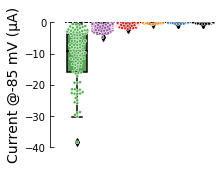

In [13]:
#Plot1
fig = plt.figure(figsize=(3.5, 3)) 
ax1 = plt.subplot(1,1,1)

InitialCurrent = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","mg512mg012","pTL70mg012","uninjected"])) & (df.StartSol.isin(["NaGlu1"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!

InitialCurrent.to_csv(filedir+'InitialCurrent.csv', header=True, sep=',', mode='a')
InitialCurrent.to_csv(filedirManuscriptStat+'InitialCurrent.csv', header=True, index=None, sep=',', mode='w')


#plot 300 uM
#,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"]

#plot 30 uM Amil
#sns.swarmplot(x = InitialCurrent['Injection'], y = InitialCurrent['MeanSTART']*1000000 , data = InitialCurrent,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax1, order=np.unique(InitialCurrent['Injection']))
sns.swarmplot(x = InitialCurrent['Injection'], y = InitialCurrent['MeanSTART']*1000000 , data = InitialCurrent,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, size = 3,ax=ax1, order=["mg419mg012","pTL69mg012","mg418mg012","mg512mg012","pTL70mg012","uninjected"])
sns.boxplot(x = InitialCurrent['Injection'], y = InitialCurrent['MeanSTART']*1000000 , data = InitialCurrent, palette=sns.color_palette(colorsSINGLES),ax=ax1,order=["mg419mg012","pTL69mg012","mg418mg012","mg512mg012","pTL70mg012","uninjected"])
##### AXIS 1 ####
#ax1.set_ylim([-50, 1])
ax1.set_ylim([-40, 0.1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=10)  
#ax1.set_title('bla',size=18)
ax1.set_xticklabels(["mg419mg012","pTL69mg012","mg418mg012","mg512mg012","pTL70mg012","uninjected"],rotation=30)
ax1.spines['bottom'].set_visible(False) 
ax1.xaxis.set_visible(False)

plt.ylabel('Current @-85 mV (µA)', fontsize=14) 
plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=16)
plt.gcf().subplots_adjust(bottom=0.3, left=0.3)
plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig1-NaGlu-MeanStart"+'.pdf')
plt.show()

## plotting initial current data with as estimation statistics plot

In [14]:
Img419Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'mg419mg012',['MeanSTART']] #returns a data frame 
Img419Naglu.columns = ['M4d']
Img418Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'mg418mg012',['MeanSTART']] #returns a data frame 
Img418Naglu.columns = ['DT1d']
IpTL69Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'pTL69mg012',['MeanSTART']] #returns a data frame 
IpTL69Naglu.columns = ['U8d']
IuninjNaglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'uninjected',['MeanSTART']] #returns a data frame 
IuninjNaglu.columns = ['Uninj']
Img512Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'mg512mg012',['MeanSTART']] #returns a data frame 
Img512Naglu.columns = ['M10d']
IpTL70Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'pTL70mg012',['MeanSTART']] #returns a data frame 
IpTL70Naglu.columns = ['Del1d']

### concatenate data for estimations stats plot

In [15]:
#concatenateData
INagluConcat = pd.concat([IuninjNaglu.reset_index(drop=True),Img418Naglu.reset_index(drop=True),Img419Naglu.reset_index(drop=True),IpTL69Naglu.reset_index(drop=True),Img512Naglu.reset_index(drop=True),IpTL70Naglu.reset_index(drop=True)],sort=False, axis=1) #sort=False removed the warning, but no idea what its doing
INagluConcatuA = INagluConcat *1000000
INagluConcatDEGT1 = pd.concat([IuninjNaglu.reset_index(drop=True),Img418Naglu.reset_index(drop=True)],sort=False, axis=1) #sort=False removed the warning, but no idea what its doing
INagluConcatuADEGT1 = INagluConcatDEGT1 *1000000

In [16]:
#load Data
shared_control = dabest.load(INagluConcatuA, idx=("Uninj","DT1d","U8d","Del1d", "M10d","M4d"))
shared_control

shared_controlDEGT1 = dabest.load(INagluConcatuADEGT1, idx=("Uninj","DT1d"))
shared_controlDEGT1

DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:31:41 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. DT1d minus Uninj

5000 resamples will be used to generate the effect size bootstraps.

### Statistics for estimation plot for Initial current Figure 1

In [17]:
shared_control.mean_diff

DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:31:44 2020.

The unpaired mean difference between Uninj and DT1d is -0.491 [95%CI -0.579, -0.424].
The two-sided p-value of the Mann-Whitney test is 8.49e-36.

The unpaired mean difference between Uninj and U8d is -1.58 [95%CI -1.86, -1.35].
The two-sided p-value of the Mann-Whitney test is 2.26e-28.

The unpaired mean difference between Uninj and Del1d is -0.061 [95%CI -0.16, 0.00245].
The two-sided p-value of the Mann-Whitney test is 0.101.

The unpaired mean difference between Uninj and M10d is -0.098 [95%CI -0.188, -0.035].
The two-sided p-value of the Mann-Whitney test is 0.00146.

The unpaired mean difference between Uninj and M4d is -10.9 [95%CI -12.6, -9.37].
The two-sided p-value of the Mann-Whitney test is 2.99e-41.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hy

In [18]:
shared_control

DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:31:44 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. DT1d minus Uninj
2. U8d minus Uninj
3. Del1d minus Uninj
4. M10d minus Uninj
5. M4d minus Uninj

5000 resamples will be used to generate the effect size bootstraps.

### TODO: How to break the lines on y axis below ?

## Figure 1 estimation plot Initial current: Fig1-EstStat-NaGlu-MeanStart.pdf

<Figure size 201.6x360 with 0 Axes>

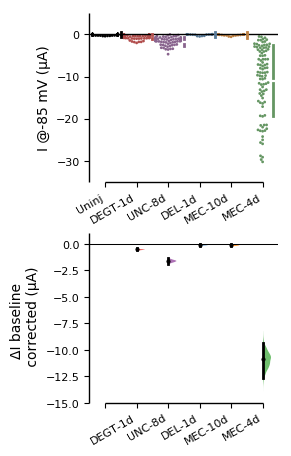

In [19]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(2.8, 5)) 
fig1= shared_control.mean_diff.plot(swarm_ylim=(-35,5), contrast_ylim=(-15,1), custom_palette=colorsESTAll,fig_size=(3, 5),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='ΔI baseline \n corrected (µA)',
                                    swarm_label='I @-85 mV (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  



fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = ['Uninj','DEGT-1d', 'UNC-8d', 'DEL-1d', 'MEC-10d','MEC-4d']
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
labels2 = ['','DEGT-1d', 'UNC-8d', 'DEL-1d', 'MEC-10d','MEC-4d']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')

plt.gcf().subplots_adjust(bottom=0.1, left=0.27,right=None, top=None,hspace=0.75, wspace=0.2) 

plt.savefig(filedir+"Fig1-EstStat-NaGlu-MeanStart"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig1-EstStat-NaGlu-MeanStart"+'.pdf')




### Initial Current Vrev estimated statistics?

In [20]:
Vmg419Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'mg419mg012',['VrevSTART']] #returns a data frame 
Vmg419Naglu.columns = ['M4d']
Vmg418Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'mg418mg012',['VrevSTART']] #returns a data frame 
Vmg418Naglu.columns = ['DT1d']
VpTL69Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'pTL69mg012',['VrevSTART']] #returns a data frame 
VpTL69Naglu.columns = ['U8d']
VuninjNaglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'uninjected',['VrevSTART']] #returns a data frame 
VuninjNaglu.columns = ['Uninj']
Vmg512Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'mg512mg012',['VrevSTART']] #returns a data frame 
Vmg512Naglu.columns = ['M10d']
VpTL70Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'pTL70mg012',['VrevSTART']] #returns a data frame 
VpTL70Naglu.columns = ['Del1d']

In [21]:
#concatenateData
VNagluConcat = pd.concat([VuninjNaglu.reset_index(drop=True),Vmg418Naglu.reset_index(drop=True),Vmg419Naglu.reset_index(drop=True),VpTL69Naglu.reset_index(drop=True),Vmg512Naglu.reset_index(drop=True),VpTL70Naglu.reset_index(drop=True)],sort=False, axis=1) #sort=False removed the warning, but no idea what its doing
VNagluConcatuA = VNagluConcat *1000
VNagluConcatDEGT1 = pd.concat([VuninjNaglu.reset_index(drop=True),Vmg418Naglu.reset_index(drop=True)],sort=False, axis=1) #sort=False removed the warning, but no idea what its doing
VNagluConcatuADEGT1 = VNagluConcatDEGT1 *1000

In [22]:
#load Data
shared_controlVrev = dabest.load(VNagluConcatuA, idx=("Uninj","DT1d","U8d","Del1d", "M10d","M4d"))
shared_controlVrev
shared_controlVrevDEGT1 = dabest.load(VNagluConcatuADEGT1, idx=("Uninj","DT1d"))
shared_controlVrevDEGT1

DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:31:48 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. DT1d minus Uninj

5000 resamples will be used to generate the effect size bootstraps.

In [23]:
shared_controlVrev.mean_diff

DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:31:52 2020.

The unpaired mean difference between Uninj and DT1d is 31.1 [95%CI 22.7, 38.8].
The two-sided p-value of the Mann-Whitney test is 2.33e-15.

The unpaired mean difference between Uninj and U8d is 58.5 [95%CI 50.5, 66.3].
The two-sided p-value of the Mann-Whitney test is 1.09e-21.

The unpaired mean difference between Uninj and Del1d is -2.72 [95%CI -19.0, 14.7].
The two-sided p-value of the Mann-Whitney test is 0.784.

The unpaired mean difference between Uninj and M10d is 12.7 [95%CI 0.584, 24.6].
The two-sided p-value of the Mann-Whitney test is 0.0798.

The unpaired mean difference between Uninj and M4d is 53.1 [95%CI 45.0, 60.7].
The two-sided p-value of the Mann-Whitney test is 3.71e-28.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero diffe

<Figure size 201.6x360 with 0 Axes>

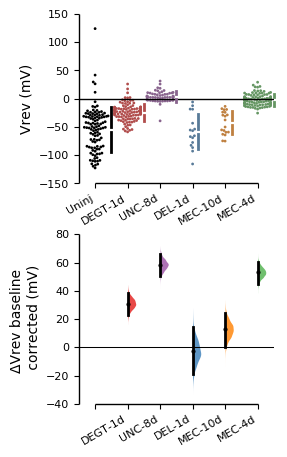

In [211]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
#
plt.figure(figsize=(2.8, 5)) 
#fig_size=(4, 5.5)
fig1= shared_controlVrev.mean_diff.plot(swarm_ylim=(-150,150), contrast_ylim=(-40,80), custom_palette=colorsESTAll,fig_size=(3,5),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label= 'ΔVrev baseline \n corrected (mV)',
                                    swarm_label='Vrev (mV)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs


fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = ['Uninj','DEGT-1d', 'UNC-8d', 'DEL-1d', 'MEC-10d','MEC-4d']
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
labels2 = ['','DEGT-1d', 'UNC-8d', 'DEL-1d', 'MEC-10d','MEC-4d']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')

plt.gcf().subplots_adjust(bottom=0.1, left=0.25,right=None, top=None,hspace=2, wspace=0.2) 
plt.savefig(filedir+"Fig1-EstStat-NaGlu-MeanVrev"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig1-EstStat-NaGlu-MeanVrev"+'.pdf')




In [212]:
shared_controlVrev.mean_diff

DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:31:52 2020.

The unpaired mean difference between Uninj and DT1d is 31.1 [95%CI 22.7, 38.8].
The two-sided p-value of the Mann-Whitney test is 2.33e-15.

The unpaired mean difference between Uninj and U8d is 58.5 [95%CI 50.5, 66.3].
The two-sided p-value of the Mann-Whitney test is 1.09e-21.

The unpaired mean difference between Uninj and Del1d is -2.72 [95%CI -19.0, 14.7].
The two-sided p-value of the Mann-Whitney test is 0.784.

The unpaired mean difference between Uninj and M10d is 12.7 [95%CI 0.584, 24.6].
The two-sided p-value of the Mann-Whitney test is 0.0798.

The unpaired mean difference between Uninj and M4d is 53.1 [95%CI 45.0, 60.7].
The two-sided p-value of the Mann-Whitney test is 3.71e-28.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero diffe

# Resting Vm

IniCurmg419 = (InitialCurrent.Injection.isin(["mg419mg012"])) & (InitialCurrent.StartSol.isin(["NaGlu1"]))
print(IniCurmg419)

make first table here cultivation solutin is selection critira and then pck table with onlc resting membran

In [26]:
#VrestpTL69Naglu = InitialCurrent.loc[InitialCurrent['CultivationSol'] =='L-15(300Amil+100uMBMIL']
#VrestpTL69Naglu = (InitialCurrent.loc[InitialCurrent['Injection'] =='pTL69mg012') & (InitialCurrent.CultivationSol.isin(["L-15(300Amil+100uMBMIL"])) #returns a data frame 
test = (df.Injection.isin(["pTL69mg012"])) & (df.CultivationSol.isin(["L-15(300Amil+100uMBMIL"]))
#print(test)

In [27]:
Vrestmg419Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'mg419mg012',['RestingVM']] #returns a data frame 
Vrestmg419Naglu.columns = ['M4d']
Vrestmg418Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == '≈',['RestingVM']] #returns a data frame 
Vrestmg418Naglu.columns = ['DT1d']
VrestpTL69Naglu = (InitialCurrent.loc[InitialCurrent['Injection'] =='pTL69mg012',['RestingVM']]) & (InitialCurrent.loc[InitialCurrent['CultivationSol'] =='pTL69mg012',['L-15(300Amil+100uMBMIL']]) #returns a data frame 
VrestpTL69Naglu.columns = ['U8d']

#CALCHANGEinPH = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGlu64"]) & df.StartSol.isin(["NaGlu84"]))] 

VrestuninjNaglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'uninjected',['RestingVM']] #returns a data frame 
VrestuninjNaglu.columns = ['Uninj']
Vrestmg512Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'mg512mg012',['RestingVM']] #returns a data frame 
Vrestmg512Naglu.columns = ['M10d']
VrestpTL70Naglu = InitialCurrent.loc[InitialCurrent['Injection'] == 'pTL70mg012',['RestingVM']] #returns a data frame 
VrestpTL70Naglu.columns = ['Del1d']

#concatenateData
VrestNagluConcat = pd.concat([VrestuninjNaglu.reset_index(drop=True),Vrestmg418Naglu.reset_index(drop=True),VrestpTL69Naglu.reset_index(drop=True),Vrestmg512Naglu.reset_index(drop=True),VrestpTL70Naglu.reset_index(drop=True),Vrestmg419Naglu.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doing
VrestNagluConcatmV = VrestNagluConcat.astype(float)

KeyError: "None of [Index(['L-15(300Amil+100uMBMIL'], dtype='object')] are in the [columns]"

In [ ]:
VrestpTL69Naglu

In [ ]:
#load Data
shared_controlVrevRest = dabest.load(VrestNagluConcatmV, idx=("Uninj","DT1d","U8d","Del1d", "M10d","M4d"))
#shared_controlVrevRest

# mg512 data must change. haven't entered the resting membrane potential yet

In [ ]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
#load Data
#shared_controlVrevRest = dabest.load(VrestNagluConcatmV, idx=("Uninj","DT1d","U8d","Del1d", "M10d","M4d"))
#shared_controlVrevRest
#plt.figure(figsize=(3.5, 3)) 

fig1= shared_controlVrevRest.mean_diff.plot(swarm_ylim=(-150,50), contrast_ylim=(-20,80), custom_palette=colors,fig_size=(4, 5.5),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='Change in Vrest (V-VUninj) (µA)',
                                    swarm_label='Vrest (mV)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

plt.gcf().subplots_adjust(bottom=0.2, left=0.2,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedir+"Fig1-EstStat-NaGlu-MeanVrest"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig1-EstStat-NaGlu-MeanVrest"+'.pdf')




## Estimation plot of DEGT-1d vs uninjected: Fig1-EstStat-NaGlu-MeanStartDEGT1

In [ ]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3, 5)) 
fig1= shared_controlDEGT1.mean_diff.plot(swarm_ylim=(-2,1), contrast_ylim=(-1,1), custom_palette=colorsESTAll,fig_size=(2.8,3),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='Change in current (I-IUninj) (µA)',
                                    swarm_label='Current @-85 mV (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

plt.gcf().subplots_adjust(bottom=0.2, left=0.25,right=0.75, top=None,hspace=0.75, wspace=0.2) 

plt.savefig(filedir+"Fig1-EstStat-NaGlu-MeanStartDEGT1"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig1-EstStat-NaGlu-MeanStartDEGT1"+'.pdf')




In [ ]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
#
plt.figure(figsize=(3, 5)) 
fig1= shared_controlVrevDEGT1.mean_diff.plot(swarm_ylim=(-150,150), contrast_ylim=(-20,80), custom_palette=colorsESTAll,fig_size=(2.8,3),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='Change in Vrev (V-VUninj) (µA)',
                                    swarm_label='Vrev (mV)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

plt.gcf().subplots_adjust(bottom=0.2, left=0.25,right=0.75, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedir+"Fig1-EstStat-NaGlu-MeanVrevDEGT1"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig1-EstStat-NaGlu-MeanVrevDEGT1"+'.pdf')




## Try to do statistics of Initial current in python. Anova plus multiple comparison


In [ ]:
#Intitial Current statistics
INJmixes = ['uninjected', 'mg418mg012', 'pTL69mg012','mg512mg012','pTL70mg012']
#excluded mg419 here. how to handle it?

InitialMeanCurrent = [] # initialize list to store data
for this_RNAmixes in INJmixes:
    # append data from each strain from dataframe to the list
    InitialMeanCurrent.append(InitialCurrent.loc[InitialCurrent['Injection'] == this_RNAmixes]['MeanSTART'])
print(stats.f_oneway(*InitialMeanCurrent)) # Run ANOVA. note that the * unpacks the list. You can use a series of variables with data from each group separated by commas instead

#create a new dataframe for multiple comparison. matchs INJmises above
MeanStartStats = df[(df.Injection.isin(INJmixes)) & (df.StartSol.isin(["NaGlu1"]))]
MeanStartStats = MeanStartStats.dropna(subset=['MeanSTART']) #drop NaN values in col VrevStart

mc = multicomp.MultiComparison(MeanStartStats['MeanSTART'].astype(float),MeanStartStats['Injection'].astype(str)) # prepare to run the test
mc_results = mc.tukeyhsd() # run the Tukey test
#print(mc_results)

In [ ]:
#Intitial Vrev statistics
INJmixes2 = ['mg419mg012','uninjected', 'mg418mg012', 'pTL69mg012','mg512mg012','pTL70mg012']
#excluded mg419 here. how to handle it?

InitialVrevCurrent = [] # initialize list to store data
for this_RNAmixes2 in INJmixes2:
    # append data from each strain from dataframe to the list
    InitialVrevCurrent.append(InitialCurrent.loc[InitialCurrent['Injection'] == this_RNAmixes2]['MeanSTART'])
print(stats.f_oneway(*InitialVrevCurrent)) # Run ANOVA. note that the * unpacks the list. You can use a series of variables with data from each group separated by commas instead

#create a new dataframe for multiple comparison. matchs INJmises above
VrevStartStats = df[(df.Injection.isin(INJmixes2)) & (df.StartSol.isin(["NaGlu1"]))]
VrevStartStats = VrevStartStats.dropna(subset=['VrevSTART']) #drop NaN values in col VrevStart

mc = multicomp.MultiComparison(VrevStartStats['VrevSTART'].astype(float),VrevStartStats['Injection'].astype(str)) # prepare to run the test
mc_results = mc.tukeyhsd() # run the Tukey test
#print(mc_results)

# Mean Current cal Inititial current

In [ ]:
ExInitialCurrent = InitialCurrent.pivot(columns='Injection', values='MeanSTART').describe().T
ExInitialCurrent.to_csv(filedir+'ExInitialCurrent.csv', header=True, sep=',', mode='w')

MeanIniCurrent = ExInitialCurrent['mean']*1000000
MeanIniCurrent = MeanIniCurrent.round(2)
SDIniCurrent = ExInitialCurrent['std']*1000000
SDIniCurrent = SDIniCurrent.round(2)
countIniCurrent  = ExInitialCurrent['count']
SEMIniCurrent = SDIniCurrent /countIniCurrent 
SEMIniCurrent = SEMIniCurrent.round(3)

print(MeanIniCurrent)
print(SEMIniCurrent)
print(countIniCurrent)

## mean +- SEM Vrev (Initial current)

In [28]:
ExInitialVrev = InitialCurrent.pivot(columns='Injection', values='VrevSTART').describe().T
ExInitialVrev.to_csv(filedir+'ExInitialVrev.csv', header=True, sep=',', mode='w')
MeanIniCurVrev = ExInitialVrev['mean']*1000
MeanIniCurVrev = MeanIniCurVrev.round(2)
SDIniCurVrev = ExInitialVrev['std']*1000
SDIniCurVrev = SDIniCurVrev.round(2)

countIniCurVrev  = ExInitialVrev['count']
SEMIniCurVrev = SDIniCurVrev/countIniCurVrev
SEMIniCurVrev = SEMIniCurVrev.round(3)

print(MeanIniCurVrev)
print(SEMIniCurVrev)
print(countIniCurVrev)

Injection
mg418mg012   -23.75
mg419mg012    -1.76
mg512mg012   -42.12
pTL69mg012     3.67
pTL70mg012   -57.54
uninjected   -54.82
Name: mean, dtype: float64
Injection
mg418mg012    0.136
mg419mg012    0.107
mg512mg012    1.089
pTL69mg012    0.163
pTL70mg012    1.958
uninjected    0.376
dtype: float64
Injection
mg418mg012    110.0
mg419mg012     97.0
mg512mg012     19.0
pTL69mg012     59.0
pTL70mg012     16.0
uninjected    107.0
Name: count, dtype: float64


## mean +- SEM Vrest (Initial current)

In [29]:
InitialCurrent.head()

,CellIDRec,Injection,CultivationSol,DaysPostInj,Rating,StartSol,TestSol,MeanSTART,MeanTEST,DELTA,RATIO,VrevSTART,VrevTEST,DELTAVrev,copyCELL,RestingVM
276,STFX033073,mg418mg012,L-15(300Amil),7,2.0,NaGlu1,NaGlu2,-5.589097e-07,-7.176740e-07,-1.587643e-07,1.284061,-0.017344,-0.014467,0.002877,STFX033073,5.4
534,STFX034057,mg418mg012,L-15(300Amil),6,2.0,NaGlu1,NaGlu64,-7.180017e-07,-4.894133e-07,2.285884e-07,0.681632,-0.002676,-0.012063,-0.009387,STFX034057,-27.0
540,STFX034065,mg418mg012,L-15(300Amil),7,2.0,NaGlu1,NaGlu64,-6.166954e-07,-4.912972e-07,1.253983e-07,0.796661,-0.012383,-0.011550,0.000833,STFX034065,-15.0
594,STFX035011,mg418mg012,L-15(300Amil),4,2.0,NaGlu1,NaGlu84,-5.923103e-07,-6.439420e-07,-5.163175e-08,1.087170,-0.025418,-0.032506,-0.007088,STFX035011,-15.4
600,STFX034067,mg418mg012,L-15(300Amil),7,3.0,NaGlu1,NaGlu84,-7.632372e-07,-9.896941e-07,-2.264569e-07,1.296706,-0.018599,-0.021534,-0.002936,STFX034067,-27.0


# commetn: Vrest pTL69 MIX OF WITH AND WITHOUT BENZAMIL

In [30]:
ExInitialVrest = InitialCurrent.pivot(columns='Injection', values='RestingVM').describe().T
ExInitialVrest.to_csv(filedir+'ExInitialVrest.csv', header=True, sep=',', mode='w')
MeanIniCurVrest = ExInitialVrest['mean']
MeanIniCurVrest = MeanIniCurVrest.round(2)
SDIniCurVrest = ExInitialVrest['std']
SDIniCurVrest = SDIniCurVrest.round(2)

countIniCurVrest  = ExInitialVrest['count']
SEMIniCurVrest = SDIniCurVrest/countIniCurVrest
SEMIniCurVrest = SEMIniCurVrest.round(2)

print(MeanIniCurVrest)
print(SEMIniCurVrest)
print(countIniCurVrest)

Injection
mg418mg012    -4.77
mg419mg012    -4.44
mg512mg012    29.82
pTL69mg012   -16.18
pTL70mg012    -9.99
uninjected    -5.05
Name: mean, dtype: float64
Injection
mg418mg012    0.24
mg419mg012    0.18
mg512mg012    0.44
pTL69mg012    0.59
pTL70mg012    1.31
uninjected    0.20
dtype: float64
Injection
mg418mg012     91.0
mg419mg012     97.0
mg512mg012     19.0
pTL69mg012     59.0
pTL70mg012     17.0
uninjected    156.0
Name: count, dtype: float64


## plot for Membrane Voltage Initial current of individual injections. This version of plot is not in the manuscript

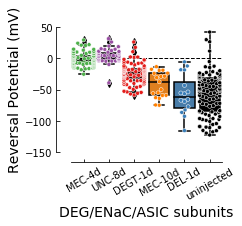

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/DrugResponse2019-30uM/


In [31]:
#Plot2 Vrev 
fig = plt.figure(figsize=(3.5, 3)) 
ax1 = plt.subplot(1,1,1)

InitialCurrent = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","mg512mg012","pTL70mg012","uninjected"])) & (df.StartSol.isin(["NaGlu1"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!

sns.swarmplot(x = InitialCurrent['Injection'], y = InitialCurrent['VrevSTART']*1000 , data = InitialCurrent,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, size = 4,ax=ax1, order=["mg419mg012","pTL69mg012","mg418mg012","mg512mg012","pTL70mg012","uninjected"])
sns.boxplot(x = InitialCurrent['Injection'], y = InitialCurrent['VrevSTART']*1000 , data = InitialCurrent, palette=sns.color_palette(colorsSINGLES),ax=ax1,order=["mg419mg012","pTL69mg012","mg418mg012","mg512mg012","pTL70mg012","uninjected"])
##### AXIS 1 ####
ax1.set_ylim([-150, 50])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=10)  
#ax1.set_title('bla',size=18) 
ax1.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","MEC-10d","DEL-1d","uninjected"],rotation=30)


plt.ylabel('Reversal Potential (mV)', fontsize=14) 
plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=14)
plt.gcf().subplots_adjust(bottom=0.3, left=0.3)
plt.savefig(filedir+"Fig1-NaGlu-VrevStart"+'.pdf')
plt.savefig(filedirManuscript+"Fig1-NaGlu-VrevStart"+'.pdf')
plt.show()
print(filedir)

## Figure 3: Pharmacology 

#### Amiloride Analoga 30 uM
#### RATIO

In [32]:
#sort data for amiloride!!!!
#Plot1
Amil30uninj = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluAmil30"]))] 
#Plot2
Bmil30uninj = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluBmil30"]))]
#Plot3
EIPA30uninj = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluEipa30"]))]
#Plot4
Phen30uninj = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluPhen30"]))]
#Plot5
Bzd30uninj = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluBzd30"]))] 


In [33]:
Amil30 = Amil30uninj
Bmil30 = Bmil30uninj
EIPA30 = EIPA30uninj
Phen30 = Phen30uninj
Bzd30 = Bzd30uninj 


# ESTIMATION STATISTICS ACCORDING TO CHANNEL - AMIL. ANALOG

### AMIL analog & DEGT-1d

In [34]:
Img418Amil = Amil30uninj.loc[Amil30uninj['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Amil.columns = ['DT1d-Amil']

Img418Bmil = Bmil30uninj.loc[Bmil30uninj['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Bmil.columns = ['DT1d-Bmil']

Img418EIPA = EIPA30uninj.loc[EIPA30uninj['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418EIPA.columns = ['DT1d-Eipa']

Img418Phen= Phen30uninj.loc[Phen30uninj['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Phen.columns = ['DT1d-Phen']

Img418Bzd= Bzd30uninj.loc[Bzd30uninj['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Bzd.columns = ['DT1d-Bzd']


UninjAmil = Amil30uninj.loc[Amil30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjAmil.columns = ['Uninj-Amil']

UninjBmil = Bmil30uninj.loc[Bmil30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjBmil.columns = ['Uninj-Bmil']

UninjEIPA = EIPA30uninj.loc[EIPA30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjEIPA.columns = ['Uninj-Eipa']

UninjPhen = Phen30uninj.loc[Phen30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjPhen.columns = ['Uninj-Phen']

UninjBzd = Bzd30uninj.loc[Bzd30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjBzd.columns = ['Uninj-Bzd']

#concatenateData
IDT1UninjConcat = pd.concat([Img418Amil.reset_index(drop=True),Img418Bmil.reset_index(drop=True),Img418EIPA.reset_index(drop=True),Img418Phen.reset_index(drop=True),Img418Bzd.reset_index(drop=True),UninjAmil.reset_index(drop=True),UninjBmil.reset_index(drop=True),UninjEIPA.reset_index(drop=True),UninjPhen.reset_index(drop=True),UninjBzd.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doing
IDT1UninjConcatuA = IDT1UninjConcat.astype(float)*1000000

# #load Data
shared_controlIDT1Uninj = dabest.load(IDT1UninjConcatuA, idx=(('Uninj-Amil','DT1d-Amil',),('Uninj-Bmil','DT1d-Bmil',),('Uninj-Eipa','DT1d-Eipa',),('Uninj-Phen','DT1d-Phen',),('Uninj-Bzd','DT1d-Bzd'))) 
shared_controlIDT1Uninj


DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:33:21 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. DT1d-Amil minus Uninj-Amil
2. DT1d-Bmil minus Uninj-Bmil
3. DT1d-Eipa minus Uninj-Eipa
4. DT1d-Phen minus Uninj-Phen
5. DT1d-Bzd minus Uninj-Bzd

5000 resamples will be used to generate the effect size bootstraps.

In [35]:
shared_controlIDT1Uninj.mean_diff

DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:33:25 2020.

The unpaired mean difference between Uninj-Amil and DT1d-Amil is 0.00326 [95%CI -0.0181, 0.0259].
The two-sided p-value of the Mann-Whitney test is 0.362.

The unpaired mean difference between Uninj-Bmil and DT1d-Bmil is 0.00728 [95%CI -0.00834, 0.0342].
The two-sided p-value of the Mann-Whitney test is 0.605.

The unpaired mean difference between Uninj-Eipa and DT1d-Eipa is 0.00732 [95%CI -0.00712, 0.0278].
The two-sided p-value of the Mann-Whitney test is 0.43.

The unpaired mean difference between Uninj-Phen and DT1d-Phen is -0.00432 [95%CI -0.0227, 0.0172].
The two-sided p-value of the Mann-Whitney test is 0.323.

The unpaired mean difference between Uninj-Bzd and DT1d-Bzd is 0.0041 [95%CI -0.0108, 0.0279].
The two-sided p-value of the Mann-Whitney test is 0.773.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likeli

/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/seaborn/categorical.py:1243: RuntimeWarning: invalid value encountered in sqrt
  dx = np.sqrt(d ** 2 - dy ** 2) * 1.05


<Figure size 216x288 with 0 Axes>

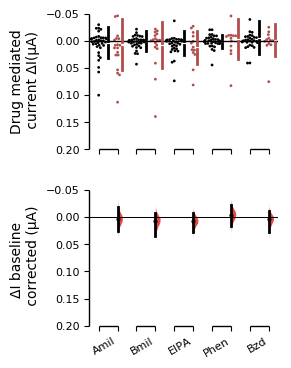

In [36]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3, 4)) 
colorsESTDT1=[(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10)]
#colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]

fig1= shared_controlIDT1Uninj.mean_diff.plot(swarm_ylim=(0.2,-0.05), contrast_ylim=(0.2,-0.05), custom_palette=colorsESTDT1,fig_size=(3, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='ΔI baseline \n corrected (µA)',
                                    swarm_label='Drug mediated\n current ΔI(µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = []
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
labels2 = ['','Amil','','Bmil','','EIPA','',"Phen",'','Bzd']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')

plt.gcf().subplots_adjust(bottom=0.1, left=0.27,right=None, top=None,hspace=1, wspace=0.2) 
plt.savefig(filedir+"Fig3-EstStat-IDT1Uninj"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig3-EstStat-IDT1Uninj"+'.pdf')




### AMIL analog & UNC-8d

In [37]:
IpTL69Amil = Amil30uninj.loc[Amil30uninj['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Amil.columns = ['U8d-Amil']

IpTL69Bmil = Bmil30uninj.loc[Bmil30uninj['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Bmil.columns = ['U8d-Bmil']

IpTL69EIPA = EIPA30uninj.loc[EIPA30uninj['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69EIPA.columns = ['U8d-Eipa']

IpTL69Phen= Phen30uninj.loc[Phen30uninj['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Phen.columns = ['U8d-Phen']

IpTL69Bzd= Bzd30uninj.loc[Bzd30uninj['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Bzd.columns = ['U8d-Bzd']


UninjAmil = Amil30uninj.loc[Amil30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjAmil.columns = ['Uninj-Amil']

UninjBmil = Bmil30uninj.loc[Bmil30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjBmil.columns = ['Uninj-Bmil']

UninjEIPA = EIPA30uninj.loc[EIPA30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjEIPA.columns = ['Uninj-Eipa']

UninjPhen = Phen30uninj.loc[Phen30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjPhen.columns = ['Uninj-Phen']

UninjBzd = Bzd30uninj.loc[Bzd30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjBzd.columns = ['Uninj-Bzd']

#concatenateData
IU8dUninjConcat = pd.concat([IpTL69Amil.reset_index(drop=True),IpTL69Bmil.reset_index(drop=True),IpTL69EIPA.reset_index(drop=True),IpTL69Phen.reset_index(drop=True),IpTL69Bzd.reset_index(drop=True),UninjAmil.reset_index(drop=True),UninjBmil.reset_index(drop=True),UninjEIPA.reset_index(drop=True),UninjPhen.reset_index(drop=True),UninjBzd.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doing
IU8dUninjConcatuA = IU8dUninjConcat.astype(float)*1000000

# #load Data
shared_controlIU8dUninj = dabest.load(IU8dUninjConcatuA, idx=(('Uninj-Amil','U8d-Amil',),('Uninj-Bmil','U8d-Bmil',),('Uninj-Eipa','U8d-Eipa',),('Uninj-Phen','U8d-Phen',),('Uninj-Bzd','U8d-Bzd'))) 
shared_controlIU8dUninj


DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:33:27 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. U8d-Amil minus Uninj-Amil
2. U8d-Bmil minus Uninj-Bmil
3. U8d-Eipa minus Uninj-Eipa
4. U8d-Phen minus Uninj-Phen
5. U8d-Bzd minus Uninj-Bzd

5000 resamples will be used to generate the effect size bootstraps.

In [38]:
shared_controlIU8dUninj.mean_diff

DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:33:30 2020.

The unpaired mean difference between Uninj-Amil and U8d-Amil is 0.219 [95%CI 0.0335, 0.29].
The two-sided p-value of the Mann-Whitney test is 0.0296.

The unpaired mean difference between Uninj-Bmil and U8d-Bmil is 0.866 [95%CI 0.642, 1.12].
The two-sided p-value of the Mann-Whitney test is 2.08e-09.

The unpaired mean difference between Uninj-Eipa and U8d-Eipa is 0.607 [95%CI 0.451, 0.83].
The two-sided p-value of the Mann-Whitney test is 4.92e-06.

The unpaired mean difference between Uninj-Phen and U8d-Phen is 0.183 [95%CI 0.12, 0.262].
The two-sided p-value of the Mann-Whitney test is 2.86e-06.

The unpaired mean difference between Uninj-Bzd and U8d-Bzd is 0.32 [95%CI 0.167, 0.58].
The two-sided p-value of the Mann-Whitney test is 1.29e-05.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing th

<Figure size 216x288 with 0 Axes>

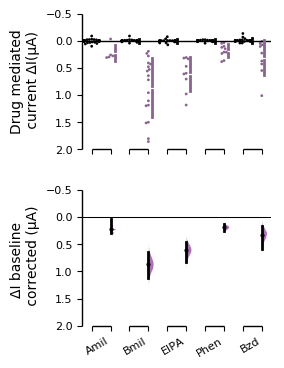

In [39]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3, 4)) 
colorsESTU8=[(0.00, 0.00, 0.00),(0.60, 0.31,0.64),(0.00, 0.00, 0.00),(0.60, 0.31,0.64),(0.00, 0.00, 0.00),(0.60, 0.31,0.64),(0.00, 0.00, 0.00),(0.60, 0.31,0.64),(0.00, 0.00, 0.00),(0.60, 0.31,0.64)]
#colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]

fig1= shared_controlIU8dUninj.mean_diff.plot(swarm_ylim=(2,-0.5), contrast_ylim=(2,-0.5), custom_palette=colorsESTU8,fig_size=(3, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='ΔI baseline \n corrected (µA)',
                                    swarm_label='Drug mediated\n current ΔI(µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = []
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
labels2 = ['','Amil','','Bmil','','EIPA','',"Phen",'','Bzd']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')


plt.gcf().subplots_adjust(bottom=0.1, left=0.27,right=None, top=None,hspace=1, wspace=0.2) 
plt.savefig(filedir+"Fig3-EstStat-IU8Uninj"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig3-EstStat-IU8Uninj"+'.pdf')




### AMIL analog & MEC-4d

In [40]:
Img419Amil = Amil30uninj.loc[Amil30uninj['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Amil.columns = ['M4d-Amil']

Img419Bmil = Bmil30uninj.loc[Bmil30uninj['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Bmil.columns = ['M4d-Bmil']

Img419EIPA = EIPA30uninj.loc[EIPA30uninj['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419EIPA.columns = ['M4d-Eipa']

Img419Phen= Phen30uninj.loc[Phen30uninj['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Phen.columns = ['M4d-Phen']

Img419Bzd= Bzd30uninj.loc[Bzd30uninj['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Bzd.columns = ['M4d-Bzd']


UninjAmil = Amil30uninj.loc[Amil30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjAmil.columns = ['Uninj-Amil']

UninjBmil = Bmil30uninj.loc[Bmil30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjBmil.columns = ['Uninj-Bmil']

UninjEIPA = EIPA30uninj.loc[EIPA30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjEIPA.columns = ['Uninj-Eipa']

UninjPhen = Phen30uninj.loc[Phen30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjPhen.columns = ['Uninj-Phen']

UninjBzd = Bzd30uninj.loc[Bzd30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjBzd.columns = ['Uninj-Bzd']

#concatenateData
IM4dUninjConcat = pd.concat([Img419Amil.reset_index(drop=True),Img419Bmil.reset_index(drop=True),Img419EIPA.reset_index(drop=True),Img419Phen.reset_index(drop=True),Img419Bzd.reset_index(drop=True),UninjAmil.reset_index(drop=True),UninjBmil.reset_index(drop=True),UninjEIPA.reset_index(drop=True),UninjPhen.reset_index(drop=True),UninjBzd.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doing
IM4dUninjConcatuA = IM4dUninjConcat.astype(float)*1000000

# #load Data
shared_controlIM4dUninj = dabest.load(IM4dUninjConcatuA, idx=(('Uninj-Amil','M4d-Amil',),('Uninj-Bmil','M4d-Bmil',),('Uninj-Eipa','M4d-Eipa',),('Uninj-Phen','M4d-Phen',),('Uninj-Bzd','M4d-Bzd'))) 
shared_controlIM4dUninj


DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:33:33 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. M4d-Amil minus Uninj-Amil
2. M4d-Bmil minus Uninj-Bmil
3. M4d-Eipa minus Uninj-Eipa
4. M4d-Phen minus Uninj-Phen
5. M4d-Bzd minus Uninj-Bzd

5000 resamples will be used to generate the effect size bootstraps.

In [41]:
shared_controlIM4dUninj.mean_diff

DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:33:37 2020.

The unpaired mean difference between Uninj-Amil and M4d-Amil is 6.71 [95%CI 5.08, 8.94].
The two-sided p-value of the Mann-Whitney test is 2.07e-15.

The unpaired mean difference between Uninj-Bmil and M4d-Bmil is 7.81 [95%CI 5.46, 11.0].
The two-sided p-value of the Mann-Whitney test is 2.03e-12.

The unpaired mean difference between Uninj-Eipa and M4d-Eipa is 5.53 [95%CI 3.79, 8.11].
The two-sided p-value of the Mann-Whitney test is 2.07e-11.

The unpaired mean difference between Uninj-Phen and M4d-Phen is 5.18 [95%CI 3.11, 8.18].
The two-sided p-value of the Mann-Whitney test is 2.02e-09.

The unpaired mean difference between Uninj-Bzd and M4d-Bzd is 0.607 [95%CI -0.0535, 1.65].
The two-sided p-value of the Mann-Whitney test is 0.00219.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the eff

In [42]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3, 4)) 
colorsESTM4=[(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29)]
#colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]

fig1= shared_controlIM4dUninj.mean_diff.plot(swarm_ylim=(20,-5), contrast_ylim=(20,-5), custom_palette=colorsESTM4,fig_size=(3, 4),
                                     raw_marker_size=(2),es_marker_size=2,plt.gcf().subplots_adjust(bottom=0.1, left=0.25,right=None, top=None,hspace=1, wspace=0.2) ='ΔI baseline \n corrected (µA)',
                                    swarm_label='Drug mediated\n current ΔI(µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = []
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
labels2 = ['','Amil','','Bmil','','EIPA','',"Phen",'','Bzd']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')



plt.gcf().subplots_adjust(bottom=0.1, left=0.27,right=None, top=None,hspace=1, wspace=0.2) 
plt.savefig(filedir+"Fig3-EstStat-IM4Uninj"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig3-EstStat-IM4Uninj"+'.pdf')




SyntaxError: keyword can't be an expression (<ipython-input-42-204997c713e2>, line 9)

### calculate mean to pick representative trace Amil Analog

### amiloride

In [ ]:
pivotAmil30uninj = Amil30uninj.pivot(columns='Injection', values='DELTA').describe().T

Amil30uninj.to_csv(filedirManuscriptStat+'Amiloride30uM.csv', header=True, sep=',', mode='w')

MeanAmil30 = pivotAmil30uninj['mean']*1000000
MeanAmil30 = MeanAmil30.round(2)
SDAmil30 = pivotAmil30uninj['std']*1000000
SDAmil30 = SDAmil30.round(2)
countAmil30 = pivotAmil30uninj['count']
SEMAmil30 = SDAmil30/countAmil30
SEMAmil30 = SEMAmil30.round(3)
print(countAmil30)



### benzamil

In [ ]:
pivotBmil30uninj = Bmil30uninj.pivot(columns='Injection', values='DELTA').describe().T

Bmil30uninj.to_csv(filedirManuscriptStat+'Benzamil30uM.csv', header=True, sep=',', mode='w')

MeanBmil30 = pivotBmil30uninj['mean']*1000000
MeanBmil30 = MeanBmil30.round(2)
SDBmil30 = pivotBmil30uninj['std']*1000000
SDBmil30 = SDBmil30.round(2)
countBmil30 = pivotBmil30uninj['count']
SEMBmil30 = SDBmil30/countBmil30
SEMBmil30 = SEMBmil30.round(3)
print(countBmil30)


#### EIPA

In [ ]:
pivotEIPA30uninj = EIPA30uninj.pivot(columns='Injection', values='DELTA').describe().T

EIPA30uninj.to_csv(filedirManuscriptStat+'EIPA30uM.csv', header=True, sep=',', mode='w')

MeanEIPA30 = pivotEIPA30uninj['mean']*1000000
MeanEIPA30 = MeanEIPA30.round(2)
SDEIPA30 = pivotEIPA30uninj['std']*1000000
SDEIPA30 = SDEIPA30.round(2)
countEIPA30 = pivotEIPA30uninj['count']
SEMEIPA30 = SDEIPA30/countEIPA30
SEMEIPA30 = SEMEIPA30.round(3)
print(countEIPA30)


### Phenamil

In [ ]:
pivotPhen30uninj = Phen30uninj.pivot(columns='Injection', values='DELTA').describe().T

Phen30uninj.to_csv(filedirManuscriptStat+'Phenamil30uM.csv', header=True, sep=',', mode='w')

MeanPhen30 = pivotPhen30uninj['mean']*1000000
MeanPhen30 = MeanPhen30.round(2)
SDPhen30 = pivotPhen30uninj['std']*1000000
SDPhen30 = SDPhen30.round(2)
countPhen30 = pivotPhen30uninj['count']
SEMPhen30 = SDPhen30/countPhen30
SEMPhen30 = SEMPhen30.round(3)
print(countPhen30)


### benzamidine

In [ ]:
pivotBzd30uninj = Bzd30uninj.pivot(columns='Injection', values='DELTA').describe().T

Bzd30uninj.to_csv(filedirManuscriptStat+'Benzamidine30uM.csv', header=True, sep=',', mode='w')

MeanBzd30 = pivotBzd30uninj['mean']*1000000
MeanBzd30 = MeanBzd30.round(2)
SDBzd30 = pivotBzd30uninj['std']*1000000
SDBzd30 = SDBzd30.round(2)
countBzd30 = pivotBzd30uninj['count']
SEMBzd30 = SDBzd30/countBzd30
SEMBzd30 = SEMBzd30.round(3)
print(countBzd30)


# OLD VERSION FIGURES

# Gutter Pharmacology

In [ ]:
#arranged by Injection
# maybe make another version arranged by drugs 

Drug= 'AmilAnaloga'
#How to plot all data from Amiloride .... rearrange daa
#Amiloride
fig = plt.figure(figsize=(12,4)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,5,1)
ax2 = plt.subplot(1,5,2)
ax3 = plt.subplot(1,5,3)
ax4 = plt.subplot(1,5,4)
ax5 = plt.subplot(1,5,5)

#sort data for amiloride!!!!
#Plot1
Amil30uninj = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluAmil30"]))] 
#Plot2
Bmil30uninj = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluBmil30"]))]
#Plot3
EIPA30uninj = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluEipa30"]))]
#Plot4
Phen30uninj = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluPhen30"]))]
#Plot5
Bzd30uninj = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluBzd30"]))] 

Amil30 = Amil30uninj
Bmil30 = Bmil30uninj
EIPA30 = EIPA30uninj
Phen30 = Phen30uninj
Bzd30 = Bzd30uninj 


#plot 30 uM Amil
sns.swarmplot(x = Amil30['Injection'], y = Amil30['RATIO']-1 , data = Amil30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax1,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = Amil30['Injection'], y = Amil30['RATIO']-1 , data = Amil30, palette=sns.color_palette(colorsPharma),ax=ax1,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
#plot 30 uM Bmil
sns.swarmplot(x = Bmil30['Injection'], y = Bmil30['RATIO']-1 , data = Bmil30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax2,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = Bmil30['Injection'], y = Bmil30['RATIO']-1 , data = Bmil30, palette=sns.color_palette(colorsPharma),ax=ax2,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
#plot 30 uM EIPA
sns.swarmplot(x = EIPA30['Injection'], y = EIPA30['RATIO']-1 , data = EIPA30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax3,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = EIPA30['Injection'], y = EIPA30['RATIO']-1 , data = EIPA30, palette=sns.color_palette(colorsPharma),ax=ax3,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
#plot 30 uM EIPA
sns.swarmplot(x = Phen30['Injection'], y = Phen30['RATIO']-1 , data = Phen30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax4,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = Phen30['Injection'], y = Phen30['RATIO']-1 , data = Phen30, palette=sns.color_palette(colorsPharma),ax=ax4,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
#plot 30 uM Bzd
sns.swarmplot(x = Bzd30['Injection'], y = Bzd30['RATIO']-1 , data = Bzd30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax5,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = Bzd30['Injection'], y = Bzd30['RATIO']-1 , data = Bzd30, palette=sns.color_palette(colorsPharma),ax=ax5,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])

Ylimit = [-1,1]
legendlabel = ['Na', 'Li', 'K', 'Cs', 'NMG']

##### AXIS 1 ####
ax1.set_ylim(Ylimit)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=12)  
ax1.set_title('Amiloride',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax1.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax1.xaxis.set_visible(False)
#ax1.yaxis.set_visible(False)
#ax1.spines['left'].set_visible(False) 
ax1.spines['bottom'].set_visible(False)  
ax1.set_yticks([-1,-0.5,0,0.5,1])
ax1.set_ylabel('Ratio (I(drug)/I(before)-1)',fontsize=14)

legendlabel = ['Na', 'Li', 'K', 'Cs', 'NMG']
ax1.legend(legendlabel,bbox_to_anchor=(0.4, 0.3, 0.11, 0.78),frameon=False)


##### AXIS 2 ####
ax2.set_ylim(Ylimit)
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=12)  
ax2.set_title('Benzamil',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines['left'].set_visible(False) 
ax2.spines['bottom'].set_visible(False)  

##### AXIS 3 ####
ax3.set_ylim(Ylimit)
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=12)  
ax3.set_title('EIPA',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax3.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax3.spines['left'].set_visible(False) 
ax3.spines['bottom'].set_visible(False)  

##### AXIS 4 ####
ax4.set_ylim(Ylimit)
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=12)  
ax4.set_title('Phenamil',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax4.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax4.xaxis.set_visible(False)
ax4.yaxis.set_visible(False)
ax4.spines['left'].set_visible(False) 
ax4.spines['bottom'].set_visible(False)  

##### AXIS 5 ####
ax5.set_ylim(Ylimit)
ax5.spines['right'].set_visible(False)                                  # no spine at the right
ax5.spines['top'].set_visible(False)                                     # no spine at the top
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position(('outward',10))  
ax5.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
ax5.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax5.tick_params(axis='both', which='major', labelsize=12)  
ax5.set_title('Benzamidine',size=14)
#a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax5.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax5.xaxis.set_visible(False)
ax5.yaxis.set_visible(False)
ax5.spines['left'].set_visible(False) 
ax5.spines['bottom'].set_visible(False)  

#plt.ylabel('Change in current', fontsize=16) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=16)
plt.gcf().subplots_adjust(bottom=0.3, left=0.3,hspace=0.75, wspace=0.2) 
#plt.suptitle('Amiloride 30 uM doses RATIO ', fontsize=16)
#plt.savefig(filedir+"Fig3"+Drug+"-RATIO"+'.jpg')
#plt.savefig(filedir+"Fig3"+Drug+"-RATIO"+'.eps')
plt.show()  # displays the plot



### RATIO AMILORIDE ANALOGUES WITHOUT uninjected oocytes

In [ ]:
#arranged by Injection
# maybe make another version arranged by drugs 

Drug= 'AmilAnaloga'
#How to plot all data from Amiloride .... rearrange daa
#Amiloride
fig = plt.figure(figsize=(12, 4)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,5,1)
ax2 = plt.subplot(1,5,2)
ax3 = plt.subplot(1,5,3)
ax4 = plt.subplot(1,5,4)
ax5 = plt.subplot(1,5,5)

#sort data for amiloride!!!!
#Plot1
Amil30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012"])) & (df.TestSol.isin(["NaGluAmil30"]))] 
#Plot2
Bmil30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012"])) & (df.TestSol.isin(["NaGluBmil30"]))]
#Plot3
EIPA30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012"])) & (df.TestSol.isin(["NaGluEipa30"]))]
#Plot4
Phen30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012"])) & (df.TestSol.isin(["NaGluPhen30"]))]
#Plot5
Bzd30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012"])) & (df.TestSol.isin(["NaGluBzd30"]))] 


orderInj =["mg418mg012","pTL69mg012","mg419mg012"]
colorPlacehold =[(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29)]


#plot 30 uM Amil
sns.swarmplot(x = Amil30['Injection'], y = Amil30['RATIO']-1 , data = Amil30,palette=sns.color_palette(colorPlacehold), edgecolor='white', linewidth=0.5, size = 4,ax=ax1,order=orderInj)
sns.boxplot(x = Amil30['Injection'], y = Amil30['RATIO']-1 , data = Amil30, palette=sns.color_palette(colorPlacehold),ax=ax1,order=orderInj)
#plot 30 uM Bmil
sns.swarmplot(x = Bmil30['Injection'], y = Bmil30['RATIO']-1 , data = Bmil30,palette=sns.color_palette(colorPlacehold), edgecolor='white', linewidth=0.5, size = 4,ax=ax2,order=orderInj)
sns.boxplot(x = Bmil30['Injection'], y = Bmil30['RATIO']-1 , data = Bmil30, palette=sns.color_palette(colorPlacehold),ax=ax2,order=orderInj)
#plot 30 uM EIPA
sns.swarmplot(x = EIPA30['Injection'], y = EIPA30['RATIO']-1 , data = EIPA30,palette=sns.color_palette(colorPlacehold), edgecolor='white', linewidth=0.5, size = 4,ax=ax3,order=orderInj)
sns.boxplot(x = EIPA30['Injection'], y = EIPA30['RATIO']-1 , data = EIPA30, palette=sns.color_palette(colorPlacehold),ax=ax3,order=orderInj)
#plot 30 uM EIPA
sns.swarmplot(x = Phen30['Injection'], y = Phen30['RATIO']-1 , data = Phen30,palette=sns.color_palette(colorPlacehold), edgecolor='white', linewidth=0.5, size = 4,ax=ax4,order=orderInj)
sns.boxplot(x = Phen30['Injection'], y = Phen30['RATIO']-1 , data = Phen30, palette=sns.color_palette(colorPlacehold),ax=ax4,order=orderInj)
#plot 30 uM Bzd
sns.swarmplot(x = Bzd30['Injection'], y = Bzd30['RATIO']-1 , data = Bzd30,palette=sns.color_palette(colorPlacehold), edgecolor='white', linewidth=0.5, size = 4,ax=ax5,order=orderInj)
sns.boxplot(x = Bzd30['Injection'], y = Bzd30['RATIO']-1 , data = Bzd30, palette=sns.color_palette(colorPlacehold),ax=ax5,order=orderInj)


Ylimit = [-1,1]
legendlabel = ['Na', 'Li', 'K', 'Cs', 'NMG']

##### AXIS 1 ####
ax1.set_ylim(Ylimit)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=12)  
ax1.set_title('Amiloride',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax1.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax1.xaxis.set_visible(False)
#ax1.yaxis.set_visible(False)
#ax1.spines['left'].set_visible(False) 
ax1.spines['bottom'].set_visible(False)  
ax1.set_yticks([-1,-0.5,0,0.5,1])
ax1.set_ylabel('Ratio (I(drug)/I(before)-1)',fontsize=14)

#legendlabel = ['Na', 'Li', 'K', 'Cs', 'NMG']
#ax1.legend(legendlabel,bbox_to_anchor=(0.4, 0.3, 0.11, 0.78),frameon=False)


##### AXIS 2 ####
ax2.set_ylim(Ylimit)
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=12)  
ax2.set_title('Benzamil',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines['left'].set_visible(False) 
ax2.spines['bottom'].set_visible(False)  

##### AXIS 3 ####
ax3.set_ylim(Ylimit)
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=12)  
ax3.set_title('EIPA',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax3.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax3.spines['left'].set_visible(False) 
ax3.spines['bottom'].set_visible(False)  

##### AXIS 4 ####
ax4.set_ylim(Ylimit)
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=12)  
ax4.set_title('Phenamil',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax4.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax4.xaxis.set_visible(False)
ax4.yaxis.set_visible(False)
ax4.spines['left'].set_visible(False) 
ax4.spines['bottom'].set_visible(False)  

##### AXIS 5 ####
ax5.set_ylim(Ylimit)
ax5.spines['right'].set_visible(False)                                  # no spine at the right
ax5.spines['top'].set_visible(False)                                     # no spine at the top
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position(('outward',10))  
ax5.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
ax5.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax5.tick_params(axis='both', which='major', labelsize=12)  
ax5.set_title('Benzamidine',size=14)
#a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax5.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax5.xaxis.set_visible(False)
ax5.yaxis.set_visible(False)
ax5.spines['left'].set_visible(False) 
ax5.spines['bottom'].set_visible(False)  

#plt.ylabel('Change in current', fontsize=16) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=16)
plt.gcf().subplots_adjust(bottom=0.3, left=0.3,hspace=0.75, wspace=0.2) 
#plt.suptitle('Amiloride 30 uM doses RATIO ', fontsize=16)
plt.savefig(filedir+"Fig3"+Drug+"-RATIO-noUNi-byDrugs"+'.pdf')
#plt.savefig(filedir+"Fig3"+Drug+"-RATIO-noUNi"+'.eps')
plt.savefig(filedirManuscript+"Fig3"+Drug+"-RATIO-noUNi-byDrugs"+'.pdf')

plt.show()  # displays the plot


# Delta Values estimation statistics plotted by drugs

In [ ]:
Img419Amil30 = Amil30uninj.loc[Amil30uninj['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Amil30.columns = ['M4d']

Img418Amil30 = Amil30uninj.loc[Amil30uninj['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Amil30.columns = ['DT1d']

IpTL69Amil30 = Amil30uninj.loc[Amil30uninj['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Amil30.columns = ['U8d']

IUninjAmil30 = Amil30uninj.loc[Amil30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjAmil30.columns = ['Uninj']

#concatenateData
IAmilConcat = pd.concat([IUninjAmil30.reset_index(drop=True),Img418Amil30.reset_index(drop=True),Img419Amil30.reset_index(drop=True),IpTL69Amil30.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doing
IAmilConcatuA = IAmilConcat.astype(float)*1000000

#load Data
shared_controlIAmil30 = dabest.load(IAmilConcatuA, idx=("Uninj","DT1d",'U8d','M4d'))
shared_controlIAmil30


In [ ]:
#change figure!!!!
plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)



fig1= shared_controlIAmil30.mean_diff.plot(swarm_ylim=(-1,20), contrast_ylim=(-1,12.5), custom_palette=colorsEST,fig_size=(2, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='I Amiloride (µA)',
                                    swarm_label='I Amiloride (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedir+"Fig3-EstStat-Amil"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig3-EstStat-Amil"+'.pdf')




In [43]:
Img419Bmil30 = Bmil30uninj.loc[Bmil30uninj['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Bmil30.columns = ['M4d']

Img418Bmil30 = Bmil30uninj.loc[Bmil30uninj['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Bmil30.columns = ['DT1d']

IpTL69Bmil30 = Bmil30uninj.loc[Bmil30uninj['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Bmil30.columns = ['U8d']

IUninjBmil30 = Bmil30uninj.loc[Bmil30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjBmil30.columns = ['Uninj']

#concatenateData
IBmilConcat = pd.concat([IUninjBmil30.reset_index(drop=True),Img418Bmil30.reset_index(drop=True),Img419Bmil30.reset_index(drop=True),IpTL69Bmil30.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doing
IBmilConcatuA = IBmilConcat.astype(float)*1000000

#load Data
shared_controlIBmil30 = dabest.load(IBmilConcatuA, idx=("Uninj","DT1d",'U8d','M4d'))
shared_controlIBmil30


DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:33:50 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. DT1d minus Uninj
2. U8d minus Uninj
3. M4d minus Uninj

5000 resamples will be used to generate the effect size bootstraps.

<Figure size 252x216 with 0 Axes>

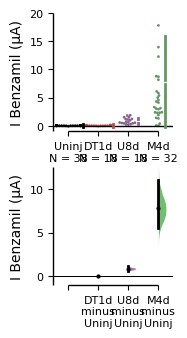

In [44]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3.5, 3)) 
fig1= shared_controlIBmil30.mean_diff.plot(swarm_ylim=(-1,20), contrast_ylim=(-1,12.5), custom_palette=colorsEST,fig_size=(2, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='I Benzamil (µA)',
                                    swarm_label='I Benzamil (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedir+"Fig3-EstStat-Bmil"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig3-EstStat-Bmil"+'.pdf')




In [45]:
Img419EIPA30 = EIPA30uninj.loc[EIPA30uninj['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419EIPA30.columns = ['M4d']

Img418EIPA30 = EIPA30uninj.loc[EIPA30uninj['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418EIPA30.columns = ['DT1d']

IpTL69EIPA30 = EIPA30uninj.loc[EIPA30uninj['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69EIPA30.columns = ['U8d']

IUninjEIPA30 = EIPA30uninj.loc[EIPA30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjEIPA30.columns = ['Uninj']

#concatenateData
IEIPAConcat = pd.concat([IUninjEIPA30.reset_index(drop=True),Img418EIPA30.reset_index(drop=True),Img419EIPA30.reset_index(drop=True),IpTL69EIPA30.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doing
IEIPAConcatuA = IEIPAConcat.astype(float)*1000000

#load Data
shared_controlIEIPA30 = dabest.load(IEIPAConcatuA, idx=("Uninj","DT1d",'U8d','M4d'))
shared_controlIEIPA30


DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:33:53 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. DT1d minus Uninj
2. U8d minus Uninj
3. M4d minus Uninj

5000 resamples will be used to generate the effect size bootstraps.

<Figure size 252x216 with 0 Axes>

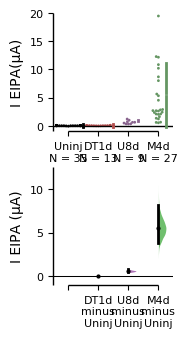

In [46]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3.5, 3)) 
fig1= shared_controlIEIPA30.mean_diff.plot(swarm_ylim=(-1,20), contrast_ylim=(-1,12.5), custom_palette=colorsEST,fig_size=(2, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='I EIPA (µA)',
                                    swarm_label='I EIPA(µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedir+"Fig3-EstStat-EIPA"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig3-EstStat-EIPA"+'.pdf')




In [47]:
Img419Phen30 = Phen30uninj.loc[Phen30uninj['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Phen30.columns = ['M4d']

Img418Phen30 = Phen30uninj.loc[Phen30uninj['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Phen30.columns = ['DT1d']

IpTL69Phen30 = Phen30uninj.loc[Phen30uninj['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Phen30.columns = ['U8d']

IUninjPhen30 = Phen30uninj.loc[Phen30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjPhen30.columns = ['Uninj']

#concatenateData
IPhenConcat = pd.concat([IUninjPhen30.reset_index(drop=True),Img418Phen30.reset_index(drop=True),Img419Phen30.reset_index(drop=True),IpTL69Phen30.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doing
IPhenConcatuA = IPhenConcat.astype(float)*1000000

#load Data
shared_controlIPhen30 = dabest.load(IPhenConcatuA, idx=("Uninj","DT1d",'U8d','M4d'))
shared_controlIPhen30


DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:33:57 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. DT1d minus Uninj
2. U8d minus Uninj
3. M4d minus Uninj

5000 resamples will be used to generate the effect size bootstraps.

<Figure size 252x216 with 0 Axes>

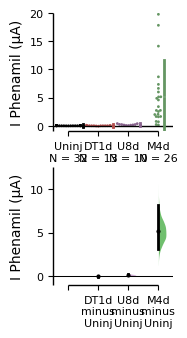

In [48]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3.5, 3)) 
fig1= shared_controlIPhen30.mean_diff.plot(swarm_ylim=(-1,20), contrast_ylim=(-1,12.5), custom_palette=colorsEST,fig_size=(2, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='I Phenamil (µA)',
                                    swarm_label='I Phenamil (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedir+"Fig3-EstStat-Phen"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig3-EstStat-Phen"+'.pdf')




In [49]:
Img419Bzd30 = Bzd30uninj.loc[Bzd30uninj['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Bzd30.columns = ['M4d']

Img418Bzd30 = Bzd30uninj.loc[Bzd30uninj['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Bzd30.columns = ['DT1d']

IpTL69Bzd30 = Bzd30uninj.loc[Bzd30uninj['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Bzd30.columns = ['U8d']

IUninjBzd30 = Bzd30uninj.loc[Bzd30uninj['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjBzd30.columns = ['Uninj']

#concatenateData
IBzdConcat = pd.concat([IUninjBzd30.reset_index(drop=True),Img418Bzd30.reset_index(drop=True),Img419Bzd30.reset_index(drop=True),IpTL69Bzd30.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doing
IBzdConcatuA = IBzdConcat.astype(float)*1000000

#load Data
shared_controlIBzd30 = dabest.load(IBzdConcatuA, idx=("Uninj","DT1d",'U8d','M4d'))
shared_controlIBzd30


DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:34:00 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. DT1d minus Uninj
2. U8d minus Uninj
3. M4d minus Uninj

5000 resamples will be used to generate the effect size bootstraps.

<Figure size 252x216 with 0 Axes>

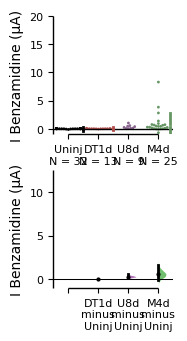

In [50]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3.5, 3)) 
fig1= shared_controlIBzd30.mean_diff.plot(swarm_ylim=(-1,20), contrast_ylim=(-1,12.5), custom_palette=colorsEST,fig_size=(2, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='I Benzamidine (µA)',
                                    swarm_label='I Benzamidine (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedir+"Fig3-EstStat-Bzd"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig3-EstStat-Bzd"+'.pdf')




#### DELTA values Amiloride ANALOGA Figure 3


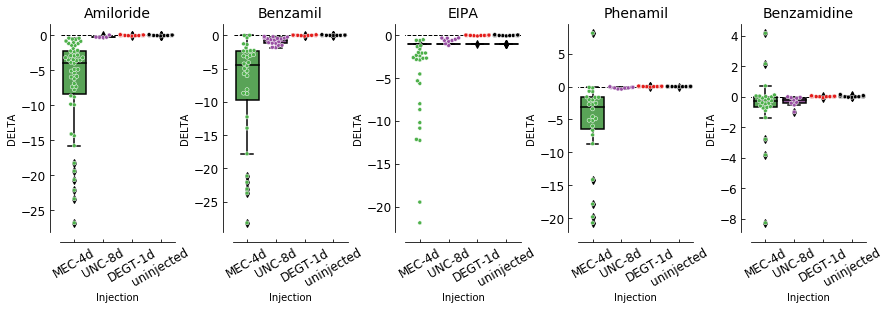

In [51]:
# Ratio data
# arranged by Injection
# maybe make another version arranged by drugs 

Drug= 'AmilAnaloga'
#How to plot all data from Amiloride .... rearrange daa
#Amiloride
fig = plt.figure(figsize=(16, 5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,5,1)
ax2 = plt.subplot(1,5,2)
ax3 = plt.subplot(1,5,3)
ax4 = plt.subplot(1,5,4)
ax5 = plt.subplot(1,5,5)

#sort data for amiloride!!!!
#Plot1
Amil30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluAmil30"]))] 
#Plot2
Bmil30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluBmil30"]))]
#Plot3
EIPA30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluEipa30"]))]
#Plot4
Phen30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluPhen30"]))]
#Plot5
Bzd30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluBzd30"]))] 


#plot 30 uM Amil
sns.swarmplot(x = Amil30['Injection'], y = Amil30['DELTA']*1000000*-1 , data = Amil30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax1,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = Amil30['Injection'], y = Amil30['DELTA']*1000000*-1 , data = Amil30, palette=sns.color_palette(colorsPharma),ax=ax1,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
#plot 30 uM Bmil
sns.swarmplot(x = Bmil30['Injection'], y = Bmil30['DELTA']*1000000*-1 , data = Bmil30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax2,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = Bmil30['Injection'], y = Bmil30['DELTA']*1000000*-1 , data = Bmil30, palette=sns.color_palette(colorsPharma),ax=ax2,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
#plot 30 uM EIPA
sns.swarmplot(x = EIPA30['Injection'], y = EIPA30['DELTA']*1000000*-1 , data = EIPA30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax3,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = EIPA30['Injection'], y = EIPA30['DELTA']-1 , data = EIPA30, palette=sns.color_palette(colorsPharma),ax=ax3,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
#plot 30 uM EIPA
sns.swarmplot(x = Phen30['Injection'], y = Phen30['DELTA']*1000000*-1 , data = Phen30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax4,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = Phen30['Injection'], y = Phen30['DELTA']*1000000*-1 , data = Phen30, palette=sns.color_palette(colorsPharma),ax=ax4,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
#plot 30 uM Bzd
sns.swarmplot(x = Bzd30['Injection'], y = Bzd30['DELTA']*1000000*-1 , data = Bzd30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax5,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = Bzd30['Injection'], y = Bzd30['DELTA']*1000000*-1 , data = Bzd30, palette=sns.color_palette(colorsPharma),ax=ax5,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])


##### AXIS 1 ####
#ax1.set_ylim([-1, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=12)  
ax1.set_title('Amiloride',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax1.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

##### AXIS 2 ####
#ax2.set_ylim([-1, 1])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=12)  
ax2.set_title('Benzamil',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

##### AXIS 3 ####
#ax3.set_ylim([-1, 1])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=12)  
ax3.set_title('EIPA',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax3.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

##### AXIS 4 ####
#ax4.set_ylim([-1, 1])
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=12)  
ax4.set_title('Phenamil',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax4.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

##### AXIS 5 ####
#ax5.set_ylim([-1, 1])
ax5.spines['right'].set_visible(False)                                  # no spine at the right
ax5.spines['top'].set_visible(False)                                     # no spine at the top
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position(('outward',10))  
ax5.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
ax5.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax5.tick_params(axis='both', which='major', labelsize=12)  
ax5.set_title('Benzamidine',size=14)
#a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax5.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

#plt.ylabel('Change in current', fontsize=16) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=16)
plt.gcf().subplots_adjust(bottom=0.3, left=0.2,hspace=0.75, wspace=0.5) 
#plt.suptitle('Amiloride 30 uM doses RATIO ', fontsize=16)
#plt.savefig(filedir+Drug+"-DELTA"+'.jpg')
plt.show()  # displays the plot


# figures for report (R35) AMILORIDE organized by channels

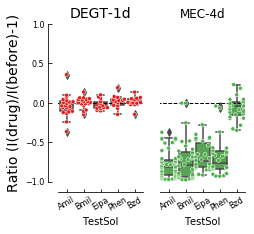

In [52]:
#arranged by Injection
# maybe make another version arranged by drugs 

Drug= 'AmilAnalog'
#How to plot all data from Amiloride .... rearrange daa
#Amiloride

figsize=(4, 6)

fig = plt.figure(figsize=(4, 3)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)


#sort data for amiloride!!!!
#Plot1
DEGT1_Amil = df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]))] 
#Plot2
MEC4_Amil = df[(df.Injection.isin(["mg419mg012"])) & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]))]
#Plot3
UNC8_Amil = df[(df.Injection.isin(["pTL69mg012"])) & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]))]
# #Plot4


orderInj =["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]
colorPlacehold =[(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29)]

#colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]

#plot 30 uM Amil
sns.swarmplot(x = DEGT1_Amil['TestSol'], y = DEGT1_Amil['RATIO']-1 , data = DEGT1_Amil,color = colorPlacehold[0], edgecolor='white', linewidth=0.5, size = 4,ax=ax1,order=orderInj)
sns.boxplot(x = DEGT1_Amil['TestSol'], y = DEGT1_Amil['RATIO']-1 , data = DEGT1_Amil, color = colorPlacehold[0],ax=ax1,order=orderInj)
#plot 30 uM Bmil
#sns.swarmplot(x = UNC8_NSAIDS['TestSol'], y = UNC8_NSAIDS['RATIO']-1 , data = UNC8_NSAIDS,color = colorPlacehold[1], edgecolor='white', linewidth=0.5, size = 4,ax=ax2,order=orderInj)
#sns.boxplot(x =  UNC8_NSAIDS['TestSol'], y = UNC8_NSAIDS['RATIO']-1 , data = UNC8_NSAIDS, color = colorPlacehold[1],ax=ax2,order=orderInj)
#plot 30 uM EIPA
sns.swarmplot(x =  MEC4_Amil['TestSol'], y = MEC4_Amil['RATIO']-1 , data = MEC4_Amil,color = colorPlacehold[2], edgecolor='white', linewidth=0.5, size = 4,ax=ax2,order=orderInj)
sns.boxplot(x =  MEC4_Amil['TestSol'], y = MEC4_Amil['RATIO']-1 , data = MEC4_Amil, color = colorPlacehold[2],ax=ax2,order=orderInj)
# #plot 30 uM EIPA
# sns.swarmplot(x = Phen30['Injection'], y = Phen30['RATIO']-1 , data = Phen30,palette=sns.color_palette(colorPlacehold), edgecolor='white', linewidth=0.5, size = 4,ax=ax4,order=orderInj)
# sns.boxplot(x = Phen30['Injection'], y = Phen30['RATIO']-1 , data = Phen30, palette=sns.color_palette(colorPlacehold),ax=ax4,order=orderInj)
# #plot 30 uM Bzd
# sns.swarmplot(x = Bzd30['Injection'], y = Bzd30['RATIO']-1 , data = Bzd30,palette=sns.color_palette(colorPlacehold), edgecolor='white', linewidth=0.5, size = 4,ax=ax5,order=orderInj)
# sns.boxplot(x = Bzd30['Injection'], y = Bzd30['RATIO']-1 , data = Bzd30, palette=sns.color_palette(colorPlacehold),ax=ax5,order=orderInj)


Ylimit = [-1,1]
legendlabel = ['Na', 'Li', 'K', 'Cs', 'NMG']

##### AXIS 1 ####
ax1.set_ylim(Ylimit)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=8)  
ax1.set_title('DEGT-1d',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax1.set_xticklabels(["Amil","Bmil","Eipa","Phen", "Bzd"],rotation=30)
#ax1.xaxis.set_visible(False)
#ax1.yaxis.set_visible(False)
#ax1.spines['left'].set_visible(False) 
#ax1.spines['bottom'].set_visible(False)  
ax1.set_yticks([-1,-0.5,0,0.5,1])
ax1.set_ylabel('Ratio (I(drug)/I(before)-1)',fontsize=14)



#legendlabel = ['Na', 'Li', 'K', 'Cs', 'NMG']
#ax1.legend(legendlabel,bbox_to_anchor=(0.4, 0.3, 0.11, 0.78),frameon=False)


##### AXIS 2 ####
ax2.set_ylim(Ylimit)
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=8)  
ax2.set_title('MEC-4d',size=12)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax2.set_xticklabels(["Amil","Bmil","Eipa","Phen", "Bzd"],rotation=30)
#ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines['left'].set_visible(False) 
#ax2.spines['bottom'].set_visible(False)  

# ##### AXIS 3 ####
# ax3.set_ylim(Ylimit)
# ax3.spines['right'].set_visible(False)                                  # no spine at the right
# ax3.spines['top'].set_visible(False)                                     # no spine at the top
# ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
# ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
# ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
# ax3.spines['bottom'].set_position(('outward',10))  
# ax3.spines['top'].set_position(('axes',5)) 
# ax3.get_yaxis().set_tick_params(direction='in')
# ax3.get_xaxis().set_tick_params(direction='in')
# ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
# ax3.tick_params(axis='both', which='major', labelsize=12)  
# ax3.set_title('MEC-4d',size=14)
# #ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
# ax3.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
# ax3.xaxis.set_visible(False)
# ax3.yaxis.set_visible(False)
# ax3.spines['left'].set_visible(False) 
# ax3.spines['bottom'].set_visible(False)  

# ax5.spines['bottom'].set_visible(False) 

#plt.ylabel('Change in current', fontsize=16) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=16)
plt.gcf().subplots_adjust(bottom=0.15, left=0.25,right=0.9,hspace=0.75, wspace=0.2) 
#plt.suptitle('Amiloride 30 uM doses RATIO ', fontsize=16)
#plt.savefig(filedir+"Fig3"+Drug+"-RATIO-noUninjected"+'.jpg')
plt.savefig(filedir+"Fig4"+Drug+"-RATIO-noUninjected-report"+'.eps')
plt.savefig(filedirManuscript+"Fig4"+Drug+"-RATIO-noUninjected-report"+'.pdf')
plt.show()  # displays the plot


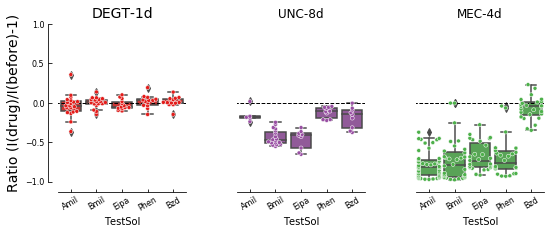

In [53]:
#arranged by CHANNEL
# maybe make another version arranged by drugs 

Drug= 'AmilAnalog'
#How to plot all data from Amiloride .... rearrange daa
#Amiloride

figsize=(9,3)

fig = plt.figure(figsize=(9, 3)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)

#sort data for amiloride!!!!
#Plot1
DEGT1_Amil = df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]))] 
#Plot2
MEC4_Amil = df[(df.Injection.isin(["mg419mg012"])) & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]))]
#Plot3
UNC8_Amil = df[(df.Injection.isin(["pTL69mg012"])) & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]))]
# #Plot4


orderInj =["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]
colorPlacehold =[(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29)]

#colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]

#plot 30 uM Amil
sns.swarmplot(x = DEGT1_Amil['TestSol'], y = DEGT1_Amil['RATIO']-1 , data = DEGT1_Amil,color = colorPlacehold[0], edgecolor='white', linewidth=0.5, size = 4,ax=ax1,order=orderInj)
sns.boxplot(x = DEGT1_Amil['TestSol'], y = DEGT1_Amil['RATIO']-1 , data = DEGT1_Amil, color = colorPlacehold[0],ax=ax1,order=orderInj)
#plot 30 uM Bmil
sns.swarmplot(x = UNC8_Amil['TestSol'], y = UNC8_Amil['RATIO']-1 , data = UNC8_Amil,color = colorPlacehold[1], edgecolor='white', linewidth=0.5, size = 4,ax=ax2,order=orderInj)
sns.boxplot(x =  UNC8_Amil['TestSol'], y = UNC8_Amil['RATIO']-1 , data = UNC8_Amil, color = colorPlacehold[1],ax=ax2,order=orderInj)
#plot 30 uM EIPA
sns.swarmplot(x =  MEC4_Amil['TestSol'], y = MEC4_Amil['RATIO']-1 , data = MEC4_Amil,color = colorPlacehold[2], edgecolor='white', linewidth=0.5, size = 4,ax=ax3,order=orderInj)
sns.boxplot(x =  MEC4_Amil['TestSol'], y = MEC4_Amil['RATIO']-1 , data = MEC4_Amil, color = colorPlacehold[2],ax=ax3,order=orderInj)
# #plot 30 uM EIPA
# sns.swarmplot(x = Phen30['Injection'], y = Phen30['RATIO']-1 , data = Phen30,palette=sns.color_palette(colorPlacehold), edgecolor='white', linewidth=0.5, size = 4,ax=ax4,order=orderInj)
# sns.boxplot(x = Phen30['Injection'], y = Phen30['RATIO']-1 , data = Phen30, palette=sns.color_palette(colorPlacehold),ax=ax4,order=orderInj)
# #plot 30 uM Bzd
# sns.swarmplot(x = Bzd30['Injection'], y = Bzd30['RATIO']-1 , data = Bzd30,palette=sns.color_palette(colorPlacehold), edgecolor='white', linewidth=0.5, size = 4,ax=ax5,order=orderInj)
# sns.boxplot(x = Bzd30['Injection'], y = Bzd30['RATIO']-1 , data = Bzd30, palette=sns.color_palette(colorPlacehold),ax=ax5,order=orderInj)


Ylimit = [-1,1]
legendlabel = ['Na', 'Li', 'K', 'Cs', 'NMG']

##### AXIS 1 ####
ax1.set_ylim(Ylimit)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=8)  
ax1.set_title('DEGT-1d',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax1.set_xticklabels(["Amil","Bmil","Eipa","Phen", "Bzd"],rotation=30)
#ax1.xaxis.set_visible(False)
#ax1.yaxis.set_visible(False)
#ax1.spines['left'].set_visible(False) 
#ax1.spines['bottom'].set_visible(False)  
ax1.set_yticks([-1,-0.5,0,0.5,1])
ax1.set_ylabel('Ratio (I(drug)/I(before)-1)',fontsize=14)



#legendlabel = ['Na', 'Li', 'K', 'Cs', 'NMG']
#ax1.legend(legendlabel,bbox_to_anchor=(0.4, 0.3, 0.11, 0.78),frameon=False)


##### AXIS 2 ####
ax2.set_ylim(Ylimit)
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=8)  
ax2.set_title('UNC-8d',size=12)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax2.set_xticklabels(["Amil","Bmil","Eipa","Phen", "Bzd"],rotation=30)
#ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines['left'].set_visible(False) 
#ax2.spines['bottom'].set_visible(False)  

# ##### AXIS 3 ####
ax3.set_ylim(Ylimit)
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=8)  
ax3.set_title('MEC-4d',size=12)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax3.set_xticklabels(["Amil","Bmil","Eipa","Phen", "Bzd"],rotation=30)
#ax2.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax3.spines['left'].set_visible(False) 
#ax2.spines['bottom'].set_visible(False)  

#plt.ylabel('Change in current', fontsize=16) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=16)
plt.gcf().subplots_adjust(bottom=0.15, left=0.15,hspace=0.75, wspace=0.4) 
plt.savefig(filedir+"Fig3"+Drug+"-RATIO-noUNi"+'.pdf')
#plt.savefig(filedir+"Fig3"+Drug+"-RATIO-noUNi"+'.eps')
plt.savefig(filedirManuscript+"Fig3"+Drug+"-RATIO-noUNi"+'.pdf')

plt.show()  # displays the plot


## Ratio NSAIDs Figure 3 - OLD VERSIONS FIGURES

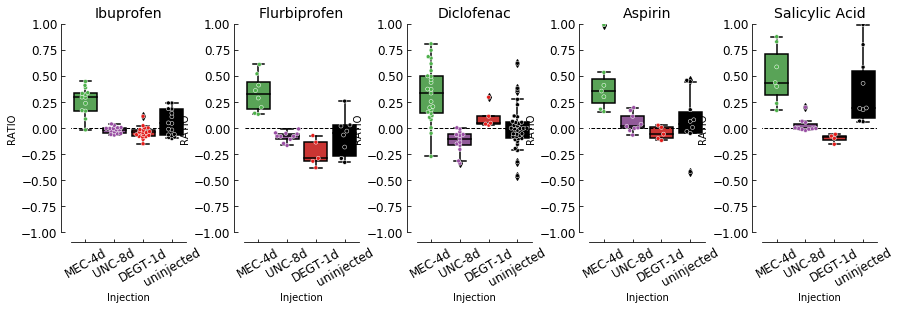

In [54]:
#arranged by Injection
# maybe make another version arranged by drugs 

Drug= 'NSAIDS'
#How to plot all data from Amiloride .... rearrange daa
#Amiloride
fig = plt.figure(figsize=(16, 5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,5,1)
ax2 = plt.subplot(1,5,2)
ax3 = plt.subplot(1,5,3)
ax4 = plt.subplot(1,5,4)
ax5 = plt.subplot(1,5,5)

#sort data for amiloride!!!!
#Plot1
Amil30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluIbu30"]))] 
#Plot2
Bmil30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluFibu30"]))]
#Plot3
EIPA30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluDiclo30"]))]
#Plot4
Phen30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluAsp30"]))]
#Plot5
Bzd30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluSA30"]))] 


#plot 30 uM Amil
sns.swarmplot(x = Amil30['Injection'], y = Amil30['RATIO']-1 , data = Amil30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax1,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = Amil30['Injection'], y = Amil30['RATIO']-1 , data = Amil30, palette=sns.color_palette(colorsPharma),ax=ax1,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
#plot 30 uM Bmil
sns.swarmplot(x = Bmil30['Injection'], y = Bmil30['RATIO']-1 , data = Bmil30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax2,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = Bmil30['Injection'], y = Bmil30['RATIO']-1 , data = Bmil30, palette=sns.color_palette(colorsPharma),ax=ax2,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
#plot 30 uM EIPA
sns.swarmplot(x = EIPA30['Injection'], y = EIPA30['RATIO']-1 , data = EIPA30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax3,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = EIPA30['Injection'], y = EIPA30['RATIO']-1 , data = EIPA30, palette=sns.color_palette(colorsPharma),ax=ax3,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
#plot 30 uM EIPA
sns.swarmplot(x = Phen30['Injection'], y = Phen30['RATIO']-1 , data = Phen30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax4,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = Phen30['Injection'], y = Phen30['RATIO']-1 , data = Phen30, palette=sns.color_palette(colorsPharma),ax=ax4,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
#plot 30 uM Bzd
sns.swarmplot(x = Bzd30['Injection'], y = Bzd30['RATIO']-1 , data = Bzd30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax5,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = Bzd30['Injection'], y = Bzd30['RATIO']-1 , data = Bzd30, palette=sns.color_palette(colorsPharma),ax=ax5,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])


##### AXIS 1 ####
ax1.set_ylim([-1, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=12)  
ax1.set_title('Ibuprofen',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax1.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

##### AXIS 2 ####
ax2.set_ylim([-1, 1])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=12)  
ax2.set_title('Flurbiprofen',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

##### AXIS 3 ####
ax3.set_ylim([-1, 1])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=12)  
ax3.set_title('Diclofenac',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax3.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

##### AXIS 4 ####
ax4.set_ylim([-1, 1])
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=12)  
ax4.set_title('Aspirin',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax4.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

##### AXIS 5 ####
ax5.set_ylim([-1, 1])
ax5.spines['right'].set_visible(False)                                  # no spine at the right
ax5.spines['top'].set_visible(False)                                     # no spine at the top
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position(('outward',10))  
ax5.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
ax5.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax5.tick_params(axis='both', which='major', labelsize=12)  
ax5.set_title('Salicylic Acid',size=14)
#a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax5.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

#plt.ylabel('Change in current', fontsize=16) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=16)
plt.gcf().subplots_adjust(bottom=0.3, left=0.2,hspace=0.75, wspace=0.5) 
#plt.suptitle('Amiloride 30 uM doses RATIO ', fontsize=16)
#plt.savefig(filedir+Drug+"-RATIO"+'.jpg')
plt.show()  # displays the plot


### RATIO NSAIDs FIGURE 3 without uninjected oocytes

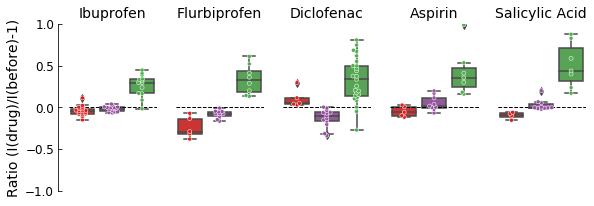

In [55]:
#arranged by Injection
# maybe make another version arranged by drugs 

Drug= 'NSAIDS'
#How to plot all data from Amiloride .... rearrange daa
#Amiloride
fig = plt.figure(figsize=(12, 4)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,5,1)
ax2 = plt.subplot(1,5,2)
ax3 = plt.subplot(1,5,3)
ax4 = plt.subplot(1,5,4)
ax5 = plt.subplot(1,5,5)

#sort data for amiloride!!!!
#Plot1
Amil30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012"])) & (df.TestSol.isin(["NaGluIbu30"]))] 
#Plot2
Bmil30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012"])) & (df.TestSol.isin(["NaGluFibu30"]))]
#Plot3
EIPA30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012"])) & (df.TestSol.isin(["NaGluDiclo30"]))]
#Plot4
Phen30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012"])) & (df.TestSol.isin(["NaGluAsp30"]))]
#Plot5
Bzd30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012"])) & (df.TestSol.isin(["NaGluSA30"]))] 


orderInj =["mg418mg012","pTL69mg012","mg419mg012"]
colorPlacehold =[(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29)]

#colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]

#plot 30 uM Amil
sns.swarmplot(x = Amil30['Injection'], y = Amil30['RATIO']-1 , data = Amil30,palette=sns.color_palette(colorPlacehold), edgecolor='white', linewidth=0.5, size = 4,ax=ax1,order=orderInj)
sns.boxplot(x = Amil30['Injection'], y = Amil30['RATIO']-1 , data = Amil30, palette=sns.color_palette(colorPlacehold),ax=ax1,order=orderInj)
#plot 30 uM Bmil
sns.swarmplot(x = Bmil30['Injection'], y = Bmil30['RATIO']-1 , data = Bmil30,palette=sns.color_palette(colorPlacehold), edgecolor='white', linewidth=0.5, size = 4,ax=ax2,order=orderInj)
sns.boxplot(x = Bmil30['Injection'], y = Bmil30['RATIO']-1 , data = Bmil30, palette=sns.color_palette(colorPlacehold),ax=ax2,order=orderInj)
#plot 30 uM EIPA
sns.swarmplot(x = EIPA30['Injection'], y = EIPA30['RATIO']-1 , data = EIPA30,palette=sns.color_palette(colorPlacehold), edgecolor='white', linewidth=0.5, size = 4,ax=ax3,order=orderInj)
sns.boxplot(x = EIPA30['Injection'], y = EIPA30['RATIO']-1 , data = EIPA30, palette=sns.color_palette(colorPlacehold),ax=ax3,order=orderInj)
#plot 30 uM EIPA
sns.swarmplot(x = Phen30['Injection'], y = Phen30['RATIO']-1 , data = Phen30,palette=sns.color_palette(colorPlacehold), edgecolor='white', linewidth=0.5, size = 4,ax=ax4,order=orderInj)
sns.boxplot(x = Phen30['Injection'], y = Phen30['RATIO']-1 , data = Phen30, palette=sns.color_palette(colorPlacehold),ax=ax4,order=orderInj)
#plot 30 uM Bzd
sns.swarmplot(x = Bzd30['Injection'], y = Bzd30['RATIO']-1 , data = Bzd30,palette=sns.color_palette(colorPlacehold), edgecolor='white', linewidth=0.5, size = 4,ax=ax5,order=orderInj)
sns.boxplot(x = Bzd30['Injection'], y = Bzd30['RATIO']-1 , data = Bzd30, palette=sns.color_palette(colorPlacehold),ax=ax5,order=orderInj)


Ylimit = [-1,1]
legendlabel = ['Na', 'Li', 'K', 'Cs', 'NMG']

##### AXIS 1 ####
ax1.set_ylim(Ylimit)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=12)  
ax1.set_title('Ibuprofen',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax1.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax1.xaxis.set_visible(False)
#ax1.yaxis.set_visible(False)
#ax1.spines['left'].set_visible(False) 
ax1.spines['bottom'].set_visible(False)  
ax1.set_yticks([-1,-0.5,0,0.5,1])
ax1.set_ylabel('Ratio (I(drug)/I(before)-1)',fontsize=14)

#legendlabel = ['Na', 'Li', 'K', 'Cs', 'NMG']
#ax1.legend(legendlabel,bbox_to_anchor=(0.4, 0.3, 0.11, 0.78),frameon=False)


##### AXIS 2 ####
ax2.set_ylim(Ylimit)
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=12)  
ax2.set_title('Flurbiprofen',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines['left'].set_visible(False) 
ax2.spines['bottom'].set_visible(False)  

##### AXIS 3 ####
ax3.set_ylim(Ylimit)
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=12)  
ax3.set_title('Diclofenac',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax3.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax3.spines['left'].set_visible(False) 
ax3.spines['bottom'].set_visible(False)  

##### AXIS 4 ####
ax4.set_ylim(Ylimit)
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=12)  
ax4.set_title('Aspirin',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax4.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax4.xaxis.set_visible(False)
ax4.yaxis.set_visible(False)
ax4.spines['left'].set_visible(False) 
ax4.spines['bottom'].set_visible(False)  

##### AXIS 5 ####
ax5.set_ylim(Ylimit)
ax5.spines['right'].set_visible(False)                                  # no spine at the right
ax5.spines['top'].set_visible(False)                                     # no spine at the top
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position(('outward',10))  
ax5.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
ax5.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax5.tick_params(axis='both', which='major', labelsize=12)  
ax5.set_title('Salicylic Acid',size=14)
#a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax5.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax5.xaxis.set_visible(False)
ax5.yaxis.set_visible(False)
ax5.spines['left'].set_visible(False) 
ax5.spines['bottom'].set_visible(False) 

#plt.ylabel('Change in current', fontsize=16) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=16)
plt.gcf().subplots_adjust(bottom=0.3, left=0.3,hspace=0.75, wspace=0.2) 
#plt.suptitle('Amiloride 30 uM doses RATIO ', fontsize=16)
#plt.savefig(filedir+"Fig4"+Drug+"-RATIO-noUninjected"+'.eps')
#plt.savefig(filedirManuscript+"Fig4"+Drug+"-RATIO-noUninjected"+'.pdf')
plt.show()  # displays the plot


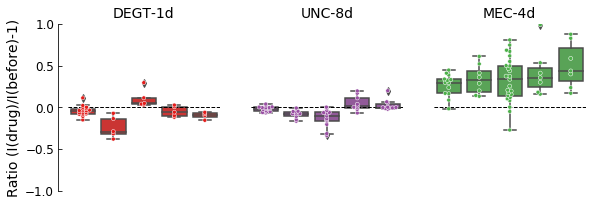

In [56]:
#arranged by Injection
# maybe make another version arranged by drugs 

Drug= 'NSAIDS'
#How to plot all data from Amiloride .... rearrange daa
#Amiloride
fig = plt.figure(figsize=(12, 4)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)


#sort data for amiloride!!!!
#Plot1
DEGT1_NSAIDS = df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]))] 
#Plot2
MEC4_NSAIDS = df[(df.Injection.isin(["mg419mg012"])) & (df.TestSol.isin(["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]))]
#Plot3
UNC8_NSAIDS = df[(df.Injection.isin(["pTL69mg012"])) & (df.TestSol.isin(["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]))]
# #Plot4
# Phen30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012"])) & (df.TestSol.isin(["NaGluAsp30"]))]
# #Plot5
# Bzd30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012"])) & (df.TestSol.isin(["NaGluSA30"]))] 


orderInj =["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]
colorPlacehold =[(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29)]

#colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]

#plot 30 uM Amil
sns.swarmplot(x = DEGT1_NSAIDS['TestSol'], y = DEGT1_NSAIDS['RATIO']-1 , data = DEGT1_NSAIDS,color = colorPlacehold[0], edgecolor='white', linewidth=0.5, size = 4,ax=ax1,order=orderInj)
sns.boxplot(x = DEGT1_NSAIDS['TestSol'], y = DEGT1_NSAIDS['RATIO']-1 , data = DEGT1_NSAIDS, color = colorPlacehold[0],ax=ax1,order=orderInj)
#plot 30 uM Bmil
sns.swarmplot(x = UNC8_NSAIDS['TestSol'], y = UNC8_NSAIDS['RATIO']-1 , data = UNC8_NSAIDS,color = colorPlacehold[1], edgecolor='white', linewidth=0.5, size = 4,ax=ax2,order=orderInj)
sns.boxplot(x =  UNC8_NSAIDS['TestSol'], y = UNC8_NSAIDS['RATIO']-1 , data = UNC8_NSAIDS, color = colorPlacehold[1],ax=ax2,order=orderInj)
#plot 30 uM EIPA
sns.swarmplot(x =  MEC4_NSAIDS['TestSol'], y = MEC4_NSAIDS['RATIO']-1 , data = MEC4_NSAIDS,color = colorPlacehold[2], edgecolor='white', linewidth=0.5, size = 4,ax=ax3,order=orderInj)
sns.boxplot(x =  MEC4_NSAIDS['TestSol'], y = MEC4_NSAIDS['RATIO']-1 , data = MEC4_NSAIDS, color = colorPlacehold[2],ax=ax3,order=orderInj)
# #plot 30 uM EIPA
# sns.swarmplot(x = Phen30['Injection'], y = Phen30['RATIO']-1 , data = Phen30,palette=sns.color_palette(colorPlacehold), edgecolor='white', linewidth=0.5, size = 4,ax=ax4,order=orderInj)
# sns.boxplot(x = Phen30['Injection'], y = Phen30['RATIO']-1 , data = Phen30, palette=sns.color_palette(colorPlacehold),ax=ax4,order=orderInj)
# #plot 30 uM Bzd
# sns.swarmplot(x = Bzd30['Injection'], y = Bzd30['RATIO']-1 , data = Bzd30,palette=sns.color_palette(colorPlacehold), edgecolor='white', linewidth=0.5, size = 4,ax=ax5,order=orderInj)
# sns.boxplot(x = Bzd30['Injection'], y = Bzd30['RATIO']-1 , data = Bzd30, palette=sns.color_palette(colorPlacehold),ax=ax5,order=orderInj)


Ylimit = [-1,1]
legendlabel = ['Na', 'Li', 'K', 'Cs', 'NMG']

##### AXIS 1 ####
ax1.set_ylim(Ylimit)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=12)  
ax1.set_title('DEGT-1d',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax1.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax1.xaxis.set_visible(False)
#ax1.yaxis.set_visible(False)
#ax1.spines['left'].set_visible(False) 
ax1.spines['bottom'].set_visible(False)  
ax1.set_yticks([-1,-0.5,0,0.5,1])
ax1.set_ylabel('Ratio (I(drug)/I(before)-1)',fontsize=14)

#legendlabel = ['Na', 'Li', 'K', 'Cs', 'NMG']
#ax1.legend(legendlabel,bbox_to_anchor=(0.4, 0.3, 0.11, 0.78),frameon=False)


##### AXIS 2 ####
ax2.set_ylim(Ylimit)
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=12)  
ax2.set_title('UNC-8d',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines['left'].set_visible(False) 
ax2.spines['bottom'].set_visible(False)  

##### AXIS 3 ####
ax3.set_ylim(Ylimit)
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=12)  
ax3.set_title('MEC-4d',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax3.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax3.spines['left'].set_visible(False) 
ax3.spines['bottom'].set_visible(False)  

# ##### AXIS 4 ####
# ax4.set_ylim(Ylimit)
# ax4.spines['right'].set_visible(False)                                  # no spine at the right
# ax4.spines['top'].set_visible(False)                                     # no spine at the top
# ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
# ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
# ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
# ax4.spines['bottom'].set_position(('outward',10))  
# ax4.spines['top'].set_position(('axes',5)) 
# ax4.get_yaxis().set_tick_params(direction='in')
# ax4.get_xaxis().set_tick_params(direction='in')
# ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
# ax4.tick_params(axis='both', which='major', labelsize=12)  
# ax4.set_title('Aspirin',size=14)
# #ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
# ax4.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
# ax4.xaxis.set_visible(False)
# ax4.yaxis.set_visible(False)
# ax4.spines['left'].set_visible(False) 
# ax4.spines['bottom'].set_visible(False)  

# ##### AXIS 5 ####
# ax5.set_ylim(Ylimit)
# ax5.spines['right'].set_visible(False)                                  # no spine at the right
# ax5.spines['top'].set_visible(False)                                     # no spine at the top
# ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
# ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
# ax5.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
# ax5.spines['bottom'].set_position(('outward',10))  
# ax5.spines['top'].set_position(('axes',5)) 
# ax5.get_yaxis().set_tick_params(direction='in')
# ax5.get_xaxis().set_tick_params(direction='in')
# ax5.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
# ax5.tick_params(axis='both', which='major', labelsize=12)  
# ax5.set_title('Salicylic Acid',size=14)
# #a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
# ax5.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
# ax5.xaxis.set_visible(False)
# ax5.yaxis.set_visible(False)
# ax5.spines['left'].set_visible(False) 
# ax5.spines['bottom'].set_visible(False) 

#plt.ylabel('Change in current', fontsize=16) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=16)
plt.gcf().subplots_adjust(bottom=0.3, left=0.3,hspace=0.75, wspace=0.2) 
#plt.suptitle('Amiloride 30 uM doses RATIO ', fontsize=16)
#plt.savefig(filedir+"Fig3"+Drug+"-RATIO-noUninjected"+'.jpg')
plt.savefig(filedir+"Fig4"+Drug+"-RATIO-noUninjected"+'.eps')
plt.savefig(filedirManuscript+"Fig4"+Drug+"-RATIO-noUninjected"+'.pdf')
plt.show()  # displays the plot


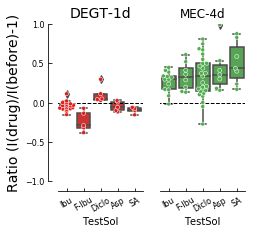

In [57]:
#arranged by Injection
# maybe make another version arranged by drugs 

Drug= 'NSAIDS'
#How to plot all data from Amiloride .... rearrange daa
#Amiloride

figsize=(4, 6)

fig = plt.figure(figsize=(4, 3)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)


#sort data for amiloride!!!!
#Plot1
DEGT1_NSAIDS = df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]))] 
#Plot2
MEC4_NSAIDS = df[(df.Injection.isin(["mg419mg012"])) & (df.TestSol.isin(["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]))]
#Plot3
UNC8_NSAIDS = df[(df.Injection.isin(["pTL69mg012"])) & (df.TestSol.isin(["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]))]
# #Plot4
# Phen30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012"])) & (df.TestSol.isin(["NaGluAsp30"]))]
# #Plot5
# Bzd30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012"])) & (df.TestSol.isin(["NaGluSA30"]))] 


orderInj =["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]
colorPlacehold =[(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29)]

#colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]

#plot 30 uM Amil
sns.swarmplot(x = DEGT1_NSAIDS['TestSol'], y = DEGT1_NSAIDS['RATIO']-1 , data = DEGT1_NSAIDS,color = colorPlacehold[0], edgecolor='white', linewidth=0.5, size = 4,ax=ax1,order=orderInj)
sns.boxplot(x = DEGT1_NSAIDS['TestSol'], y = DEGT1_NSAIDS['RATIO']-1 , data = DEGT1_NSAIDS, color = colorPlacehold[0],ax=ax1,order=orderInj)
#plot 30 uM Bmil
#sns.swarmplot(x = UNC8_NSAIDS['TestSol'], y = UNC8_NSAIDS['RATIO']-1 , data = UNC8_NSAIDS,color = colorPlacehold[1], edgecolor='white', linewidth=0.5, size = 4,ax=ax2,order=orderInj)
#sns.boxplot(x =  UNC8_NSAIDS['TestSol'], y = UNC8_NSAIDS['RATIO']-1 , data = UNC8_NSAIDS, color = colorPlacehold[1],ax=ax2,order=orderInj)
#plot 30 uM EIPA
sns.swarmplot(x =  MEC4_NSAIDS['TestSol'], y = MEC4_NSAIDS['RATIO']-1 , data = MEC4_NSAIDS,color = colorPlacehold[2], edgecolor='white', linewidth=0.5, size = 4,ax=ax2,order=orderInj)
sns.boxplot(x =  MEC4_NSAIDS['TestSol'], y = MEC4_NSAIDS['RATIO']-1 , data = MEC4_NSAIDS, color = colorPlacehold[2],ax=ax2,order=orderInj)
# #plot 30 uM EIPA
# sns.swarmplot(x = Phen30['Injection'], y = Phen30['RATIO']-1 , data = Phen30,palette=sns.color_palette(colorPlacehold), edgecolor='white', linewidth=0.5, size = 4,ax=ax4,order=orderInj)
# sns.boxplot(x = Phen30['Injection'], y = Phen30['RATIO']-1 , data = Phen30, palette=sns.color_palette(colorPlacehold),ax=ax4,order=orderInj)
# #plot 30 uM Bzd
# sns.swarmplot(x = Bzd30['Injection'], y = Bzd30['RATIO']-1 , data = Bzd30,palette=sns.color_palette(colorPlacehold), edgecolor='white', linewidth=0.5, size = 4,ax=ax5,order=orderInj)
# sns.boxplot(x = Bzd30['Injection'], y = Bzd30['RATIO']-1 , data = Bzd30, palette=sns.color_palette(colorPlacehold),ax=ax5,order=orderInj)


Ylimit = [-1,1]
legendlabel = ['Na', 'Li', 'K', 'Cs', 'NMG']

##### AXIS 1 ####
ax1.set_ylim(Ylimit)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=8)  
ax1.set_title('DEGT-1d',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax1.set_xticklabels(["Ibu","F-Ibu","Diclo","Asp", "SA"],rotation=30)
#ax1.xaxis.set_visible(False)
#ax1.yaxis.set_visible(False)
#ax1.spines['left'].set_visible(False) 
#ax1.spines['bottom'].set_visible(False)  
ax1.set_yticks([-1,-0.5,0,0.5,1])
ax1.set_ylabel('Ratio (I(drug)/I(before)-1)',fontsize=14)

#legendlabel = ['Na', 'Li', 'K', 'Cs', 'NMG']
#ax1.legend(legendlabel,bbox_to_anchor=(0.4, 0.3, 0.11, 0.78),frameon=False)


##### AXIS 2 ####
ax2.set_ylim(Ylimit)
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=8)  
ax2.set_title('MEC-4d',size=12)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax2.set_xticklabels(["Ibu","F-Ibu","Diclo","Asp", "SA"],rotation=30)
#ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines['left'].set_visible(False) 
#ax2.spines['bottom'].set_visible(False)  


# ##### AXIS 3 ####
# ax3.set_ylim(Ylimit)
# ax3.spines['right'].set_visible(False)                                  # no spine at the right
# ax3.spines['top'].set_visible(False)                                     # no spine at the top
# ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
# ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
# ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
# ax3.spines['bottom'].set_position(('outward',10))  
# ax3.spines['top'].set_position(('axes',5)) 
# ax3.get_yaxis().set_tick_params(direction='in')
# ax3.get_xaxis().set_tick_params(direction='in')
# ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
# ax3.tick_params(axis='both', which='major', labelsize=12)  
# ax3.set_title('MEC-4d',size=14)
# #ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
# ax3.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
# ax3.xaxis.set_visible(False)
# ax3.yaxis.set_visible(False)
# ax3.spines['left'].set_visible(False) 
# ax3.spines['bottom'].set_visible(False)  

# ##### AXIS 4 ####
# ax4.set_ylim(Ylimit)
# ax4.spines['right'].set_visible(False)                                  # no spine at the right
# ax4.spines['top'].set_visible(False)                                     # no spine at the top
# ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
# ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
# ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
# ax4.spines['bottom'].set_position(('outward',10))  
# ax4.spines['top'].set_position(('axes',5)) 
# ax4.get_yaxis().set_tick_params(direction='in')
# ax4.get_xaxis().set_tick_params(direction='in')
# ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
# ax4.tick_params(axis='both', which='major', labelsize=12)  
# ax4.set_title('Aspirin',size=14)
# #ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
# ax4.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
# ax4.xaxis.set_visible(False)
# ax4.yaxis.set_visible(False)
# ax4.spines['left'].set_visible(False) 
# ax4.spines['bottom'].set_visible(False)  

# ##### AXIS 5 ####
# ax5.set_ylim(Ylimit)
# ax5.spines['right'].set_visible(False)                                  # no spine at the right
# ax5.spines['top'].set_visible(False)                                     # no spine at the top
# ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
# ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
# ax5.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
# ax5.spines['bottom'].set_position(('outward',10))  
# ax5.spines['top'].set_position(('axes',5)) 
# ax5.get_yaxis().set_tick_params(direction='in')
# ax5.get_xaxis().set_tick_params(direction='in')
# ax5.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
# ax5.tick_params(axis='both', which='major', labelsize=12)  
# ax5.set_title('Salicylic Acid',size=14)
# #a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
# ax5.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
# ax5.xaxis.set_visible(False)
# ax5.yaxis.set_visible(False)
# ax5.spines['left'].set_visible(False) 
# ax5.spines['bottom'].set_visible(False) 

#plt.ylabel('Change in current', fontsize=16) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=16)
plt.gcf().subplots_adjust(bottom=0.15, left=0.25,right=0.9,hspace=0.75, wspace=0.2) 
#plt.suptitle('Amiloride 30 uM doses RATIO ', fontsize=16)
#plt.savefig(filedir+"Fig3"+Drug+"-RATIO-noUninjected"+'.jpg')
plt.savefig(filedir+"Fig4"+Drug+"-RATIO-noUninjected-report"+'.eps')
plt.savefig(filedirManuscript+"Fig4"+Drug+"-RATIO-noUninjected-report"+'.pdf')
plt.show()  # displays the plot


# Estimation statistics for NSAIDs

In [58]:
#SortNSAID Data
Ibu30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluIbu30"]))] 
#Plot2
Fibu30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluFibu30"]))]
#Plot3
Diclo30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluDiclo30"]))]
#Plot4
Asp30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluAsp30"]))]
#Plot5
SA30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluSA30"]))] 


## calculate mean values to pick representative traces NSAIDs

In [59]:
pivotIbu30 = Ibu30.pivot(columns='Injection', values='DELTA').describe().T

Ibu30.to_csv(filedirManuscriptStat+'Ibuprofen30uM.csv', header=True, sep=',', mode='w')

MeanIbu30 = pivotIbu30['mean']*1000000
MeanIbu30 = MeanIbu30.round(2)
SDIbu30 = pivotIbu30['std']*1000000
SDIbu30 = SDIbu30.round(2)
countIbu30 = pivotIbu30['count']
SEMIbu30 = SDIbu30/countIbu30
SEMIbu30 = SEMIbu30.round(3)
print(countIbu30)

Injection
mg418mg012    18.0
mg419mg012    13.0
pTL69mg012    15.0
uninjected    17.0
Name: count, dtype: float64


### Flurbiprofen

In [60]:
pivotFibu30 = Fibu30.pivot(columns='Injection', values='DELTA').describe().T

Fibu30.to_csv(filedirManuscriptStat+'Flurbiprofen30uM.csv', header=True, sep=',', mode='w')

MeanFibu30 = pivotFibu30['mean']*1000000
MeanFibu30 = MeanFibu30.round(2)
SDFibu30 = pivotFibu30['std']*1000000
SDFibu30 = SDFibu30.round(2)
countFibu30 = pivotFibu30['count']
SEMFibu30 = SDFibu30/countFibu30
SEMFibu30 = SEMFibu30.round(3)
print(countFibu30)

Injection
mg418mg012     5.0
mg419mg012     8.0
pTL69mg012    10.0
uninjected    10.0
Name: count, dtype: float64


### Diclofenac

In [61]:
pivotDiclo30 = Diclo30.pivot(columns='Injection', values='DELTA').describe().T

Diclo30.to_csv(filedirManuscriptStat+'Diclofenac30uM.csv', header=True, sep=',', mode='w')

MeanDiclo30 = pivotDiclo30['mean']*1000000
MeanDiclo30 = MeanDiclo30.round(2)
SDDiclo30 = pivotDiclo30['std']*1000000
SDDiclo30 = SDDiclo30.round(2)
countDiclo30 = pivotDiclo30['count']
SEMDiclo30 = SDDiclo30/countDiclo30
SEMDiclo30 = SEMDiclo30.round(3)
print(countDiclo30)

Injection
mg418mg012     5.0
mg419mg012    25.0
pTL69mg012    13.0
uninjected    34.0
Name: count, dtype: float64


### Aspirin

In [62]:
pivotAsp30 = Asp30.pivot(columns='Injection', values='DELTA').describe().T

Asp30.to_csv(filedirManuscriptStat+'Aspirin30uM.csv', header=True, sep=',', mode='w')

MeanAsp30 = pivotAsp30['mean']*1000000
MeanAsp30 = MeanAsp30.round(2)
SDAsp30 = pivotAsp30['std']*1000000
SDAsp30 = SDAsp30.round(2)
countAsp30 = pivotAsp30['count']
SEMAsp30 = SDAsp30/countAsp30
SEMAsp30 = SEMAsp30.round(3)
print(countAsp30)

Injection
mg418mg012     5.0
mg419mg012     7.0
pTL69mg012     9.0
uninjected    10.0
Name: count, dtype: float64


### Salicycil Acid

In [63]:
pivotSA30 = SA30.pivot(columns='Injection', values='DELTA').describe().T

SA30.to_csv(filedirManuscriptStat+'SalicylicAcid30uM.csv', header=True, sep=',', mode='w')

MeanSA30 = pivotSA30['mean']*1000000
MeanSA30 = MeanSA30.round(2)
SDSA30 = pivotSA30['std']*1000000
SDSA30 = SDSA30.round(2)
countSA30 = pivotSA30['count']
SEMSA30 = SDSA30/countSA30
SEMSA30 = SEMSA30.round(3)
print(countSA30)

Injection
mg418mg012     4.0
mg419mg012     7.0
pTL69mg012    10.0
uninjected    10.0
Name: count, dtype: float64


# ESTIMATION STATISTICS ACCORDING TO CHANNEL - NSAIDs

### NSAIDS estimation stats DEGT-1d

In [64]:
Ibu30
Fibu30
Diclo30
Asp30
SA30


,CellIDRec,Injection,CultivationSol,DaysPostInj,Rating,StartSol,TestSol,MeanSTART,MeanTEST,DELTA,RATIO,VrevSTART,VrevTEST,DELTAVrev,copyCELL,RestingVM
974,STFX074011,mg418mg012,L-15(300Amil),6,4.0,NaGlu2,NaGluSA30,-5.128878e-07,-4.332638e-07,7.962397e-08,0.844754,-0.036204,-0.038235,-0.002031,STFX074011,-16.0
975,STFX074016,mg418mg012,L-15(300Amil),6,3.0,NaGlu1,NaGluSA30,-8.625203e-07,-7.775152e-07,8.500515e-08,0.901446,-0.023369,-0.023089,0.000280,STFX074016,-21.0
976,STFX073005,mg418mg012,L-15(300Amil),4,3.0,NaGlu6,NaGluSA30,-7.516993e-07,-6.939446e-07,5.775469e-08,0.923168,-0.026433,-0.027136,-0.000703,STFX073005,-15.7
977,STFX074006,mg418mg012,L-15(300Amil),4,3.0,NaGlu2,NaGluSA30,-3.650946e-07,-3.431187e-07,2.197585e-08,0.939808,-0.037636,-0.038145,-0.000509,STFX074006,-23.0
1899,STFX074020,mg419mg012,L-15(300Amil),6,4.0,NaGlu2,NaGluSA30,-1.610446e-05,-1.881326e-05,-2.708805e-06,1.168202,-0.014585,-0.013715,0.000870,STFX074020,-23.0
1900,STFX074007,mg419mg012,L-15(300Amil),4,3.0,NaGlu2,NaGluSA30,-1.919413e-05,-2.371552e-05,-4.521386e-06,1.235561,-0.003268,-0.003656,-0.000388,STFX074007,-19.5
1901,STFX073021,mg419mg012,L-15(300Amil),6,3.0,NaGlu2,NaGluSA30,-1.008247e-05,-1.410044e-05,-4.017966e-06,1.398510,-0.010655,-0.010149,0.000506,STFX073021,5.3
1902,STFX075001,mg419mg012,L-15(300Amil),4,3.0,NaGlu2,NaGluSA30,-7.855655e-06,-1.127504e-05,-3.419388e-06,1.435277,-0.009892,-0.009735,0.000157,STFX075001,-7.4
1903,STFX075006,mg419mg012,L-15(300Amil),4,4.0,NaGlu2,NaGluSA30,-1.000693e-05,-1.586428e-05,-5.857358e-06,1.585330,-0.010412,-0.009348,0.001064,STFX075006,-7.4
1904,STFX073001,mg419mg012,L-15(300Amil),4,3.0,NaGlu2,NaGluSA30,-1.054761e-05,-1.926753e-05,-8.719924e-06,1.826721,-0.010654,-0.009258,0.001396,STFX073001,5.3


In [65]:
Img418Ibu30= Ibu30.loc[Ibu30['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Ibu30.columns = ['DT1d-Ibu']

Img418Fibu30 = Fibu30.loc[Fibu30['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Fibu30.columns = ['DT1d-Fibu']

Img418Diclo30= Diclo30.loc[Diclo30['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Diclo30.columns = ['DT1d-Diclo']

Img418Asp30= Asp30.loc[Asp30['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Asp30.columns = ['DT1d-Asp']

Img418SA30= SA30.loc[SA30['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418SA30.columns = ['DT1d-SA']


UninjIbu30 = Ibu30.loc[Ibu30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjIbu30.columns = ['Uninj-Ibu']

UninjFibu30 = Fibu30.loc[Fibu30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjFibu30.columns = ['Uninj-Fibu']

UninjDiclo30 = Diclo30.loc[Diclo30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjDiclo30.columns = ['Uninj-Diclo']

UninjAsp30 = Asp30.loc[Asp30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjAsp30.columns = ['Uninj-Asp']

UninjSA30 = SA30.loc[SA30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjSA30.columns = ['Uninj-SA']

#concatenateData
IDT1UninjConcat = pd.concat([Img418Ibu30.reset_index(drop=True),Img418Fibu30.reset_index(drop=True),Img418Diclo30.reset_index(drop=True),Img418Asp30.reset_index(drop=True),Img418SA30.reset_index(drop=True),UninjIbu30.reset_index(drop=True),UninjFibu30.reset_index(drop=True),UninjDiclo30.reset_index(drop=True),UninjAsp30.reset_index(drop=True),UninjSA30.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doing
IDT1UninjConcatuA = IDT1UninjConcat.astype(float)*1000000

# #load Data
shared_controlIDT1UninjNSAID = dabest.load(IDT1UninjConcatuA, idx=(('Uninj-Ibu','DT1d-Ibu',),('Uninj-Fibu','DT1d-Fibu',),('Uninj-Diclo','DT1d-Diclo',),('Uninj-Asp','DT1d-Asp',),('Uninj-SA','DT1d-SA'))) 
shared_controlIDT1UninjNSAID


DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:34:18 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. DT1d-Ibu minus Uninj-Ibu
2. DT1d-Fibu minus Uninj-Fibu
3. DT1d-Diclo minus Uninj-Diclo
4. DT1d-Asp minus Uninj-Asp
5. DT1d-SA minus Uninj-SA

5000 resamples will be used to generate the effect size bootstraps.

<Figure size 216x288 with 0 Axes>

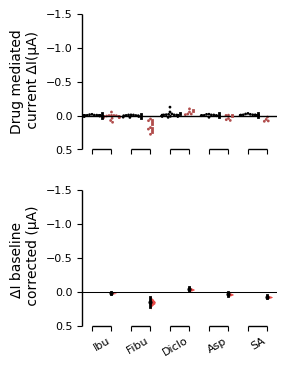

In [66]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3, 4)) 
colorsESTDT1=[(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10)]
#colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]

fig1= shared_controlIDT1UninjNSAID.mean_diff.plot(swarm_ylim=(0.5,-1.5), contrast_ylim=(0.5,-1.5), custom_palette=colorsESTDT1,fig_size=(3, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='ΔI baseline \n corrected (µA)',
                                    swarm_label='Drug mediated\n current ΔI(µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                    'color':'red'})#,reflines_kwargs
                                       #previous y label: ΔI-ΔIUninj (µA) 


#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))


labels = []
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
labels2 = ['','Ibu','','Fibu','','Diclo','',"Asp",'','SA']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')


#plt.gcf().subplots_adjust(bottom=0.2, left=0.25,right=None, top=None,hspace=3.75, wspace=0.2) 
plt.gcf().subplots_adjust(bottom=0.1, left=0.25,right=None, top=None,hspace=1, wspace=0.2) 
plt.savefig(filedir+"Fig4-EstStat-IDT1Uninj-NSAID"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig4-EstStat-IDT1Uninj-NSAID"+'.pdf')




# vakues estimations stats DEGT1 NSAIDs

### TODO: get mean values + SD

In [67]:
CALCHANGEinPH = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGlu64"]) & df.StartSol.isin(["NaGlu84"]))] 

CALCHANGEinPH.to_csv(filedirManuscriptStat+'ChangeInpH.csv', header=True, sep=',', mode='w')

ExInitialpH = CALCHANGEinPH.pivot(columns='Injection', values='DELTA').describe().T
#ExInitialCurrent = ExInitialCurrent.round()
ExInitialpH.to_csv(filedir+'ExInitialpH.csv', header=True, sep=',', mode='w')
#trying to replace A with uA multiplying by 1000000
#ExInitialCurrent.replace(to_replace = [ExInitialCurrent['mean']],value = 100, inplace = True)
Mean_ChangepH = ExInitialpH['mean']*1000000
Mean_ChangepH = Mean_ChangepH.round(2)
SD_ChangepH = ExInitialpH['std']*1000000
SD_ChangepH = SD_ChangepH.round(2)
print(Mean_ChangepH )
print(SD_ChangepH )

Injection
mg418mg012    0.53
mg419mg012    1.00
pTL69mg012   -1.14
uninjected   -0.03
Name: mean, dtype: float64
Injection
mg418mg012    0.41
mg419mg012    1.65
pTL69mg012    0.76
uninjected    0.10
Name: std, dtype: float64


In [68]:
shared_controlIDT1UninjNSAID.mean_diff

DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:34:20 2020.

The unpaired mean difference between Uninj-Ibu and DT1d-Ibu is 0.0199 [95%CI 0.00766, 0.0378].
The two-sided p-value of the Mann-Whitney test is 0.00102.

The unpaired mean difference between Uninj-Fibu and DT1d-Fibu is 0.152 [95%CI 0.0812, 0.226].
The two-sided p-value of the Mann-Whitney test is 0.00269.

The unpaired mean difference between Uninj-Diclo and DT1d-Diclo is -0.0368 [95%CI -0.0746, -0.0145].
The two-sided p-value of the Mann-Whitney test is 0.00306.

The unpaired mean difference between Uninj-Asp and DT1d-Asp is 0.0368 [95%CI 0.00748, 0.065].
The two-sided p-value of the Mann-Whitney test is 0.0758.

The unpaired mean difference between Uninj-SA and DT1d-SA is 0.0734 [95%CI 0.043, 0.0937].
The two-sided p-value of the Mann-Whitney test is 0.00582.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(

### UNC-8 NSAIDS 


In [69]:
IpTL69Ibu30= Ibu30.loc[Ibu30['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Ibu30.columns = ['U8d-Ibu']

IpTL69Fibu30 = Fibu30.loc[Fibu30['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Fibu30.columns = ['U8d-Fibu']

IpTL69Diclo30= Diclo30.loc[Diclo30['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Diclo30.columns = ['U8d-Diclo']

IpTL69Asp30= Asp30.loc[Asp30['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Asp30.columns = ['U8d-Asp']

IpTL69SA30= SA30.loc[SA30['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69SA30.columns = ['U8d-SA']


UninjIbu30 = Ibu30.loc[Ibu30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjIbu30.columns = ['Uninj-Ibu']

UninjFibu30 = Fibu30.loc[Fibu30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjFibu30.columns = ['Uninj-Fibu']

UninjDiclo30 = Diclo30.loc[Diclo30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjDiclo30.columns = ['Uninj-Diclo']

UninjAsp30 = Asp30.loc[Asp30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjAsp30.columns = ['Uninj-Asp']

UninjSA30 = SA30.loc[SA30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjSA30.columns = ['Uninj-SA']

#concatenateData
IU8UninjConcat = pd.concat([IpTL69Ibu30.reset_index(drop=True),IpTL69Fibu30.reset_index(drop=True),IpTL69Diclo30.reset_index(drop=True),IpTL69Asp30.reset_index(drop=True),IpTL69SA30.reset_index(drop=True),UninjIbu30.reset_index(drop=True),UninjFibu30.reset_index(drop=True),UninjDiclo30.reset_index(drop=True),UninjAsp30.reset_index(drop=True),UninjSA30.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doing
IU8UninjConcatuA = IU8UninjConcat.astype(float)*1000000

# #load Data
shared_controlIU8UninjNSAID = dabest.load(IU8UninjConcatuA, idx=(('Uninj-Ibu','U8d-Ibu',),('Uninj-Fibu','U8d-Fibu',),('Uninj-Diclo','U8d-Diclo',),('Uninj-Asp','U8d-Asp',),('Uninj-SA','U8d-SA'))) 
shared_controlIU8UninjNSAID


DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:34:21 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. U8d-Ibu minus Uninj-Ibu
2. U8d-Fibu minus Uninj-Fibu
3. U8d-Diclo minus Uninj-Diclo
4. U8d-Asp minus Uninj-Asp
5. U8d-SA minus Uninj-SA

5000 resamples will be used to generate the effect size bootstraps.

In [70]:
shared_controlIU8UninjNSAID.mean_diff

DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:34:23 2020.

The unpaired mean difference between Uninj-Ibu and U8d-Ibu is 0.0259 [95%CI 0.00113, 0.0497].
The two-sided p-value of the Mann-Whitney test is 0.0235.

The unpaired mean difference between Uninj-Fibu and U8d-Fibu is 0.221 [95%CI 0.125, 0.379].
The two-sided p-value of the Mann-Whitney test is 0.00033.

The unpaired mean difference between Uninj-Diclo and U8d-Diclo is 0.242 [95%CI 0.155, 0.349].
The two-sided p-value of the Mann-Whitney test is 5.25e-06.

The unpaired mean difference between Uninj-Asp and U8d-Asp is -0.0711 [95%CI -0.165, 0.0114].
The two-sided p-value of the Mann-Whitney test is 0.391.

The unpaired mean difference between Uninj-SA and U8d-SA is -0.062 [95%CI -0.195, 0.00992].
The two-sided p-value of the Mann-Whitney test is 0.162.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observ

<Figure size 216x288 with 0 Axes>

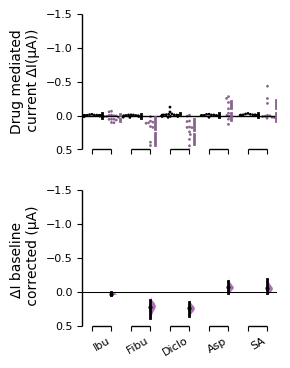

In [71]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3, 4)) 
colorsESTU8=[(0.00, 0.00, 0.00),(0.60, 0.31,0.64),(0.00, 0.00, 0.00),(0.60, 0.31,0.64),(0.00, 0.00, 0.00),(0.60, 0.31,0.64),(0.00, 0.00, 0.00),(0.60, 0.31,0.64),(0.00, 0.00, 0.00),(0.60, 0.31,0.64)]
#colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]

fig1= shared_controlIU8UninjNSAID.mean_diff.plot(swarm_ylim=(0.5,-1.5), contrast_ylim=(0.5,-1.5), custom_palette=colorsESTU8,fig_size=(3, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='ΔI baseline \n corrected (µA)',
                                    swarm_label='Drug mediated\n current ΔI(µA))',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = []
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
labels2 = ['','Ibu','','Fibu','','Diclo','',"Asp",'','SA']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')


plt.gcf().subplots_adjust(bottom=0.1, left=0.25,right=None, top=None,hspace=1, wspace=0.2) 
plt.savefig(filedir+"Fig4-EstStat-IU8Uninj-NSAIDs"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig4-EstStat-IU8Uninj-NSAIDs"+'.pdf')




### MEC-4 NSAIDs

In [72]:
Img419Ibu30= Ibu30.loc[Ibu30['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Ibu30.columns = ['M4d-Ibu']

Img419Fibu30 = Fibu30.loc[Fibu30['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Fibu30.columns = ['M4d-Fibu']

Img419Diclo30= Diclo30.loc[Diclo30['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Diclo30.columns = ['M4d-Diclo']

Img419Asp30= Asp30.loc[Asp30['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Asp30.columns = ['M4d-Asp']

Img419SA30= SA30.loc[SA30['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419SA30.columns = ['M4d-SA']


UninjIbu30 = Ibu30.loc[Ibu30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjIbu30.columns = ['Uninj-Ibu']

UninjFibu30 = Fibu30.loc[Fibu30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjFibu30.columns = ['Uninj-Fibu']

UninjDiclo30 = Diclo30.loc[Diclo30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjDiclo30.columns = ['Uninj-Diclo']

UninjAsp30 = Asp30.loc[Asp30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjAsp30.columns = ['Uninj-Asp']

UninjSA30 = SA30.loc[SA30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
UninjSA30.columns = ['Uninj-SA']

#concatenateData
IM4UninjConcat = pd.concat([Img419Ibu30.reset_index(drop=True),Img419Fibu30.reset_index(drop=True),Img419Diclo30.reset_index(drop=True),Img419Asp30.reset_index(drop=True),Img419SA30.reset_index(drop=True),UninjIbu30.reset_index(drop=True),UninjFibu30.reset_index(drop=True),UninjDiclo30.reset_index(drop=True),UninjAsp30.reset_index(drop=True),UninjSA30.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doing
IM4UninjConcatuA = IM4UninjConcat.astype(float)*1000000

# #load Data
shared_controlIM4UninjNSAID = dabest.load(IM4UninjConcatuA, idx=(('Uninj-Ibu','M4d-Ibu',),('Uninj-Fibu','M4d-Fibu',),('Uninj-Diclo','M4d-Diclo',),('Uninj-Asp','M4d-Asp',),('Uninj-SA','M4d-SA'))) 
shared_controlIM4UninjNSAID


DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:34:24 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. M4d-Ibu minus Uninj-Ibu
2. M4d-Fibu minus Uninj-Fibu
3. M4d-Diclo minus Uninj-Diclo
4. M4d-Asp minus Uninj-Asp
5. M4d-SA minus Uninj-SA

5000 resamples will be used to generate the effect size bootstraps.

In [73]:
shared_controlIM4UninjNSAID.mean_diff

DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:34:27 2020.

The unpaired mean difference between Uninj-Ibu and M4d-Ibu is -4.01 [95%CI -5.63, -2.63].
The two-sided p-value of the Mann-Whitney test is 9.93e-05.

The unpaired mean difference between Uninj-Fibu and M4d-Fibu is -3.55 [95%CI -4.47, -2.85].
The two-sided p-value of the Mann-Whitney test is 0.000449.

The unpaired mean difference between Uninj-Diclo and M4d-Diclo is -2.69 [95%CI -4.38, -1.6].
The two-sided p-value of the Mann-Whitney test is 5.39e-08.

The unpaired mean difference between Uninj-Asp and M4d-Asp is -4.59 [95%CI -7.28, -3.43].
The two-sided p-value of the Mann-Whitney test is 0.00076.

The unpaired mean difference between Uninj-SA and M4d-SA is -5.39 [95%CI -7.23, -3.88].
The two-sided p-value of the Mann-Whitney test is 0.00076.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing th

<Figure size 216x288 with 0 Axes>

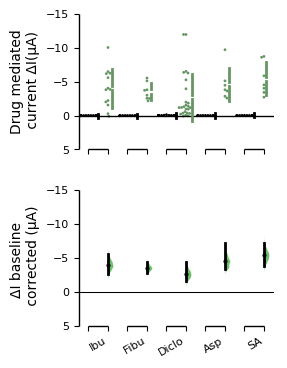

In [74]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3, 4)) 
colorsESTM4=[(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29)]
#colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]

fig1= shared_controlIM4UninjNSAID.mean_diff.plot(swarm_ylim=(5,-15), contrast_ylim=(5,-15), custom_palette=colorsESTM4,fig_size=(3, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='ΔI baseline \n corrected (µA)',
                                    swarm_label='Drug mediated\n current ΔI(µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = []
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
labels2 = ['','Ibu','','Fibu','','Diclo','',"Asp",'','SA']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')

plt.gcf().subplots_adjust(bottom=0.1, left=0.25,right=None, top=None,hspace=1, wspace=0.2) 

plt.savefig(filedir+"Fig4-EstStat-IM4Uninj-NSAIDs"+'.pdf')
plt.savefig(filedirManuscript+"Fig4-EstStat-IM4Uninj-NSAIDs"+'.pdf')




### DELTA NSAIDs Figure 3

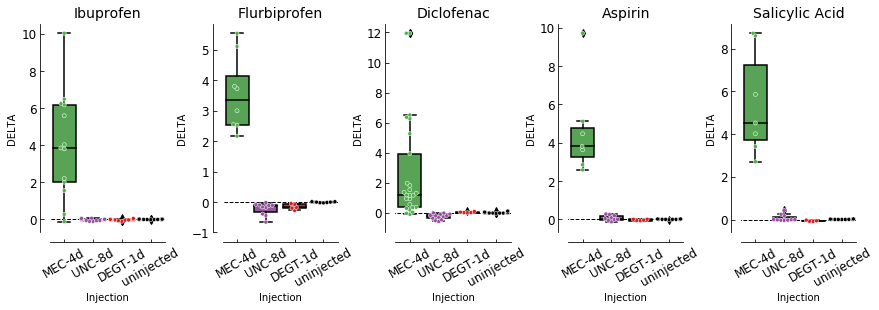

In [75]:
# DELTA
#arranged by Injection
# maybe make another version arranged by drugs 

Drug= 'NSAIDS'
#How to plot all data from Amiloride .... rearrange daa
#Amiloride
fig = plt.figure(figsize=(16, 5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,5,1)
ax2 = plt.subplot(1,5,2)
ax3 = plt.subplot(1,5,3)
ax4 = plt.subplot(1,5,4)
ax5 = plt.subplot(1,5,5)

#sort data for amiloride!!!!
#Plot1
Amil30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluIbu30"]))] 
#Plot2
Bmil30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluFibu30"]))]
#Plot3
EIPA30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluDiclo30"]))]
#Plot4
Phen30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluAsp30"]))]
#Plot5
Bzd30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluSA30"]))] 


#plot 30 uM Amil
sns.swarmplot(x = Amil30['Injection'], y = Amil30['DELTA']*1000000*-1 , data = Amil30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax1,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = Amil30['Injection'], y = Amil30['DELTA']*1000000*-1 , data = Amil30, palette=sns.color_palette(colorsPharma),ax=ax1,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
#plot 30 uM Bmil
sns.swarmplot(x = Bmil30['Injection'], y = Bmil30['DELTA']*1000000*-1 , data = Bmil30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax2,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = Bmil30['Injection'], y = Bmil30['DELTA']*1000000*-1 , data = Bmil30, palette=sns.color_palette(colorsPharma),ax=ax2,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
#plot 30 uM EIPA
sns.swarmplot(x = EIPA30['Injection'], y = EIPA30['DELTA']*1000000*-1 , data = EIPA30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax3,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = EIPA30['Injection'], y = EIPA30['DELTA']*1000000*-1 , data = EIPA30, palette=sns.color_palette(colorsPharma),ax=ax3,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
#plot 30 uM EIPA
sns.swarmplot(x = Phen30['Injection'], y = Phen30['DELTA']*1000000*-1 , data = Phen30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax4,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = Phen30['Injection'], y = Phen30['DELTA']*1000000*-1 , data = Phen30, palette=sns.color_palette(colorsPharma),ax=ax4,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
#plot 30 uM Bzd
sns.swarmplot(x = Bzd30['Injection'], y = Bzd30['DELTA']*1000000*-1 , data = Bzd30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax5,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = Bzd30['Injection'], y = Bzd30['DELTA']*1000000*-1 , data = Bzd30, palette=sns.color_palette(colorsPharma),ax=ax5,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])


##### AXIS 1 ####
#ax1.set_ylim([-1, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=12)  
ax1.set_title('Ibuprofen',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax1.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

##### AXIS 2 ####
#ax2.set_ylim([-1, 1])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=12)  
ax2.set_title('Flurbiprofen',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

##### AXIS 3 ####
#ax3.set_ylim([-1, 1])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=12)  
ax3.set_title('Diclofenac',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax3.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

##### AXIS 4 ####
#ax4.set_ylim([-1, 1])
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=12)  
ax4.set_title('Aspirin',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax4.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

##### AXIS 5 ####
#ax5.set_ylim([-1, 1])
ax5.spines['right'].set_visible(False)                                  # no spine at the right
ax5.spines['top'].set_visible(False)                                     # no spine at the top
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position(('outward',10))  
ax5.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
ax5.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax5.tick_params(axis='both', which='major', labelsize=12)  
ax5.set_title('Salicylic Acid',size=14)
#a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax5.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

#plt.ylabel('Change in current', fontsize=16) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=16)
plt.gcf().subplots_adjust(bottom=0.3, left=0.2,hspace=0.75, wspace=0.5) 
#plt.suptitle('Amiloride 30 uM doses RATIO ', fontsize=16)
#plt.savefig(filedir+Drug+"-DELTA"+'.jpg')
plt.show()  # displays the plot


# Estimation statistics for NSAIDs arranged by drug

In [76]:
Img419Ibu30 = Ibu30.loc[Ibu30['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Ibu30.columns = ['M4d']

Img418Ibu30 = Ibu30.loc[Ibu30['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Ibu30.columns = ['DT1d']

IpTL69Ibu30 = Ibu30.loc[Ibu30['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Ibu30.columns = ['U8d']

IUninjIbu30 = Ibu30.loc[Ibu30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjIbu30.columns = ['Uninj']

#concatenateData
IIbuConcat = pd.concat([IUninjIbu30.reset_index(drop=True),Img418Ibu30.reset_index(drop=True),Img419Ibu30.reset_index(drop=True),IpTL69Ibu30.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doing
IIbuConcatuA = IIbuConcat.astype(float)*1000000

#load Data
shared_controlIIbu30 = dabest.load(IIbuConcatuA, idx=("Uninj","DT1d",'U8d','M4d'))
shared_controlIIbu30


DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:34:30 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. DT1d minus Uninj
2. U8d minus Uninj
3. M4d minus Uninj

5000 resamples will be used to generate the effect size bootstraps.

<Figure size 252x216 with 0 Axes>

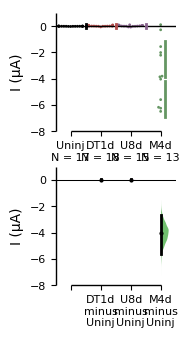

In [77]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3.5, 3)) 
fig1= shared_controlIIbu30.mean_diff.plot(swarm_ylim=(-8,1), contrast_ylim=(-8,1), custom_palette=colorsEST,fig_size=(2, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='I (µA)',
                                    swarm_label='I (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedir+"Fig4-EstStat-Ibu"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig4-EstStat-Ibu"+'.pdf')




In [78]:
Img419Fibu30 = Fibu30.loc[Fibu30['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Fibu30.columns = ['M4d']

Img418Fibu30 = Fibu30.loc[Fibu30['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Fibu30.columns = ['DT1d']

IpTL69Fibu30 = Fibu30.loc[Fibu30['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Fibu30.columns = ['U8d']

IUninjFibu30 = Fibu30.loc[Fibu30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjFibu30.columns = ['Uninj']

#concatenateData
IFibuConcat = pd.concat([IUninjFibu30.reset_index(drop=True),Img418Fibu30.reset_index(drop=True),Img419Fibu30.reset_index(drop=True),IpTL69Fibu30.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doin
IFibuConcatuA = IFibuConcat.astype(float)*1000000

#load Data
shared_controlIFibu30 = dabest.load(IFibuConcatuA, idx=("Uninj","DT1d",'U8d','M4d'))
shared_controlIFibu30


DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:34:32 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. DT1d minus Uninj
2. U8d minus Uninj
3. M4d minus Uninj

5000 resamples will be used to generate the effect size bootstraps.

<Figure size 252x216 with 0 Axes>

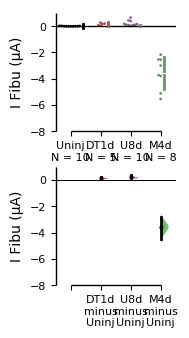

In [79]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3.5, 3)) 
fig1= shared_controlIFibu30.mean_diff.plot(swarm_ylim=(-8,1), contrast_ylim=(-8,1), custom_palette=colorsEST,fig_size=(2, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='I Fibu (µA)',
                                    swarm_label='I Fibu (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedir+"Fig4-EstStat-Fibu"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig4-EstStat-Fibu"+'.pdf')




In [80]:
Img419Diclo30 = Diclo30.loc[Diclo30['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Diclo30.columns = ['M4d']

Img418Diclo30 = Diclo30.loc[Diclo30['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Diclo30.columns = ['DT1d']

IpTL69Diclo30 = Diclo30.loc[Diclo30['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Diclo30.columns = ['U8d']

IUninjDiclo30 = Diclo30.loc[Diclo30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjDiclo30.columns = ['Uninj']

#concatenateData
IDicloConcat = pd.concat([IUninjDiclo30.reset_index(drop=True),Img418Diclo30.reset_index(drop=True),Img419Diclo30.reset_index(drop=True),IpTL69Diclo30.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doin
IDicloConcatuA = IDicloConcat.astype(float)*1000000

#load Data
shared_controlIDiclo30 = dabest.load(IDicloConcatuA, idx=("Uninj","DT1d",'U8d','M4d'))
shared_controlIDiclo30


DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:34:33 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. DT1d minus Uninj
2. U8d minus Uninj
3. M4d minus Uninj

5000 resamples will be used to generate the effect size bootstraps.

<Figure size 252x216 with 0 Axes>

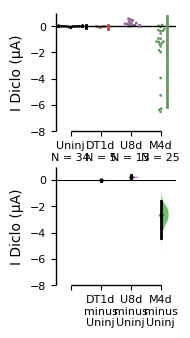

In [81]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3.5, 3)) 
fig1= shared_controlIDiclo30.mean_diff.plot(swarm_ylim=(-8,1), contrast_ylim=(-8,1), custom_palette=colorsEST,fig_size=(2, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='I Diclo (µA)',
                                    swarm_label='I Diclo (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedir+"Fig4-EstStat-Diclo"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig4-EstStat-Diclo"+'.pdf')




In [82]:
Img419Asp30 = Asp30.loc[Asp30['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419Asp30.columns = ['M4d']

Img418Asp30 = Asp30.loc[Asp30['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Asp30.columns = ['DT1d']

IpTL69Asp30 = Asp30.loc[Asp30['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69Asp30.columns = ['U8d']

IUninjAsp30 = Asp30.loc[Asp30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjAsp30.columns = ['Uninj']

#concatenateData
IAspConcat = pd.concat([IUninjAsp30.reset_index(drop=True),Img418Asp30.reset_index(drop=True),Img419Asp30.reset_index(drop=True),IpTL69Asp30.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doin
IAspConcatuA = IAspConcat.astype(float)*1000000

#load Data
shared_controlIAsp30 = dabest.load(IAspConcatuA, idx=("Uninj","DT1d",'U8d','M4d'))
shared_controlIAsp30


DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:34:35 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. DT1d minus Uninj
2. U8d minus Uninj
3. M4d minus Uninj

5000 resamples will be used to generate the effect size bootstraps.

<Figure size 252x216 with 0 Axes>

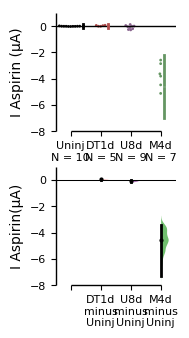

In [83]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3.5, 3)) 
fig1= shared_controlIAsp30.mean_diff.plot(swarm_ylim=(-8,1), contrast_ylim=(-8,1), custom_palette=colorsEST,fig_size=(2, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='I Aspirin(µA)',
                                    swarm_label='I Aspirin (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedir+"Fig4-EstStat-Asp"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig4-EstStat-Asp"+'.pdf')




In [84]:
Img419SA30 = SA30.loc[SA30['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419SA30.columns = ['M4d']

Img418SA30 = SA30.loc[SA30['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418SA30.columns = ['DT1d']

IpTL69SA30 = SA30.loc[SA30['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69SA30.columns = ['U8d']

IUninjSA30 = SA30.loc[SA30['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjSA30.columns = ['Uninj']

#concatenateData
ISAConcat = pd.concat([IUninjSA30.reset_index(drop=True),Img418SA30.reset_index(drop=True),Img419SA30.reset_index(drop=True),IpTL69SA30.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doin
ISAConcatuA = ISAConcat.astype(float)*1000000

#load Data
shared_controlISA30 = dabest.load(ISAConcatuA, idx=("Uninj","DT1d",'U8d','M4d'))
shared_controlISA30


DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:34:36 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. DT1d minus Uninj
2. U8d minus Uninj
3. M4d minus Uninj

5000 resamples will be used to generate the effect size bootstraps.

<Figure size 252x216 with 0 Axes>

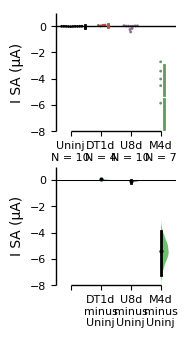

In [85]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3.5, 3)) 
fig1= shared_controlISA30.mean_diff.plot(swarm_ylim=(-8,1), contrast_ylim=(-8,1), custom_palette=colorsEST,fig_size=(2, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='I SA (µA)',
                                    swarm_label='I SA (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedir+"Fig4-EstStat-SA"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig4-EstStat-SA"+'.pdf')




### Ratio pH, GMQ, NDG

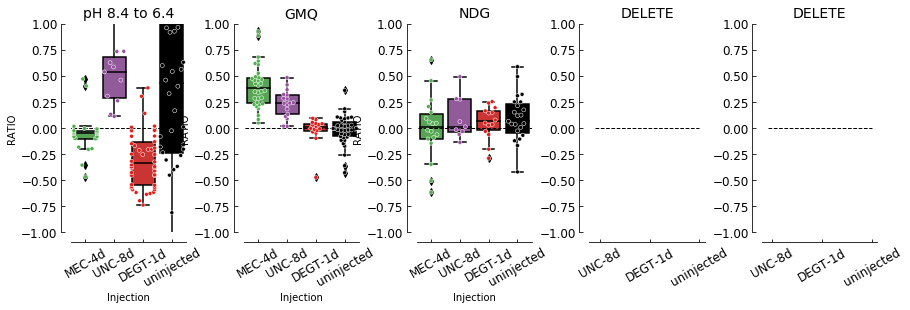

In [86]:
#arranged by Injection
# maybe make another version arranged by drugs 

Drug= 'OtherDrugs'
#How to plot all data from Amiloride .... rearrange daa
#Amiloride
fig = plt.figure(figsize=(16, 5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,5,1)
ax2 = plt.subplot(1,5,2)
ax3 = plt.subplot(1,5,3)
ax4 = plt.subplot(1,5,4)
ax5 = plt.subplot(1,5,5)

#sort data for amiloride!!!!
#Plot1
Amil30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGlu64"]))] 
#Plot2
Bmil30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluGMQ30"]))]
#Plot3
EIPA30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluNDG30"]))]
#Plot4


#plot 30 uM Amil
sns.swarmplot(x = Amil30['Injection'], y = Amil30['RATIO']-1 , data = Amil30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax1,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = Amil30['Injection'], y = Amil30['RATIO']-1 , data = Amil30, palette=sns.color_palette(colorsPharma),ax=ax1,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
#plot 30 uM Bmil
sns.swarmplot(x = Bmil30['Injection'], y = Bmil30['RATIO']-1 , data = Bmil30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax2,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = Bmil30['Injection'], y = Bmil30['RATIO']-1 , data = Bmil30, palette=sns.color_palette(colorsPharma),ax=ax2,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
#plot 30 uM EIPA
sns.swarmplot(x = EIPA30['Injection'], y = EIPA30['RATIO']-1 , data = EIPA30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax3,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = EIPA30['Injection'], y = EIPA30['RATIO']-1 , data = EIPA30, palette=sns.color_palette(colorsPharma),ax=ax3,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])


##### AXIS 1 ####
ax1.set_ylim([-1, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=12)  
ax1.set_title('pH 8.4 to 6.4',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax1.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

##### AXIS 2 ####
ax2.set_ylim([-1, 1])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=12)  
ax2.set_title('GMQ',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

##### AXIS 3 ####
ax3.set_ylim([-1, 1])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=12)  
ax3.set_title('NDG',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax3.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

##### AXIS 4 ####
ax4.set_ylim([-1, 1])
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=12)  
ax4.set_title('DELETE',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax4.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

##### AXIS 5 ####
ax5.set_ylim([-1, 1])
ax5.spines['right'].set_visible(False)                                  # no spine at the right
ax5.spines['top'].set_visible(False)                                     # no spine at the top
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position(('outward',10))  
ax5.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
ax5.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax5.tick_params(axis='both', which='major', labelsize=12)  
ax5.set_title('DELETE',size=14)
#a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax5.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

#plt.ylabel('Change in current', fontsize=16) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=16)
plt.gcf().subplots_adjust(bottom=0.3, left=0.2,hspace=0.75, wspace=0.5) 
#plt.suptitle('Amiloride 30 uM doses RATIO ', fontsize=16)
#plt.savefig(filedir+Drug+"-RATIO"+'.jpg')
plt.show()  # displays the plot


### RATIO other drugs FIG 3 without uninjected oocytes

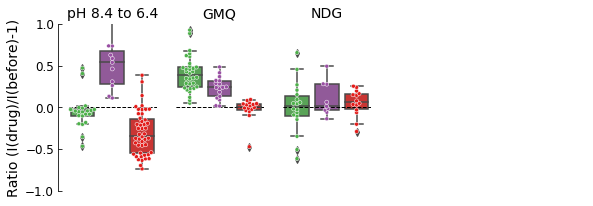

In [87]:
#arranged by Injection
# maybe make another version arranged by drugs 

Drug= 'OtherDrugs'
#How to plot all data from Amiloride .... rearrange daa
#Amiloride
fig = plt.figure(figsize=(12, 4)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,5,1)
ax2 = plt.subplot(1,5,2)
ax3 = plt.subplot(1,5,3)
ax4 = plt.subplot(1,5,4)
ax5 = plt.subplot(1,5,5)

#sort data for amiloride!!!!
#Plot1
Amil30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012"])) & (df.TestSol.isin(["NaGlu64"]))] 
#Plot2
Bmil30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012"])) & (df.TestSol.isin(["NaGluGMQ30"]))]
#Plot3
EIPA30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012"])) & (df.TestSol.isin(["NaGluNDG30"]))]
#Plot4


#plot 30 uM Amil
sns.swarmplot(x = Amil30['Injection'], y = Amil30['RATIO']-1 , data = Amil30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax1,order=["mg419mg012","pTL69mg012","mg418mg012"])
sns.boxplot(x = Amil30['Injection'], y = Amil30['RATIO']-1 , data = Amil30, palette=sns.color_palette(colorsPharma),ax=ax1,order=["mg419mg012","pTL69mg012","mg418mg012"])
#plot 30 uM Bmil
sns.swarmplot(x = Bmil30['Injection'], y = Bmil30['RATIO']-1 , data = Bmil30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax2,order=["mg419mg012","pTL69mg012","mg418mg012"])
sns.boxplot(x = Bmil30['Injection'], y = Bmil30['RATIO']-1 , data = Bmil30, palette=sns.color_palette(colorsPharma),ax=ax2,order=["mg419mg012","pTL69mg012","mg418mg012"])
#plot 30 uM EIPA
sns.swarmplot(x = EIPA30['Injection'], y = EIPA30['RATIO']-1 , data = EIPA30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax3,order=["mg419mg012","pTL69mg012","mg418mg012"])
sns.boxplot(x = EIPA30['Injection'], y = EIPA30['RATIO']-1 , data = EIPA30, palette=sns.color_palette(colorsPharma),ax=ax3,order=["mg419mg012","pTL69mg012","mg418mg012"])


Ylimit = [-1,1]
legendlabel = ['Na', 'Li', 'K', 'Cs', 'NMG']

##### AXIS 1 ####
ax1.set_ylim(Ylimit)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=12)  
ax1.set_title('pH 8.4 to 6.4',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax1.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax1.xaxis.set_visible(False)
#ax1.yaxis.set_visible(False)
#ax1.spines['left'].set_visible(False) 
ax1.spines['bottom'].set_visible(False)  
ax1.set_yticks([-1,-0.5,0,0.5,1])
ax1.set_ylabel('Ratio (I(drug)/I(before)-1)',fontsize=14)

#legendlabel = ['Na', 'Li', 'K', 'Cs', 'NMG']
#ax1.legend(legendlabel,bbox_to_anchor=(0.4, 0.3, 0.11, 0.78),frameon=False)


##### AXIS 2 ####
ax2.set_ylim(Ylimit)
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=12)  
ax2.set_title('GMQ',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.spines['left'].set_visible(False) 
ax2.spines['bottom'].set_visible(False)  

##### AXIS 3 ####
ax3.set_ylim(Ylimit)
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=12)  
ax3.set_title('NDG',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax3.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax3.spines['left'].set_visible(False) 
ax3.spines['bottom'].set_visible(False)  

##### AXIS 4 ####
ax4.set_ylim(Ylimit)
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
#ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=12)  
#ax4.set_title('Aspirin',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax4.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax4.xaxis.set_visible(False)
ax4.yaxis.set_visible(False)
ax4.spines['left'].set_visible(False) 
ax4.spines['bottom'].set_visible(False)  

##### AXIS 5 ####
ax5.set_ylim(Ylimit)
ax5.spines['right'].set_visible(False)                                  # no spine at the right
ax5.spines['top'].set_visible(False)                                     # no spine at the top
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position(('outward',10))  
ax5.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
#ax5.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax5.tick_params(axis='both', which='major', labelsize=12)  
#ax5.set_title('Salicylic Acid',size=14)
#a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax5.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax5.xaxis.set_visible(False)
ax5.yaxis.set_visible(False)
ax5.spines['left'].set_visible(False) 
ax5.spines['bottom'].set_visible(False) 

#plt.ylabel('Change in current', fontsize=16) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=16)
plt.gcf().subplots_adjust(bottom=0.3, left=0.3,hspace=0.75, wspace=0.2) 
#plt.suptitle('Amiloride 30 uM doses RATIO ', fontsize=16)
#plt.savefig(filedir+"Fig3"+Drug+"-RATIO-noUninjected"+'.jpg')
plt.savefig(filedir+"Fig3"+Drug+"-RATIO-noUninjected"+'.eps')
plt.show()  # displays the plot


### DELTA pH, GMQ, NDG

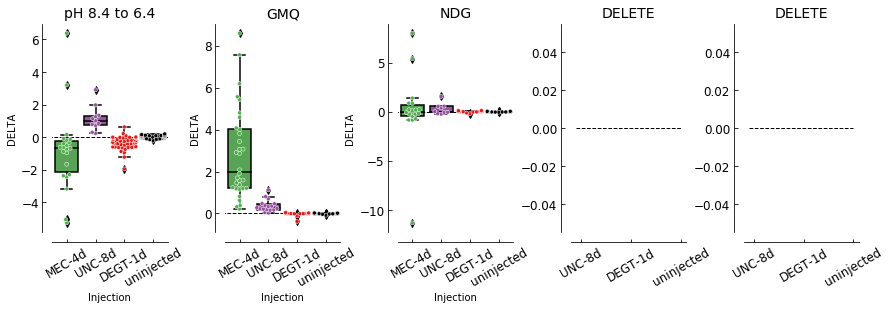

In [88]:
#arranged by Injection
# maybe make another version arranged by drugs 

Drug= 'OtherDrugs'
#How to plot all data from Amiloride .... rearrange daa
#Amiloride
fig = plt.figure(figsize=(16, 5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,5,1)
ax2 = plt.subplot(1,5,2)
ax3 = plt.subplot(1,5,3)
ax4 = plt.subplot(1,5,4)
ax5 = plt.subplot(1,5,5)

#sort data for amiloride!!!!
#Plot1
Amil30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGlu64"]))] 
#Plot2
Bmil30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluGMQ30"]))]
#Plot3
EIPA30 = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluNDG30"]))]
#Plot4


#plot 30 uM Amil
sns.swarmplot(x = Amil30['Injection'], y = Amil30['DELTA']*1000000*-1 , data = Amil30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax1,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = Amil30['Injection'], y = Amil30['DELTA']*1000000*-1 , data = Amil30, palette=sns.color_palette(colorsPharma),ax=ax1,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
#plot 30 uM Bmil
sns.swarmplot(x = Bmil30['Injection'], y = Bmil30['DELTA']*1000000*-1 , data = Bmil30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax2,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = Bmil30['Injection'], y = Bmil30['DELTA']*1000000*-1 , data = Bmil30, palette=sns.color_palette(colorsPharma),ax=ax2,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
#plot 30 uM EIPA
sns.swarmplot(x = EIPA30['Injection'], y = EIPA30['DELTA']*1000000*-1 , data = EIPA30,palette=sns.color_palette(colorsPharma), edgecolor='white', linewidth=0.5, size = 4,ax=ax3,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])
sns.boxplot(x = EIPA30['Injection'], y = EIPA30['DELTA']*1000000*-1 , data = EIPA30, palette=sns.color_palette(colorsPharma),ax=ax3,order=["mg419mg012","pTL69mg012","mg418mg012","uninjected"])


##### AXIS 1 ####
#ax1.set_ylim([-1, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=12)  
ax1.set_title('pH 8.4 to 6.4',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax1.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

##### AXIS 2 ####
#ax2.set_ylim([-1, 1])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=12)  
ax2.set_title('GMQ',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

##### AXIS 3 ####
#ax3.set_ylim([-1, 1])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=12)  
ax3.set_title('NDG',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax3.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

##### AXIS 4 ####
#ax4.set_ylim([-1, 1])
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=12)  
ax4.set_title('DELETE',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax4.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

##### AXIS 5 ####
#ax5.set_ylim([-1, 1])
ax5.spines['right'].set_visible(False)                                  # no spine at the right
ax5.spines['top'].set_visible(False)                                     # no spine at the top
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position(('outward',10))  
ax5.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
ax5.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax5.tick_params(axis='both', which='major', labelsize=12)  
ax5.set_title('DELETE',size=14)
#a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax5.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)

#plt.ylabel('Change in current', fontsize=16) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=16)
plt.gcf().subplots_adjust(bottom=0.3, left=0.2,hspace=0.75, wspace=0.5) 
#plt.suptitle('Amiloride 30 uM doses RATIO ', fontsize=16)
#plt.savefig(filedir+Drug+"-DELTA"+'.jpg')
plt.show()  # displays the plot


# estimation statistics PH

In [89]:
#change pH START SOL MUST BE 8.4
pH = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGlu64"]) & df.StartSol.isin(["NaGlu84"]))] 

Img419pH = pH.loc[pH['Injection'] == 'mg419mg012',['DELTA']] #returns a data frame 
Img419pH.columns = ['M4d']

Img418pH = pH.loc[pH['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418pH.columns = ['DT1d']

IpTL69pH = pH.loc[pH['Injection'] == 'pTL69mg012',['DELTA']] #returns a data frame 
IpTL69pH.columns = ['U8d']

IUninjpH = pH.loc[pH['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjpH.columns = ['Uninj']

#concatenateData
IpHConcat = pd.concat([IUninjpH.reset_index(drop=True),Img418pH.reset_index(drop=True),Img419pH.reset_index(drop=True),IpTL69pH.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doin
IpHConcatuA = IpHConcat.astype(float)*1000000

#concatenateData
IpHConcatDEGT = pd.concat([IUninjpH.reset_index(drop=True),Img418pH.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doin
IpHConcatuADEGT1 = IpHConcatDEGT.astype(float)*1000000

#load Data
shared_controlIpH = dabest.load(IpHConcatuA, idx=("Uninj","DT1d",'U8d','M4d'))
shared_controlIpH

shared_controlIpH_DEGT1 = dabest.load(IpHConcatuADEGT1, idx=("Uninj","DT1d"))
shared_controlIpH_DEGT1


DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:34:53 2020.

Effect size(s) with 95% confidence intervals will be computed for:
1. DT1d minus Uninj

5000 resamples will be used to generate the effect size bootstraps.

# get mean + SD for change in PH

In [90]:
CALCHANGEinPH = df[(df.Injection.isin(["mg419mg012","pTL69mg012","mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGlu64"]) & df.StartSol.isin(["NaGlu84"]))] 

CALCHANGEinPH.to_csv(filedirManuscriptStat+'ChangeInpH.csv', header=True, sep=',', mode='w')

ExInitialpH = CALCHANGEinPH.pivot(columns='Injection', values='DELTA').describe().T
#ExInitialCurrent = ExInitialCurrent.round()
ExInitialpH.to_csv(filedir+'ExInitialpH.csv', header=True, sep=',', mode='w')
#trying to replace A with uA multiplying by 1000000
#ExInitialCurrent.replace(to_replace = [ExInitialCurrent['mean']],value = 100, inplace = True)
Mean_ChangepH = ExInitialpH['mean']*1000000
Mean_ChangepH = Mean_ChangepH.round(2)
SD_ChangepH = ExInitialpH['std']*1000000
SD_ChangepH = SD_ChangepH.round(2)
print(Mean_ChangepH )
print(SD_ChangepH )


#CALCHANGEinPH.pivot(columns='Injection', values='DELTA').describe().T 

Injection
mg418mg012    0.53
mg419mg012    1.00
pTL69mg012   -1.14
uninjected   -0.03
Name: mean, dtype: float64
Injection
mg418mg012    0.41
mg419mg012    1.65
pTL69mg012    0.76
uninjected    0.10
Name: std, dtype: float64


In [91]:
ExInitialpH

,count,mean,std,min,25%,50%,75%,max
Injection,,,,,,,,
mg418mg012,27.0,5.293114e-07,4.087354e-07,-8.030000e-08,2.915000e-07,4.870000e-07,6.333227e-07,1.949204e-06
mg419mg012,20.0,9.998817e-07,1.649496e-06,-3.200000e-06,3.010281e-07,6.539523e-07,1.820269e-06,5.256567e-06
pTL69mg012,11.0,-1.138269e-06,7.631883e-07,-2.909289e-06,-1.301463e-06,-1.010066e-06,-7.521986e-07,-2.294659e-07
uninjected,30.0,-3.066053e-08,9.820421e-08,-2.002773e-07,-1.038965e-07,-4.849671e-08,3.008033e-08,2.013751e-07


# estimation stats for pH Figure 1

In [92]:
shared_controlIpH.mean_diff

DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:34:55 2020.

The unpaired mean difference between Uninj and DT1d is 0.56 [95%CI 0.433, 0.754].
The two-sided p-value of the Mann-Whitney test is 4.7e-09.

The unpaired mean difference between Uninj and U8d is -1.11 [95%CI -1.67, -0.767].
The two-sided p-value of the Mann-Whitney test is 1.3e-06.

The unpaired mean difference between Uninj and M4d is 1.03 [95%CI 0.333, 1.76].
The two-sided p-value of the Mann-Whitney test is 4.14e-06.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

<Figure size 201.6x360 with 0 Axes>

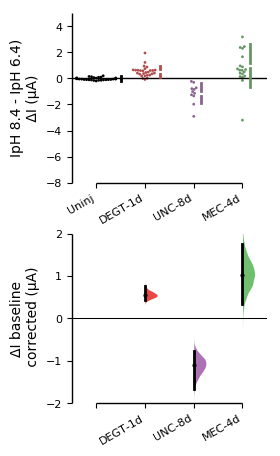

In [93]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
#plt.figure(figsize=(3.5, 3)) 

plt.figure(figsize=(2.8, 5)) 
fig1= shared_controlIpH.mean_diff.plot(swarm_ylim=(-8,5), contrast_ylim=(-2,2), custom_palette=colorsEST,fig_size=(3, 5),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='ΔI baseline\n corrected (µA)',
                                    swarm_label='IpH 8.4 - IpH 6.4)\n ΔI (µA) ',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
 

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = ['Uninj','DEGT-1d', 'UNC-8d','MEC-4d']
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
labels2 = ['','DEGT-1d', 'UNC-8d','MEC-4d']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')
plt.gcf().subplots_adjust(bottom=0.1, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 

plt.savefig(filedir+"Fig1-EstStat-pH"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig1-EstStat-pH"+'.pdf')




<Figure size 216x360 with 0 Axes>

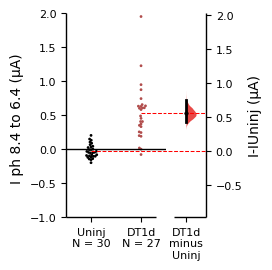

In [94]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
#plt.figure(figsize=(3.5, 3)) 

plt.figure(figsize=(3, 5)) 
fig1= shared_controlIpH_DEGT1.mean_diff.plot(swarm_ylim=(-1,2), contrast_ylim=(-1,2), custom_palette=colorsEST,fig_size=(2.8, 3),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='I-IUninj (µA)',
                                    swarm_label='I ph 8.4 to 6.4 (µA) ',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

plt.gcf().subplots_adjust(bottom=0.2, left=0.25,right=0.75, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedir+"Fig1-EstStat-pH_DEGT1"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig1-EstStat-pH_DEGT1"+'.pdf')




### DELTA VALUE SUP Figure 3: sorted by drugs and per Injection

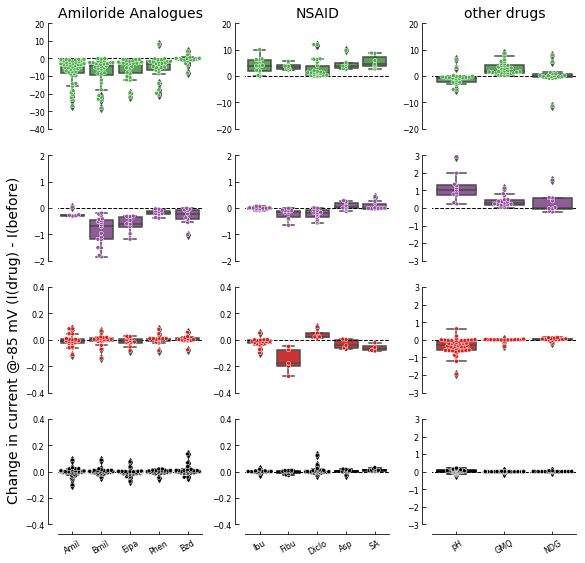

In [95]:
#arranged by Injection
# maybe make another version arranged by drugs 

Drug= 'OtherDrugs'
#How to plot all data from Amiloride .... rearrange daa
#Amiloride
fig = plt.figure(figsize=(12, 12)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(4,3,1)
ax2 = plt.subplot(4,3,2)
ax3 = plt.subplot(4,3,3)
ax4 = plt.subplot(4,3,4)
ax5 = plt.subplot(4,3,5)
ax6 = plt.subplot(4,3,6)
ax7 = plt.subplot(4,3,7)
ax8 = plt.subplot(4,3,8)
ax9 = plt.subplot(4,3,9)
ax10 = plt.subplot(4,3,10)
ax11 = plt.subplot(4,3,11)
ax12 = plt.subplot(4,3,12)


#sort data for amiloride!!!!
#Plot1
Amil30mg419 = df[(df.Injection.isin(["mg419mg012"])) & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]))] 
#Plot2
NSAIDmg419= df[(df.Injection.isin(["mg419mg012"])) & (df.TestSol.isin(["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]))]
#Plot3
othermg419= df[(df.Injection.isin(["mg419mg012"])) & (df.TestSol.isin(["NaGlu64","NaGluGMQ30","NaGluNDG30"]))]
#Plot4
Amil30pTL69 = df[(df.Injection.isin(["pTL69mg012"])) & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]))] 
#Plot5
NSAIDpTL69= df[(df.Injection.isin(["pTL69mg012"])) & (df.TestSol.isin(["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]))]
#Plot6
otherpTL69= df[(df.Injection.isin(["pTL69mg012"])) & (df.TestSol.isin(["NaGlu64","NaGluGMQ30","NaGluNDG30"]))]
#Plot7
Amil30mg418 = df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]))] 
#Plot8
NSAIDmg418= df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]))]
#Plot9
othermg418= df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGlu64","NaGluGMQ30","NaGluNDG30"]))]
#Plot10
Amil30Uninj = df[(df.Injection.isin(["uninjected"])) & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]))] 
#Plot11
NSAIDUninj= df[(df.Injection.isin(["uninjected"])) & (df.TestSol.isin(["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]))]
#Plot12
otherUninj= df[(df.Injection.isin(["uninjected"])) & (df.TestSol.isin(["NaGlu64","NaGluGMQ30","NaGluNDG30"]))]


### plot mg419
#plot 30 uM AmilAnalogue
sns.swarmplot(x = Amil30mg419['TestSol'], y = Amil30mg419['DELTA']*1000000*-1 , data = Amil30mg419,color=colorsPharma[0], edgecolor='white', linewidth=0.5, size = 4,ax=ax1,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
sns.boxplot(x = Amil30mg419['TestSol'], y = Amil30mg419['DELTA']*1000000*-1 , data = Amil30mg419, color=colorsPharma[0],ax=ax1,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
#plot 30 uM NSAIDS
sns.swarmplot(x = NSAIDmg419['TestSol'], y = NSAIDmg419['DELTA']*1000000*-1 , data = NSAIDmg419,color=colorsPharma[0], edgecolor='white', linewidth=0.5, size = 4,ax=ax2,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
sns.boxplot(x = NSAIDmg419['TestSol'], y = NSAIDmg419['DELTA']*1000000*-1 , data = NSAIDmg419, color=colorsPharma[0],ax=ax2,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
#plot 30 uM OTHERS
sns.swarmplot(x =othermg419['TestSol'], y = othermg419['DELTA']*1000000*-1 , data = othermg419,color=colorsPharma[0], edgecolor='white', linewidth=0.5, size = 4,ax=ax3,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])
sns.boxplot(x = othermg419['TestSol'], y = othermg419['DELTA']*1000000*-1 , data = othermg419, color=colorsPharma[0],ax=ax3,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])

### plot pTL69
#plot 30 uM AmilAnalogue
sns.swarmplot(x = Amil30pTL69['TestSol'], y = Amil30pTL69['DELTA']*1000000*-1 , data = Amil30pTL69,color=colorsPharma[1], edgecolor='white', linewidth=0.5, size = 4,ax=ax4,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
sns.boxplot(x = Amil30pTL69['TestSol'], y = Amil30pTL69['DELTA']*1000000*-1 , data = Amil30pTL69, color=colorsPharma[1],ax=ax4,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
#plot 30 uM NSAIDS
sns.swarmplot(x = NSAIDpTL69['TestSol'], y = NSAIDpTL69['DELTA']*1000000*-1 , data = NSAIDpTL69,color=colorsPharma[1], edgecolor='white', linewidth=0.5, size = 4,ax=ax5,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
sns.boxplot(x = NSAIDpTL69['TestSol'], y = NSAIDpTL69['DELTA']*1000000*-1 , data = NSAIDpTL69, color=colorsPharma[1],ax=ax5,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
#plot 30 uM OTHERS
sns.swarmplot(x =otherpTL69['TestSol'], y = otherpTL69['DELTA']*1000000*-1 , data = otherpTL69,color=colorsPharma[1], edgecolor='white', linewidth=0.5, size = 4,ax=ax6,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])
sns.boxplot(x = otherpTL69['TestSol'], y = otherpTL69['DELTA']*1000000*-1 , data = otherpTL69, color=colorsPharma[1],ax=ax6,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])

### plot mg418
#plot 30 uM AmilAnalogue
sns.swarmplot(x = Amil30mg418['TestSol'], y = Amil30mg418['DELTA']*1000000*-1 , data = Amil30mg418,color=colorsPharma[2], edgecolor='white', linewidth=0.5, size = 4,ax=ax7,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
sns.boxplot(x = Amil30mg418['TestSol'], y = Amil30mg418['DELTA']*1000000*-1 , data = Amil30mg418, color=colorsPharma[2],ax=ax7,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
#plot 30 uM NSAIDS
sns.swarmplot(x = NSAIDmg418['TestSol'], y = NSAIDmg418['DELTA']*1000000*-1 , data = NSAIDmg418,color=colorsPharma[2], edgecolor='white', linewidth=0.5, size = 4,ax=ax8,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
sns.boxplot(x = NSAIDmg418['TestSol'], y = NSAIDmg418['DELTA']*1000000*-1 , data = NSAIDmg418, color=colorsPharma[2],ax=ax8,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
#plot 30 uM OTHERS
sns.swarmplot(x =othermg418['TestSol'], y = othermg418['DELTA']*1000000*-1 , data = othermg418,color=colorsPharma[2], edgecolor='white', linewidth=0.5, size = 4,ax=ax9,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])
sns.boxplot(x = othermg418['TestSol'], y = othermg418['DELTA']*1000000*-1 , data = othermg418, color=colorsPharma[2],ax=ax9,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])

### plot uninjected
#plot 30 uM AmilAnalogue
sns.swarmplot(x = Amil30Uninj['TestSol'], y = Amil30Uninj['DELTA']*1000000*-1 , data = Amil30Uninj,color=colorsPharma[3], edgecolor='white', linewidth=0.5, size = 4,ax=ax10,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
sns.boxplot(x = Amil30Uninj['TestSol'], y = Amil30Uninj['DELTA']*1000000*-1 , data = Amil30Uninj, color=colorsPharma[3],ax=ax10,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
#plot 30 uM NSAIDS
sns.swarmplot(x = NSAIDUninj['TestSol'], y = NSAIDUninj['DELTA']*1000000*-1 , data = NSAIDUninj,color=colorsPharma[3], edgecolor='white', linewidth=0.5, size = 4,ax=ax11,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
sns.boxplot(x = NSAIDUninj['TestSol'], y = NSAIDUninj['DELTA']*1000000*-1 , data = NSAIDUninj, color=colorsPharma[3],ax=ax11,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
#plot 30 uM OTHERS
sns.swarmplot(x =otherUninj['TestSol'], y = otherUninj['DELTA']*1000000*-1 , data = otherUninj,color=colorsPharma[3], edgecolor='white', linewidth=0.5, size = 4,ax=ax12,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])
sns.boxplot(x = otherUninj['TestSol'], y = otherUninj['DELTA']*1000000*-1 , data = otherUninj, color=colorsPharma[3],ax=ax12,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])


#### common parameters
AxisTickLabelSize = 8
axesText = ''



##### AXIS 1 ####
ax1.set_ylim([-40, 20])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
#ax1.tick_params(axis='both', which='major', labelsize=12)  
ax1.set_title('Amiloride Analogues',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax1.set_xticklabels(["Amil","Bmil","Eipa","Phen","Bzd"],rotation=30)
ax1.spines['bottom'].set_visible(False) 
ax1.xaxis.set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
#ax1.set_xlabel('V (mV)',fontsize=14)
#ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax1.set_ylabel(axesText)
ax1.set_xlabel(axesText)

##### AXIS 2 ####
ax2.set_ylim([-20, 20])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
ax2.set_title('NSAID',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax2.set_xticklabels(["Ibu","Fibu","Diclo","Asp","SA"],rotation=30)
ax2.spines['bottom'].set_visible(False) 
ax2.xaxis.set_visible(False)
ax2.set_ylabel(axesText)
#ax2.spines['left'].set_visible(False)  
#ax2.yaxis.set_visible(False)
ax2.set_xlabel(axesText)
ax2.set_xlabel(axesText)

##### AXIS 3 ####
ax3.set_ylim([-20, 20])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
ax3.set_title('other drugs',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax3.set_xticklabels(["pH","GMQ","NDG"],rotation=30)
ax3.spines['bottom'].set_visible(False) 
ax3.xaxis.set_visible(False)
ax3.set_ylabel(axesText)
ax3.set_xlabel(axesText)
#ax3.spines['left'].set_visible(False)  
#ax3.yaxis.set_visible(False)  
ax3.set_xlabel(axesText)

##### AXIS 4 ####
ax4.set_ylim([-2, 2])
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
#ax4.set_title('Amiloride Analogues',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax4.set_xticklabels(["Amil","Bmil","Eipa","Phen","Bzd"],rotation=30)
ax4.spines['bottom'].set_visible(False) 
ax4.xaxis.set_visible(False)
ax4.set_ylabel(axesText)
ax4.set_xlabel(axesText)

##### AXIS 5 ####
ax5.set_ylim([-2, 2])
ax5.spines['right'].set_visible(False)                                  # no spine at the right
ax5.spines['top'].set_visible(False)                                     # no spine at the top
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position(('outward',10))  
ax5.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
ax5.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax5.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)   
#ax5.set_title('NSAIDs',size=14)
#a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax5.set_xticklabels(["Ibu","Fibu","Diclo","Asp","SA"],rotation=30)
ax5.spines['bottom'].set_visible(False) 
ax5.xaxis.set_visible(False)
ax5.set_ylabel(axesText)
ax5.set_xlabel(axesText)


##### AXIS 6 ####
ax6.set_ylim([-3, 3])
ax6.spines['right'].set_visible(False)                                  # no spine at the right
ax6.spines['top'].set_visible(False)                                     # no spine at the top
ax6.yaxis.set_ticks_position('left')                                     # ticks at the left
ax6.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax6.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax6.spines['bottom'].set_position(('outward',10))  
ax6.spines['top'].set_position(('axes',5)) 
ax6.get_yaxis().set_tick_params(direction='in')
ax6.get_xaxis().set_tick_params(direction='in')
ax6.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax6.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax6.set_title('other drugs',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax6.set_xticklabels(["pH","GMQ","NDG"],rotation=30)
ax6.spines['bottom'].set_visible(False) 
ax6.xaxis.set_visible(False)
ax6.set_ylabel(axesText)
ax6.set_xlabel(axesText)

##### AXIS 7 ####
ax7.set_ylim([-0.4, 0.4])
ax7.spines['right'].set_visible(False)                                  # no spine at the right
ax7.spines['top'].set_visible(False)                                     # no spine at the top
ax7.yaxis.set_ticks_position('left')                                     # ticks at the left
ax7.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax7.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax7.spines['bottom'].set_position(('outward',10))  
ax7.spines['top'].set_position(('axes',5)) 
ax7.get_yaxis().set_tick_params(direction='in')
ax7.get_xaxis().set_tick_params(direction='in')
ax7.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax7.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax7.set_title('Amiloride Analogues',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax7.set_xticklabels(["Amil","Bmil","Eipa","Phen","Bzd"],rotation=30)
ax7.spines['bottom'].set_visible(False) 
ax7.xaxis.set_visible(False)
#ax7.set_ylabel(axesText)
ax7.set_xlabel(axesText)
ax7.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)


##### AXIS 8 ####
ax8.set_ylim([-0.4, 0.4])
ax8.spines['right'].set_visible(False)                                  # no spine at the right
ax8.spines['top'].set_visible(False)                                     # no spine at the top
ax8.yaxis.set_ticks_position('left')                                     # ticks at the left
ax8.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax8.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax8.spines['bottom'].set_position(('outward',10))  
ax8.spines['top'].set_position(('axes',5)) 
ax8.get_yaxis().set_tick_params(direction='in')
ax8.get_xaxis().set_tick_params(direction='in')
ax8.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax8.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax8.set_title('NSAIDs',size=14)
#a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax8.set_xticklabels(["Ibu","Fibu","Diclo","Asp","SA"],rotation=30)
ax8.spines['bottom'].set_visible(False) 
ax8.xaxis.set_visible(False)
ax8.set_ylabel(axesText)
ax8.set_xlabel(axesText)

##### AXIS 9 ####
ax9.set_ylim([-3, 3])
ax9.spines['right'].set_visible(False)                                  # no spine at the right
ax9.spines['top'].set_visible(False)                                     # no spine at the top
ax9.yaxis.set_ticks_position('left')                                     # ticks at the left
ax9.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax9.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax9.spines['bottom'].set_position(('outward',10))  
ax9.spines['top'].set_position(('axes',5)) 
ax9.get_yaxis().set_tick_params(direction='in')
ax9.get_xaxis().set_tick_params(direction='in')
ax9.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax9.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax9.set_title('other drugs',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax9.set_xticklabels(["pH","GMQ","NDG"],rotation=30)
ax9.spines['bottom'].set_visible(False) 
ax9.xaxis.set_visible(False)
ax9.set_ylabel(axesText)
ax9.set_xlabel(axesText)

##### AXIS 10 ####
ax10.set_ylim([-0.4, 0.4])
ax10.spines['right'].set_visible(False)                                  # no spine at the right
ax10.spines['top'].set_visible(False)                                     # no spine at the top
ax10.yaxis.set_ticks_position('left')                                     # ticks at the left
ax10.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax10.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax10.spines['bottom'].set_position(('outward',10))  
ax10.spines['top'].set_position(('axes',5)) 
ax10.get_yaxis().set_tick_params(direction='in')
ax10.get_xaxis().set_tick_params(direction='in')
ax10.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax10.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax10.set_title('Amiloride Analogues',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax10.set_xticklabels(["Amil","Bmil","Eipa","Phen","Bzd"],rotation=30)
ax10.set_ylabel(axesText)
ax10.set_xlabel(axesText)

##### AXIS 11 ####
ax11.set_ylim([-0.4, 0.4])
ax11.spines['right'].set_visible(False)                                  # no spine at the right
ax11.spines['top'].set_visible(False)                                     # no spine at the top
ax11.yaxis.set_ticks_position('left')                                     # ticks at the left
ax11.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax11.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax11.spines['bottom'].set_position(('outward',10))  
ax11.spines['top'].set_position(('axes',5)) 
ax11.get_yaxis().set_tick_params(direction='in')
ax11.get_xaxis().set_tick_params(direction='in')
ax11.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax11.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)    
#ax11.set_title('NSAIDs',size=14)
#a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax11.set_xticklabels(["Ibu","Fibu","Diclo","Asp","SA"],rotation=30)
ax11.set_ylabel(axesText)
ax11.set_xlabel(axesText)

##### AXIS 12 ####
ax12.set_ylim([-3, 3])
ax12.spines['right'].set_visible(False)                                  # no spine at the right
ax12.spines['top'].set_visible(False)                                     # no spine at the top
ax12.yaxis.set_ticks_position('left')                                     # ticks at the left
ax12.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax12.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax12.spines['bottom'].set_position(('outward',10))  
ax12.spines['top'].set_position(('axes',5)) 
ax12.get_yaxis().set_tick_params(direction='in')
ax12.get_xaxis().set_tick_params(direction='in')
ax12.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax12.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)    
#ax12.set_title('other drugs',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax12.set_xticklabels(["pH","GMQ","NDG"],rotation=30)
ax12.set_ylabel(axesText)
ax12.set_xlabel(axesText)


#plt.ylabel('Change in current', fontsize=16) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=16)
plt.gcf().subplots_adjust(bottom=0.3, left=0.3,hspace=0.25, wspace=0.3) 
#plt.suptitle('Amiloride 30 uM doses RATIO ', fontsize=16)
#plt.savefig(filedir+'SupFig3'+Drug+"-DELTA-ALL"+'.jpg')
plt.savefig(filedir+'SupFig3'+Drug+"-DELTA-ALL"+'.eps')
plt.show()  # displays the plot


# Ratio sorted by injection

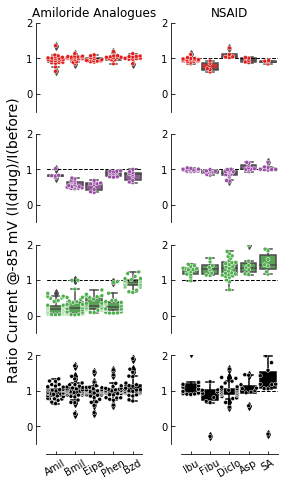

In [96]:
#arranged by Injection
# maybe make another version arranged by drugs 

Drug= 'OtherDrugs'
#How to plot all data from Amiloride .... rearrange daa
#Amiloride
fig = plt.figure(figsize=(4.6, 7.5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(4,2,5)
ax2 = plt.subplot(4,2,6)


ax4 = plt.subplot(4,2,3)
ax5 = plt.subplot(4,2,4)

ax7 = plt.subplot(4,2,1)
ax8 = plt.subplot(4,2,2)


ax10 = plt.subplot(4,2,7)
ax11 = plt.subplot(4,2,8)


#sort data for amiloride!!!!
#Plot1
Amil30mg419 = df[(df.Injection.isin(["mg419mg012"])) & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]))] 
#Plot2
NSAIDmg419= df[(df.Injection.isin(["mg419mg012"])) & (df.TestSol.isin(["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]))]
#Plot3
othermg419= df[(df.Injection.isin(["mg419mg012"])) & (df.TestSol.isin(["NaGlu64","NaGluGMQ30","NaGluNDG30"]))]
#Plot4
Amil30pTL69 = df[(df.Injection.isin(["pTL69mg012"])) & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]))] 
#Plot5
NSAIDpTL69= df[(df.Injection.isin(["pTL69mg012"])) & (df.TestSol.isin(["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]))]
#Plot6
otherpTL69= df[(df.Injection.isin(["pTL69mg012"])) & (df.TestSol.isin(["NaGlu64","NaGluGMQ30","NaGluNDG30"]))]
#Plot7
Amil30mg418 = df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]))] 
#Plot8
NSAIDmg418= df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]))]
#Plot9
othermg418= df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGlu64","NaGluGMQ30","NaGluNDG30"]))]
#Plot10
Amil30Uninj = df[(df.Injection.isin(["uninjected"])) & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]))] 
#Plot11
NSAIDUninj= df[(df.Injection.isin(["uninjected"])) & (df.TestSol.isin(["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]))]
#Plot12
otherUninj= df[(df.Injection.isin(["uninjected"])) & (df.TestSol.isin(["NaGlu64","NaGluGMQ30","NaGluNDG30"]))]


### plot mg419
#plot 30 uM AmilAnalogue
sns.swarmplot(x = Amil30mg419['TestSol'], y = Amil30mg419['RATIO'] , data = Amil30mg419,color=colorsPharma[0], edgecolor='white', linewidth=0.5, size = 4,ax=ax1,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
sns.boxplot(x = Amil30mg419['TestSol'], y = Amil30mg419['RATIO'] , data = Amil30mg419, color=colorsPharma[0],ax=ax1,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
#plot 30 uM NSAIDS
sns.swarmplot(x = NSAIDmg419['TestSol'], y = NSAIDmg419['RATIO'] , data = NSAIDmg419,color=colorsPharma[0], edgecolor='white', linewidth=0.5, size = 4,ax=ax2,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
sns.boxplot(x = NSAIDmg419['TestSol'], y = NSAIDmg419['RATIO'] , data = NSAIDmg419, color=colorsPharma[0],ax=ax2,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
#plot 30 uM OTHERS
sns.swarmplot(x =othermg419['TestSol'], y = othermg419['RATIO'] , data = othermg419,color=colorsPharma[0], edgecolor='white', linewidth=0.5, size = 4,ax=ax3,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])
sns.boxplot(x = othermg419['TestSol'], y = othermg419['RATIO'] , data = othermg419, color=colorsPharma[0],ax=ax3,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])

### plot pTL69
#plot 30 uM AmilAnalogue
sns.swarmplot(x = Amil30pTL69['TestSol'], y = Amil30pTL69['RATIO'] , data = Amil30pTL69,color=colorsPharma[1], edgecolor='white', linewidth=0.5, size = 4,ax=ax4,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
sns.boxplot(x = Amil30pTL69['TestSol'], y = Amil30pTL69['RATIO'] , data = Amil30pTL69, color=colorsPharma[1],ax=ax4,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
#plot 30 uM NSAIDS
sns.swarmplot(x = NSAIDpTL69['TestSol'], y = NSAIDpTL69['RATIO'] , data = NSAIDpTL69,color=colorsPharma[1], edgecolor='white', linewidth=0.5, size = 4,ax=ax5,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
sns.boxplot(x = NSAIDpTL69['TestSol'], y = NSAIDpTL69['RATIO'] , data = NSAIDpTL69, color=colorsPharma[1],ax=ax5,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
#plot 30 uM OTHERS
sns.swarmplot(x =otherpTL69['TestSol'], y = otherpTL69['RATIO'] , data = otherpTL69,color=colorsPharma[1], edgecolor='white', linewidth=0.5, size = 4,ax=ax6,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])
sns.boxplot(x = otherpTL69['TestSol'], y = otherpTL69['RATIO'] , data = otherpTL69, color=colorsPharma[1],ax=ax6,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])

### plot mg418
#plot 30 uM AmilAnalogue
sns.swarmplot(x = Amil30mg418['TestSol'], y = Amil30mg418['RATIO'] , data = Amil30mg418,color=colorsPharma[2], edgecolor='white', linewidth=0.5, size = 4,ax=ax7,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
sns.boxplot(x = Amil30mg418['TestSol'], y = Amil30mg418['RATIO'] , data = Amil30mg418, color=colorsPharma[2],ax=ax7,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
#plot 30 uM NSAIDS
sns.swarmplot(x = NSAIDmg418['TestSol'], y = NSAIDmg418['RATIO'] , data = NSAIDmg418,color=colorsPharma[2], edgecolor='white', linewidth=0.5, size = 4,ax=ax8,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
sns.boxplot(x = NSAIDmg418['TestSol'], y = NSAIDmg418['RATIO'] , data = NSAIDmg418, color=colorsPharma[2],ax=ax8,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
#plot 30 uM OTHERS
sns.swarmplot(x =othermg418['TestSol'], y = othermg418['RATIO'] , data = othermg418,color=colorsPharma[2], edgecolor='white', linewidth=0.5, size = 4,ax=ax9,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])
sns.boxplot(x = othermg418['TestSol'], y = othermg418['RATIO'] , data = othermg418, color=colorsPharma[2],ax=ax9,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])

### plot uninjected
#plot 30 uM AmilAnalogue
sns.swarmplot(x = Amil30Uninj['TestSol'], y = Amil30Uninj['RATIO'] , data = Amil30Uninj,color=colorsPharma[3], edgecolor='white', linewidth=0.5, size = 4,ax=ax10,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
sns.boxplot(x = Amil30Uninj['TestSol'], y = Amil30Uninj['RATIO'] , data = Amil30Uninj, color=colorsPharma[3],ax=ax10,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
#plot 30 uM NSAIDS
sns.swarmplot(x = NSAIDUninj['TestSol'], y = NSAIDUninj['RATIO'] , data = NSAIDUninj,color=colorsPharma[3], edgecolor='white', linewidth=0.5, size = 4,ax=ax11,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
sns.boxplot(x = NSAIDUninj['TestSol'], y = NSAIDUninj['RATIO'] , data = NSAIDUninj, color=colorsPharma[3],ax=ax11,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
#plot 30 uM OTHERS
sns.swarmplot(x =otherUninj['TestSol'], y = otherUninj['RATIO'] , data = otherUninj,color=colorsPharma[3], edgecolor='white', linewidth=0.5, size = 4,ax=ax12,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])
sns.boxplot(x = otherUninj['TestSol'], y = otherUninj['RATIO'] , data = otherUninj, color=colorsPharma[3],ax=ax12,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])


#### common parameters
AxisTickLabelSize = 10
axesText = ''


ylimSet = [-0.5,2]
##### AXIS 1 ####
ax1.set_ylim(ylimSet)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [1,1] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
#ax1.tick_params(axis='both', which='major', labelsize=12)  
ax7.set_title('Amiloride Analogues',size=12)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax1.set_xticklabels(["Amil","Bmil","Eipa","Phen","Bzd"],rotation=30)
ax1.spines['bottom'].set_visible(False) 
ax1.xaxis.set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
#ax1.set_xlabel('V (mV)',fontsize=14)
#ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax1.set_ylabel(axesText)
ax1.set_xlabel(axesText)
ax7.text(-2.5, -0.4, 'Ratio Current @-85 mV (I(drug)/I(before)',fontsize=14,rotation=90)

##### AXIS 2 ####
ax2.set_ylim(ylimSet)
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [1,1] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
ax8.set_title('NSAID',size=12)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax2.set_xticklabels(["Ibu","Fibu","Diclo","Asp","SA"],rotation=30)
ax2.spines['bottom'].set_visible(False) 
ax2.xaxis.set_visible(False)
ax2.set_ylabel(axesText)
#ax2.spines['left'].set_visible(False)  
#ax2.yaxis.set_visible(False)
ax2.set_xlabel(axesText)
ax2.set_xlabel(axesText)

##### AXIS 3 ####
ax3.set_ylim(ylimSet)
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [1,1] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
ax3.set_title('other drugs',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax3.set_xticklabels(["pH","GMQ","NDG"],rotation=30)
ax3.spines['bottom'].set_visible(False) 
ax3.xaxis.set_visible(False)
ax3.set_ylabel(axesText)
ax3.set_xlabel(axesText)
#ax3.spines['left'].set_visible(False)  
#ax3.yaxis.set_visible(False)  
ax3.set_xlabel(axesText)

##### AXIS 4 #####
ax4.set_ylim(ylimSet)
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [1,1] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
#ax4.set_title('Amiloride Analogues',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax4.set_xticklabels(["Amil","Bmil","Eipa","Phen","Bzd"],rotation=30)
ax4.spines['bottom'].set_visible(False) 
ax4.xaxis.set_visible(False)
ax4.set_ylabel(axesText)
ax4.set_xlabel(axesText)

##### AXIS 5 ####
ax5.set_ylim(ylimSet)
ax5.spines['right'].set_visible(False)                                  # no spine at the right
ax5.spines['top'].set_visible(False)                                     # no spine at the top
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position(('outward',10))  
ax5.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
ax5.plot([-1,20], [1,1] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax5.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)   
#ax5.set_title('NSAIDs',size=14)
#a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax5.set_xticklabels(["Ibu","Fibu","Diclo","Asp","SA"],rotation=30)
ax5.spines['bottom'].set_visible(False) 
ax5.xaxis.set_visible(False)
ax5.set_ylabel(axesText)
ax5.set_xlabel(axesText)


##### AXIS 6 ####
ax6.set_ylim(ylimSet)
ax6.spines['right'].set_visible(False)                                  # no spine at the right
ax6.spines['top'].set_visible(False)                                     # no spine at the top
ax6.yaxis.set_ticks_position('left')                                     # ticks at the left
ax6.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax6.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax6.spines['bottom'].set_position(('outward',10))  
ax6.spines['top'].set_position(('axes',5)) 
ax6.get_yaxis().set_tick_params(direction='in')
ax6.get_xaxis().set_tick_params(direction='in')
ax6.plot([-1,20], [1,1] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax6.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax6.set_title('other drugs',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax6.set_xticklabels(["pH","GMQ","NDG"],rotation=30)
ax6.spines['bottom'].set_visible(False) 
ax6.xaxis.set_visible(False)
ax6.set_ylabel(axesText)
ax6.set_xlabel(axesText)

##### AXIS 7 ####
ax7.set_ylim(ylimSet)
ax7.spines['right'].set_visible(False)                                  # no spine at the right
ax7.spines['top'].set_visible(False)                                     # no spine at the top
ax7.yaxis.set_ticks_position('left')                                     # ticks at the left
ax7.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax7.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax7.spines['bottom'].set_position(('outward',10))  
ax7.spines['top'].set_position(('axes',5)) 
ax7.get_yaxis().set_tick_params(direction='in')
ax7.get_xaxis().set_tick_params(direction='in')
ax7.plot([-1,20], [1,1] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax7.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax7.set_title('Amiloride Analogues',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax7.set_xticklabels(["Amil","Bmil","Eipa","Phen","Bzd"],rotation=30)
ax7.spines['bottom'].set_visible(False) 
ax7.xaxis.set_visible(False)
ax7.set_ylabel(axesText)
ax7.set_xlabel(axesText)
#ax7.set_ylabel('Ratio Current @-85 mV (I(drug)/I(before)',fontsize=14)




##### AXIS 8 ####
ax8.set_ylim(ylimSet)
ax8.spines['right'].set_visible(False)                                  # no spine at the right
ax8.spines['top'].set_visible(False)                                     # no spine at the top
ax8.yaxis.set_ticks_position('left')                                     # ticks at the left
ax8.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax8.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax8.spines['bottom'].set_position(('outward',10))  
ax8.spines['top'].set_position(('axes',5)) 
ax8.get_yaxis().set_tick_params(direction='in')
ax8.get_xaxis().set_tick_params(direction='in')
ax8.plot([-1,20], [1,1] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax8.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax8.set_title('NSAIDs',size=14)
#a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax8.set_xticklabels(["Ibu","Fibu","Diclo","Asp","SA"],rotation=30)
ax8.spines['bottom'].set_visible(False) 
ax8.xaxis.set_visible(False)
ax8.set_ylabel(axesText)
ax8.set_xlabel(axesText)

##### AXIS 9 ####
ax9.set_ylim(ylimSet)
ax9.spines['right'].set_visible(False)                                  # no spine at the right
ax9.spines['top'].set_visible(False)                                     # no spine at the top
ax9.yaxis.set_ticks_position('left')                                     # ticks at the left
ax9.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax9.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax9.spines['bottom'].set_position(('outward',10))  
ax9.spines['top'].set_position(('axes',5)) 
ax9.get_yaxis().set_tick_params(direction='in')
ax9.get_xaxis().set_tick_params(direction='in')
ax9.plot([-1,20], [1,1] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax9.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax9.set_title('other drugs',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax9.set_xticklabels(["pH","GMQ","NDG"],rotation=30)
ax9.spines['bottom'].set_visible(False) 
ax9.xaxis.set_visible(False)
ax9.set_ylabel(axesText)
ax9.set_xlabel(axesText)

##### AXIS 10 ####
ax10.set_ylim(ylimSet)
ax10.spines['right'].set_visible(False)                                  # no spine at the right
ax10.spines['top'].set_visible(False)                                     # no spine at the top
ax10.yaxis.set_ticks_position('left')                                     # ticks at the left
ax10.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax10.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax10.spines['bottom'].set_position(('outward',10))  
ax10.spines['top'].set_position(('axes',5)) 
ax10.get_yaxis().set_tick_params(direction='in')
ax10.get_xaxis().set_tick_params(direction='in')
ax10.plot([-1,20], [1,1] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax10.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax10.set_title('Amiloride Analogues',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax10.set_xticklabels(["Amil","Bmil","Eipa","Phen","Bzd"],rotation=30)
ax10.set_ylabel(axesText)
ax10.set_xlabel(axesText)

##### AXIS 11 ####
ax11.set_ylim(ylimSet)
ax11.spines['right'].set_visible(False)                                  # no spine at the right
ax11.spines['top'].set_visible(False)                                     # no spine at the top
ax11.yaxis.set_ticks_position('left')                                     # ticks at the left
ax11.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax11.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax11.spines['bottom'].set_position(('outward',10))  
ax11.spines['top'].set_position(('axes',5)) 
ax11.get_yaxis().set_tick_params(direction='in')
ax11.get_xaxis().set_tick_params(direction='in')
ax11.plot([-1,20], [1,1] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax11.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)    
#ax11.set_title('NSAIDs',size=14)
#a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax11.set_xticklabels(["Ibu","Fibu","Diclo","Asp","SA"],rotation=30)
ax11.set_ylabel(axesText)
ax11.set_xlabel(axesText)

##### AXIS 12 ####
ax12.set_ylim(ylimSet)
ax12.spines['right'].set_visible(False)                                  # no spine at the right
ax12.spines['top'].set_visible(False)                                     # no spine at the top
ax12.yaxis.set_ticks_position('left')                                     # ticks at the left
ax12.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax12.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax12.spines['bottom'].set_position(('outward',10))  
ax12.spines['top'].set_position(('axes',5)) 
ax12.get_yaxis().set_tick_params(direction='in')
ax12.get_xaxis().set_tick_params(direction='in')
ax12.plot([-1,20], [1,1] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax12.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)    
#ax12.set_title('other drugs',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax12.set_xticklabels(["pH","GMQ","NDG"],rotation=30)
ax12.set_ylabel(axesText)
ax12.set_xlabel(axesText)



plt.gcf().subplots_adjust(bottom=0.1, left=0.2,hspace=0.25, wspace=0.4) 

plt.savefig(filedirManuscript+'SupFig3'+Drug+"-RATIO-ALL"+'.pdf')
plt.show()  # displays the plot


# START CURRent

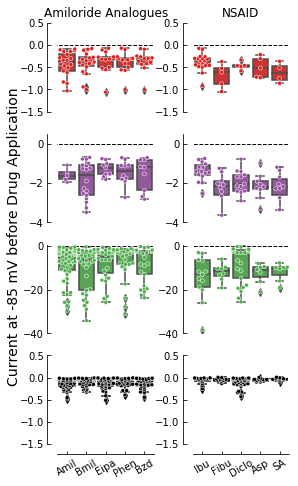

In [97]:
#arranged by Injection
# maybe make another version arranged by drugs 

Drug= 'OtherDrugs'
#How to plot all data from Amiloride .... rearrange daa
#Amiloride
fig = plt.figure(figsize=(4.6, 7.5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(4,2,5)
ax2 = plt.subplot(4,2,6)


ax4 = plt.subplot(4,2,3)
ax5 = plt.subplot(4,2,4)

ax7 = plt.subplot(4,2,1)
ax8 = plt.subplot(4,2,2)


ax10 = plt.subplot(4,2,7)
ax11 = plt.subplot(4,2,8)



#sort data for amiloride!!!!
#Plot1
Amil30mg419 = df[(df.Injection.isin(["mg419mg012"])) & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]))] 
#Plot2
NSAIDmg419= df[(df.Injection.isin(["mg419mg012"])) & (df.TestSol.isin(["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]))]
#Plot3
othermg419= df[(df.Injection.isin(["mg419mg012"])) & (df.TestSol.isin(["NaGlu64","NaGluGMQ30","NaGluNDG30"]))]
#Plot4
Amil30pTL69 = df[(df.Injection.isin(["pTL69mg012"])) & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]))] 
#Plot5
NSAIDpTL69= df[(df.Injection.isin(["pTL69mg012"])) & (df.TestSol.isin(["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]))]
#Plot6
otherpTL69= df[(df.Injection.isin(["pTL69mg012"])) & (df.TestSol.isin(["NaGlu64","NaGluGMQ30","NaGluNDG30"]))]
#Plot7
Amil30mg418 = df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]))] 
#Plot8
NSAIDmg418= df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]))]
#Plot9
othermg418= df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGlu64","NaGluGMQ30","NaGluNDG30"]))]
#Plot10
Amil30Uninj = df[(df.Injection.isin(["uninjected"])) & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]))] 
#Plot11
NSAIDUninj= df[(df.Injection.isin(["uninjected"])) & (df.TestSol.isin(["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]))]
#Plot12
otherUninj= df[(df.Injection.isin(["uninjected"])) & (df.TestSol.isin(["NaGlu64","NaGluGMQ30","NaGluNDG30"]))]


### plot mg419
#plot 30 uM AmilAnalogue
sns.swarmplot(x = Amil30mg419['TestSol'], y = Amil30mg419['MeanSTART']*1000000 , data = Amil30mg419,color=colorsPharma[0], edgecolor='white', linewidth=0.5, size = 4,ax=ax1,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
sns.boxplot(x = Amil30mg419['TestSol'], y = Amil30mg419['MeanSTART']*1000000 , data = Amil30mg419, color=colorsPharma[0],ax=ax1,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
#plot 30 uM NSAIDS
sns.swarmplot(x = NSAIDmg419['TestSol'], y = NSAIDmg419['MeanSTART']*1000000 , data = NSAIDmg419,color=colorsPharma[0], edgecolor='white', linewidth=0.5, size = 4,ax=ax2,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
sns.boxplot(x = NSAIDmg419['TestSol'], y = NSAIDmg419['MeanSTART']*1000000 , data = NSAIDmg419, color=colorsPharma[0],ax=ax2,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
#plot 30 uM OTHERS
sns.swarmplot(x =othermg419['TestSol'], y = othermg419['MeanSTART']*1000000 , data = othermg419,color=colorsPharma[0], edgecolor='white', linewidth=0.5, size = 4,ax=ax3,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])
sns.boxplot(x = othermg419['TestSol'], y = othermg419['MeanSTART']*1000000 , data = othermg419, color=colorsPharma[0],ax=ax3,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])

### plot pTL69
#plot 30 uM AmilAnalogue
sns.swarmplot(x = Amil30pTL69['TestSol'], y = Amil30pTL69['MeanSTART']*1000000 , data = Amil30pTL69,color=colorsPharma[1], edgecolor='white', linewidth=0.5, size = 4,ax=ax4,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
sns.boxplot(x = Amil30pTL69['TestSol'], y = Amil30pTL69['MeanSTART']*1000000 , data = Amil30pTL69, color=colorsPharma[1],ax=ax4,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
#plot 30 uM NSAIDS
sns.swarmplot(x = NSAIDpTL69['TestSol'], y = NSAIDpTL69['MeanSTART']*1000000 , data = NSAIDpTL69,color=colorsPharma[1], edgecolor='white', linewidth=0.5, size = 4,ax=ax5,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
sns.boxplot(x = NSAIDpTL69['TestSol'], y = NSAIDpTL69['MeanSTART']*1000000 , data = NSAIDpTL69, color=colorsPharma[1],ax=ax5,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
#plot 30 uM OTHERS
sns.swarmplot(x =otherpTL69['TestSol'], y = otherpTL69['MeanSTART']*1000000 , data = otherpTL69,color=colorsPharma[1], edgecolor='white', linewidth=0.5, size = 4,ax=ax6,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])
sns.boxplot(x = otherpTL69['TestSol'], y = otherpTL69['MeanSTART']*1000000 , data = otherpTL69, color=colorsPharma[1],ax=ax6,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])

### plot mg418
#plot 30 uM AmilAnalogue
sns.swarmplot(x = Amil30mg418['TestSol'], y = Amil30mg418['MeanSTART']*1000000 , data = Amil30mg418,color=colorsPharma[2], edgecolor='white', linewidth=0.5, size = 4,ax=ax7,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
sns.boxplot(x = Amil30mg418['TestSol'], y = Amil30mg418['MeanSTART']*1000000 , data = Amil30mg418, color=colorsPharma[2],ax=ax7,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
#plot 30 uM NSAIDS
sns.swarmplot(x = NSAIDmg418['TestSol'], y = NSAIDmg418['MeanSTART']*1000000 , data = NSAIDmg418,color=colorsPharma[2], edgecolor='white', linewidth=0.5, size = 4,ax=ax8,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
sns.boxplot(x = NSAIDmg418['TestSol'], y = NSAIDmg418['MeanSTART']*1000000 , data = NSAIDmg418, color=colorsPharma[2],ax=ax8,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
#plot 30 uM OTHERS
sns.swarmplot(x =othermg418['TestSol'], y = othermg418['MeanSTART']*1000000 , data = othermg418,color=colorsPharma[2], edgecolor='white', linewidth=0.5, size = 4,ax=ax9,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])
sns.boxplot(x = othermg418['TestSol'], y = othermg418['MeanSTART']*1000000 , data = othermg418, color=colorsPharma[2],ax=ax9,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])

### plot uninjected
#plot 30 uM AmilAnalogue
sns.swarmplot(x = Amil30Uninj['TestSol'], y = Amil30Uninj['MeanSTART']*1000000 , data = Amil30Uninj,color=colorsPharma[3], edgecolor='white', linewidth=0.5, size = 4,ax=ax10,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
sns.boxplot(x = Amil30Uninj['TestSol'], y = Amil30Uninj['MeanSTART']*1000000 , data = Amil30Uninj, color=colorsPharma[3],ax=ax10,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
#plot 30 uM NSAIDS
sns.swarmplot(x = NSAIDUninj['TestSol'], y = NSAIDUninj['MeanSTART']*1000000 , data = NSAIDUninj,color=colorsPharma[3], edgecolor='white', linewidth=0.5, size = 4,ax=ax11,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
sns.boxplot(x = NSAIDUninj['TestSol'], y = NSAIDUninj['MeanSTART']*1000000 , data = NSAIDUninj, color=colorsPharma[3],ax=ax11,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
#plot 30 uM OTHERS
sns.swarmplot(x =otherUninj['TestSol'], y = otherUninj['MeanSTART']*1000000 , data = otherUninj,color=colorsPharma[3], edgecolor='white', linewidth=0.5, size = 4,ax=ax12,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])
sns.boxplot(x = otherUninj['TestSol'], y = otherUninj['MeanSTART']*1000000 , data = otherUninj, color=colorsPharma[3],ax=ax12,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])


#### common parameters
AxisTickLabelSize = 10
axesText = ''


ylimSetM4 = [-40,0.5]
ylimSetU8 = [-4,0.5]
ylimSetDT1 = [-1.5,0.5]
##### AXIS 1 ####
ax1.set_ylim(ylimSetM4)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
#ax1.tick_params(axis='both', which='major', labelsize=12)  
ax7.set_title('Amiloride Analogues',size=12)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax1.set_xticklabels(["Amil","Bmil","Eipa","Phen","Bzd"],rotation=30)
ax1.spines['bottom'].set_visible(False) 
ax1.xaxis.set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
#ax1.set_xlabel('V (mV)',fontsize=14)
#ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax1.set_ylabel(axesText)
ax1.set_xlabel(axesText)
ax7.text(-3.1, -1.2, 'Current at -85 mV before Drug Application',fontsize=14,rotation=90)

##### AXIS 2 ####
ax2.set_ylim(ylimSetM4)
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
ax8.set_title('NSAID',size=12)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax2.set_xticklabels(["Ibu","Fibu","Diclo","Asp","SA"],rotation=30)
ax2.spines['bottom'].set_visible(False) 
ax2.xaxis.set_visible(False)
ax2.set_ylabel(axesText)
#ax2.spines['left'].set_visible(False)  
#ax2.yaxis.set_visible(False)
ax2.set_xlabel(axesText)
ax2.set_xlabel(axesText)

##### AXIS 3 ####
ax3.set_ylim(ylimSetM4)
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
ax3.set_title('other drugs',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax3.set_xticklabels(["pH","GMQ","NDG"],rotation=30)
ax3.spines['bottom'].set_visible(False) 
ax3.xaxis.set_visible(False)
ax3.set_ylabel(axesText)
ax3.set_xlabel(axesText)
#ax3.spines['left'].set_visible(False)  
#ax3.yaxis.set_visible(False)  
ax3.set_xlabel(axesText)

##### AXIS 4 #####
ax4.set_ylim(ylimSetU8)
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
#ax4.set_title('Amiloride Analogues',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax4.set_xticklabels(["Amil","Bmil","Eipa","Phen","Bzd"],rotation=30)
ax4.spines['bottom'].set_visible(False) 
ax4.xaxis.set_visible(False)
ax4.set_ylabel(axesText)
ax4.set_xlabel(axesText)

##### AXIS 5 ####
ax5.set_ylim(ylimSetU8)
ax5.spines['right'].set_visible(False)                                  # no spine at the right
ax5.spines['top'].set_visible(False)                                     # no spine at the top
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position(('outward',10))  
ax5.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
ax5.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax5.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)   
#ax5.set_title('NSAIDs',size=14)
#a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax5.set_xticklabels(["Ibu","Fibu","Diclo","Asp","SA"],rotation=30)
ax5.spines['bottom'].set_visible(False) 
ax5.xaxis.set_visible(False)
ax5.set_ylabel(axesText)
ax5.set_xlabel(axesText)


##### AXIS 6 ####
ax6.set_ylim(ylimSetU8)
ax6.spines['right'].set_visible(False)                                  # no spine at the right
ax6.spines['top'].set_visible(False)                                     # no spine at the top
ax6.yaxis.set_ticks_position('left')                                     # ticks at the left
ax6.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax6.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax6.spines['bottom'].set_position(('outward',10))  
ax6.spines['top'].set_position(('axes',5)) 
ax6.get_yaxis().set_tick_params(direction='in')
ax6.get_xaxis().set_tick_params(direction='in')
ax6.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax6.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax6.set_title('other drugs',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax6.set_xticklabels(["pH","GMQ","NDG"],rotation=30)
ax6.spines['bottom'].set_visible(False) 
ax6.xaxis.set_visible(False)
ax6.set_ylabel(axesText)
ax6.set_xlabel(axesText)

##### AXIS 7 ####
ax7.set_ylim(ylimSetDT1)
ax7.spines['right'].set_visible(False)                                  # no spine at the right
ax7.spines['top'].set_visible(False)                                     # no spine at the top
ax7.yaxis.set_ticks_position('left')                                     # ticks at the left
ax7.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax7.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax7.spines['bottom'].set_position(('outward',10))  
ax7.spines['top'].set_position(('axes',5)) 
ax7.get_yaxis().set_tick_params(direction='in')
ax7.get_xaxis().set_tick_params(direction='in')
ax7.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax7.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax7.set_title('Amiloride Analogues',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax7.set_xticklabels(["Amil","Bmil","Eipa","Phen","Bzd"],rotation=30)
ax7.spines['bottom'].set_visible(False) 
ax7.xaxis.set_visible(False)
ax7.set_ylabel(axesText)
ax7.set_xlabel(axesText)
#ax7.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)


##### AXIS 8 ####
ax8.set_ylim(ylimSetDT1)
ax8.spines['right'].set_visible(False)                                  # no spine at the right
ax8.spines['top'].set_visible(False)                                     # no spine at the top
ax8.yaxis.set_ticks_position('left')                                     # ticks at the left
ax8.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax8.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax8.spines['bottom'].set_position(('outward',10))  
ax8.spines['top'].set_position(('axes',5)) 
ax8.get_yaxis().set_tick_params(direction='in')
ax8.get_xaxis().set_tick_params(direction='in')
ax8.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax8.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax8.set_title('NSAIDs',size=14)
#a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax8.set_xticklabels(["Ibu","Fibu","Diclo","Asp","SA"],rotation=30)
ax8.spines['bottom'].set_visible(False) 
ax8.xaxis.set_visible(False)
ax8.set_ylabel(axesText)
ax8.set_xlabel(axesText)

##### AXIS 9 ####
ax9.set_ylim(ylimSetDT1)
ax9.spines['right'].set_visible(False)                                  # no spine at the right
ax9.spines['top'].set_visible(False)                                     # no spine at the top
ax9.yaxis.set_ticks_position('left')                                     # ticks at the left
ax9.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax9.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax9.spines['bottom'].set_position(('outward',10))  
ax9.spines['top'].set_position(('axes',5)) 
ax9.get_yaxis().set_tick_params(direction='in')
ax9.get_xaxis().set_tick_params(direction='in')
ax9.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax9.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax9.set_title('other drugs',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax9.set_xticklabels(["pH","GMQ","NDG"],rotation=30)
ax9.spines['bottom'].set_visible(False) 
ax9.xaxis.set_visible(False)
ax9.set_ylabel(axesText)
ax9.set_xlabel(axesText)

##### AXIS 10 ####
ax10.set_ylim(ylimSetDT1)
ax10.spines['right'].set_visible(False)                                  # no spine at the right
ax10.spines['top'].set_visible(False)                                     # no spine at the top
ax10.yaxis.set_ticks_position('left')                                     # ticks at the left
ax10.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax10.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax10.spines['bottom'].set_position(('outward',10))  
ax10.spines['top'].set_position(('axes',5)) 
ax10.get_yaxis().set_tick_params(direction='in')
ax10.get_xaxis().set_tick_params(direction='in')
ax10.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax10.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax10.set_title('Amiloride Analogues',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax10.set_xticklabels(["Amil","Bmil","Eipa","Phen","Bzd"],rotation=30)
ax10.set_ylabel(axesText)
ax10.set_xlabel(axesText)

##### AXIS 11 ####
ax11.set_ylim(ylimSetDT1)
ax11.spines['right'].set_visible(False)                                  # no spine at the right
ax11.spines['top'].set_visible(False)                                     # no spine at the top
ax11.yaxis.set_ticks_position('left')                                     # ticks at the left
ax11.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax11.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax11.spines['bottom'].set_position(('outward',10))  
ax11.spines['top'].set_position(('axes',5)) 
ax11.get_yaxis().set_tick_params(direction='in')
ax11.get_xaxis().set_tick_params(direction='in')
ax11.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax11.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)    
#ax11.set_title('NSAIDs',size=14)
#a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax11.set_xticklabels(["Ibu","Fibu","Diclo","Asp","SA"],rotation=30)
ax11.set_ylabel(axesText)
ax11.set_xlabel(axesText)

##### AXIS 12 ####
ax12.set_ylim(ylimSetDT1)
ax12.spines['right'].set_visible(False)                                  # no spine at the right
ax12.spines['top'].set_visible(False)                                     # no spine at the top
ax12.yaxis.set_ticks_position('left')                                     # ticks at the left
ax12.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax12.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax12.spines['bottom'].set_position(('outward',10))  
ax12.spines['top'].set_position(('axes',5)) 
ax12.get_yaxis().set_tick_params(direction='in')
ax12.get_xaxis().set_tick_params(direction='in')
ax12.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax12.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)    
#ax12.set_title('other drugs',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax12.set_xticklabels(["pH","GMQ","NDG"],rotation=30)
ax12.set_ylabel(axesText)
ax12.set_xlabel(axesText)


#plt.ylabel('Change in current', fontsize=16) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=16)
plt.gcf().subplots_adjust(bottom=0.1, left=0.2,hspace=0.25, wspace=0.4) 
#plt.suptitle('Amiloride 30 uM doses MeanSTART ', fontsize=16)
#plt.savefig(filedir+'SupFig3'+Drug+"-MeanSTART-ALL"+'.jpg')
plt.savefig(filedirManuscript+'SupFig3'+Drug+"-MeanSTART-ALL"+'.pdf')
plt.show()  # displays the plot


# Change in Current

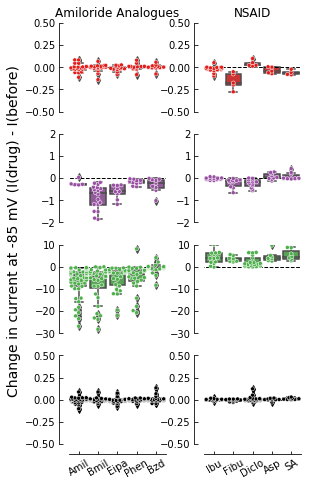

In [98]:
#arranged by Injection
# maybe make another version arranged by drugs 

Drug= 'OtherDrugs'
#How to plot all data from Amiloride .... rearrange daa
#Amiloride
fig = plt.figure(figsize=(4.6, 7.5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(4,2,5)
ax2 = plt.subplot(4,2,6)


ax4 = plt.subplot(4,2,3)
ax5 = plt.subplot(4,2,4)

ax7 = plt.subplot(4,2,1)
ax8 = plt.subplot(4,2,2)


ax10 = plt.subplot(4,2,7)
ax11 = plt.subplot(4,2,8)



#sort data for amiloride!!!!
#Plot1
Amil30mg419 = df[(df.Injection.isin(["mg419mg012"])) & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]))] 
#Plot2
NSAIDmg419= df[(df.Injection.isin(["mg419mg012"])) & (df.TestSol.isin(["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]))]
#Plot3
othermg419= df[(df.Injection.isin(["mg419mg012"])) & (df.TestSol.isin(["NaGlu64","NaGluGMQ30","NaGluNDG30"]))]
#Plot4
Amil30pTL69 = df[(df.Injection.isin(["pTL69mg012"])) & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]))] 
#Plot5
NSAIDpTL69= df[(df.Injection.isin(["pTL69mg012"])) & (df.TestSol.isin(["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]))]
#Plot6
otherpTL69= df[(df.Injection.isin(["pTL69mg012"])) & (df.TestSol.isin(["NaGlu64","NaGluGMQ30","NaGluNDG30"]))]
#Plot7
Amil30mg418 = df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]))] 
#Plot8
NSAIDmg418= df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]))]
#Plot9
othermg418= df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGlu64","NaGluGMQ30","NaGluNDG30"]))]
#Plot10
Amil30Uninj = df[(df.Injection.isin(["uninjected"])) & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"]))] 
#Plot11
NSAIDUninj= df[(df.Injection.isin(["uninjected"])) & (df.TestSol.isin(["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"]))]
#Plot12
otherUninj= df[(df.Injection.isin(["uninjected"])) & (df.TestSol.isin(["NaGlu64","NaGluGMQ30","NaGluNDG30"]))]


### plot mg419
#plot 30 uM AmilAnalogue
sns.swarmplot(x = Amil30mg419['TestSol'], y = Amil30mg419['DELTA']*1000000*-1 , data = Amil30mg419,color=colorsPharma[0], edgecolor='white', linewidth=0.5, size = 4,ax=ax1,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
sns.boxplot(x = Amil30mg419['TestSol'], y = Amil30mg419['DELTA']*1000000*-1 , data = Amil30mg419, color=colorsPharma[0],ax=ax1,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
#plot 30 uM NSAIDS
sns.swarmplot(x = NSAIDmg419['TestSol'], y = NSAIDmg419['DELTA']*1000000*-1 , data = NSAIDmg419,color=colorsPharma[0], edgecolor='white', linewidth=0.5, size = 4,ax=ax2,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
sns.boxplot(x = NSAIDmg419['TestSol'], y = NSAIDmg419['DELTA']*1000000*-1 , data = NSAIDmg419, color=colorsPharma[0],ax=ax2,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
#plot 30 uM OTHERS
sns.swarmplot(x =othermg419['TestSol'], y = othermg419['DELTA']*1000000*-1 , data = othermg419,color=colorsPharma[0], edgecolor='white', linewidth=0.5, size = 4,ax=ax3,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])
sns.boxplot(x = othermg419['TestSol'], y = othermg419['DELTA']*1000000*-1 , data = othermg419, color=colorsPharma[0],ax=ax3,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])

### plot pTL69
#plot 30 uM AmilAnalogue
sns.swarmplot(x = Amil30pTL69['TestSol'], y = Amil30pTL69['DELTA']*1000000*-1 , data = Amil30pTL69,color=colorsPharma[1], edgecolor='white', linewidth=0.5, size = 4,ax=ax4,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
sns.boxplot(x = Amil30pTL69['TestSol'], y = Amil30pTL69['DELTA']*1000000*-1 , data = Amil30pTL69, color=colorsPharma[1],ax=ax4,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
#plot 30 uM NSAIDS
sns.swarmplot(x = NSAIDpTL69['TestSol'], y = NSAIDpTL69['DELTA']*1000000*-1 , data = NSAIDpTL69,color=colorsPharma[1], edgecolor='white', linewidth=0.5, size = 4,ax=ax5,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
sns.boxplot(x = NSAIDpTL69['TestSol'], y = NSAIDpTL69['DELTA']*1000000*-1 , data = NSAIDpTL69, color=colorsPharma[1],ax=ax5,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
#plot 30 uM OTHERS
sns.swarmplot(x =otherpTL69['TestSol'], y = otherpTL69['DELTA']*1000000*-1 , data = otherpTL69,color=colorsPharma[1], edgecolor='white', linewidth=0.5, size = 4,ax=ax6,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])
sns.boxplot(x = otherpTL69['TestSol'], y = otherpTL69['DELTA']*1000000*-1 , data = otherpTL69, color=colorsPharma[1],ax=ax6,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])

### plot mg418
#plot 30 uM AmilAnalogue
sns.swarmplot(x = Amil30mg418['TestSol'], y = Amil30mg418['DELTA']*1000000*-1 , data = Amil30mg418,color=colorsPharma[2], edgecolor='white', linewidth=0.5, size = 4,ax=ax7,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
sns.boxplot(x = Amil30mg418['TestSol'], y = Amil30mg418['DELTA']*1000000*-1 , data = Amil30mg418, color=colorsPharma[2],ax=ax7,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
#plot 30 uM NSAIDS
sns.swarmplot(x = NSAIDmg418['TestSol'], y = NSAIDmg418['DELTA']*1000000*-1 , data = NSAIDmg418,color=colorsPharma[2], edgecolor='white', linewidth=0.5, size = 4,ax=ax8,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
sns.boxplot(x = NSAIDmg418['TestSol'], y = NSAIDmg418['DELTA']*1000000*-1 , data = NSAIDmg418, color=colorsPharma[2],ax=ax8,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
#plot 30 uM OTHERS
sns.swarmplot(x =othermg418['TestSol'], y = othermg418['DELTA']*1000000*-1 , data = othermg418,color=colorsPharma[2], edgecolor='white', linewidth=0.5, size = 4,ax=ax9,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])
sns.boxplot(x = othermg418['TestSol'], y = othermg418['DELTA']*1000000*-1 , data = othermg418, color=colorsPharma[2],ax=ax9,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])

### plot uninjected
#plot 30 uM AmilAnalogue
sns.swarmplot(x = Amil30Uninj['TestSol'], y = Amil30Uninj['DELTA']*1000000*-1 , data = Amil30Uninj,color=colorsPharma[3], edgecolor='white', linewidth=0.5, size = 4,ax=ax10,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
sns.boxplot(x = Amil30Uninj['TestSol'], y = Amil30Uninj['DELTA']*1000000*-1 , data = Amil30Uninj, color=colorsPharma[3],ax=ax10,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30"])
#plot 30 uM NSAIDS
sns.swarmplot(x = NSAIDUninj['TestSol'], y = NSAIDUninj['DELTA']*1000000*-1 , data = NSAIDUninj,color=colorsPharma[3], edgecolor='white', linewidth=0.5, size = 4,ax=ax11,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
sns.boxplot(x = NSAIDUninj['TestSol'], y = NSAIDUninj['DELTA']*1000000*-1 , data = NSAIDUninj, color=colorsPharma[3],ax=ax11,order=["NaGluIbu30","NaGluFibu30","NaGluDiclo30","NaGluAsp30","NaGluSA30"])
#plot 30 uM OTHERS
sns.swarmplot(x =otherUninj['TestSol'], y = otherUninj['DELTA']*1000000*-1 , data = otherUninj,color=colorsPharma[3], edgecolor='white', linewidth=0.5, size = 4,ax=ax12,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])
sns.boxplot(x = otherUninj['TestSol'], y = otherUninj['DELTA']*1000000*-1 , data = otherUninj, color=colorsPharma[3],ax=ax12,order=["NaGlu64","NaGluGMQ30","NaGluNDG30"])


#### common parameters
AxisTickLabelSize = 10
axesText = ''


ylimSetM4 = [-30,10]
ylimSetU8 = [-2.0,2.0]
ylimSetDT1 = [-0.5,0.5]
##### AXIS 1 ####
ax1.set_ylim(ylimSetM4)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
#ax1.tick_params(axis='both', which='major', labelsize=12)  
ax7.set_title('Amiloride Analogues',size=12)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax1.set_xticklabels(["Amil","Bmil","Eipa","Phen","Bzd"],rotation=30)
ax1.spines['bottom'].set_visible(False) 
ax1.xaxis.set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
#ax1.set_xlabel('V (mV)',fontsize=14)
#ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax1.set_ylabel(axesText)
ax1.set_xlabel(axesText)
ax7.text(-3.7, -0.1, 'Change in current at -85 mV (I(drug) - I(before)',fontsize=14,rotation=90)

##### AXIS 2 ####
ax2.set_ylim(ylimSetM4)
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
ax8.set_title('NSAID',size=12)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax2.set_xticklabels(["Ibu","Fibu","Diclo","Asp","SA"],rotation=30)
ax2.spines['bottom'].set_visible(False) 
ax2.xaxis.set_visible(False)
ax2.set_ylabel(axesText)
#ax2.spines['left'].set_visible(False)  
#ax2.yaxis.set_visible(False)
ax2.set_xlabel(axesText)
ax2.set_xlabel(axesText)

##### AXIS 3 ####
ax3.set_ylim(ylimSetM4)
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
ax3.set_title('other drugs',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax3.set_xticklabels(["pH","GMQ","NDG"],rotation=30)
ax3.spines['bottom'].set_visible(False) 
ax3.xaxis.set_visible(False)
ax3.set_ylabel(axesText)
ax3.set_xlabel(axesText)
#ax3.spines['left'].set_visible(False)  
#ax3.yaxis.set_visible(False)  
ax3.set_xlabel(axesText)

##### AXIS 4 #####
ax4.set_ylim(ylimSetU8)
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
#ax4.set_title('Amiloride Analogues',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax4.set_xticklabels(["Amil","Bmil","Eipa","Phen","Bzd"],rotation=30)
ax4.spines['bottom'].set_visible(False) 
ax4.xaxis.set_visible(False)
ax4.set_ylabel(axesText)
ax4.set_xlabel(axesText)

##### AXIS 5 ####
ax5.set_ylim(ylimSetU8)
ax5.spines['right'].set_visible(False)                                  # no spine at the right
ax5.spines['top'].set_visible(False)                                     # no spine at the top
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position(('outward',10))  
ax5.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
ax5.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax5.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)   
#ax5.set_title('NSAIDs',size=14)
#a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax5.set_xticklabels(["Ibu","Fibu","Diclo","Asp","SA"],rotation=30)
ax5.spines['bottom'].set_visible(False) 
ax5.xaxis.set_visible(False)
ax5.set_ylabel(axesText)
ax5.set_xlabel(axesText)


##### AXIS 6 ####
ax6.set_ylim(ylimSetU8)
ax6.spines['right'].set_visible(False)                                  # no spine at the right
ax6.spines['top'].set_visible(False)                                     # no spine at the top
ax6.yaxis.set_ticks_position('left')                                     # ticks at the left
ax6.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax6.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax6.spines['bottom'].set_position(('outward',10))  
ax6.spines['top'].set_position(('axes',5)) 
ax6.get_yaxis().set_tick_params(direction='in')
ax6.get_xaxis().set_tick_params(direction='in')
ax6.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax6.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax6.set_title('other drugs',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax6.set_xticklabels(["pH","GMQ","NDG"],rotation=30)
ax6.spines['bottom'].set_visible(False) 
ax6.xaxis.set_visible(False)
ax6.set_ylabel(axesText)
ax6.set_xlabel(axesText)

##### AXIS 7 ####
ax7.set_ylim(ylimSetDT1)
ax7.spines['right'].set_visible(False)                                  # no spine at the right
ax7.spines['top'].set_visible(False)                                     # no spine at the top
ax7.yaxis.set_ticks_position('left')                                     # ticks at the left
ax7.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax7.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax7.spines['bottom'].set_position(('outward',10))  
ax7.spines['top'].set_position(('axes',5)) 
ax7.get_yaxis().set_tick_params(direction='in')
ax7.get_xaxis().set_tick_params(direction='in')
ax7.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax7.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax7.set_title('Amiloride Analogues',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax7.set_xticklabels(["Amil","Bmil","Eipa","Phen","Bzd"],rotation=30)
ax7.spines['bottom'].set_visible(False) 
ax7.xaxis.set_visible(False)
ax7.set_ylabel(axesText)
ax7.set_xlabel(axesText)
#ax7.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)


##### AXIS 8 ####
ax8.set_ylim(ylimSetDT1)
ax8.spines['right'].set_visible(False)                                  # no spine at the right
ax8.spines['top'].set_visible(False)                                     # no spine at the top
ax8.yaxis.set_ticks_position('left')                                     # ticks at the left
ax8.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax8.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax8.spines['bottom'].set_position(('outward',10))  
ax8.spines['top'].set_position(('axes',5)) 
ax8.get_yaxis().set_tick_params(direction='in')
ax8.get_xaxis().set_tick_params(direction='in')
ax8.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax8.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax8.set_title('NSAIDs',size=14)
#a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax8.set_xticklabels(["Ibu","Fibu","Diclo","Asp","SA"],rotation=30)
ax8.spines['bottom'].set_visible(False) 
ax8.xaxis.set_visible(False)
ax8.set_ylabel(axesText)
ax8.set_xlabel(axesText)

##### AXIS 9 ####
ax9.set_ylim(ylimSetDT1)
ax9.spines['right'].set_visible(False)                                  # no spine at the right
ax9.spines['top'].set_visible(False)                                     # no spine at the top
ax9.yaxis.set_ticks_position('left')                                     # ticks at the left
ax9.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax9.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax9.spines['bottom'].set_position(('outward',10))  
ax9.spines['top'].set_position(('axes',5)) 
ax9.get_yaxis().set_tick_params(direction='in')
ax9.get_xaxis().set_tick_params(direction='in')
ax9.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax9.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax9.set_title('other drugs',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax9.set_xticklabels(["pH","GMQ","NDG"],rotation=30)
ax9.spines['bottom'].set_visible(False) 
ax9.xaxis.set_visible(False)
ax9.set_ylabel(axesText)
ax9.set_xlabel(axesText)

##### AXIS 10 ####
ax10.set_ylim(ylimSetDT1)
ax10.spines['right'].set_visible(False)                                  # no spine at the right
ax10.spines['top'].set_visible(False)                                     # no spine at the top
ax10.yaxis.set_ticks_position('left')                                     # ticks at the left
ax10.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax10.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax10.spines['bottom'].set_position(('outward',10))  
ax10.spines['top'].set_position(('axes',5)) 
ax10.get_yaxis().set_tick_params(direction='in')
ax10.get_xaxis().set_tick_params(direction='in')
ax10.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax10.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)  
#ax10.set_title('Amiloride Analogues',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax10.set_xticklabels(["Amil","Bmil","Eipa","Phen","Bzd"],rotation=30)
ax10.set_ylabel(axesText)
ax10.set_xlabel(axesText)

##### AXIS 11 ####
ax11.set_ylim(ylimSetDT1)
ax11.spines['right'].set_visible(False)                                  # no spine at the right
ax11.spines['top'].set_visible(False)                                     # no spine at the top
ax11.yaxis.set_ticks_position('left')                                     # ticks at the left
ax11.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax11.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax11.spines['bottom'].set_position(('outward',10))  
ax11.spines['top'].set_position(('axes',5)) 
ax11.get_yaxis().set_tick_params(direction='in')
ax11.get_xaxis().set_tick_params(direction='in')
ax11.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax11.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)    
#ax11.set_title('NSAIDs',size=14)
#a1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax11.set_xticklabels(["Ibu","Fibu","Diclo","Asp","SA"],rotation=30)
ax11.set_ylabel(axesText)
ax11.set_xlabel(axesText)

##### AXIS 12 ####
ax12.set_ylim(ylimSetDT1)
ax12.spines['right'].set_visible(False)                                  # no spine at the right
ax12.spines['top'].set_visible(False)                                     # no spine at the top
ax12.yaxis.set_ticks_position('left')                                     # ticks at the left
ax12.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax12.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax12.spines['bottom'].set_position(('outward',10))  
ax12.spines['top'].set_position(('axes',5)) 
ax12.get_yaxis().set_tick_params(direction='in')
ax12.get_xaxis().set_tick_params(direction='in')
ax12.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax12.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize)    
#ax12.set_title('other drugs',size=14)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax12.set_xticklabels(["pH","GMQ","NDG"],rotation=30)
ax12.set_ylabel(axesText)
ax12.set_xlabel(axesText)


#plt.ylabel('Change in current', fontsize=16) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=16)
plt.gcf().subplots_adjust(bottom=0.1, left=0.2,hspace=0.25, wspace=0.4) 
#plt.suptitle('Amiloride 30 uM doses DELTA ', fontsize=16)
#plt.savefig(filedir+'SupFig3'+Drug+"-DELTA-ALL"+'.jpg')
plt.savefig(filedirManuscript+'SupFig3'+Drug+"-Delta-ALL"+'.pdf')
plt.show()  # displays the plot


In [99]:
Amil30mg419 

,CellIDRec,Injection,CultivationSol,DaysPostInj,Rating,StartSol,TestSol,MeanSTART,MeanTEST,DELTA,RATIO,VrevSTART,VrevTEST,DELTAVrev,copyCELL,RestingVM
1561,STFX033023,mg419mg012,L-15(300Amil),4,2.0,NaGlu1,NaGluAmil30,-4.106632e-06,-1.134816e-07,3.993150e-06,0.027634,0.005871,-0.017051,-0.022922,STFX033023,2.4
1562,STFX031047,mg419mg012,L-15(300Amil),5,3.0,NaGlu1,NaGluAmil30,-2.926321e-06,-9.034070e-08,2.835981e-06,0.030872,NaN,NaN,NaN,STFX031047,-8.1
1563,STFX031061,mg419mg012,L-15(300Amil),6,3.0,NaGlu1,NaGluAmil30,-3.669837e-06,-1.230941e-07,3.546743e-06,0.033542,-0.007488,-0.068791,-0.061303,STFX031061,3.5
1564,STFX032031,mg419mg012,L-15(300Amil),5,3.0,NaGlu1,NaGluAmil30,-5.081252e-06,-1.993687e-07,4.881883e-06,0.039236,0.000863,-0.031338,-0.032201,STFX032031,18.0
1565,STFX070001,mg419mg012,L-15(300Amil),4,4.0,NaGlu1,NaGluAmil30,-2.152910e-05,-8.713427e-07,2.065776e-05,0.040473,-0.000284,-0.009123,-0.008840,STFX070001,-11.2
1566,STFX030029,mg419mg012,L-15(300Amil),4,3.0,NaGlu1,NaGluAmil30,-2.344165e-06,-9.696248e-08,2.247202e-06,0.041363,0.001506,-0.052687,-0.054193,STFX030029,18.0
1567,STFX033002,mg419mg012,L-15(300Amil),2,3.0,NaGlu1,NaGluAmil30,-3.672220e-06,-1.741667e-07,3.498053e-06,0.047428,0.010839,0.002115,-0.008723,STFX033002,-36.0
1568,STFX032039,mg419mg012,L-15(300Amil),7,3.0,NaGlu1,NaGluAmil30,-7.291331e-06,-3.813916e-07,6.909939e-06,0.052308,-0.009651,-0.041622,-0.031970,STFX032039,-3.6
1569,STFX031042,mg419mg012,L-15(300Amil),5,2.0,NaGlu1,NaGluAmil30,-3.069961e-06,-1.620062e-07,2.907955e-06,0.052771,0.001352,-0.043439,-0.044791,STFX031042,18.0
1570,STFX032024,mg419mg012,L-15(300Amil),5,4.0,NaGlu1,NaGluAmil30,-1.062288e-05,-6.732591e-07,9.949623e-06,0.063378,-0.002922,-0.026297,-0.023376,STFX032024,-11.2


In [100]:
Amil30mg419.pivot(columns='Injection', values='DELTA').describe().T 

,count,mean,std,min,25%,50%,75%,max
Injection,,,,,,,,
mg419mg012,160.0,0.000006,0.000007,-0.000008,0.000001,0.000003,0.000007,0.000028


In [101]:
colorsPharma[1]


(0.6, 0.31, 0.64)

# higher values Amiloride, Ibuprofen and Benzamil

In [102]:
Amil300 = df[(df.Injection.isin(["mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluAmil300"]))]
Bmil300 = df[(df.Injection.isin(["mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluBmil300",]))]
Ibu300 = df[(df.Injection.isin(["mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluIbu300"]))]

Img418Amil300 = Amil300.loc[Amil300['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Amil300.columns = ['D-Amil']

Img418Bmil300 = Bmil300.loc[Bmil300['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Bmil300.columns = ['D-Bmil']

Img418Ibu300 = Ibu300.loc[Ibu300['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Ibu300.columns = ['D-Ibu']

IUninjAmil300 = Amil300.loc[Amil300['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjAmil300.columns = ['Uij-Amil']

IUninjBmil300 = Bmil300.loc[Bmil300['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjBmil300.columns = ['Uij-Bmil']

IUninjIbu300 = Ibu300.loc[Ibu300['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjIbu300.columns = ['Uij-Ibu']


#concatenateData
#I300Concat = pd.concat([Img418Amil300.reset_index(drop=True),Img418Bmil300.reset_index(drop=True),Img418Ibu300.reset_index(drop=True),IUninjAmil300.reset_index(drop=True),IUninjBmil300.reset_index(drop=True),IUninjIbu300.reset_index(drop=True)],sort=False, axis=1)
I300Concat = pd.concat([Img418Amil300.reset_index(drop=True),Img418Ibu300.reset_index(drop=True),IUninjAmil300.reset_index(drop=True),IUninjIbu300.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doin
I300ConcatuA = I300Concat.astype(float)*1000000

#load Data
#shared_controlI300Concat = dabest.load(I300ConcatuA,idx=("Uij-Amil", "D-Amil")
#shared_control = dabest.load(I300ConcatuA, idx=("Uij-Amil","D-Amil","Uij-Bmil","D-Bmil",'Uij-Ibu','D-Ibu'))
                                                           
#shared_controltest = dabest.load(I300ConcatuA, idx=(("Uij-Amil", "D-Amil",),("Uij-Bmil", "D-Bmil",), ("Uij-Ibu", "D-Ibu")))
multi_2group300 = dabest.load(I300ConcatuA, idx=(("Uij-Amil", "D-Amil",), ("Uij-Ibu", "D-Ibu")))

                                


<Figure size 252x216 with 0 Axes>

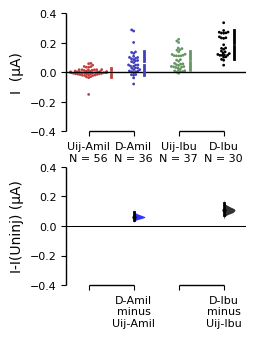

In [103]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3.5, 3)) 
fig1= multi_2group300.mean_diff.plot(swarm_ylim=(-0.4,0.4), contrast_ylim=(-0.4,0.4), custom_palette=colors,fig_size=(3, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='I-I(Uninj) (µA)',
                                    swarm_label='I  (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.savefig(filedir+"Fig4-EstStat-higherDosis"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig4-EstStat-higherDosis"+'.pdf')




In [104]:
multi_2group300.mean_diff

DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:35:17 2020.

The unpaired mean difference between Uij-Amil and D-Amil is 0.0623 [95%CI 0.0389, 0.0935].
The two-sided p-value of the Mann-Whitney test is 1.32e-06.

The unpaired mean difference between Uij-Ibu and D-Ibu is 0.107 [95%CI 0.0718, 0.155].
The two-sided p-value of the Mann-Whitney test is 2.48e-06.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

## Supplemntary Figure 3 including DEGT-1 and MEC-3 alone 

### I NaGlu Start

In [115]:
colorsESTNaGluSup = [(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10)]



In [122]:
NaGluSuppl = df[(df.Injection.isin(["mg418mg012","uninjected","mg012","mg418"])) & (df.StartSol.isin(["NaGlu1"]))]

Img418InitSupp = NaGluSuppl.loc[NaGluSuppl['Injection'] == 'mg418mg012',['MeanSTART']] #returns a data frame 
Img418InitSupp.columns = ['mg418']
A = Img418InitSupp

UninjInitSupp = NaGluSuppl.loc[NaGluSuppl['Injection'] == 'uninjected',['MeanSTART']] #returns a data frame 
UninjInitSupp.columns = ['Uij']
B = UninjInitSupp

Img418aloneInitSupp = NaGluSuppl.loc[NaGluSuppl['Injection'] == 'mg418',['MeanSTART']] #returns a data frame 
Img418aloneInitSupp.columns = ['mg418alone']
C = Img418aloneInitSupp

Img012aloneInitSupp = NaGluSuppl.loc[NaGluSuppl['Injection'] == 'mg012',['MeanSTART']] #returns a data frame 
Img012aloneInitSupp.columns = ['mg012alone']
D = Img012aloneInitSupp

#concatenateData
#I300Concat = pd.concat([Img418Amil300.reset_index(drop=True),Img418Bmil300.reset_index(drop=True),Img418Ibu300.reset_index(drop=True),IUninjAmil300.reset_index(drop=True),IUninjBmil300.reset_index(drop=True),IUninjIbu300.reset_index(drop=True)],sort=False, axis=1)
IConcatSupp = pd.concat([A.reset_index(drop=True),B.reset_index(drop=True),C.reset_index(drop=True),D.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doin
IConcatSuppuA = IConcatSupp.astype(float)*3000000

#load Data
#shared_controlI300Concat = dabest.load(I300ConcatuA,idx=("Uij-Amil", "D-Amil")
#shared_control = dabest.load(I300ConcatuA, idx=("Uij-Amil","D-Amil","Uij-Bmil","D-Bmil",'Uij-Ibu','D-Ibu'))
                                                           
#shared_controltest = dabest.load(I300ConcatuA, idx=(("Uij-Amil", "D-Amil",),("Uij-Bmil", "D-Bmil",), ("Uij-Ibu", "D-Ibu")))
multi_2group_CurSupp = dabest.load(IConcatSuppuA, idx=(("Uij","mg012alone","mg418", 'mg418alone',)))

     

In [123]:
NaGluSuppl.pivot(columns='Injection', values='DELTA').describe().T 

,count,mean,std,min,25%,50%,75%,max
Injection,,,,,,,,
mg012,11.0,-7.084825e-09,1.387460e-08,-3.007827e-08,-1.717176e-08,-5.331960e-09,2.638700e-10,1.236878e-08
mg418,15.0,2.845738e-08,4.908766e-08,-2.554029e-08,-4.178972e-09,1.359890e-08,4.429406e-08,1.471085e-07
mg418mg012,112.0,3.134103e-08,1.935700e-07,-8.690000e-07,-2.227621e-09,3.968831e-08,1.140000e-07,5.426913e-07
uninjected,156.0,-1.235417e-07,9.694453e-07,-8.565043e-06,-2.326509e-10,8.472347e-09,3.185737e-08,2.227311e-07


In [124]:
multi_2group_CurSupp.mean_diff

DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:39:14 2020.

The unpaired mean difference between Uij and mg012alone is -0.00188 [95%CI -0.0974, 0.0771].
The two-sided p-value of the Mann-Whitney test is 0.236.

The unpaired mean difference between Uij and mg418 is -1.47 [95%CI -1.74, -1.27].
The two-sided p-value of the Mann-Whitney test is 8.49e-36.

The unpaired mean difference between Uij and mg418alone is -1.26 [95%CI -1.76, -0.893].
The two-sided p-value of the Mann-Whitney test is 5.23e-09.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

<Figure size 252x216 with 0 Axes>

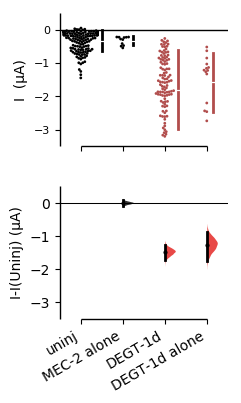

In [125]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3.5, 3)) 
fig1= multi_2group_CurSupp.mean_diff.plot(swarm_ylim=(-3.5,0.5), contrast_ylim=(-3.5,0.5), custom_palette=colorsESTNaGluSup,fig_size=(2.8, 4.5),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='I-I(Uninj) (µA)',
                                    swarm_label='I  (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})


fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
#fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = []
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
labels2 = ['uninj', 'MEC-2 alone','DEGT-1d','DEGT-1d alone']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')
# fig1.axes[0].text(0.5, -4.3, '300 µM Amil')
#fig1.axes[0].text(1.95, -6.8, 'S-Ibu \n (µM)')

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.savefig(filedir+"Fig3-Suppl300Amil-DT1aloneM2"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig3-Suppl300Amil-DT1aloneM2"+'.pdf')




### 100 uM Amil + Ibu & 300 Amil and Ibu

### re-arrange data

In [126]:
Ibu100.pivot(columns='Injection', values='DELTA').describe().T 

NameError: name 'Ibu100' is not defined

# Re-arrange data for Estimation plot according to MeanSTART and MeanTEST
Before and after drig application

In [ ]:
df.head()

In [127]:
AllInjection =  pd.unique(df["Injection"])
AllInjection = AllInjection.tolist()
              
TestSolution = pd.unique(df["TestSol"])
TestSolution  = TestSolution.tolist()

df_new = pd.DataFrame()
results = {}

for Solelement in TestSolution: 
    for element in AllInjection:
        if df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))].empty == True:
            #print('sdsdsd')
            continue
        else: 
            #print('sol presetn')
            result = df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))]
            results[element] = result
            if len(results[element]) <= 2:
#                 print(results[element]["TestSol"] + '+' + results[element]["Injection"] + ' has less or equal to 2 recordings')
                continue
            else:
                df_new = pd.concat([df_new,results[element]["MeanSTART"].rename(element+"-"+Solelement).reset_index(drop=True),results[element]["MeanTEST"].rename(element+'+'+Solelement).reset_index(drop=True)],sort=False, axis=1)
            #print(len(results[element]))
        
df_newInuA = df_new.astype(float)*1000000  
#
#print(df_newInuA["mg012-NaGluAmil300"])



# Re-arrang Ratio

In [128]:
AllInjection =  pd.unique(df["Injection"])
AllInjection = AllInjection.tolist()
              
TestSolution = pd.unique(df["TestSol"])
TestSolution  = TestSolution.tolist()

df_Ratio = pd.DataFrame()
results = {}

for Solelement in TestSolution: 
    for element in AllInjection:
        if df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))].empty == True:
            #print('sdsdsd')
            continue
        else: 
            #print('sol presetn')
            result = df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))]
            results[element] = result
            if len(results[element]) <= 2:
#                 print(results[element]["TestSol"] + '+' + results[element]["Injection"] + ' has less or equal to 2 recordings')
                continue
            else:          
                df_Ratio = pd.concat([df_Ratio,results[element]["RATIO"].rename(element+"RATIO"+Solelement).reset_index(drop=True),],sort=False, axis=1)
#                 for col in len(df_Ratio[element]):
#                     df_Ratio = df_Ratio[elememt].astype(float)
                #print(results[element]["RATIO"])
            #print(len(results[element]))
        

#print(df_Ratio)


In [129]:
#df_Ratio.dtypes




In [130]:
#df_newInuA.dtypes


# Different Plotting combinations

In [131]:
Fig_DT1M2higherConcAmil = dabest.load(df_newInuA, idx= (
    ("uninjected-NaGluAmil100", "uninjected+NaGluAmil100",),
    ("mg418mg012-NaGluAmil100", "mg418mg012+NaGluAmil100",),
    ("uninjected-NaGluAmil300", "uninjected+NaGluAmil300",),
    ("mg418mg012-NaGluAmil300", "mg418mg012+NaGluAmil300",),
    ("mg418-NaGluAmil300", "mg418+NaGluAmil300",),
    ("mg012-NaGluAmil300", "mg012+NaGluAmil300",),
#     ("mg419mg012-NaGluAmil300", "mg419mg012+NaGluAmil300",),
))
                                 
Fig_DT1M2higherConcIbu = dabest.load(df_newInuA, idx= (
    ("uninjected-NaGluIbu100", "uninjected+NaGluIbu100",),
    ("mg418mg012-NaGluIbu100", "mg418mg012+NaGluIbu100",),
    ("uninjected-NaGluIbu300", "uninjected+NaGluIbu300",),
    ("mg418mg012-NaGluIbu300", "mg418mg012+NaGluIbu300",),

#     ("mg419mg012-NaGluAmil300", "mg419mg012+NaGluAmil300",),
))

In [132]:
colorsESTAmil = [(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29)]


<Figure size 252x216 with 0 Axes>

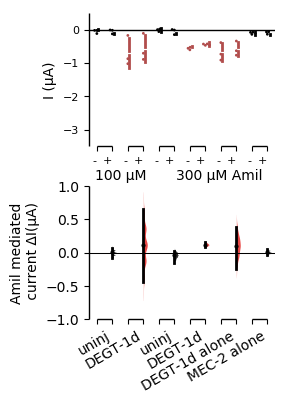

In [133]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3.5, 3)) 
fig1= Fig_DT1M2higherConcAmil.mean_diff.plot(swarm_ylim=(-3.5,0.5), contrast_ylim=(-1,1), custom_palette=colorsESTAmil,fig_size=(3.1, 4.5),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='Amil mediated\n current ΔI(µA)',
                                    swarm_label='I (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))



fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
#fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = ['-','+','-','+','-','+','-','+','-','+','-','+','-','+','-','+',] 
fig1.axes[0].set_xticklabels(labels, ha='right')

labels2 = ['','uninj','','DEGT-1d','','uninj','','DEGT-1d','','DEGT-1d alone','', 'MEC-2 alone',]
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')
fig1.axes[0].text(-0.1, -4.5, '100 µM ')
fig1.axes[0].text(5.1, -4.5, '300 µM Amil')

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.savefig(filedirManuscript+"Fig3-Suppl-Amil100and300_TotalCurBefAf"+'.pdf')




In [134]:
Fig_DT1M2higherConcAmil.mean_diff


DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:39:31 2020.

The unpaired mean difference between uninjected-NaGluAmil100 and uninjected+NaGluAmil100 is 0.00153 [95%CI -0.074, 0.0721].
The two-sided p-value of the Mann-Whitney test is 0.663.

The unpaired mean difference between mg418mg012-NaGluAmil100 and mg418mg012+NaGluAmil100 is 0.119 [95%CI -0.437, 0.652].
The two-sided p-value of the Mann-Whitney test is 0.663.

The unpaired mean difference between uninjected-NaGluAmil300 and uninjected+NaGluAmil300 is -0.0393 [95%CI -0.156, 0.0266].
The two-sided p-value of the Mann-Whitney test is 0.663.

The unpaired mean difference between mg418mg012-NaGluAmil300 and mg418mg012+NaGluAmil300 is 0.12 [95%CI 0.0797, 0.161].
The two-sided p-value of the Mann-Whitney test is 0.0809.

The unpaired mean difference between mg418-NaGluAmil300 and mg418+NaGluAmil300 is 0.0988 [95%CI -0.245, 0.379].
The two-sided p-value of the Mann-Whitney test is 0.663.

The unpaired mean d

In [135]:
0.00409 

0.00409

<Figure size 252x216 with 0 Axes>

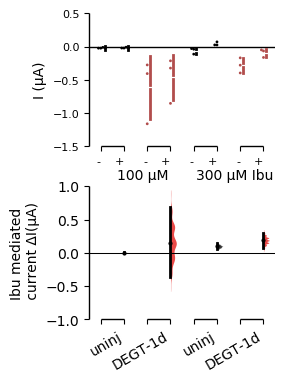

In [136]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3.5, 3)) 
fig1= Fig_DT1M2higherConcIbu.mean_diff.plot(swarm_ylim=(-1.5,0.5), contrast_ylim=(-1,1), custom_palette=colorsESTAmil,fig_size=(3.1, 4.5),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='Ibu mediated\n current ΔI(µA)',
                                    swarm_label='I (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))



fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
#fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = ['-','+','-','+','-','+','-','+','-','+','-','+','-','+','-','+',] 
fig1.axes[0].set_xticklabels(labels, ha='right')

labels2 = ['','uninj','','DEGT-1d','','uninj','','DEGT-1d','','DEGT-1d alone','', 'MEC-2 alone',]
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')
fig1.axes[0].text(0.7, -2, '100 µM ')
fig1.axes[0].text(4.1, -2, '300 µM Ibu')

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.savefig(filedirManuscript+"Fig3-Suppl-Ibu100and300_TotalCurBefAf"+'.pdf')




In [137]:
Fig_Uninj30uM = dabest.load(df_newInuA, idx= (
    ("uninjected-NaGluAmil30", "uninjected+NaGluAmil30",),
    ("uninjected-NaGluBmil30", "uninjected+NaGluBmil30",),
    ("uninjected-NaGluEipa30", "uninjected+NaGluEipa30",),
    ("uninjected-NaGluPhen30", "uninjected+NaGluPhen30",),
    ("uninjected-NaGluBzd30", "uninjected+NaGluBzd30",),
    ("uninjected-NaGluIbu30", "uninjected+NaGluIbu30",),
    ("uninjected-NaGluFibu30", "uninjected+NaGluFibu30",),
    ("uninjected-NaGluDiclo30", "uninjected+NaGluDiclo30",),
    ("uninjected-NaGluAsp30", "uninjected+NaGluAsp30",),
    ("uninjected-NaGluSA30", "uninjected+NaGluSA30",),
))


In [138]:
Fig_DEGT130uM = dabest.load(df_newInuA, idx= (
    ("mg418mg012-NaGluAmil30", "mg418mg012+NaGluAmil30",),
    ("mg418mg012-NaGluBmil30", "mg418mg012+NaGluBmil30",),
    ("mg418mg012-NaGluEipa30", "mg418mg012+NaGluEipa30",),
    ("mg418mg012-NaGluPhen30", "mg418mg012+NaGluPhen30",),
    ("mg418mg012-NaGluBzd30", "mg418mg012+NaGluBzd30",),
    ("mg418mg012-NaGluIbu30", "mg418mg012+NaGluIbu30",),
    ("mg418mg012-NaGluFibu30", "mg418mg012+NaGluFibu30",),
    ("mg418mg012-NaGluDiclo30", "mg418mg012+NaGluDiclo30",),
    ("mg418mg012-NaGluAsp30", "mg418mg012+NaGluAsp30",),
    ("mg418mg012-NaGluSA30", "mg418mg012+NaGluSA30",),
    
#     ("mg419mg012-NaGluAmil300", "mg419mg012+NaGluAmil300",),
))

In [139]:
Fig_UNC830uM = dabest.load(df_newInuA, idx= (
    ("pTL69mg012-NaGluAmil30", "pTL69mg012+NaGluAmil30",),
    ("pTL69mg012-NaGluBmil30", "pTL69mg012+NaGluBmil30",),
    ("pTL69mg012-NaGluEipa30", "pTL69mg012+NaGluEipa30",),
    ("pTL69mg012-NaGluPhen30", "pTL69mg012+NaGluPhen30",),
    ("pTL69mg012-NaGluBzd30", "pTL69mg012+NaGluBzd30",),
    ("pTL69mg012-NaGluIbu30", "pTL69mg012+NaGluIbu30",),
    ("pTL69mg012-NaGluFibu30", "pTL69mg012+NaGluFibu30",),
    ("pTL69mg012-NaGluDiclo30", "pTL69mg012+NaGluDiclo30",),
    ("pTL69mg012-NaGluAsp30", "pTL69mg012+NaGluAsp30",),
    ("pTL69mg012-NaGluSA30", "pTL69mg012+NaGluSA30",),
    
#     ("mg419mg012-NaGluAmil300", "mg419mg012+NaGluAmil300",),
))

# Fig_UNC830uM.mean_diff

In [140]:
#df_newInuA["mg419mg012-NaGluAmil30"]

In [141]:
Fig_MEC430uM = dabest.load(df_newInuA, idx= (
    ("mg419mg012-NaGluAmil30", "mg419mg012+NaGluAmil30",),
    ("mg419mg012-NaGluBmil30", "mg419mg012+NaGluBmil30",),
    ("mg419mg012-NaGluEipa30", "mg419mg012+NaGluEipa30",),
    ("mg419mg012-NaGluPhen30", "mg419mg012+NaGluPhen30",),
    ("mg419mg012-NaGluBzd30", "mg419mg012+NaGluBzd30",),
    ("mg419mg012-NaGluIbu30", "mg419mg012+NaGluIbu30",),
    ("mg419mg012-NaGluFibu30", "mg419mg012+NaGluFibu30",),
    ("mg419mg012-NaGluDiclo30", "mg419mg012+NaGluDiclo30",),
    ("mg419mg012-NaGluAsp30", "mg419mg012+NaGluAsp30",),
    ("mg419mg012-NaGluSA30", "mg419mg012+NaGluSA30",),
    
#     ("mg419mg012-NaGluAmil300", "mg419mg012+NaGluAmil300",),
))

# Fig_MEC430uM.mean_diff 

In [142]:
colorUninj = [(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),]
colorM4 = [(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),]
colorDT1 =[(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10)]
colorU8 =[(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),(0.60, 0.31,0.64),]
    


<Figure size 252x216 with 0 Axes>

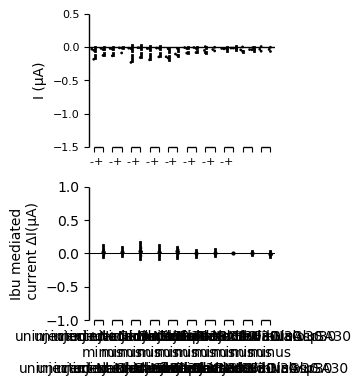

In [143]:
#change figure!!!!
plt.figure(figsize=(3.5, 3)) 
fig1= Fig_Uninj30uM.mean_diff.plot(swarm_ylim=(-1.5,0.5), contrast_ylim=(-1,1), custom_palette=colorUninj,fig_size=(3.1, 4.5),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='Ibu mediated\n current ΔI(µA)',
                                    swarm_label='I (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})


fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
#fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = ['-','+','-','+','-','+','-','+','-','+','-','+','-','+','-','+',] 
fig1.axes[0].set_xticklabels(labels, ha='right')

#labels2 = ['','uninj','','DEGT-1d','','uninj','','DEGT-1d','','DEGT-1d alone','', 'MEC-2 alone',]
#fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')
# fig1.axes[0].text(0.7, -2, '100 µM ')
# fig1.axes[0].text(4.1, -2, '300 µM Ibu')

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.savefig(filedirManuscript+"Fig3-Suppl-Uninj30uM"+'.pdf')



<Figure size 252x216 with 0 Axes>

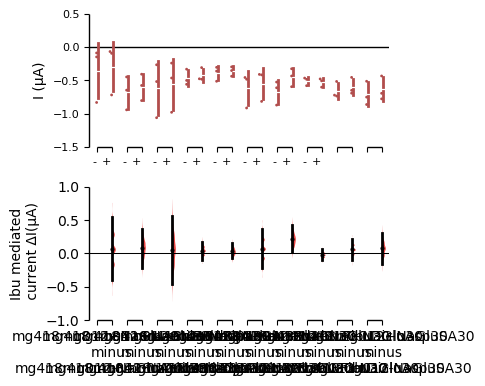

In [144]:
#change figure!!!!
plt.figure(figsize=(3.5, 3)) 
fig1= Fig_DEGT130uM.mean_diff.plot(swarm_ylim=(-1.5,0.5), contrast_ylim=(-1,1), custom_palette=colorDT1,fig_size=(5, 4.5),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='Ibu mediated\n current ΔI(µA)',
                                    swarm_label='I (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})


fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
#fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = ['-','+','-','+','-','+','-','+','-','+','-','+','-','+','-','+',] 
fig1.axes[0].set_xticklabels(labels, ha='right')

#labels2 = ['','uninj','','DEGT-1d','','uninj','','DEGT-1d','','DEGT-1d alone','', 'MEC-2 alone',]
#fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')
# fig1.axes[0].text(0.7, -2, '100 µM ')
# fig1.axes[0].text(4.1, -2, '300 µM Ibu')

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.savefig(filedirManuscript+"Fig3-Suppl-DEGT130uM"+'.pdf')



<Figure size 252x216 with 0 Axes>

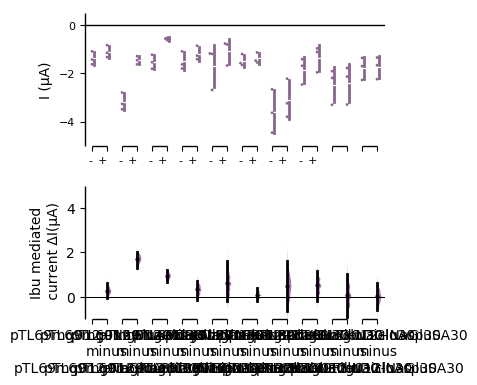

In [145]:
#change figure!!!!
plt.figure(figsize=(3.5, 3)) 
fig1= Fig_UNC830uM.mean_diff.plot(swarm_ylim=(-5,0.5), contrast_ylim=(-1,5), custom_palette=colorU8,fig_size=(5, 4.5),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='Ibu mediated\n current ΔI(µA)',
                                    swarm_label='I (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})


fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
#fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = ['-','+','-','+','-','+','-','+','-','+','-','+','-','+','-','+',] 
fig1.axes[0].set_xticklabels(labels, ha='right')

#labels2 = ['','uninj','','DEGT-1d','','uninj','','DEGT-1d','','DEGT-1d alone','', 'MEC-2 alone',]
#fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')
# fig1.axes[0].text(0.7, -2, '100 µM ')
# fig1.axes[0].text(4.1, -2, '300 µM Ibu')

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.savefig(filedirManuscript+"Fig3-Suppl-UNC830uM"+'.pdf')





<Figure size 252x216 with 0 Axes>

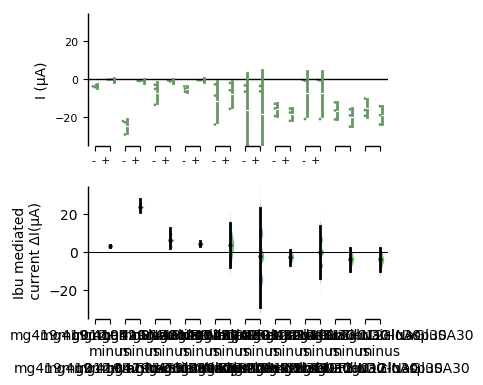

In [146]:
#change figure!!!!
plt.figure(figsize=(3.5, 3)) 
fig1= Fig_MEC430uM.mean_diff.plot(swarm_ylim=(-35,35), contrast_ylim=(-35,35), custom_palette=colorM4,fig_size=(5, 4.5),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='Ibu mediated\n current ΔI(µA)',
                                    swarm_label='I (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})


fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
#fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = ['-','+','-','+','-','+','-','+','-','+','-','+','-','+','-','+',] 
fig1.axes[0].set_xticklabels(labels, ha='right')

#labels2 = ['','uninj','','DEGT-1d','','uninj','','DEGT-1d','','DEGT-1d alone','', 'MEC-2 alone',]
#fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')
# fig1.axes[0].text(0.7, -2, '100 µM ')
# fig1.axes[0].text(4.1, -2, '300 µM Ibu')

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.savefig(filedirManuscript+"Fig3-Suppl-MEC430uM"+'.pdf')



# Before after in paired 

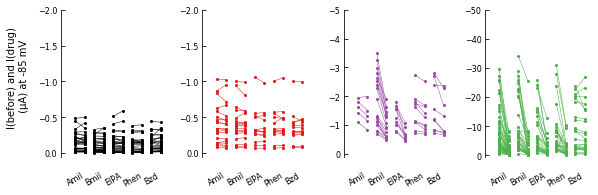

In [147]:
# import matplotlib.pyplot as plt
# import numpy as np

fig = plt.figure(figsize=(12, 3)) 

ax1 = plt.subplot(1,4,1)
ax2 = plt.subplot(1,4,2)

ax3 = plt.subplot(1,4,3)
ax4 = plt.subplot(1,4,4)


plot1 = [1,2]
plot2 = [3,4]
plot3 = [5,6]
plot4 = [7,8]
plot5 = [9,10]

SizeOfMarker = 2
SizeofLine = 0.5
AxisTickLabelSize =8

#plotting the lines
for i in range(len(df_newInuA["uninjected-NaGluAmil30"])):
    ax1.plot(plot1, [df_newInuA["uninjected-NaGluAmil30"][i], df_newInuA["uninjected+NaGluAmil30"][i]], c='k',marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)# alpha=0.5

for i in range(len(df_newInuA["uninjected-NaGluBmil30"])):
    ax1.plot(plot2, [df_newInuA["uninjected-NaGluBmil30"][i], df_newInuA["uninjected+NaGluBmil30"][i]], c='k',marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["uninjected-NaGluEipa30"])):
    ax1.plot(plot3, [df_newInuA["uninjected-NaGluEipa30"][i], df_newInuA["uninjected+NaGluEipa30"][i]], c='k',marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["uninjected-NaGluPhen30"])):
    ax1.plot(plot4, [df_newInuA["uninjected-NaGluPhen30"][i], df_newInuA["uninjected+NaGluPhen30"][i]], c='k',marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["uninjected-NaGluBzd30"])):
    ax1.plot(plot5, [df_newInuA["uninjected-NaGluBzd30"][i], df_newInuA["uninjected+NaGluBzd30"][i]], c='k',marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

######

# # plotting the lines
for i in range(len(df_newInuA["mg418mg012-NaGluAmil30"])):
    ax2.plot(plot1, [df_newInuA["mg418mg012-NaGluAmil30"][i], df_newInuA["mg418mg012+NaGluAmil30"][i]], c=(0.89, 0.11, 0.1),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["mg418mg012-NaGluBmil30"])):
    ax2.plot(plot2, [df_newInuA["mg418mg012-NaGluBmil30"][i], df_newInuA["mg418mg012+NaGluBmil30"][i]], c=(0.89, 0.11, 0.1),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["mg418mg012-NaGluEipa30"])):
    ax2.plot(plot3, [df_newInuA["mg418mg012-NaGluEipa30"][i], df_newInuA["mg418mg012+NaGluEipa30"][i]], c=(0.89, 0.11, 0.1),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["mg418mg012-NaGluPhen30"])):
    ax2.plot(plot4, [df_newInuA["mg418mg012-NaGluPhen30"][i], df_newInuA["mg418mg012+NaGluPhen30"][i]], c=(0.89, 0.11, 0.1),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["mg418mg012-NaGluBzd30"])):
    ax2.plot(plot5, [df_newInuA["mg418mg012-NaGluBzd30"][i], df_newInuA["mg418mg012+NaGluBzd30"][i]], c=(0.89, 0.11, 0.1),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

######

for i in range(len(df_newInuA["pTL69mg012-NaGluAmil30"])):
    ax3.plot(plot1, [df_newInuA["pTL69mg012-NaGluAmil30"][i], df_newInuA["pTL69mg012+NaGluAmil30"][i]], c=(0.6, 0.31, 0.64),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["pTL69mg012-NaGluBmil30"])):
    ax3.plot(plot2, [df_newInuA["pTL69mg012-NaGluBmil30"][i], df_newInuA["pTL69mg012+NaGluBmil30"][i]], c=(0.6, 0.31, 0.64),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["pTL69mg012-NaGluEipa30"])):
    ax3.plot(plot3, [df_newInuA["pTL69mg012-NaGluEipa30"][i], df_newInuA["pTL69mg012+NaGluEipa30"][i]], c=(0.6, 0.31, 0.64),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["pTL69mg012-NaGluPhen30"])):
    ax3.plot(plot4, [df_newInuA["pTL69mg012-NaGluPhen30"][i], df_newInuA["pTL69mg012+NaGluPhen30"][i]], c=(0.6, 0.31, 0.64),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["pTL69mg012-NaGluBzd30"])):
    ax3.plot(plot5 , [df_newInuA["pTL69mg012-NaGluBzd30"][i], df_newInuA["pTL69mg012+NaGluBzd30"][i]], c=(0.6, 0.31, 0.64),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)
########

  
###########
for i in range(len(df_newInuA["mg419mg012-NaGluAmil30"])):
    ax4.plot(plot1, [df_newInuA["mg419mg012-NaGluAmil30"][i], df_newInuA["mg419mg012+NaGluAmil30"][i]], c=(0.3, 0.69, 0.29),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["mg419mg012-NaGluBmil30"])):
    ax4.plot(plot2, [df_newInuA["mg419mg012-NaGluBmil30"][i], df_newInuA["mg419mg012+NaGluBmil30"][i]], c=(0.3, 0.69, 0.29),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["mg419mg012-NaGluEipa30"])):
    ax4.plot(plot3, [df_newInuA["mg419mg012-NaGluEipa30"][i], df_newInuA["mg419mg012+NaGluEipa30"][i]], c=(0.3, 0.69, 0.29),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["mg419mg012-NaGluPhen30"])):
    ax4.plot(plot4, [df_newInuA["mg419mg012-NaGluPhen30"][i], df_newInuA["mg419mg012+NaGluPhen30"][i]], c=(0.3, 0.69, 0.29),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["mg419mg012-NaGluBzd30"])):
    ax4.plot(plot5, [df_newInuA["mg419mg012-NaGluBzd30"][i], df_newInuA["mg419mg012+NaGluBzd30"][i]], c=(0.3, 0.69, 0.29),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)


labelsAmil = ["Amil", "Bmil","EIPA", "Phen", "Bzd"]

ylimSetM4 = [0.5,-50]
ylimSetU8 = [0.1,-5]
ylimSetDT1 = [0.05,-2]
##### AXIS 1 ####
ax1.set_ylim(ylimSetDT1)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
# ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='y', which='major', labelsize=10 )  
ax1.tick_params(axis='x', which='major', labelsize=10, length=0)  #0 set tick length to 0 and thus removes it 
# ax7.set_title('Amiloride Analogues',size=12)
# ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax1.set_xticks((plot1[0], plot2[0], plot3[0],plot4[0],plot5[0])) 
ax1.set_xticklabels(labelsAmil,rotation=30)
ax1.spines['bottom'].set_visible(False) 
#ax1.xaxis.set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
ax1.set_yticks([0,-0.5,-1,-1.5,-2])
# #ax1.set_xlabel('V (mV)',fontsize=14)
# #ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax1.set_ylabel(axesText)
ax1.set_xlabel(axesText)

ax1.text(-5, -1.5, 'I(before) and I(drug)\n (µA) at -85 mV',fontsize=10,rotation=90,ha='center')


##### AXIS 2 ####
ax2.set_ylim(ylimSetDT1)
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
# ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='y', which='major', labelsize=10 )  
ax2.tick_params(axis='x', which='major', labelsize=10, length=0) 
# ax7.set_title('Amiloride Analogues',size=12)
ax2.set_xticks((plot1[0], plot2[0], plot3[0],plot4[0],plot5[0])) 
ax2.set_xticklabels(labelsAmil,rotation=30)
ax2.spines['bottom'].set_visible(False) 
#ax2.xaxis.set_visible(False)
ax2.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
ax2.set_yticks([0,-0.5,-1,-1.5,-2])
# #ax1.set_xlabel('V (mV)',fontsize=14)
# #ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax2.set_ylabel(axesText)
ax2.set_xlabel(axesText)
# ax7.text(-3.7, -0.1, 'Change in current at -85 mV (I(drug) - I(before)',fontsize=14,rotation=90)

   ##### AXIS 3 ####
ax3.set_ylim(ylimSetU8)
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
# 3ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='y', which='major', labelsize=10 )  
ax3.tick_params(axis='x', which='major', labelsize=10, length=0)  
# ax7.set_title('Amiloride Analogues',size=12)
ax3.set_xticks((plot1[0], plot2[0], plot3[0],plot4[0],plot5[0])) 
ax3.set_xticklabels(labelsAmil,rotation=30)
ax3.spines['bottom'].set_visible(False) 
#ax3.xaxis.set_visible(False)
ax3.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
# #ax1.set_xlabel('V (mV)',fontsize=14)
# #ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax3.set_ylabel(axesText)
ax3.set_xlabel(axesText)
# ax7.text(-3.7, -0.1, 'Change in current at -85 mV (I(drug) - I(before)',fontsize=14,rotation=90)

   ##### AXIS 4####
ax4.set_ylim(ylimSetM4)

ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
# 3ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='y', which='major', labelsize=10 )  
ax4.tick_params(axis='x', which='major', labelsize=10, length=0) 
# ax7.set_title('Amiloride Analogues',size=12)
ax4.set_xticks((plot1[0], plot2[0], plot3[0],plot4[0],plot5[0])) 
ax4.set_xticklabels(labelsAmil,rotation=30)
ax4.spines['bottom'].set_visible(False) 
ax4.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
# #ax1.set_xlabel('V (mV)',fontsize=14)
# #ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax4.set_ylabel(axesText)
ax4.set_xlabel(axesText) 
#ax4.set_xticks([])
#ax3.xaxis.set_visible(False)

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.5)     
    
# plt.show()

plt.savefig(filedirManuscript+"Fig2-amilorideAnalogs-pairedPoints"+'.pdf')
#plt.savefig(filedirManuscript+"Fig2-amilorideAnalogs-pairedPoints"+'.eps')
#plt.savefig(filedirManuscript+"Fig2-amilorideAnalogs-pairedPoints"+'.jpg')

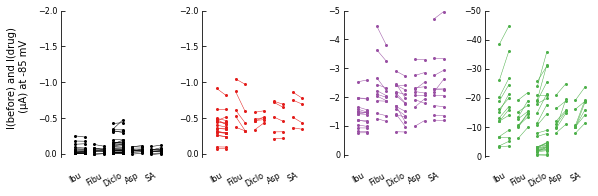

In [148]:
# import matplotlib.pyplot as plt
# import numpy as np

fig = plt.figure(figsize=(12, 3)) 

ax1 = plt.subplot(1,4,1)
ax2 = plt.subplot(1,4,2)

ax3 = plt.subplot(1,4,3)
ax4 = plt.subplot(1,4,4)


plot1 = [1,2]
plot2 = [3,4]
plot3 = [5,6]
plot4 = [7,8]
plot5 = [9,10]

SizeOfMarker = 2

#plotting the lines
for i in range(len(df_newInuA["uninjected-NaGluIbu30"])):
    ax1.plot(plot1, [df_newInuA["uninjected-NaGluIbu30"][i], df_newInuA["uninjected+NaGluIbu30"][i]], c='k',marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["uninjected-NaGluFibu30"])):
    ax1.plot(plot2, [df_newInuA["uninjected-NaGluFibu30"][i], df_newInuA["uninjected+NaGluFibu30"][i]], c='k',marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["uninjected-NaGluDiclo30"])):
    ax1.plot(plot3, [df_newInuA["uninjected-NaGluDiclo30"][i], df_newInuA["uninjected+NaGluDiclo30"][i]], c='k',marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["uninjected-NaGluAsp30"])):
    ax1.plot(plot4, [df_newInuA["uninjected-NaGluAsp30"][i], df_newInuA["uninjected+NaGluAsp30"][i]], c='k',marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["uninjected-NaGluSA30"])):
    ax1.plot(plot5, [df_newInuA["uninjected-NaGluSA30"][i], df_newInuA["uninjected+NaGluSA30"][i]], c='k',marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

######

# # plotting the lines
for i in range(len(df_newInuA["mg418mg012-NaGluIbu30"])):
    ax2.plot(plot1, [df_newInuA["mg418mg012-NaGluIbu30"][i], df_newInuA["mg418mg012+NaGluIbu30"][i]], c=(0.89, 0.11, 0.1),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["mg418mg012-NaGluFibu30"])):
    ax2.plot(plot2, [df_newInuA["mg418mg012-NaGluFibu30"][i], df_newInuA["mg418mg012+NaGluFibu30"][i]], c=(0.89, 0.11, 0.1),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["mg418mg012-NaGluDiclo30"])):
    ax2.plot(plot3, [df_newInuA["mg418mg012-NaGluDiclo30"][i], df_newInuA["mg418mg012+NaGluDiclo30"][i]], c=(0.89, 0.11, 0.1),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["mg418mg012-NaGluAsp30"])):
    ax2.plot(plot4, [df_newInuA["mg418mg012-NaGluAsp30"][i], df_newInuA["mg418mg012+NaGluAsp30"][i]], c=(0.89, 0.11, 0.1),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["mg418mg012-NaGluSA30"])):
    ax2.plot(plot5, [df_newInuA["mg418mg012-NaGluSA30"][i], df_newInuA["mg418mg012+NaGluSA30"][i]], c=(0.89, 0.11, 0.1),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

######

for i in range(len(df_newInuA["pTL69mg012-NaGluIbu30"])):
    ax3.plot(plot1, [df_newInuA["pTL69mg012-NaGluIbu30"][i], df_newInuA["pTL69mg012+NaGluIbu30"][i]], c=(0.6, 0.31, 0.64),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["pTL69mg012-NaGluFibu30"])):
    ax3.plot(plot2, [df_newInuA["pTL69mg012-NaGluFibu30"][i], df_newInuA["pTL69mg012+NaGluFibu30"][i]], c=(0.6, 0.31, 0.64),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["pTL69mg012-NaGluDiclo30"])):
    ax3.plot(plot3, [df_newInuA["pTL69mg012-NaGluDiclo30"][i], df_newInuA["pTL69mg012+NaGluDiclo30"][i]], c=(0.6, 0.31, 0.64),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["pTL69mg012-NaGluAsp30"])):
    ax3.plot(plot4, [df_newInuA["pTL69mg012-NaGluAsp30"][i], df_newInuA["pTL69mg012+NaGluAsp30"][i]], c=(0.6, 0.31, 0.64),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["pTL69mg012-NaGluSA30"])):
    ax3.plot(plot5 , [df_newInuA["pTL69mg012-NaGluSA30"][i], df_newInuA["pTL69mg012+NaGluSA30"][i]], c=(0.6, 0.31, 0.64),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)
########

  
###########
for i in range(len(df_newInuA["mg419mg012-NaGluIbu30"])):
    ax4.plot(plot1, [df_newInuA["mg419mg012-NaGluIbu30"][i], df_newInuA["mg419mg012+NaGluIbu30"][i]], c=(0.3, 0.69, 0.29),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["mg419mg012-NaGluFibu30"])):
    ax4.plot(plot2, [df_newInuA["mg419mg012-NaGluFibu30"][i], df_newInuA["mg419mg012+NaGluFibu30"][i]], c=(0.3, 0.69, 0.29),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["mg419mg012-NaGluDiclo30"])):
    ax4.plot(plot3, [df_newInuA["mg419mg012-NaGluDiclo30"][i], df_newInuA["mg419mg012+NaGluDiclo30"][i]], c=(0.3, 0.69, 0.29),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["mg419mg012-NaGluAsp30"])):
    ax4.plot(plot4, [df_newInuA["mg419mg012-NaGluAsp30"][i], df_newInuA["mg419mg012+NaGluAsp30"][i]], c=(0.3, 0.69, 0.29),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)

for i in range(len(df_newInuA["mg419mg012-NaGluSA30"])):
    ax4.plot(plot5, [df_newInuA["mg419mg012-NaGluSA30"][i], df_newInuA["mg419mg012+NaGluSA30"][i]], c=(0.3, 0.69, 0.29),marker = 'o',markersize=SizeOfMarker, linewidth=SizeofLine)


labelsIbu = ["Ibu", "Fibu","Diclo", "Asp", "SA"]

ylimSetM4 = [0.5,-50]
ylimSetU8 = [0.1,-5]
ylimSetDT1 = [0.05,-2]
##### AXIS 1 ####
ax1.set_ylim(ylimSetDT1)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
# ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='y', which='major', labelsize=10 )  
ax1.tick_params(axis='x', which='major', labelsize=10, length=0) 
# ax7.set_title('Ibuoride Analogues',size=12)
# ax1.set_xticklabels(np.unique(IbuAll30['Injection']),rotation=30)
ax1.set_xticks((plot1[0], plot2[0], plot3[0],plot4[0],plot5[0])) 
ax1.set_xticklabels(labelsIbu,rotation=30)
ax1.spines['bottom'].set_visible(False) 
#ax1.xaxis.set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
ax1.set_yticks([0,-0.5,-1,-1.5,-2])
# #ax1.set_xlabel('V (mV)',fontsize=14)
# #ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax1.set_ylabel(axesText)
ax1.set_xlabel(axesText)
ax1.text(-5, -1.5, 'I(before) and I(drug)\n (µA) at -85 mV',fontsize=10,rotation=90,ha='center')


##### AXIS 2 ####
ax2.set_ylim(ylimSetDT1)
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
# ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='y', which='major', labelsize=10 )  
ax2.tick_params(axis='x', which='major', labelsize=10, length=0)   
# ax7.set_title('Ibuoride Analogues',size=12)
ax2.set_xticks((plot1[0], plot2[0], plot3[0],plot4[0],plot5[0])) 
ax2.set_xticklabels(labelsIbu,rotation=30)
ax2.spines['bottom'].set_visible(False) 
#ax2.xaxis.set_visible(False)
ax2.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
ax2.set_yticks([0,-0.5,-1,-1.5,-2])
# #ax1.set_xlabel('V (mV)',fontsize=14)
# #ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax2.set_ylabel(axesText)
ax2.set_xlabel(axesText)
# ax7.text(-3.7, -0.1, 'Change in current at -85 mV (I(drug) - I(before)',fontsize=14,rotation=90)

   ##### AXIS 3 ####
ax3.set_ylim(ylimSetU8)
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
# 3ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='y', which='major', labelsize=10 )  
ax3.tick_params(axis='x', which='major', labelsize=10, length=0) 
# ax7.set_title('Ibuoride Analogues',size=12)
ax3.set_xticks((plot1[0], plot2[0], plot3[0],plot4[0],plot5[0])) 
ax3.set_xticklabels(labelsIbu,rotation=30)
ax3.spines['bottom'].set_visible(False) 
#ax3.xaxis.set_visible(False)
ax3.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
# #ax1.set_xlabel('V (mV)',fontsize=14)
# #ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax3.set_ylabel(axesText)
ax3.set_xlabel(axesText)
# ax7.text(-3.7, -0.1, 'Change in current at -85 mV (I(drug) - I(before)',fontsize=14,rotation=90)

   ##### AXIS 4####
ax4.set_ylim(ylimSetM4)
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
# 3ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1   
# ax.tick_params(axis="x", labelsize=18, labelrotation=-60, labelcolor="turquoise")
# ax.tick_params(axis="y", labelsize=12, labelrotation=20, labelcolor="orange")
ax4.tick_params(axis='y', which='major', labelsize=10 )  
ax4.tick_params(axis='x', which='major', labelsize=10, length=0)  
# ax7.set_title('Ibuoride Analogues',size=12)
ax4.set_xticks((plot1[0], plot2[0], plot3[0],plot4[0],plot5[0])) 
ax4.set_xticklabels(labelsIbu,rotation=30)
ax4.spines['bottom'].set_visible(False) 
#ax4.xaxis.set_visible(False)
ax4.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
# #ax1.set_xlabel('V (mV)',fontsize=14)
# #ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax4.set_ylabel(axesText)
ax4.set_xlabel(axesText)
# ax7.text(-3.7, -0.1, 'Change in current at -85 mV (I(drug) - I(before)',fontsize=14,rotation=90)

    

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.5)     
    
# plt.show()

plt.savefig(filedirManuscript+"Fig2-NSAIDs-pairedPoints"+'.pdf')
#plt.savefig(filedirManuscript+"Fig2-IbuorideAnalogs-pairedPoints"+'.eps')
#plt.savefig(filedirManuscript+"Fig2-IbuorideAnalogs-pairedPoints"+'.jpg')

In [149]:
# plotting the lines
for i in range(len(df_newInuA["mg418mg012-NaGluAmil30"])):
    ax1.plot( [0,1], [df_newInuA["mg418mg012-NaGluAmil30"][i], df_newInuA["mg418mg012+NaGluAmil30"][i]], c='k',marker = 'o')

for i in range(len(df_newInuA["mg418mg012-NaGluBmil30"])):
    ax1.plot( [1.5,2.5], [df_newInuA["mg418mg012-NaGluBmil30"][i], df_newInuA["mg418mg012+NaGluBmil30"][i]], c='k',marker = 'o')

for i in range(len(df_newInuA["mg418mg012-NaGluEipa30"])):
    ax1.plot( [3,4], [df_newInuA["mg418mg012-NaGluEipa30"][i], df_newInuA["mg418mg012+NaGluEipa30"][i]], c='k',marker = 'o')

for i in range(len(df_newInuA["mg418mg012-NaGluPhen30"])):
    ax1.plot( [4.5,5.5], [df_newInuA["mg418mg012-NaGluPhen30"][i], df_newInuA["mg418mg012+NaGluPhen30"][i]], c='k',marker = 'o')

for i in range(len(df_newInuA["mg418mg012-NaGluBzd30"])):
    ax1.plot( [6,7], [df_newInuA["mg418mg012-NaGluBzd30"][i], df_newInuA["mg418mg012+NaGluBzd30"][i]], c='k',marker = 'o')



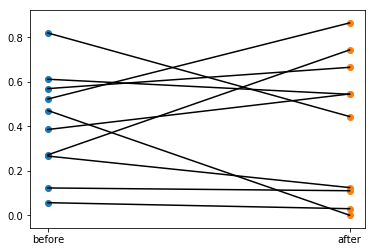

In [150]:
import matplotlib.pyplot as plt
import numpy as np

# your input data:
befores = np.random.rand(10)
afters = np.random.rand(10)

# plotting the points
plt.scatter(np.zeros(len(befores)), befores)
plt.scatter(np.ones(len(afters)), afters)

# plotting the lines
for i in range(len(befores)):
    plt.plot( [0,1], [befores[i], afters[i]], c='k')

plt.xticks([0,1], ['before', 'after'])

plt.show()

# plotting RATIO

In [151]:

#copy to MAnuscrit folder
df_Ratio.to_csv(filedirManuscriptStat+'df_Ratio.csv', header=True, index=None, sep=',', mode='w')


In [152]:
df_Ratio.head()

,mg012RATIONaGlu2,mg410mg012RATIONaGlu2,mg410mg428mg012RATIONaGlu2,mg418RATIONaGlu2,mg418mg012RATIONaGlu2,mg418mg012mg512RATIONaGlu2,mg419RATIONaGlu2,mg419mg012RATIONaGlu2,mg419mg012mg418RATIONaGlu2,mg419mg012mg418mg512RATIONaGlu2,...,mg418mg012RATIONaHCO3,uninjectedRATIONaHCO3,mg751mg012RATIONaGluSel2,mg751mg012RATIONaGluSelAmil300,mg693RATIONaGluAsp300,uninjectedRATIONaGluDVF200Ca2,uninjectedRATIONaGluDVF200Ca300Amil,uninjectedRATIONaGluDiclo700,uninjectedRATIONaGluDVF200Ca3,uninjectedRATIONaGluDVF200Ca300DMSO
0,1.006062,0.082316,1.073062,1.000325,0.651437,0.791964,2.113670,0.438012,0.657810,0.896764,...,0.361818,0.053623,0.834209,0.009098,1.028377,0.960623,0.164458,0.713785,1.811836,0.835396
1,1.027657,0.356826,1.161666,1.004729,0.735973,1.024274,3.426993,0.503353,0.702000,0.958152,...,0.415602,0.767081,0.995165,0.021881,1.228383,0.975855,0.254946,0.805701,2.472350,0.900273
2,1.033787,0.388321,1.625886,1.072244,0.752126,1.125508,3.873784,0.551424,0.708829,1.003872,...,0.656683,0.859437,10.190430,0.052133,2.445032,1.035801,0.284256,0.891103,2.986775,0.930416
3,1.082456,0.523552,2.008700,1.078293,0.755217,1.139721,6.239351,0.560499,0.712731,1.006929,...,0.692915,0.866674,15.873040,0.064513,NaN,1.093275,0.289509,0.923049,NaN,NaN
4,1.100123,0.814822,NaN,1.095470,0.788665,1.188439,NaN,0.570260,0.754121,1.015930,...,0.874894,0.869210,43.385640,0.094285,NaN,1.393258,0.339525,NaN,NaN,NaN


In [153]:
### TEST DATA FRAME AND PLOTTING

# Data = {'Product': ['0.50','0.70','0.80', '0.75','0.6','NaN','NaN'],
#           'Price': ['2.50','2.70','6.00','NaN','NaN','NaN','NaN']}

# test_df = pd.DataFrame(Data)
# test_df['Price'] = test_df['Price'].astype(float)
# test_df['Product'] = test_df['Product'].astype(float)


# print (test_df)
# print (test_df.dtypes)

# fig = plt.figure(figsize=(9.5, 7)) 
# #plt.subplots(2, 2, sharex='col')

# plt.plot(test_df['Product'], color = 'g')#color = colorsSINGLES[0]
# plt.plot(test_df['Price'], color = 'g',linestyle='--')

# Fig_test= dabest.load(test_df, idx= (
#     ("Product", "Price",),
# ))

# Fig_test.mean_diff

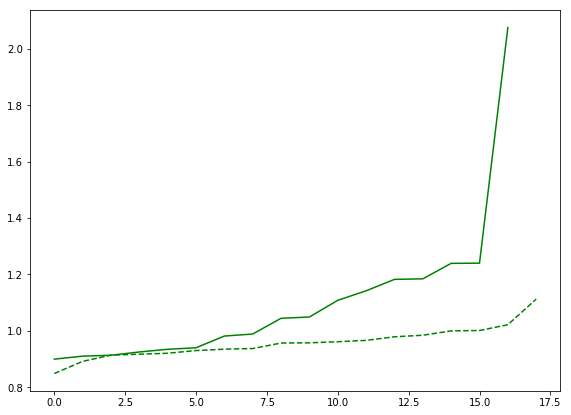

In [154]:
fig = plt.figure(figsize=(9.5, 7)) 
#plt.subplots(2, 2, sharex='col')

plt.plot(df_Ratio["uninjectedRATIONaGluIbu30"], color = 'g')#color = colorsSINGLES[0]
plt.plot(df_Ratio["mg418mg012RATIONaGluIbu30"], color = 'g',linestyle='--')

In [155]:
Fig_UninjDT1Ratio30 = dabest.load(df_Ratio, idx= (
    ("uninjectedRATIONaGluAmil30", "mg418mg012RATIONaGluAmil30",),
   ("uninjectedRATIONaGluBmil30", "mg418mg012RATIONaGluBmil30",),
    ("uninjectedRATIONaGluEipa30", "mg418mg012RATIONaGluEipa30",),
    ("uninjectedRATIONaGluPhen30", "mg418mg012RATIONaGluPhen30",),
    ("uninjectedRATIONaGluBzd30", "mg418mg012RATIONaGluBzd30",),
     ("uninjectedRATIONaGluIbu30", "mg418mg012RATIONaGluIbu30",),
     ("uninjectedRATIONaGluFibu30", "mg418mg012RATIONaGluFibu30",),
     ("uninjectedRATIONaGluDiclo30", "mg418mg012RATIONaGluDiclo30",),
     ("uninjectedRATIONaGluAsp30", "mg418mg012RATIONaGluAsp30",),
     ("uninjectedRATIONaGluSA30", "mg418mg012RATIONaGluSA30",),
))


#Fig_UninjDT1Ratio30.mean_diff

In [156]:
Fig_UninjU8Ratio30 = dabest.load(df_Ratio, idx= (
    ("uninjectedRATIONaGluAmil30", "pTL69mg012RATIONaGluAmil30",),
   ("uninjectedRATIONaGluBmil30", "pTL69mg012RATIONaGluBmil30",),
    ("uninjectedRATIONaGluEipa30", "pTL69mg012RATIONaGluEipa30",),
    ("uninjectedRATIONaGluPhen30", "pTL69mg012RATIONaGluPhen30",),
    ("uninjectedRATIONaGluBzd30", "pTL69mg012RATIONaGluBzd30",),
     ("uninjectedRATIONaGluIbu30", "pTL69mg012RATIONaGluIbu30",),
     ("uninjectedRATIONaGluFibu30", "pTL69mg012RATIONaGluFibu30",),
     ("uninjectedRATIONaGluDiclo30", "pTL69mg012RATIONaGluDiclo30",),
     ("uninjectedRATIONaGluAsp30", "pTL69mg012RATIONaGluAsp30",),
     ("uninjectedRATIONaGluSA30", "pTL69mg012RATIONaGluSA30",),
))


In [157]:
Fig_UninjM4Ratio30 = dabest.load(df_Ratio, idx= (
    ("uninjectedRATIONaGluAmil30", "mg419mg012RATIONaGluAmil30",),
   ("uninjectedRATIONaGluBmil30", "mg419mg012RATIONaGluBmil30",),
    ("uninjectedRATIONaGluEipa30", "mg419mg012RATIONaGluEipa30",),
    ("uninjectedRATIONaGluPhen30", "mg419mg012RATIONaGluPhen30",),
    ("uninjectedRATIONaGluBzd30", "mg419mg012RATIONaGluBzd30",),
     ("uninjectedRATIONaGluIbu30", "mg419mg012RATIONaGluIbu30",),
     ("uninjectedRATIONaGluFibu30", "mg419mg012RATIONaGluFibu30",),
     ("uninjectedRATIONaGluDiclo30", "mg419mg012RATIONaGluDiclo30",),
     ("uninjectedRATIONaGluAsp30", "mg419mg012RATIONaGluAsp30",),
     ("uninjectedRATIONaGluSA30", "mg419mg012RATIONaGluSA30",),
))


<Figure size 216x288 with 0 Axes>

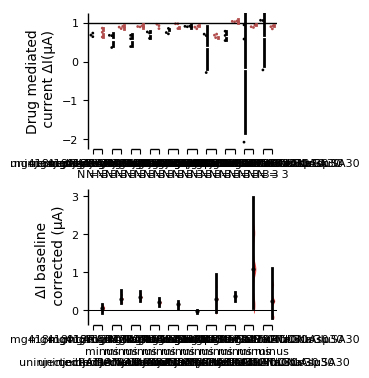

In [158]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3, 4)) 
colorsESTDT1=[(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),]
#colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]

#swarm_ylim=(0.2,-0.05), contrast_ylim=(0.2,-0.05),
fig1= Fig_UninjDT1Ratio30.mean_diff.plot( custom_palette=colorsESTDT1,fig_size=(3, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='ΔI baseline \n corrected (µA)',
                                    swarm_label='Drug mediated\n current ΔI(µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs

fig1.axes[0].plot([-1,20], [1,1], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  


# labels = []
# fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
# labels2 = ['','Amil','','Bmil','','EIPA','',"Phen",'','Bzd']
# fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')

plt.gcf().subplots_adjust(bottom=0.1, left=0.27,right=None, top=None,hspace=1, wspace=0.2) 

plt.savefig(filedirManuscript+"Fig3-EstStat-RATIO-IDT1Uninj"+'.pdf')




In [159]:
Amil100 = df[(df.Injection.isin(["mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluAmil100"]))]
Ibu100 = df[(df.Injection.isin(["mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluIbu100"]))]
Amil300 = df[(df.Injection.isin(["mg418mg012","uninjected","mg012","mg418"])) & (df.TestSol.isin(["NaGluAmil300"]))]
Ibu300 = df[(df.Injection.isin(["mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluIbu300"]))]



Img418Amil100 = Amil100.loc[Amil100['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Amil100.columns = ['D-Amil']


Img418Ibu100 = Ibu100.loc[Ibu100['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Ibu100.columns = ['D-Ibu']

IUninjAmil100 = Amil100.loc[Amil100['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjAmil100.columns = ['Uij-Amil']


IUninjIbu100 = Ibu100.loc[Ibu100['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjIbu100.columns = ['Uij-Ibu']


### 300 
Img418Amil300 = Amil300.loc[Amil300['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Amil300.columns = ['D-Amil300']

Img418aloneAmil300 = Amil300.loc[Amil300['Injection'] == 'mg418',['DELTA']] #returns a data frame 
Img418aloneAmil300.columns = ['Dalone-Amil300']

Img012aloneAmil300 = Amil300.loc[Amil300['Injection'] == 'mg012',['DELTA']] #returns a data frame 
Img012aloneAmil300.columns = ['M2-Amil300']

Img418Ibu300 = Ibu300.loc[Ibu300['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Ibu300.columns = ['D-Ibu300']

IUninjAmil300 = Amil300.loc[Amil300['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjAmil300.columns = ['Uij-Amil300']


IUninjIbu300 = Ibu300.loc[Ibu300['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjIbu300.columns = ['Uij-Ibu300']
                       


### concatenate data to plot all amil including M2 alone

In [184]:
I100Concat = pd.concat([Img418Amil100.reset_index(drop=True),IUninjAmil100.reset_index(drop=True),Img418Amil300.reset_index(drop=True),IUninjAmil300.reset_index(drop=True),Img418aloneAmil300.reset_index(drop=True),Img012aloneAmil300.reset_index(drop=True),],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doin
I100ConcatuA = I100Concat.astype(float)*1000000
                                                          
#shared_controltest = dabest.load(I100ConcatuA, idx=(("Uij-Amil", "D-Amil",),("Uij-Bmil", "D-Bmil",), ("Uij-Ibu", "D-Ibu")))
multi_2group100 = dabest.load(I100ConcatuA, idx=(("Uij-Amil", "D-Amil",), ("Uij-Amil300","M2-Amil300", "D-Amil300","Dalone-Amil300",)))



In [185]:
colorsEST100 = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29)]



In [186]:
multi_2group100.mean_diff


DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:44:02 2020.

The unpaired mean difference between Uij-Amil and D-Amil is 0.0201 [95%CI -0.0384, 0.0694].
The two-sided p-value of the Mann-Whitney test is 0.35.

The unpaired mean difference between Uij-Amil300 and M2-Amil300 is -0.0067 [95%CI -0.017, 0.0043].
The two-sided p-value of the Mann-Whitney test is 0.19.

The unpaired mean difference between Uij-Amil300 and D-Amil300 is 0.0623 [95%CI 0.0389, 0.0935].
The two-sided p-value of the Mann-Whitney test is 1.32e-06.

The unpaired mean difference between Uij-Amil300 and Dalone-Amil300 is 0.0288 [95%CI 0.00706, 0.0581].
The two-sided p-value of the Mann-Whitney test is 0.0528.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.

To get the results of all valid statistical tests, use `.mean

### figure Amil 100 and 300 including M2 alone

<Figure size 252x216 with 0 Axes>

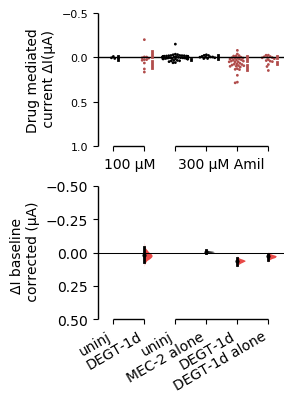

In [201]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3.5, 3)) 
fig1= multi_2group100.mean_diff.plot(swarm_ylim=(1,-0.5), contrast_ylim=(0.5,-0.5), custom_palette=colorsEST100,fig_size=(3.1, 4.5),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='ΔI baseline \n corrected (µA)',
                                    swarm_label='Drug mediated\n current ΔI(µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))



fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
#fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = []#'0','100','0','100','0','100','0','100' 
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')

labels2 = ['uninj','DEGT-1d','uninj','MEC-2 alone','DEGT-1d','DEGT-1d alone', ]
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')
fig1.axes[0].text(-0.3, 1.25, '100 µM ')
fig1.axes[0].text(2.1, 1.25, '300 µM Amil')

plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.savefig(filedir+"Fig3-Suppl-Amil100and300"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig3-Suppl-Amil100and300"+'.pdf')




# paired data higher amiloride

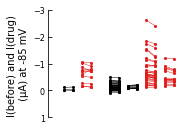

In [207]:
fig = plt.figure(figsize=(2.8, 1.8)) 

colorsEST100 = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29)]


ax1 = plt.subplot(1,1,1)

plot1 = [1,2]
plot2 = [3,4]
plot3 = [6,7]
plot4 = [8,9]
plot5 = [10,11]
plot6 = [12,13]
# plot7 = [14,15]

SizeOfMarker = 2
SizeofLine = 0.5
AxisTickLabelSize =8

for i in range(len(df_newInuA["uninjected-NaGluAmil100"])):
    ax1.plot(plot1, [df_newInuA["uninjected-NaGluAmil100"][i], df_newInuA["uninjected+NaGluAmil100"][i]], c='k',marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine)

for i in range(len(df_newInuA["mg418mg012-NaGluAmil100"])):
    ax1.plot(plot2, [df_newInuA["mg418mg012-NaGluAmil100"][i], df_newInuA["mg418mg012+NaGluAmil100"][i]], c=(0.89, 0.11,0.10),marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine)

for i in range(len(df_newInuA["uninjected-NaGluAmil300"])):
    ax1.plot(plot3, [df_newInuA["uninjected-NaGluAmil300"][i], df_newInuA["uninjected+NaGluAmil300"][i]], c='k',marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine)

for i in range(len(df_newInuA["mg012-NaGluAmil300"])):
    ax1.plot(plot4, [df_newInuA["mg012-NaGluAmil300"][i], df_newInuA["mg012+NaGluAmil300"][i]], c='k',marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine)

for i in range(len(df_newInuA["mg418mg012-NaGluAmil300"])):
    ax1.plot(plot5, [df_newInuA["mg418mg012-NaGluAmil300"][i], df_newInuA["mg418mg012+NaGluAmil300"][i]], c=(0.89, 0.11,0.10),marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine)

for i in range(len(df_newInuA["mg418-NaGluAmil300"])):
    ax1.plot(plot6, [df_newInuA["mg418-NaGluAmil300"][i], df_newInuA["mg418+NaGluAmil300"][i]], c=(0.89, 0.11,0.10),marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine)


# for i in range(len(df_newInuA["pTL69mg012-NaGluAmil300"])):
#     ax1.plot(plot7, [df_newInuA["pTL69mg012-NaGluAmil300"][i], df_newInuA["pTL69mg012+NaGluAmil300"][i]], c=(0.60, 0.31,0.64),marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine)
 



labelsAmil = ["uninj", "DEGT-1d","EIPA", "Phen", "Bzd",""]

ylimSetM4 = [0.5,-50]
ylimSetU8 = [0.1,-5]
ylimSetDT1 = [1,-3]
##### AXIS 1 ####
ax1.set_ylim(ylimSetDT1)

# test = [ax1,ax2,ax3,ax4]
# for element in test:
#     element.spines['right'].set_visible(False) 
    
    
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
# ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='y', which='major', labelsize=10 )  
ax1.tick_params(axis='x', which='major', labelsize=10, length=0)  #0 set tick length to 0 and thus removes it 
# ax7.set_title('Amiloride Analogues',size=12)
# ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax1.set_xticks((plot1[0], plot2[0], plot3[0],plot4[0],plot5[0])) 
ax1.set_xticklabels(labelsAmil,rotation=30)
ax1.spines['bottom'].set_visible(False) 
ax1.xaxis.set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
# ax1.set_yticks([0,-0.5,-1,-1.5,-2])
# #ax1.set_xlabel('V (mV)',fontsize=14)
# #ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax1.set_ylabel(axesText)
ax1.set_xlabel(axesText)

ax1.text(-4, -2.1, 'I(before) and I(drug)\n (µA) at -85 mV',fontsize=10,rotation=90,ha='center')


  

plt.gcf().subplots_adjust(bottom=0.05, left=0.3,right=None, top=None,hspace=1.5, wspace=0.5)     
    
# plt.show()

plt.savefig(filedirManuscript+"Fig2-Suppl-Paired-Amil"+'.pdf')
#plt.savefig(filedirManuscript+"Fig2-IbuorideAnalogs-pairedPoints"+'.eps')
#plt.savefig(filedirManuscript+"Fig2-IbuorideAnalogs-pairedPoints"+'.jpg')


# paired data benzamil

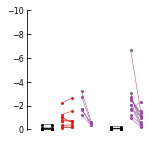

In [165]:
fig = plt.figure(figsize=(2., 2)) 

colorsEST100 = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29)]


ax1 = plt.subplot(1,1,1)

plot1 = [1,2]
plot2 = [3,4]
plot3 = [5,6]
plot4 = [8,9]
plot5 = [10,11]
plot6 = [12,13]
plot7 = [14,15]

SizeOfMarker = 2
SizeofLine = 0.5
AxisTickLabelSize =8

for i in range(len(df_newInuA["uninjected-NaGluBmil100"])):
    ax1.plot(plot1, [df_newInuA["uninjected-NaGluBmil100"][i], df_newInuA["uninjected+NaGluBmil100"][i]], c='k',marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine)

for i in range(len(df_newInuA["mg418mg012-NaGluBmil100"])):
    ax1.plot(plot2, [df_newInuA["mg418mg012-NaGluBmil100"][i], df_newInuA["mg418mg012+NaGluBmil100"][i]], c=(0.89, 0.11,0.10),marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine)

for i in range(len(df_newInuA["pTL69mg012-NaGluBmil100"])):
    ax1.plot(plot3, [df_newInuA["pTL69mg012-NaGluBmil100"][i], df_newInuA["pTL69mg012+NaGluBmil100"][i]], c=(0.60, 0.31,0.64),marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine)
 
    
    
    
for i in range(len(df_newInuA["uninjected-NaGluBmil300"])):
    ax1.plot(plot4, [df_newInuA["uninjected-NaGluBmil300"][i], df_newInuA["uninjected+NaGluBmil300"][i]], c='k',marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine)

# for i in range(len(df_newInuA["mg418mg012-NaGluBmil300"])):
#     ax1.plot(plot4, [df_newInuA["mg418mg012-NaGluBmil300"][i], df_newInuA["mg418mg012+NaGluBmil300"][i]], c=(0.89, 0.11,0.10),marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine)

for i in range(len(df_newInuA["pTL69mg012-NaGluBmil300"])):
    ax1.plot(plot5, [df_newInuA["pTL69mg012-NaGluBmil300"][i], df_newInuA["pTL69mg012+NaGluBmil300"][i]], c=(0.60, 0.31,0.64),marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine)
 


###labelsBmil = ["Bmil", "Bmil","EIPA", "Phen", "Bzd",""]

ylimSetM4 = [0.5,-50]
ylimSetU8 = [0.1,-5]
ylimSetDT1 = [0.05,-10]
##### AXIS 1 ####
ax1.set_ylim(ylimSetDT1)

# test = [ax1,ax2,ax3,ax4]
# for element in test:
#     element.spines['right'].set_visible(False) 
    
    
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
# ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='y', which='major', labelsize=10 )  
ax1.tick_params(axis='x', which='major', labelsize=10, length=0)  #0 set tick length to 0 and thus removes it 
# ax7.set_title('Bmiloride Analogues',size=12)
# ax1.set_xticklabels(np.unique(BmilAll30['Injection']),rotation=30)
ax1.set_xticks((plot1[0], plot2[0], plot3[0],plot4[0],plot5[0])) 
ax1.set_xticklabels(labelsAmil,rotation=30)
ax1.spines['bottom'].set_visible(False) 
ax1.xaxis.set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
# ax1.set_yticks([0,-0.5,-1,-1.5,-2])
# #ax1.set_xlabel('V (mV)',fontsize=14)
# #ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax1.set_ylabel(axesText)
ax1.set_xlabel(axesText)

#ax1.text(-3.2, -7.5, 'I(before) and I(drug)\n (µA) at -85 mV',fontsize=10,rotation=90,ha='center')


  
plt.gcf().subplots_adjust(bottom=0.05, left=0.15,right=None, top=None,hspace=1.5, wspace=0.5)     
      
# plt.show()

plt.savefig(filedirManuscript+"Fig2-Suppl-paired-Bmil"+'.pdf')
#plt.savefig(filedirManuscript+"Fig2-IbuorideAnalogs-pairedPoints"+'.eps')
#plt.savefig(filedirManuscript+"Fig2-IbuorideAnalogs-pairedPoints"+'.jpg')


# paired higher Ibuprofen

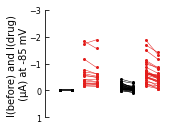

In [206]:
fig = plt.figure(figsize=(2.5, 1.8))  


ax1 = plt.subplot(1,1,1)

plot1 = [1,2]
plot2 = [3,4]
plot3 = [6,7]
plot4 = [8,9]
# plot5 = [9,10]

SizeOfMarker = 2

for i in range(len(df_newInuA["uninjected-NaGluIbu100"])):
    ax1.plot(plot1, [df_newInuA["uninjected-NaGluIbu100"][i], df_newInuA["uninjected+NaGluIbu100"][i]], c='k',marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine)

for i in range(len(df_newInuA["mg418mg012-NaGluIbu100"])):
    ax1.plot(plot2, [df_newInuA["mg418mg012-NaGluIbu100"][i], df_newInuA["mg418mg012+NaGluIbu100"][i]], c=(0.89, 0.11,0.10),marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine)

for i in range(len(df_newInuA["uninjected-NaGluIbu300"])):
    ax1.plot(plot3, [df_newInuA["uninjected-NaGluIbu300"][i], df_newInuA["uninjected+NaGluIbu300"][i]], c='k',marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine)

for i in range(len(df_newInuA["mg418mg012-NaGluIbu300"])):
    ax1.plot(plot4, [df_newInuA["mg418mg012-NaGluIbu300"][i], df_newInuA["mg418mg012+NaGluIbu300"][i]], c=(0.89, 0.11,0.10),marker = 'o',markersize=SizeOfMarker,linewidth=SizeofLine)



######


labelsIbu = ["Ibu", "Bmil","EIPA", "Phen", "Bzd",""]

ylimSetM4 = [0.5,-50]
ylimSetU8 = [0.1,-5]
ylimSetDT1 = [1,-3]
##### AXIS 1 ####
ax1.set_ylim(ylimSetDT1)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
# ax1.plot([-1,20], [0,0], 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='y', which='major', labelsize=10 )  
ax1.tick_params(axis='x', which='major', labelsize=10, length=0)  #0 set tick length to 0 and thus removes it 
# ax7.set_title('Amiloride Analogues',size=12)
# ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
ax1.set_xticks((plot1[0], plot2[0], plot3[0],plot4[0])) 
ax1.set_xticklabels(labelsAmil,rotation=30)
ax1.spines['bottom'].set_visible(False) 
ax1.xaxis.set_visible(False)
ax1.tick_params(axis='both', which='major', labelsize=AxisTickLabelSize) 
# ax1.set_yticks([0,-0.5,-1,-1.5,-2])
# #ax1.set_xlabel('V (mV)',fontsize=14)
# #ax1.set_ylabel('Change in current @-85 mV (I(drug) - I(before)',fontsize=14)
ax1.set_ylabel(axesText)
ax1.set_xlabel(axesText)

ax1.text(-2.4, -2.1, 'I(before) and I(drug)\n (µA) at -85 mV',fontsize=10,rotation=90,ha='center')

  
plt.gcf().subplots_adjust(bottom=0.05, left=0.3, right=None, top=None,hspace=None, wspace=0.5)     
        
# plt.show()

plt.savefig(filedirManuscript+"Fig2-Suppl-paired-Ibu"+'.pdf')
#plt.savefig(filedirManuscript+"Fig2-IbuorideAnalogs-pairedPoints"+'.eps')
#plt.savefig(filedirManuscript+"Fig2-IbuorideAnalogs-pairedPoints"+'.jpg')


### concatenate data Ibu higer concentrations

In [190]:
#concatenateData
I300Concat = pd.concat([IUninjIbu100.reset_index(drop=True),Img418Ibu100.reset_index(drop=True),IUninjIbu300.reset_index(drop=True),Img418Ibu300.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doin
I300ConcatuA = I300Concat.astype(float)*3000000
                                                         

multi_2group300 = dabest.load(I300ConcatuA, idx=(("Uij-Ibu","D-Ibu",), ("Uij-Ibu300", "D-Ibu300")))




In [191]:
multi_2group300.mean_diff

DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:46:08 2020.

The unpaired mean difference between Uij-Ibu and D-Ibu is 0.19 [95%CI 0.0767, 0.394].
The two-sided p-value of the Mann-Whitney test is 0.0229.

The unpaired mean difference between Uij-Ibu300 and D-Ibu300 is 0.322 [95%CI 0.216, 0.465].
The two-sided p-value of the Mann-Whitney test is 2.48e-06.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

In [192]:
colorsESTIbuhigher= [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29)]

<Figure size 252x216 with 0 Axes>

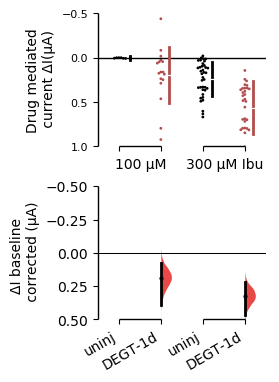

In [202]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(3.5, 3)) 
fig1= multi_2group300.mean_diff.plot(swarm_ylim=(1,-0.5), contrast_ylim=(0.5,-0.5), custom_palette=colorsESTIbuhigher,fig_size=(2.8, 4.5),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='ΔI baseline \n corrected (µA)',
                                    swarm_label='Drug mediated\n current ΔI(µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
#fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

labels = []#'0','100','0','100','0','100','0','100' 
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')

labels2 = ['uninj','DEGT-1d','uninj','DEGT-1d','DEGT-1d alone', 'MEC-2 alone',]
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')
fig1.axes[0].text(-0.1, 1.25, '100 µM ')
fig1.axes[0].text(1.6, 1.25, '300 µM Ibu')


plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.savefig(filedir+"Fig3-Suppl-Ibu100and300"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig3-Suppl-Ibu100and300"+'.pdf')




## higher Values before and after, not compared to uninjected

In [171]:
#### M2 and DEGT1 alone
UninjAmil100 = df[(df.Injection.isin(["uninjected"])) & (df.TestSol.isin(["NaGluAmil100"]))]
UninjAmil100BeforeAmil = UninjAmil100["MeanSTART"]
UninjAmil100BeforeAmil = UninjAmil100BeforeAmil.rename('Uninj-Amil')
A = UninjAmil100BeforeAmil

UninjAmil100 = df[(df.Injection.isin(["uninjected"])) & (df.TestSol.isin(["NaGluAmil100"]))]
UninjAmil100AfterAmil = UninjAmil100["MeanTEST"]
UninjAmil100AfterAmil = UninjAmil100AfterAmil.rename('Uninj+Amil')
B = UninjAmil100AfterAmil

UninjAmil300 = df[(df.Injection.isin(["uninjected"])) & (df.TestSol.isin(["NaGluAmil300"]))]
UninjAmil300BeforeAmil = UninjAmil300["MeanSTART"]
UninjAmil300BeforeAmil = UninjAmil300BeforeAmil.rename('Uninj-Amil300')
C = UninjAmil300BeforeAmil

UninjAmil300 = df[(df.Injection.isin(["uninjected"])) & (df.TestSol.isin(["NaGluAmil300"]))]
UninjAmil300AfterAmil = UninjAmil300["MeanTEST"]
UninjAmil300AfterAmil = UninjAmil300AfterAmil.rename('Uninj+Amil300')
D = UninjAmil300AfterAmil

##### higher doses DEGT-1
mg418Amil100 = df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGluAmil100"]))]
mg418Amil100BeforeAmil = mg418Amil100["MeanSTART"]
mg418Amil100BeforeAmil = mg418Amil100BeforeAmil.rename('mg418-Amil')
E = mg418Amil100BeforeAmil

mg418Amil100 = df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGluAmil100"]))]
mg418Amil100AfterAmil = mg418Amil100["MeanTEST"]
mg418Amil100AfterAmil = mg418Amil100AfterAmil.rename('mg418+Amil')
F = mg418Amil100AfterAmil

mg418Amil300 = df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGluAmil300"]))]
mg418Amil300BeforeAmil = mg418Amil300["MeanSTART"]
mg418Amil300BeforeAmil = mg418Amil300BeforeAmil.rename('mg418-Amil300')
G = mg418Amil300BeforeAmil

mg418Amil300 = df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGluAmil300"]))]
mg418Amil300AfterAmil = mg418Amil300["MeanTEST"]
mg418Amil300AfterAmil = mg418Amil300AfterAmil.rename('mg418+Amil300')
H = mg418Amil300AfterAmil


#concatenateData
ChangeConcatAmil = pd.concat([A.reset_index(drop=True),B.reset_index(drop=True),
                               C.reset_index(drop=True),D.reset_index(drop=True),
                                E.reset_index(drop=True),F.reset_index(drop=True),
                                G.reset_index(drop=True),H.reset_index(drop=True),
                              ],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doin
ChangeConcatuAAmil = ChangeConcatAmil.astype(float)*1000000
#print(ChangeConcatalone)
multi_2grouphigher = dabest.load(ChangeConcatuAAmil, idx=(('Uninj-Amil', 'Uninj+Amil',),
                                                           ('Uninj-Amil300', 'Uninj+Amil300',),
                                                           ('mg418-Amil', 'mg418+Amil',),
                                                           ('mg418-Amil300', 'mg418+Amil300',),
                                                          ))

                                


In [172]:
colorsESThigherAmil = [(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29)]


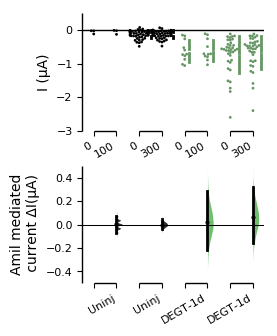

In [173]:
#plt.figure(figsize=(3.5, 3)) 
fig1= multi_2grouphigher.mean_diff.plot(swarm_ylim=(-3,0.5), contrast_ylim=(-0.5,0.5), fig_size=(2.8, 3.8),  raw_marker_size=(2),es_marker_size=2,contrast_label='Amil mediated\n current ΔI(µA)',
                                    swarm_label='I (µA)',custom_palette=colorsESThigherAmil, reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75})#,reflines_kwargs


fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,1], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))


labels = ['0','100','0','300','0','100','0','300']
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
# fig1.axes[0].text(0.13, -12.5, 'Ibu (µM)')
# fig1.axes[0].text(4.0, -12.5, 'Asp  (µM)')


labels2 = ['','Uninj','','Uninj','','DEGT-1d','','DEGT-1d']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')

#plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedirManuscript+"Fig3-supplement-AmilHigher"+'.pdf')


## higher values ibu 

In [174]:
#### M2 and DEGT1 alone
UninjIbu100 = df[(df.Injection.isin(["uninjected"])) & (df.TestSol.isin(["NaGluIbu100"]))]
UninjIbu100BeforeIbu = UninjIbu100["MeanSTART"]
UninjIbu100BeforeIbu = UninjIbu100BeforeIbu.rename('Uninj-Ibu')
A = UninjIbu100BeforeIbu

UninjIbu100 = df[(df.Injection.isin(["uninjected"])) & (df.TestSol.isin(["NaGluIbu100"]))]
UninjIbu100AfterIbu = UninjIbu100["MeanTEST"]
UninjIbu100AfterIbu = UninjIbu100AfterIbu.rename('Uninj+Ibu')
B = UninjIbu100AfterIbu

UninjIbu300 = df[(df.Injection.isin(["uninjected"])) & (df.TestSol.isin(["NaGluIbu300"]))]
UninjIbu300BeforeIbu = UninjIbu300["MeanSTART"]
UninjIbu300BeforeIbu = UninjIbu300BeforeIbu.rename('Uninj-Ibu300')
C = UninjIbu300BeforeIbu

UninjIbu300 = df[(df.Injection.isin(["uninjected"])) & (df.TestSol.isin(["NaGluIbu300"]))]
UninjIbu300AfterIbu = UninjIbu300["MeanTEST"]
UninjIbu300AfterIbu = UninjIbu300AfterIbu.rename('Uninj+Ibu300')
D = UninjIbu300AfterIbu

##### higher doses DEGT-1
mg418Ibu100 = df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGluIbu100"]))]
mg418Ibu100BeforeIbu = mg418Ibu100["MeanSTART"]
mg418Ibu100BeforeIbu = mg418Ibu100BeforeIbu.rename('mg418-Ibu')
E = mg418Ibu100BeforeIbu

mg418Ibu100 = df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGluIbu100"]))]
mg418Ibu100AfterIbu = mg418Ibu100["MeanTEST"]
mg418Ibu100AfterIbu = mg418Ibu100AfterIbu.rename('mg418+Ibu')
F = mg418Ibu100AfterIbu

mg418Ibu300 = df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGluIbu300"]))]
mg418Ibu300BeforeIbu = mg418Ibu300["MeanSTART"]
mg418Ibu300BeforeIbu = mg418Ibu300BeforeIbu.rename('mg418-Ibu300')
G = mg418Ibu300BeforeIbu

mg418Ibu300 = df[(df.Injection.isin(["mg418mg012"])) & (df.TestSol.isin(["NaGluIbu300"]))]
mg418Ibu300AfterIbu = mg418Ibu300["MeanTEST"]
mg418Ibu300AfterIbu = mg418Ibu300AfterIbu.rename('mg418+Ibu300')
H = mg418Ibu300AfterIbu



#concatenateData
ChangeConcatIbu = pd.concat([A.reset_index(drop=True),B.reset_index(drop=True),
                               C.reset_index(drop=True),D.reset_index(drop=True),
                                E.reset_index(drop=True),F.reset_index(drop=True),
                                G.reset_index(drop=True),H.reset_index(drop=True),
                              ],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doin
ChangeConcatuAIbu = ChangeConcatIbu.astype(float)*1000000
#print(ChangeConcatalone)
multi_2grouphigherIbu = dabest.load(ChangeConcatuAIbu, idx=(('Uninj-Ibu', 'Uninj+Ibu',),
                                                           ('Uninj-Ibu300', 'Uninj+Ibu300',),
                                                           ('mg418-Ibu', 'mg418+Ibu',),
                                                           ('mg418-Ibu300', 'mg418+Ibu300',),
                                                          ))

                                


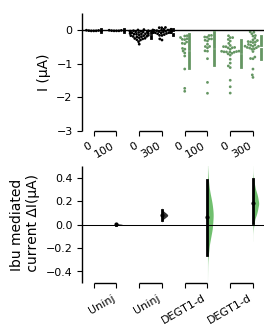

In [175]:
#plt.figure(figsize=(3.5, 3)) 
fig1= multi_2grouphigherIbu.mean_diff.plot(swarm_ylim=(-3,0.5), contrast_ylim=(-0.5,0.5),fig_size=(2.8, 3.8),  raw_marker_size=(2),es_marker_size=2,contrast_label='Ibu mediated\n current ΔI(µA)',
                                    swarm_label='I (µA)',custom_palette=colorsESThigherAmil, reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75})#,reflines_kwargs


fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,1], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))


labels = ['0','100','0','300','0','100','0','300']
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
# fig1.axes[0].text(0.13, -12.5, 'Ibu (µM)')
# fig1.axes[0].text(4.0, -12.5, 'Asp  (µM)')


labels2 = ['','Uninj','','Uninj','','DEGT1-d','','DEGT1-d']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')

#plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedirManuscript+"Fig3-supplement-higherIbu"+'.pdf')

## MEC-2 and DEGT-1d alone wirh 300 uM Amiloride

In [176]:

#### M2 and DEGT1 alone
mg012aloneAmil = df[(df.Injection.isin(["mg012"])) & (df.TestSol.isin(["NaGluAmil300"]))]
mg012aloneBeforeAmil = mg012aloneAmil["MeanSTART"]
mg012aloneBeforeAmil =mg012aloneBeforeAmil.rename('M2-Amil')


mg012aloneAmil = df[(df.Injection.isin(["mg012"])) & (df.TestSol.isin(["NaGluAmil300"]))]
mg012aloneAfterAmil = mg012aloneAmil["MeanTEST"]
mg012aloneAfterAmil =mg012aloneAfterAmil.rename('M2+Amil')


mg418aloneAmil = df[(df.Injection.isin(["mg418"])) & (df.TestSol.isin(["NaGluAmil300"]))]
mg418aloneBeforeAmil = mg418aloneAmil["MeanSTART"]
mg418aloneBeforeAmil =mg418aloneBeforeAmil.rename('DT1d-Amil')


mg418aloneAmil = df[(df.Injection.isin(["mg418"])) & (df.TestSol.isin(["NaGluAmil300"]))]
mg418aloneAfterAmil = mg418aloneAmil["MeanTEST"]
mg418aloneAfterAmil =mg418aloneAfterAmil.rename('DT1d+Amil')

#concatenateData
ChangeConcatalone = pd.concat([mg012aloneBeforeAmil.reset_index(drop=True),mg012aloneAfterAmil.reset_index(drop=True),mg418aloneBeforeAmil.reset_index(drop=True),mg418aloneAfterAmil.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doin
ChangeConcatuAalone = ChangeConcatalone.astype(float)*1000000

multi_2group300alone = dabest.load(ChangeConcatuAalone, idx=(("M2-Amil", "M2+Amil",), ("DT1d-Amil", "DT1d+Amil",)))

                                


In [177]:
multi_2group300alone.mean_diff

DABEST v0.2.4
             
Good evening!
The current time is Wed Dec  2 20:43:10 2020.

The unpaired mean difference between M2-Amil and M2+Amil is -0.00708 [95%CI -0.0463, 0.0298].
The two-sided p-value of the Mann-Whitney test is 0.743.

The unpaired mean difference between DT1d-Amil and DT1d+Amil is 0.0285 [95%CI -0.17, 0.222].
The two-sided p-value of the Mann-Whitney test is 0.648.

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

In [178]:
colorsESTalone = [(0.00, 0.00, 0.00),(0.00, 0.00, 0.00),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29)]

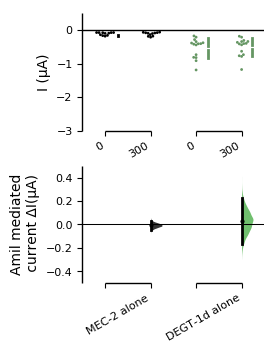

In [179]:
#plt.figure(figsize=(3.5, 3)) 
fig1= multi_2group300alone.mean_diff.plot(swarm_ylim=(-3,0.5), contrast_ylim=(-0.5,0.5),fig_size=(2.8, 3.8),  raw_marker_size=(2),es_marker_size=2,contrast_label='Amil mediated\n current ΔI(µA)',
                                    swarm_label='I (µA)',custom_palette=colorsESTalone, reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75})#,reflines_kwargs


fig1.axes[0].plot([-1,20], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,1], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))


labels = ['0','300','0','300']
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
# fig1.axes[0].text(0.13, -12.5, 'Ibu (µM)')
# fig1.axes[0].text(4.0, -12.5, 'Asp  (µM)')


labels2 = ['','MEC-2 alone','','DEGT-1d alone']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')

#plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedirManuscript+"Fig3-supplement-M2-DT1alone"+'.pdf')

# 100 uM DEGT-1

In [ ]:
Amil100 = df[(df.Injection.isin(["mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluAmil100"]))]
Bmil100 = df[(df.Injection.isin(["mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluBmil100",]))]
Ibu100 = df[(df.Injection.isin(["mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluIbu100"]))]
EIPA100 = df[(df.Injection.isin(["mg418mg012","uninjected"])) & (df.TestSol.isin(["NaGluEipa100"]))]


Img418Amil100 = Amil100.loc[Amil100['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Amil100.columns = ['D-Amil']

Img418Bmil100 = Bmil100.loc[Bmil100['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Bmil100.columns = ['D-Bmil']

Img418EIPA100 = EIPA100.loc[EIPA100['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418EIPA100.columns = ['D-Eipa']

Img418Ibu100 = Ibu100.loc[Ibu100['Injection'] == 'mg418mg012',['DELTA']] #returns a data frame 
Img418Ibu100.columns = ['D-Ibu']

IUninjAmil100 = Amil100.loc[Amil100['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjAmil100.columns = ['Uij-Amil']

IUninjBmil100 = Bmil100.loc[Bmil100['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjBmil100.columns = ['Uij-Bmil']

IUninjIbu100 = Ibu100.loc[Ibu100['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjIbu100.columns = ['Uij-Ibu']

IUninjEIPA100 = EIPA100.loc[EIPA100['Injection'] == 'uninjected',['DELTA']] #returns a data frame 
IUninjEIPA100.columns = ['Uij-Eipa']

#concatenateData
#I100Concat = pd.concat([Img418Amil100.reset_index(drop=True),Img418Bmil100.reset_index(drop=True),Img418Ibu100.reset_index(drop=True),IUninjAmil100.reset_index(drop=True),IUninjBmil100.reset_index(drop=True),IUninjIbu100.reset_index(drop=True)],sort=False, axis=1)
I100Concat = pd.concat([Img418Amil100.reset_index(drop=True),Img418Bmil100.reset_index(drop=True),Img418EIPA100.reset_index(drop=True),Img418Ibu100.reset_index(drop=True),IUninjAmil100.reset_index(drop=True),IUninjBmil100.reset_index(drop=True),IUninjBmil100.reset_index(drop=True),IUninjIbu100.reset_index(drop=True),IUninjEIPA100.reset_index(drop=True)],sort=False, axis=1)
#sort=False removed the warning, but no idea what its doin
I100ConcatuA = I100Concat.astype(float)*1000000

#load Data
#shared_controlI100Concat = dabest.load(I100ConcatuA,idx=("Uij-Amil", "D-Amil")
#shared_control = dabest.load(I100ConcatuA, idx=("Uij-Amil","D-Amil","Uij-Bmil","D-Bmil",'Uij-Ibu','D-Ibu'))
                                                           
#shared_controltest = dabest.load(I100ConcatuA, idx=(("Uij-Amil", "D-Amil",),("Uij-Bmil", "D-Bmil",), ("Uij-Ibu", "D-Ibu")))
multi_2group100 = dabest.load(I100ConcatuA, idx=(("Uij-Amil", "D-Amil",),("Uij-Bmil", "D-Bmil",), ("Uij-Eipa", "D-Eipa",), ("Uij-Ibu", "D-Ibu",)))

                                



In [ ]:
#change figure!!!!
#fig1 = plt.figure(figsize=(3.5, 3)) 
#ax1 = plt.subplot(1,1,1)
plt.figure(figsize=(2.5, 3)) 
fig1= multi_2group100.mean_diff.plot(swarm_ylim=(-0.4,0.4), contrast_ylim=(-0.4,0.4), custom_palette=colors,fig_size=(6, 4),
                                     raw_marker_size=(2),es_marker_size=2,contrast_label='I-I(Uninj) (µA)',
                                    swarm_label='I  (µA)',reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75,
                                   'color':'red'})#,reflines_kwargs
#fig1.axes[0].ylabel('Current @-85 mV (µA)', fontsize=14) ‘color’ : ‘linestyle’:’dashed’}
#ax1.spines['left'].set_position(('outward',15))  

fig1.axes[0].plot([-1,30], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,20], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))

#plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.savefig(filedir+"Fig4-EstStat-higherDosis"+'.pdf')
#plt.savefig(filedir+"Fig1-NaGlu-MeanStart"+'.eps')
plt.savefig(filedirManuscript+"Fig4-EstStat-higherDosis100"+'.pdf')




In [ ]:
multi_2group100.mean_diff

# AMILORIDE

introduce an order .... MAYBE 


# RATIO DATA AMILORIDE

In [ ]:
#
Drug= 'Amiloride'
#How to plot all data from Amiloride .... rearrange daa
#Amiloride
fig = plt.figure(figsize=(20, 7)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax4 = plt.subplot(2,3,4)
ax5 = plt.subplot(2,3,5)
ax6 = plt.subplot(2,3,6)

#sort data for amiloride!!!!
#Plot1
AmilAll30 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaGluAmil30"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#PLot2
AmilAll100 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaGluAmil100"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#PLot3
AmilAll300 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaGluAmil300"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!

#Amiloride Multiples
#Plot4
MultiAmilAll30 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaGluAmil30"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#Plot5
MultiAmilAll100 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaGluAmil100"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#Plot6
MultiAmilAll300 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaGluAmil300"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!


##################### No NEED TO CHANGE BELOW ####
#ax2 = s
#ax2 = sns.boxplot(x = AmilAll['Injection'], y = AmilAll['RATIO']-1 , data = DT1A813T, palette=sns.color_palette(colors))
#,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"]

#plot 30 uM Amil
sns.swarmplot(x = AmilAll30['Injection'], y = AmilAll30['RATIO']-1 , data = AmilAll30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax1, order=np.unique(AmilAll30['Injection']))
sns.boxplot(x = AmilAll30['Injection'], y = AmilAll30['RATIO']-1 , data = AmilAll30, palette=sns.color_palette(colors),ax=ax1,order=np.unique(AmilAll30['Injection']))

#plot 100 uM
sns.swarmplot(x = AmilAll100['Injection'], y = AmilAll100['RATIO']-1 , data = AmilAll100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax2,order=np.unique(AmilAll100['Injection']))
sns.boxplot(x = AmilAll100['Injection'], y = AmilAll100['RATIO']-1 , data = AmilAll100, palette=sns.color_palette(colors),ax=ax2,order=np.unique(AmilAll100['Injection']))

#plot 300 uM
sns.swarmplot(x = AmilAll300['Injection'], y = AmilAll300['RATIO']-1 , data = AmilAll300,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax3,order=np.unique(AmilAll300['Injection']))
sns.boxplot(x = AmilAll300['Injection'], y = AmilAll300['RATIO']-1 , data = AmilAll300, palette=sns.color_palette(colors),ax=ax3,order=np.unique(AmilAll300['Injection']))


######## Multiple ######
#plot 30 uM Amil  # does not exist
#sns.swarmplot(x = MultiAmilAll30['Injection'], y = MultiAmilAll30['RATIO']-1 , data = MultiAmilAll30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax4)
#sns.boxplot(x = MultiAmilAll30['Injection'], y = MultiAmilAll30['RATIO']-1 , data = MultiAmilAll30, palette=sns.color_palette(colors),ax=ax4)

#plot 100 uM # does not exist
#sns.swarmplot(x = AmilAll100['Injection'], y = AmilAll100['RATIO']-1 , data = AmilAll100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax5)
#sns.boxplot(x = AmilAll100['Injection'], y = AmilAll100['RATIO']-1 , data = AmilAll100, palette=sns.color_palette(colors),ax=ax5)

#plot 300 uM
sns.swarmplot(x = MultiAmilAll300 ['Injection'], y = MultiAmilAll300 ['RATIO']-1 , data = MultiAmilAll300 ,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax6,order=np.unique(MultiAmilAll300['Injection']))
sns.boxplot(x = MultiAmilAll300 ['Injection'], y = MultiAmilAll300 ['RATIO']-1 , data = MultiAmilAll300 , palette=sns.color_palette(colors),ax=ax6, order=np.unique(MultiAmilAll300['Injection']))


##### AXIS 1 ####
ax1.set_ylim([-1, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title('30 uM Amiloride',size=18)
ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)

##### AXIS 2####
ax2.set_ylim([-1, 1])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=16)  
ax2.set_title('100 uM Amiloride',size=18)
ax2.set_xticklabels(np.unique(AmilAll100['Injection']),rotation=30)


##### AXIS 3####
ax3.set_ylim([-1, 1])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=16)  
ax3.set_title('300 uM Amiloride',size=18)
ax3.set_xticklabels(np.unique(AmilAll300['Injection']),rotation=30)

##### AXIS 6####
ax6.set_ylim([-1, 1])
ax6.spines['right'].set_visible(False)                                  # no spine at the right
ax6.spines['top'].set_visible(False)                                     # no spine at the top
ax6.yaxis.set_ticks_position('left')                                     # ticks at the left
ax6.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax6.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax6.spines['bottom'].set_position(('outward',10))  
ax6.spines['top'].set_position(('axes',5)) 
ax6.get_yaxis().set_tick_params(direction='in')
ax6.get_xaxis().set_tick_params(direction='in')
ax6.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax6.tick_params(axis='both', which='major', labelsize=16)  
ax6.set_title('300 uM Amiloride',size=18)
ax6.set_xticklabels(np.unique(MultiAmilAll300['Injection']),rotation=30)

#plt.ylim(-1, 1)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.75, wspace=0.3)
#plt.subplots_adjust(left=0.1, right=2, top=1, bottom=0.1)
#ax1.plt.ylim([-1, +1]) 
#plt.ylabel('RATIO (I-I0/I0)', fontsize=18)  
#plt.savefig(filedir+'AmilAll-Ratio'+'.eps')  
#plt.suptitle('Amiloride 30 uM doses RATIO ', fontsize=16)
plt.savefig(filedir+Drug+"-RATIO"+'.eps')

plt.show()  # displays the plot


# DELTA Values Amiloride 

In [ ]:
#Delta
Drug = 'Amiloride'

#sort data for amiloride!!!!
#Plot1
AmilAll30 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaGluAmil30"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#PLot2
AmilAll100 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaGluAmil100"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#PLot3
AmilAll300 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaGluAmil300"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!

#Amiloride Multiples
#Plot4
MultiAmilAll30 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaGluAmil30"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#Plot5
MultiAmilAll100 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaGluAmil100"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#Plot6
MultiAmilAll300 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaGluAmil300"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!


##################### No NEED TO CHANGE BELOW ####
fig = plt.figure(figsize=(20, 7)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax4 = plt.subplot(2,3,4)
ax5 = plt.subplot(2,3,5)
ax6 = plt.subplot(2,3,6)

#ax2 = s
#ax2 = sns.boxplot(x = AmilAll['Injection'], y = AmilAll['RATIO']-1 , data = DT1A813T, palette=sns.color_palette(colors))
#,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"]

#plot 30 uM Amil
sns.swarmplot(x = AmilAll30['Injection'], y = AmilAll30['DELTA']*1000000*-1 , data = AmilAll30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax1, order=np.unique(AmilAll30['Injection']))
sns.boxplot(x = AmilAll30['Injection'], y = AmilAll30['DELTA']*1000000*-1 , data = AmilAll30, palette=sns.color_palette(colors),ax=ax1,order=np.unique(AmilAll30['Injection']))

#plot 100 uM
sns.swarmplot(x = AmilAll100['Injection'], y = AmilAll100['DELTA']*1000000*-1 , data = AmilAll100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax2,order=np.unique(AmilAll100['Injection']))
sns.boxplot(x = AmilAll100['Injection'], y = AmilAll100['DELTA']*1000000*-1 , data = AmilAll100, palette=sns.color_palette(colors),ax=ax2,order=np.unique(AmilAll100['Injection']))

#plot 300 uM
sns.swarmplot(x = AmilAll300['Injection'], y = AmilAll300['DELTA']*1000000*-1 , data = AmilAll300,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax3,order=np.unique(AmilAll300['Injection']))
sns.boxplot(x = AmilAll300['Injection'], y = AmilAll300['DELTA']*1000000*-1 , data = AmilAll300, palette=sns.color_palette(colors),ax=ax3,order=np.unique(AmilAll300['Injection']))


######## Multiple ######
#plot 30 uM Amil  # does not exist
#sns.swarmplot(x = MultiAmilAll30['Injection'], y = MultiAmilAll30['RATIO']-1 , data = MultiAmilAll30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax4)
#sns.boxplot(x = MultiAmilAll30['Injection'], y = MultiAmilAll30['RATIO']-1 , data = MultiAmilAll30, palette=sns.color_palette(colors),ax=ax4)

#plot 100 uM # does not exist
#sns.swarmplot(x = AmilAll100['Injection'], y = AmilAll100['RATIO']-1 , data = AmilAll100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax5)
#sns.boxplot(x = AmilAll100['Injection'], y = AmilAll100['RATIO']-1 , data = AmilAll100, palette=sns.color_palette(colors),ax=ax5)

#plot 300 uM
sns.swarmplot(x = MultiAmilAll300 ['Injection'], y = MultiAmilAll300 ['DELTA']*1000000*-1 , data = MultiAmilAll300 ,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax6,order=np.unique(MultiAmilAll300['Injection']))
sns.boxplot(x = MultiAmilAll300 ['Injection'], y = MultiAmilAll300 ['DELTA']*1000000*-1, data = MultiAmilAll300 , palette=sns.color_palette(colors),ax=ax6, order=np.unique(MultiAmilAll300['Injection']))


##### AXIS 1 ####
#ax1.set_ylim([-1, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title('30 uM '+ Drug,size=18)
ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)

##### AXIS 2####
#ax2.set_ylim([-1, 1])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=16)  
ax2.set_title('100 uM '+ Drug,size=18)
ax2.set_xticklabels(np.unique(AmilAll100['Injection']),rotation=30)


##### AXIS 3####
#ax3.set_ylim([-1, 1])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=16)  
ax3.set_title('300 uM '+ Drug,size=18)
ax3.set_xticklabels(np.unique(AmilAll300['Injection']),rotation=30)

##### AXIS 6####
#ax6.set_ylim([-1, 1])
ax6.spines['right'].set_visible(False)                                  # no spine at the right
ax6.spines['top'].set_visible(False)                                     # no spine at the top
ax6.yaxis.set_ticks_position('left')                                     # ticks at the left
ax6.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax6.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax6.spines['bottom'].set_position(('outward',10))  
ax6.spines['top'].set_position(('axes',5)) 
ax6.get_yaxis().set_tick_params(direction='in')
ax6.get_xaxis().set_tick_params(direction='in')
ax6.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax6.tick_params(axis='both', which='major', labelsize=16)  
ax6.set_title('300 uM '+ Drug,size=18)
ax6.set_xticklabels(np.unique(MultiAmilAll300['Injection']),rotation=30)

#plt.ylim(-1, 1)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.75, wspace=0.3)
#plt.subplots_adjust(left=0.1, right=2, top=1, bottom=0.1)
#ax1.plt.ylim([-1, +1]) 
#plt.ylabel('RATIO (I-I0/I0)', fontsize=18)  
#plt.savefig(filedir+'AmilAll-Ratio'+'.eps')  
#plt.suptitle('Amiloride 30 uM doses RATIO ', fontsize=16)
plt.savefig(filedir+Drug+"-DELTA"+'.eps')
plt.show()  # displays the plot


# IBUPROFEN 

# RATIO DATA IBUPROFEN

In [ ]:
#Ratio Ibuprofen
Drug = 'Ibuprofen'
#

#sort data for amiloride!!!!
#Plot1
AmilAll30 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaGluIbu30"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#PLot2
AmilAll100 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaGluIbu100"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#PLot3
AmilAll300 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaGluIbu300"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!

#Amiloride Multiples
#Plot4
MultiAmilAll30 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaGluIbu30"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#Plot5
MultiAmilAll100 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaGluIbu100"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#Plot6
MultiAmilAll300 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaGluIbu300"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!


##################### No NEED TO CHANGE BELOW ####
fig = plt.figure(figsize=(20, 7)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax4 = plt.subplot(2,3,4)
ax5 = plt.subplot(2,3,5)
ax6 = plt.subplot(2,3,6)

#ax2 = s
#ax2 = sns.boxplot(x = AmilAll['Injection'], y = AmilAll['RATIO']-1 , data = DT1A813T, palette=sns.color_palette(colors))
#,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"]

#plot 30 uM Amil
sns.swarmplot(x = AmilAll30['Injection'], y = AmilAll30['RATIO']-1 , data = AmilAll30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax1, order=np.unique(AmilAll30['Injection']))
sns.boxplot(x = AmilAll30['Injection'], y = AmilAll30['RATIO']-1 , data = AmilAll30, palette=sns.color_palette(colors),ax=ax1,order=np.unique(AmilAll30['Injection']))

#plot 100 uM
sns.swarmplot(x = AmilAll100['Injection'], y = AmilAll100['RATIO']-1 , data = AmilAll100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax2,order=np.unique(AmilAll100['Injection']))
sns.boxplot(x = AmilAll100['Injection'], y = AmilAll100['RATIO']-1 , data = AmilAll100, palette=sns.color_palette(colors),ax=ax2,order=np.unique(AmilAll100['Injection']))

#plot 300 uM
sns.swarmplot(x = AmilAll300['Injection'], y = AmilAll300['RATIO']-1 , data = AmilAll300,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax3,order=np.unique(AmilAll300['Injection']))
sns.boxplot(x = AmilAll300['Injection'], y = AmilAll300['RATIO']-1 , data = AmilAll300, palette=sns.color_palette(colors),ax=ax3,order=np.unique(AmilAll300['Injection']))


######## Multiple ######
#plot 30 uM Amil  # does not exist
#sns.swarmplot(x = MultiAmilAll30['Injection'], y = MultiAmilAll30['RATIO']-1 , data = MultiAmilAll30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax4)
#sns.boxplot(x = MultiAmilAll30['Injection'], y = MultiAmilAll30['RATIO']-1 , data = MultiAmilAll30, palette=sns.color_palette(colors),ax=ax4)

#plot 100 uM # does not exist
#sns.swarmplot(x = AmilAll100['Injection'], y = AmilAll100['RATIO']-1 , data = AmilAll100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax5)
#sns.boxplot(x = AmilAll100['Injection'], y = AmilAll100['RATIO']-1 , data = AmilAll100, palette=sns.color_palette(colors),ax=ax5)

#plot 300 uM
sns.swarmplot(x = MultiAmilAll300 ['Injection'], y = MultiAmilAll300 ['RATIO']-1 , data = MultiAmilAll300 ,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax6,order=np.unique(MultiAmilAll300['Injection']))
sns.boxplot(x = MultiAmilAll300 ['Injection'], y = MultiAmilAll300 ['RATIO']-1 , data = MultiAmilAll300 , palette=sns.color_palette(colors),ax=ax6, order=np.unique(MultiAmilAll300['Injection']))


##### AXIS 1 ####
ax1.set_ylim([-1, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title('30 uM '+ Drug,size=18)
ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)

##### AXIS 2####
ax2.set_ylim([-1, 1])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=16)  
ax2.set_title('100 uM '+ Drug,size=18)
ax2.set_xticklabels(np.unique(AmilAll100['Injection']),rotation=30)


##### AXIS 3####
ax3.set_ylim([-1, 1])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=16)  
ax3.set_title('300 uM '+ Drug,size=18)
ax3.set_xticklabels(np.unique(AmilAll300['Injection']),rotation=30)

##### AXIS 6####
ax6.set_ylim([-1, 1])
ax6.spines['right'].set_visible(False)                                  # no spine at the right
ax6.spines['top'].set_visible(False)                                     # no spine at the top
ax6.yaxis.set_ticks_position('left')                                     # ticks at the left
ax6.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax6.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax6.spines['bottom'].set_position(('outward',10))  
ax6.spines['top'].set_position(('axes',5)) 
ax6.get_yaxis().set_tick_params(direction='in')
ax6.get_xaxis().set_tick_params(direction='in')
ax6.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax6.tick_params(axis='both', which='major', labelsize=16)  
ax6.set_title('300 uM '+ Drug,size=18)
ax6.set_xticklabels(np.unique(MultiAmilAll300['Injection']),rotation=30)

#plt.ylim(-1, 1)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.75, wspace=0.3)
#plt.subplots_adjust(left=0.1, right=2, top=1, bottom=0.1)
#ax1.plt.ylim([-1, +1]) 
#plt.ylabel('RATIO (I-I0/I0)', fontsize=18)  
#plt.savefig(filedir+'AmilAll-Ratio'+'.eps')  
#plt.suptitle('Amiloride 30 uM doses RATIO ', fontsize=16)
plt.savefig(filedir+Drug+"-RATIO"+'.eps')
plt.show()  # displays the plot


In [ ]:
#Delta
Drug = 'Ibuprofen'

#sort data for amiloride!!!!
#Plot1
AmilAll30 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaGluIbu30"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#PLot2
AmilAll100 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaGluIbu100"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#PLot3
AmilAll300 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaGluIbu300"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!

#Amiloride Multiples
#Plot4
MultiAmilAll30 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaGluIbu30"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#Plot5
MultiAmilAll100 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaGluIbu100"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#Plot6
MultiAmilAll300 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaGluIbu300"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!


##################### No NEED TO CHANGE BELOW ####
fig = plt.figure(figsize=(20, 7)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax4 = plt.subplot(2,3,4)
ax5 = plt.subplot(2,3,5)
ax6 = plt.subplot(2,3,6)

#ax2 = s
#ax2 = sns.boxplot(x = AmilAll['Injection'], y = AmilAll['RATIO']-1 , data = DT1A813T, palette=sns.color_palette(colors))
#,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"]

#plot 30 uM Amil
sns.swarmplot(x = AmilAll30['Injection'], y = AmilAll30['DELTA']*1000000*-1 , data = AmilAll30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax1, order=np.unique(AmilAll30['Injection']))
sns.boxplot(x = AmilAll30['Injection'], y = AmilAll30['DELTA']*1000000*-1 , data = AmilAll30, palette=sns.color_palette(colors),ax=ax1,order=np.unique(AmilAll30['Injection']))

#plot 100 uM
sns.swarmplot(x = AmilAll100['Injection'], y = AmilAll100['DELTA']*1000000*-1 , data = AmilAll100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax2,order=np.unique(AmilAll100['Injection']))
sns.boxplot(x = AmilAll100['Injection'], y = AmilAll100['DELTA']*1000000*-1 , data = AmilAll100, palette=sns.color_palette(colors),ax=ax2,order=np.unique(AmilAll100['Injection']))

#plot 300 uM
sns.swarmplot(x = AmilAll300['Injection'], y = AmilAll300['DELTA']*1000000*-1 , data = AmilAll300,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax3,order=np.unique(AmilAll300['Injection']))
sns.boxplot(x = AmilAll300['Injection'], y = AmilAll300['DELTA']*1000000*-1 , data = AmilAll300, palette=sns.color_palette(colors),ax=ax3,order=np.unique(AmilAll300['Injection']))


######## Multiple ######
#plot 30 uM Amil  # does not exist
#sns.swarmplot(x = MultiAmilAll30['Injection'], y = MultiAmilAll30['RATIO']-1 , data = MultiAmilAll30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax4)
#sns.boxplot(x = MultiAmilAll30['Injection'], y = MultiAmilAll30['RATIO']-1 , data = MultiAmilAll30, palette=sns.color_palette(colors),ax=ax4)

#plot 100 uM # does not exist
#sns.swarmplot(x = AmilAll100['Injection'], y = AmilAll100['RATIO']-1 , data = AmilAll100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax5)
#sns.boxplot(x = AmilAll100['Injection'], y = AmilAll100['RATIO']-1 , data = AmilAll100, palette=sns.color_palette(colors),ax=ax5)

#plot 300 uM
sns.swarmplot(x = MultiAmilAll300 ['Injection'], y = MultiAmilAll300 ['DELTA']*1000000*-1 , data = MultiAmilAll300 ,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax6,order=np.unique(MultiAmilAll300['Injection']))
sns.boxplot(x = MultiAmilAll300 ['Injection'], y = MultiAmilAll300 ['DELTA']*1000000*-1, data = MultiAmilAll300 , palette=sns.color_palette(colors),ax=ax6, order=np.unique(MultiAmilAll300['Injection']))


##### AXIS 1 ####
#ax1.set_ylim([-1, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title('30 uM '+ Drug,size=18)
ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)

##### AXIS 2####
#ax2.set_ylim([-1, 1])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=16)  
ax2.set_title('100 uM '+ Drug,size=18)
ax2.set_xticklabels(np.unique(AmilAll100['Injection']),rotation=30)


##### AXIS 3####
#ax3.set_ylim([-1, 1])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=16)  
ax3.set_title('300 uM '+ Drug,size=18)
ax3.set_xticklabels(np.unique(AmilAll300['Injection']),rotation=30)

##### AXIS 6####
#ax6.set_ylim([-1, 1])
ax6.spines['right'].set_visible(False)                                  # no spine at the right
ax6.spines['top'].set_visible(False)                                     # no spine at the top
ax6.yaxis.set_ticks_position('left')                                     # ticks at the left
ax6.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax6.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax6.spines['bottom'].set_position(('outward',10))  
ax6.spines['top'].set_position(('axes',5)) 
ax6.get_yaxis().set_tick_params(direction='in')
ax6.get_xaxis().set_tick_params(direction='in')
ax6.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax6.tick_params(axis='both', which='major', labelsize=16)  
ax6.set_title('300 uM '+ Drug,size=18)
ax6.set_xticklabels(np.unique(MultiAmilAll300['Injection']),rotation=30)

#plt.ylim(-1, 1)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.75, wspace=0.3)
#plt.subplots_adjust(left=0.1, right=2, top=1, bottom=0.1)
#ax1.plt.ylim([-1, +1]) 
#plt.ylabel('RATIO (I-I0/I0)', fontsize=18)  
#plt.savefig(filedir+'AmilAll-Ratio'+'.eps')  
#plt.suptitle('Amiloride 30 uM doses RATIO ', fontsize=16)
plt.savefig(filedir+Drug+"-DELTA"+'.eps')
plt.show()  # displays the plot


# Benzamil

# RATIO Benzamil

In [ ]:
#Ratio 
Drug = 'Benzamil'

#sort data for Drug!!!!
#Plot1
AmilAll30 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaGluBmil30"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#PLot2
AmilAll100 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaGluBmil100"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#PLot3
AmilAll300 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaGluBmil300"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!

#Amiloride Multiples
#Plot4
MultiAmilAll30 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaGluBmil30"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#Plot5
MultiAmilAll100 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaGluBmil100"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#Plot6
MultiAmilAll300 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaGluBmil300"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!


##################### No NEED TO CHANGE BELOW ####
fig = plt.figure(figsize=(20, 7)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax4 = plt.subplot(2,3,4)
ax5 = plt.subplot(2,3,5)
ax6 = plt.subplot(2,3,6)

#plot 30 uM Amil
sns.swarmplot(x = AmilAll30['Injection'], y = AmilAll30['RATIO']-1 , data = AmilAll30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax1, order=np.unique(AmilAll30['Injection']))
sns.boxplot(x = AmilAll30['Injection'], y = AmilAll30['RATIO']-1 , data = AmilAll30, palette=sns.color_palette(colors),ax=ax1,order=np.unique(AmilAll30['Injection']))

#plot 100 uM
sns.swarmplot(x = AmilAll100['Injection'], y = AmilAll100['RATIO']-1 , data = AmilAll100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax2,order=np.unique(AmilAll100['Injection']))
sns.boxplot(x = AmilAll100['Injection'], y = AmilAll100['RATIO']-1 , data = AmilAll100, palette=sns.color_palette(colors),ax=ax2,order=np.unique(AmilAll100['Injection']))

#plot 300 uM
sns.swarmplot(x = AmilAll300['Injection'], y = AmilAll300['RATIO']-1 , data = AmilAll300,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax3,order=np.unique(AmilAll300['Injection']))
sns.boxplot(x = AmilAll300['Injection'], y = AmilAll300['RATIO']-1 , data = AmilAll300, palette=sns.color_palette(colors),ax=ax3,order=np.unique(AmilAll300['Injection']))


######## Multiple ######
#plot 30 uM Amil  # does not exist
#sns.swarmplot(x = MultiAmilAll30['Injection'], y = MultiAmilAll30['RATIO']-1 , data = MultiAmilAll30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax4)
#sns.boxplot(x = MultiAmilAll30['Injection'], y = MultiAmilAll30['RATIO']-1 , data = MultiAmilAll30, palette=sns.color_palette(colors),ax=ax4)

#plot 100 uM # does not exist
#sns.swarmplot(x = AmilAll100['Injection'], y = AmilAll100['RATIO']-1 , data = AmilAll100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax5)
#sns.boxplot(x = AmilAll100['Injection'], y = AmilAll100['RATIO']-1 , data = AmilAll100, palette=sns.color_palette(colors),ax=ax5)

#plot 300 uM
#sns.swarmplot(x = MultiAmilAll300 ['Injection'], y = MultiAmilAll300 ['RATIO']-1 , data = MultiAmilAll300 ,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax6,order=np.unique(MultiAmilAll300['Injection']))
#sns.boxplot(x = MultiAmilAll300 ['Injection'], y = MultiAmilAll300 ['RATIO']-1 , data = MultiAmilAll300 , palette=sns.color_palette(colors),ax=ax6, order=np.unique(MultiAmilAll300['Injection']))


##### AXIS 1 ####
ax1.set_ylim([-1, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title('30 uM '+ Drug,size=18)
ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)

##### AXIS 2####
ax2.set_ylim([-1, 1])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=16)  
ax2.set_title('100 uM '+ Drug,size=18)
ax2.set_xticklabels(np.unique(AmilAll100['Injection']),rotation=30)


##### AXIS 3####
ax3.set_ylim([-1, 1])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=16)  
ax3.set_title('300 uM '+ Drug,size=18)
ax3.set_xticklabels(np.unique(AmilAll300['Injection']),rotation=30)

##### AXIS 6####
ax6.set_ylim([-1, 1])
ax6.spines['right'].set_visible(False)                                  # no spine at the right
ax6.spines['top'].set_visible(False)                                     # no spine at the top
ax6.yaxis.set_ticks_position('left')                                     # ticks at the left
ax6.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax6.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax6.spines['bottom'].set_position(('outward',10))  
ax6.spines['top'].set_position(('axes',5)) 
ax6.get_yaxis().set_tick_params(direction='in')
ax6.get_xaxis().set_tick_params(direction='in')
ax6.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax6.tick_params(axis='both', which='major', labelsize=16)  
ax6.set_title('300 uM '+ Drug,size=18)
ax6.set_xticklabels(np.unique(MultiAmilAll300['Injection']),rotation=30)

#plt.ylim(-1, 1)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.75, wspace=0.3)
#plt.subplots_adjust(left=0.1, right=2, top=1, bottom=0.1)
#ax1.plt.ylim([-1, +1]) 
#plt.ylabel('RATIO (I-I0/I0)', fontsize=18)  
#plt.savefig(filedir+'AmilAll-Ratio'+'.eps')  
#plt.suptitle('Amiloride 30 uM doses RATIO ', fontsize=16)
plt.savefig(filedir+Drug+"-RATIO"+'.eps')
plt.show()  # displays the plot


# DELTA BENZAMIL

In [ ]:
#Delta
Drug = 'Benzamil'

#sort data for amiloride!!!!
#Plot1
AmilAll30 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaGluBmil30"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#PLot2
AmilAll100 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaGluBmil100"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#PLot3
AmilAll300 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaGluBmil300"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!

#Amiloride Multiples
#Plot4
MultiAmilAll30 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaGluBmil30"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#Plot5
MultiAmilAll100 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaGluBmil100"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#Plot6
MultiAmilAll300 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaGluBmil300"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!


##################### No NEED TO CHANGE BELOW ####
fig = plt.figure(figsize=(20, 7)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax4 = plt.subplot(2,3,4)
ax5 = plt.subplot(2,3,5)
ax6 = plt.subplot(2,3,6)

#ax2 = s
#ax2 = sns.boxplot(x = AmilAll['Injection'], y = AmilAll['RATIO']-1 , data = DT1A813T, palette=sns.color_palette(colors))
#,order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"]

#plot 30 uM Amil
sns.swarmplot(x = AmilAll30['Injection'], y = AmilAll30['DELTA']*1000000*-1 , data = AmilAll30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax1, order=np.unique(AmilAll30['Injection']))
sns.boxplot(x = AmilAll30['Injection'], y = AmilAll30['DELTA']*1000000*-1 , data = AmilAll30, palette=sns.color_palette(colors),ax=ax1,order=np.unique(AmilAll30['Injection']))

#plot 100 uM
sns.swarmplot(x = AmilAll100['Injection'], y = AmilAll100['DELTA']*1000000*-1 , data = AmilAll100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax2,order=np.unique(AmilAll100['Injection']))
sns.boxplot(x = AmilAll100['Injection'], y = AmilAll100['DELTA']*1000000*-1 , data = AmilAll100, palette=sns.color_palette(colors),ax=ax2,order=np.unique(AmilAll100['Injection']))

#plot 300 uM
sns.swarmplot(x = AmilAll300['Injection'], y = AmilAll300['DELTA']*1000000*-1 , data = AmilAll300,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax3,order=np.unique(AmilAll300['Injection']))
sns.boxplot(x = AmilAll300['Injection'], y = AmilAll300['DELTA']*1000000*-1 , data = AmilAll300, palette=sns.color_palette(colors),ax=ax3,order=np.unique(AmilAll300['Injection']))


######## Multiple ######
#plot 30 uM Amil  # does not exist
#sns.swarmplot(x = MultiAmilAll30['Injection'], y = MultiAmilAll30['RATIO']-1 , data = MultiAmilAll30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax4)
#sns.boxplot(x = MultiAmilAll30['Injection'], y = MultiAmilAll30['RATIO']-1 , data = MultiAmilAll30, palette=sns.color_palette(colors),ax=ax4)

#plot 100 uM # does not exist
#sns.swarmplot(x = AmilAll100['Injection'], y = AmilAll100['RATIO']-1 , data = AmilAll100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax5)
#sns.boxplot(x = AmilAll100['Injection'], y = AmilAll100['RATIO']-1 , data = AmilAll100, palette=sns.color_palette(colors),ax=ax5)

#plot 300 uM
#sns.swarmplot(x = MultiAmilAll300 ['Injection'], y = MultiAmilAll300 ['DELTA']*1000000*-1 , data = MultiAmilAll300 ,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax6,order=np.unique(MultiAmilAll300['Injection']))
#sns.boxplot(x = MultiAmilAll300 ['Injection'], y = MultiAmilAll300 ['DELTA']*1000000*-1, data = MultiAmilAll300 , palette=sns.color_palette(colors),ax=ax6, order=np.unique(MultiAmilAll300['Injection']))


##### AXIS 1 ####
#ax1.set_ylim([-5, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title('30 uM '+ Drug,size=18)
ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)

##### AXIS 2####
#ax2.set_ylim([-1, 1])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=16)  
ax2.set_title('100 uM '+ Drug,size=18)
ax2.set_xticklabels(np.unique(AmilAll100['Injection']),rotation=30)


##### AXIS 3####
#ax3.set_ylim([-1, 1])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=16)  
ax3.set_title('300 uM '+ Drug,size=18)
ax3.set_xticklabels(np.unique(AmilAll300['Injection']),rotation=30)

##### AXIS 6####
#ax6.set_ylim([-1, 1])
ax6.spines['right'].set_visible(False)                                  # no spine at the right
ax6.spines['top'].set_visible(False)                                     # no spine at the top
ax6.yaxis.set_ticks_position('left')                                     # ticks at the left
ax6.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax6.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax6.spines['bottom'].set_position(('outward',10))  
ax6.spines['top'].set_position(('axes',5)) 
ax6.get_yaxis().set_tick_params(direction='in')
ax6.get_xaxis().set_tick_params(direction='in')
ax6.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax6.tick_params(axis='both', which='major', labelsize=16)  
ax6.set_title('300 uM '+ Drug,size=18)
ax6.set_xticklabels(np.unique(MultiAmilAll300['Injection']),rotation=30)

#plt.ylim(-1, 1)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.75, wspace=0.3)
#plt.subplots_adjust(left=0.1, right=2, top=1, bottom=0.1)
#ax1.plt.ylim([-1, +1]) 
#plt.ylabel('RATIO (I-I0/I0)', fontsize=18)  
#plt.savefig(filedir+'AmilAll-Ratio'+'.eps')  
#plt.suptitle('Amiloride 30 uM doses RATIO ', fontsize=16)
plt.savefig(filedir+Drug+"-DELTA"+'.eps')
plt.show()  # displays the plot


# PH 

### Ratio pH

In [ ]:
#Ratio 
Drug = 'pH'

#sort data for Drug!!!!
#Plot1
AmilAll30 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaGlu64"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#PLot2
AmilAll100 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaGlu84"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#PLot3
AmilAll300 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaHCO3"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!

#Amiloride Multiples
#Plot4
MultiAmilAll30 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaGlu64"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#Plot5
MultiAmilAll100 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaGlu84"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#Plot6
MultiAmilAll300 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaHCO3"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!


##################### No NEED TO CHANGE BELOW ####
fig = plt.figure(figsize=(20, 7)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax4 = plt.subplot(2,3,4)
ax5 = plt.subplot(2,3,5)
ax6 = plt.subplot(2,3,6)

#plot 30 uM Amil
sns.swarmplot(x = AmilAll30['Injection'], y = AmilAll30['RATIO']-1 , data = AmilAll30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax1, order=np.unique(AmilAll30['Injection']))
sns.boxplot(x = AmilAll30['Injection'], y = AmilAll30['RATIO']-1 , data = AmilAll30, palette=sns.color_palette(colors),ax=ax1,order=np.unique(AmilAll30['Injection']))

#plot 100 uM
sns.swarmplot(x = AmilAll100['Injection'], y = AmilAll100['RATIO']-1 , data = AmilAll100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax2,order=np.unique(AmilAll100['Injection']))
sns.boxplot(x = AmilAll100['Injection'], y = AmilAll100['RATIO']-1 , data = AmilAll100, palette=sns.color_palette(colors),ax=ax2,order=np.unique(AmilAll100['Injection']))

#plot 300 uM
sns.swarmplot(x = AmilAll300['Injection'], y = AmilAll300['RATIO']-1 , data = AmilAll300,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax3,order=np.unique(AmilAll300['Injection']))
sns.boxplot(x = AmilAll300['Injection'], y = AmilAll300['RATIO']-1 , data = AmilAll300, palette=sns.color_palette(colors),ax=ax3,order=np.unique(AmilAll300['Injection']))


######## Multiple ######
#plot 30 uM Amil  # does not exist
sns.swarmplot(x = MultiAmilAll30['Injection'], y = MultiAmilAll30['RATIO']-1 , data = MultiAmilAll30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax4,order=np.unique(MultiAmilAll30['Injection']))
sns.boxplot(x = MultiAmilAll30['Injection'], y =MultiAmilAll30['RATIO']-1 , data = MultiAmilAll30, palette=sns.color_palette(colors),ax=ax4,order=np.unique(MultiAmilAll30['Injection']))

#plot 100 uM # does not exist
sns.swarmplot(x = MultiAmilAll100['Injection'], y = MultiAmilAll100['RATIO']-1 , data = MultiAmilAll100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax5,order=np.unique(MultiAmilAll100['Injection']))
sns.boxplot(x = MultiAmilAll100['Injection'], y = MultiAmilAll100['RATIO']-1 , data = MultiAmilAll100, palette=sns.color_palette(colors),ax=ax5,order=np.unique(MultiAmilAll100['Injection']))

#plot 300 uM
#sns.swarmplot(x = MultiAmilAll300['Injection'], y = MultiAmilAll300['RATIO']-1 , data = MultiAmilAll300,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax6,order=np.unique(MultiAmilAll300['Injection']))
#sns.boxplot(x = MultiAmilAll300['Injection'], y = MultiAmilAll300['RATIO']-1 , data = MultiAmilAll300, palette=sns.color_palette(colors),ax=ax6,order=np.unique(MultiAmilAll300['Injection']))


##### AXIS 1 ####
ax1.set_ylim([-1, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title('pH 6.4',size=18)
ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)

##### AXIS 2####
ax2.set_ylim([-1, 1])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=16)  
ax2.set_title('pH 8.4',size=18)
ax2.set_xticklabels(np.unique(AmilAll100['Injection']),rotation=30)


##### AXIS 3####
ax3.set_ylim([-1, 1])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=16)  
ax3.set_title('NaHCO3',size=18)
ax3.set_xticklabels(np.unique(AmilAll300['Injection']),rotation=30)


##### AXIS 4####
ax4.set_ylim([-1, 1])
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=16)  
ax4.set_title('pH 6.4',size=18)
ax4.set_xticklabels(np.unique(MultiAmilAll30['Injection']),rotation=30)

##### AXIS 5####
ax5.set_ylim([-1, 1])
ax5.spines['right'].set_visible(False)                                  # no spine at the right
ax5.spines['top'].set_visible(False)                                     # no spine at the top
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position(('outward',10))  
ax5.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
ax5.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax5.tick_params(axis='both', which='major', labelsize=16)  
ax5.set_title('pH 8.4',size=18)
ax5.set_xticklabels(np.unique(MultiAmilAll100['Injection']),rotation=30)

#

##### AXIS 6####
ax6.set_ylim([-1, 1])
ax6.spines['right'].set_visible(False)                                  # no spine at the right
ax6.spines['top'].set_visible(False)                                     # no spine at the top
ax6.yaxis.set_ticks_position('left')                                     # ticks at the left
ax6.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax6.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax6.spines['bottom'].set_position(('outward',10))  
ax6.spines['top'].set_position(('axes',5)) 
ax6.get_yaxis().set_tick_params(direction='in')
ax6.get_xaxis().set_tick_params(direction='in')
ax6.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax6.tick_params(axis='both', which='major', labelsize=16)  
ax6.set_title('NaHCO3',size=18)
ax6.set_xticklabels(np.unique(MultiAmilAll300['Injection']),rotation=30)

#plt.ylim(-1, 1)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.75, wspace=0.3)
#plt.subplots_adjust(left=0.1, right=2, top=1, bottom=0.1)
#ax1.plt.ylim([-1, +1]) 
#plt.ylabel('RATIO (I-I0/I0)', fontsize=18)  
#plt.savefig(filedir+'AmilAll-Ratio'+'.eps')  
#plt.suptitle('Amiloride 30 uM doses RATIO ', fontsize=16)
plt.savefig(filedir+Drug+"-RATIO"+'.eps')
plt.show()  # displays the plot


### DELTA pH

In [ ]:
#Ratio 
Drug = 'pH'

#sort data for Drug!!!!
#Plot1
AmilAll30 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaGlu64"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#PLot2
AmilAll100 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaGlu84"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#PLot3
AmilAll300 = df[(df.Injection.isin(["mg418mg012","mg419mg012","pTL69mg012","uninjected"])) & (df.TestSol.isin(["NaHCO3"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!

#Amiloride Multiples
#Plot4
MultiAmilAll30 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaGlu64"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#Plot5
MultiAmilAll100 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaGlu84"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!
#Plot6
MultiAmilAll300 = df[(df.Injection.isin(["mg419mg012mg512","mg419mg012mg418","mg418mg012mg512","mg419mg012mg418mg512"])) & (df.TestSol.isin(["NaHCO3"]))] #& (df.TestSol.isin("NaGluAmil30"))] #WORKS !!!


##################### No NEED TO CHANGE BELOW ####
fig = plt.figure(figsize=(20, 7)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax4 = plt.subplot(2,3,4)
ax5 = plt.subplot(2,3,5)
ax6 = plt.subplot(2,3,6)

#plot 30 uM Amil
sns.swarmplot(x = AmilAll30['Injection'], y = AmilAll30['DELTA']*1000000*-1 , data = AmilAll30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax1, order=np.unique(AmilAll30['Injection']))
sns.boxplot(x = AmilAll30['Injection'], y = AmilAll30['DELTA']*1000000*-1 , data = AmilAll30, palette=sns.color_palette(colors),ax=ax1,order=np.unique(AmilAll30['Injection']))

#plot 100 uM
sns.swarmplot(x = AmilAll100['Injection'], y = AmilAll100['DELTA']*1000000*-1 , data = AmilAll100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax2,order=np.unique(AmilAll100['Injection']))
sns.boxplot(x = AmilAll100['Injection'], y = AmilAll100['DELTA']*1000000*-1 , data = AmilAll100, palette=sns.color_palette(colors),ax=ax2,order=np.unique(AmilAll100['Injection']))

#plot 300 uM
sns.swarmplot(x = AmilAll300['Injection'], y = AmilAll300['DELTA']*1000000*-1 , data = AmilAll300,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax3,order=np.unique(AmilAll300['Injection']))
sns.boxplot(x = AmilAll300['Injection'], y = AmilAll300['DELTA']*1000000*-1 , data = AmilAll300, palette=sns.color_palette(colors),ax=ax3,order=np.unique(AmilAll300['Injection']))


######## Multiple ######
#plot 30 uM Amil  # does not exist
sns.swarmplot(x = MultiAmilAll30['Injection'], y = MultiAmilAll30['DELTA']*1000000*-1 , data = MultiAmilAll30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax4,order=np.unique(MultiAmilAll30['Injection']))
sns.boxplot(x = MultiAmilAll30['Injection'], y =MultiAmilAll30['DELTA']*1000000*-1 , data = MultiAmilAll30, palette=sns.color_palette(colors),ax=ax4,order=np.unique(MultiAmilAll30['Injection']))

#plot 100 uM # does not exist
sns.swarmplot(x = MultiAmilAll100['Injection'], y = MultiAmilAll100['DELTA']*1000000*-1 , data = MultiAmilAll100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax5,order=np.unique(MultiAmilAll100['Injection']))
sns.boxplot(x = MultiAmilAll100['Injection'], y = MultiAmilAll100['DELTA']*1000000*-1 , data = MultiAmilAll100, palette=sns.color_palette(colors),ax=ax5,order=np.unique(MultiAmilAll100['Injection']))

#plot 300 uM
#sns.swarmplot(x = MultiAmilAll300['Injection'], y = MultiAmilAll300['DELTA']*1000000*-1 , data = MultiAmilAll300,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax6,order=np.unique(MultiAmilAll300['Injection']))
#sns.boxplot(x = MultiAmilAll300['Injection'], y = MultiAmilAll300['DELTA']*1000000*-1, data = MultiAmilAll300, palette=sns.color_palette(colors),ax=ax6,order=np.unique(MultiAmilAll300['Injection']))


##### AXIS 1 ####
ax1.set_ylim([-1, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title('pH 6.4',size=18)
ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)

##### AXIS 2####
ax2.set_ylim([-1, 1])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=16)  
ax2.set_title('pH 8.4',size=18)
ax2.set_xticklabels(np.unique(AmilAll100['Injection']),rotation=30)


##### AXIS 3####
ax3.set_ylim([-1, 1])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=16)  
ax3.set_title('NaHCO3',size=18)
ax3.set_xticklabels(np.unique(AmilAll300['Injection']),rotation=30)


##### AXIS 4####
ax4.set_ylim([-1, 1])
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=16)  
ax4.set_title('pH 6.4',size=18)
ax4.set_xticklabels(np.unique(MultiAmilAll30['Injection']),rotation=30)

##### AXIS 5####
#ax5.set_ylim([-1, 1])
ax5.spines['right'].set_visible(False)                                  # no spine at the right
ax5.spines['top'].set_visible(False)                                     # no spine at the top
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position(('outward',10))  
ax5.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
ax5.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax5.tick_params(axis='both', which='major', labelsize=16)  
ax5.set_title('pH 8.4',size=18)
ax5.set_xticklabels(np.unique(MultiAmilAll100['Injection']),rotation=30)

#

##### AXIS 6####
ax6.set_ylim([-1, 1])
ax6.spines['right'].set_visible(False)                                  # no spine at the right
ax6.spines['top'].set_visible(False)                                     # no spine at the top
ax6.yaxis.set_ticks_position('left')                                     # ticks at the left
ax6.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax6.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax6.spines['bottom'].set_position(('outward',10))  
ax6.spines['top'].set_position(('axes',5)) 
ax6.get_yaxis().set_tick_params(direction='in')
ax6.get_xaxis().set_tick_params(direction='in')
ax6.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax6.tick_params(axis='both', which='major', labelsize=16)  
ax6.set_title('NaHCO3',size=18)
ax6.set_xticklabels(np.unique(MultiAmilAll300['Injection']),rotation=30)

#plt.ylim(-1, 1)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.75, wspace=0.3)
#plt.subplots_adjust(left=0.1, right=2, top=1, bottom=0.1)
#ax1.plt.ylim([-1, +1]) 
#plt.ylabel('RATIO (I-I0/I0)', fontsize=18)  
#plt.savefig(filedir+'AmilAll-Ratio'+'.eps')  
#plt.suptitle('Amiloride 30 uM doses RATIO ', fontsize=16)
plt.savefig(filedir+Drug+"-DELTA"+'.eps')
plt.show()  # displays the plot


# EXPLORE DRUGS

## All Drugs tested included

# MEC-4 

In [ ]:
# Unstructured 
RNA = 'MEC-4d-A713T'

ALLmg419 = df[(df.Injection =="mg419mg012") & (~df.TestSol.isin(["2comma5mgSnakeToxin","NaGluTEA100","NaGluTEA10000","SnakeToxin","NaGlu1","NaGlu2","NaGlu3","NaGlu4","NaGlu5","NaGlu6","NaGlu7","NaGlu8","NaGlu9","NaGlu10"]))] #WORKS !!!


fig = plt.figure(figsize=(20, 10)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)


ax1 = sns.swarmplot(x = ALLmg419['TestSol'], y = ALLmg419['RATIO']-1 , data = ALLmg419,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax1,order=np.unique(ALLmg419['TestSol']))
ax1 = sns.boxplot(x = ALLmg419['TestSol'], y = ALLmg419['RATIO']-1 , data = ALLmg419, palette=sns.color_palette(colors),ax=ax1,order=np.unique(ALLmg419['TestSol']))

ax2 = sns.swarmplot(x = ALLmg419['TestSol'], y = ALLmg419['DELTA']*1000000*-1 , data = ALLmg419,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8, ax=ax2,order=np.unique(ALLmg419['TestSol']))
ax2 = sns.boxplot(x = ALLmg419['TestSol'], y = ALLmg419['DELTA']*1000000*-1 , data = ALLmg419, palette=sns.color_palette(colors),ax=ax2,order=np.unique(ALLmg419['TestSol']))

##### AXIS 1 ####
#ax1.set_ylim([-5, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title('RATIO '+RNA,size=18)
ax1.set_xticklabels(np.unique(ALLmg419['TestSol']),rotation=30)

##### AXIS 2####
#ax2.set_ylim([-1, 1])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=16)  
ax2.set_title('DELTA '+RNA,size=18)
ax2.set_xticklabels(np.unique(ALLmg419['TestSol']),rotation=30)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.75, wspace=0.3)


In [ ]:
ALLUninj = df[(df.Injection =="uninjected") & (~df.TestSol.isin(["2comma5mgSnakeToxin","NaGluTEA100","NaGluTEA10000","SnakeToxin","NaGlu1","NaGlu2","NaGlu3","NaGlu4","NaGlu5","NaGlu6","NaGlu7","NaGlu8","NaGlu9","NaGlu10"]))] #WORKS !!!



# STOPPED HERE !!!!
- ToDO: order according to list, label x axis according to list
- create for loop to ask if solution is present and then make a new list for labels. as if i use labels as well, then its wrong

In [ ]:
RNA = 'MEC-4d-A713T'
MixInjection = 'mg419mg012'

#Drug30list = ["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30","NaGluDiclo30","NaGluIbu30","NaGluRIbuR30","NaGluSIbuS30","NaGluGMQ30","NaGluNDG30"]
Drug30list = ["NaGluBmil300","NaGluDiclo30","NaGluIbu30","NaGluAsp30","NaGluSA30","NaGluFibu30","NaGluGMQ30","NaGluNDG30"]

Drug100list = ["NaGluAmil100","NaGluBmil100","NaGluEipa100","NaGluBzd100","NaGluDiclo100","NaGluIbu100","NaGluNDG100","NaGluGad100"]
Drug300list = ["NaGluAmil300","NaGluBmil300","NaGluEipa300","NaGluIbu300"]
DrugOtherlist = ["NaGlu64","NaGlu84","NaHCO3"]

##################### No NEED TO CHANGE BELOW ####
Drug30 = df[(df.Injection == MixInjection) & (df.TestSol.isin(Drug30list))] #WORKS !!!
Drug100 = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(Drug100list))] #WORKS !
Drug300 = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(Drug300list))]
DrugOther  = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(DrugOtherlist))]


fig = plt.figure(figsize=(18, 20)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(4,1,1)
ax2 = plt.subplot(4,1,2)
ax3 = plt.subplot(4,1,3)
ax4 = plt.subplot(4,1,4)

#plot 30 uM Amil
sns.swarmplot(x = Drug30['TestSol'], y = Drug30['RATIO']-1 , data = Drug30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax1, order= Drug30list )
sns.boxplot(x = Drug30['TestSol'], y = Drug30['RATIO']-1 , data = Drug30, palette=sns.color_palette(colors),ax=ax1,order= Drug30list )

sns.swarmplot(x = Drug100['TestSol'], y = Drug100['RATIO']-1 , data = Drug100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax2, order= Drug100list )
sns.boxplot(x = Drug100['TestSol'], y = Drug100['RATIO']-1 , data = Drug100, palette=sns.color_palette(colors),ax=ax2, order= Drug100list)

sns.swarmplot(x = Drug300['TestSol'], y = Drug300['RATIO']-1 , data = Drug300,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax3,order= Drug300list  )
sns.boxplot(x = Drug300['TestSol'], y = Drug300['RATIO']-1 , data = Drug300, palette=sns.color_palette(colors),ax=ax3,order= Drug300list )

sns.swarmplot(x = DrugOther['TestSol'], y = DrugOther['RATIO']-1 , data = DrugOther,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax4,order= DrugOtherlist  )
sns.boxplot(x = DrugOther['TestSol'], y = DrugOther['RATIO']-1 , data = DrugOther, palette=sns.color_palette(colors),ax=ax4,order= DrugOtherlist)


##### AXIS 1####
ax1.set_ylim([-1, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title(RNA+' 30 uM Drug',size=18)
#ax1.set_xticklabels(np.unique(Drug30['TestSol']),rotation=30)
#ax1.set_xticklabels(Drug30list ,rotation=30)


##### AXIS 2####
ax2.set_ylim([-1, 1])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=16)  
ax2.set_title(RNA+' 100 uM Drug',size=18)
#ax2.set_xticklabels(np.unique(Drug100['TestSol']) ,rotation=30)

##### AXIS 3####
ax3.set_ylim([-1, 1])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=16)  
ax3.set_title(RNA+' 300 uM Drug',size=18)
#ax3.set_xticklabels(np.unique(Drug300['TestSol']),rotation=30)

##### AXIS 4####
ax4.set_ylim([-1, 1])
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=16)  
ax4.set_title(RNA+' pH',size=18)
#ax4.set_xticklabels(np.unique(DrugOther['TestSol']),rotation=30)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.3)
plt.savefig(filedir+RNA+"-RATIO"+'.eps')

# DELTA MEC-4 A713T

In [ ]:
RNA = 'MEC-4d-A713T'
MixInjection = 'mg419mg012'

Drug30list = ["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30","NaGluDiclo30","NaGluIbu30","NaGluRIbuR30","NaGluSIbuS30","NaGluGMQ30","NaGluNDG30"]
Drug100list = ["NaGluAmil100","NaGluBmil100","NaGluEipa100","NaGluBzd100","NaGluDiclo100","NaGluIbu100","NaGluNDG100","NaGluGad100"]
Drug300list = ["NaGluAmil300","NaGluBmil300","NaGluEipa300","NaGluIbu300"]
DrugOtherlist = ["NaGlu64","NaGlu84","NaHCO3"]

##################### No NEED TO CHANGE BELOW ####
Drug30 = df[(df.Injection == MixInjection) & (df.TestSol.isin(Drug30list))] #WORKS !!!
Drug100 = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(Drug100list))] #WORKS !
Drug300 = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(Drug300list))]
DrugOther  = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(DrugOtherlist))]


fig = plt.figure(figsize=(18, 20)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(4,1,1)
ax2 = plt.subplot(4,1,2)
ax3 = plt.subplot(4,1,3)
ax4 = plt.subplot(4,1,4)

#plot 30 uM Amil
sns.swarmplot(x = Drug30['TestSol'], y = Drug30['DELTA']*1000000*-1  , data = Drug30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax1, order= Drug30list )
sns.boxplot(x = Drug30['TestSol'], y = Drug30['DELTA']*1000000*-1 , data = Drug30, palette=sns.color_palette(colors),ax=ax1,order= Drug30list )

sns.swarmplot(x = Drug100['TestSol'], y = Drug100['DELTA']*1000000*-1 , data = Drug100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax2, order= Drug100list )
sns.boxplot(x = Drug100['TestSol'], y = Drug100['DELTA']*1000000*-1  , data = Drug100, palette=sns.color_palette(colors),ax=ax2, order= Drug100list)

sns.swarmplot(x = Drug300['TestSol'], y = Drug300['DELTA']*1000000*-1  , data = Drug300,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax3,order= Drug300list  )
sns.boxplot(x = Drug300['TestSol'], y = Drug300['DELTA']*1000000*-1 , data = Drug300, palette=sns.color_palette(colors),ax=ax3,order= Drug300list )

sns.swarmplot(x = DrugOther['TestSol'], y = DrugOther['DELTA']*1000000*-1  , data = DrugOther,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax4,order= DrugOtherlist  )
sns.boxplot(x = DrugOther['TestSol'], y = DrugOther['DELTA']*1000000*-1  , data = DrugOther, palette=sns.color_palette(colors),ax=ax4,order= DrugOtherlist)


##### AXIS 1####
#ax1.set_ylim([-1, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title(RNA+' 30 uM Drug',size=18)
#ax1.set_xticklabels(np.unique(Drug30['TestSol']),rotation=30)
#ax1.set_xticklabels(Drug30list ,rotation=30)


##### AXIS 2####
#ax2.set_ylim([-1, 1])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=16)  
ax2.set_title(RNA+' 100 uM Drug',size=18)
#ax2.set_xticklabels(np.unique(Drug100['TestSol']) ,rotation=30)

##### AXIS 3####
#ax3.set_ylim([-1, 1])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=16)  
ax3.set_title(RNA+' 300 uM Drug',size=18)
#ax3.set_xticklabels(np.unique(Drug300['TestSol']),rotation=30)

##### AXIS 4####
#ax4.set_ylim([-1, 1])
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=16)  
ax4.set_title(RNA+' pH',size=18)
#ax4.set_xticklabels(np.unique(DrugOther['TestSol']),rotation=30)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.3)
plt.savefig(filedir+RNA+"-DELTA"+'.eps')

# UNC-8 G378E


# RATIO 

ValueError: List of boxplot statistics and `positions` values must have same the length

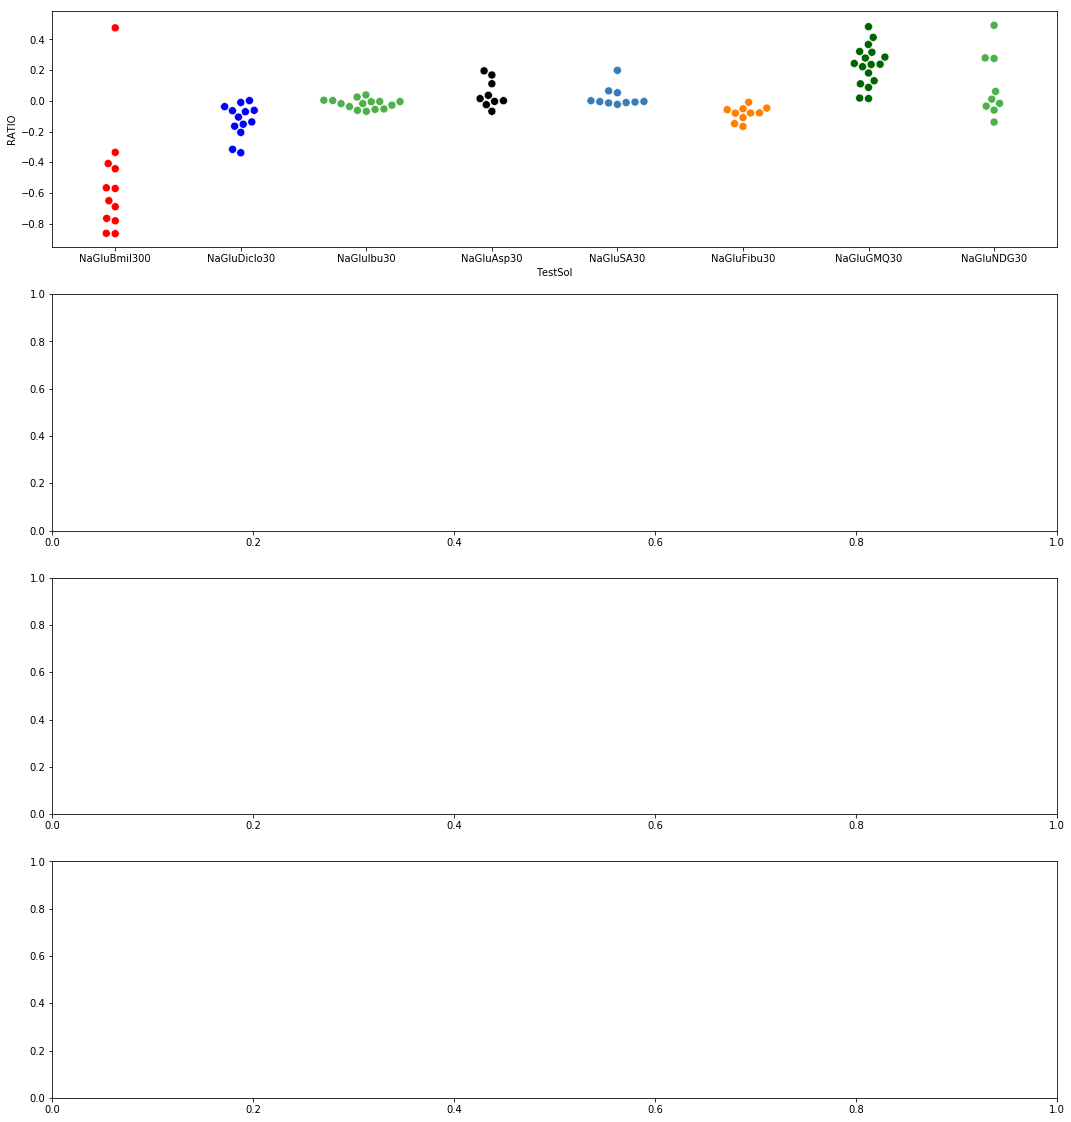

In [68]:
RNA = 'UNC-8 G378E'
MixInjection = 'pTL69mg012'

#Drug30list = ["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30","NaGluDiclo30","NaGluIbu30","NaGluRIbuR30","NaGluSIbuS30","NaGluGMQ30","NaGluNDG30"]
Drug30list = ["NaGluBmil300","NaGluDiclo30","NaGluIbu30","NaGluAsp30","NaGluSA30","NaGluFibu30","NaGluGMQ30","NaGluNDG30"]

Drug100list = ["NaGluAmil100","NaGluBmil100","NaGluEipa100","NaGluBzd100","NaGluDiclo100","NaGluIbu100","NaGluNDG100","NaGluGad100"]
Drug300list = ["NaGluAmil300","NaGluBmil300","NaGluEipa300","NaGluIbu300"]
DrugOtherlist = ["NaGlu64","NaGlu84","NaHCO3"]

##################### No NEED TO CHANGE BELOW ####
Drug30 = df[(df.Injection == MixInjection) & (df.TestSol.isin(Drug30list))] #WORKS !!!
Drug100 = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(Drug100list))] #WORKS !
Drug300 = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(Drug300list))]
DrugOther  = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(DrugOtherlist))]


fig = plt.figure(figsize=(18, 20)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(4,1,1)
ax2 = plt.subplot(4,1,2)
ax3 = plt.subplot(4,1,3)
ax4 = plt.subplot(4,1,4)

#plot 30 uM Amil
sns.swarmplot(x = Drug30['TestSol'], y = Drug30['RATIO']-1 , data = Drug30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax1, order= Drug30list )
sns.boxplot(x = Drug30['TestSol'], y = Drug30['RATIO']-1 , data = Drug30, palette=sns.color_palette(colors),ax=ax1,order= Drug30list )

sns.swarmplot(x = Drug100['TestSol'], y = Drug100['RATIO']-1 , data = Drug100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax2, order= Drug100list )
sns.boxplot(x = Drug100['TestSol'], y = Drug100['RATIO']-1 , data = Drug100, palette=sns.color_palette(colors),ax=ax2, order= Drug100list)

sns.swarmplot(x = Drug300['TestSol'], y = Drug300['RATIO']-1 , data = Drug300,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax3,order= Drug300list  )
sns.boxplot(x = Drug300['TestSol'], y = Drug300['RATIO']-1 , data = Drug300, palette=sns.color_palette(colors),ax=ax3,order= Drug300list )

#sns.swarmplot(x = DrugOther['TestSol'], y = DrugOther['RATIO']-1 , data = DrugOther,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax4,order= DrugOtherlist  )
#sns.boxplot(x = DrugOther['TestSol'], y = DrugOther['RATIO']-1 , data = DrugOther, palette=sns.color_palette(colors),ax=ax4,order= DrugOtherlist)


##### AXIS 1####
ax1.set_ylim([-1, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title(RNA+' 30 uM Drug',size=18)
#ax1.set_xticklabels(np.unique(Drug30['TestSol']),rotation=30)
#ax1.set_xticklabels(Drug30list ,rotation=30)


##### AXIS 2####
ax2.set_ylim([-1, 1])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=16)  
ax2.set_title(RNA+' 100 uM Drug',size=18)
#ax2.set_xticklabels(np.unique(Drug100['TestSol']) ,rotation=30)

##### AXIS 3####
ax3.set_ylim([-1, 1])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=16)  
ax3.set_title(RNA+' 300 uM Drug',size=18)
#ax3.set_xticklabels(np.unique(Drug300['TestSol']),rotation=30)

##### AXIS 4####
ax4.set_ylim([-1, 1])
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=16)  
ax4.set_title(RNA+' pH',size=18)
#ax4.set_xticklabels(np.unique(DrugOther['TestSol']),rotation=30)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.3)
plt.savefig(filedir+RNA+"-RATIO"+'.eps')

In [ ]:
Drug30.pivot(columns='TestSol', values='RATIO').describe().T

### DELTA UNC-8 G378E

In [ ]:
RNA = 'UNC-8 G378E'
MixInjection = 'pTL69mg012'

#Drug30list = ["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30","NaGluDiclo30","NaGluIbu30","NaGluRIbuR30","NaGluSIbuS30","NaGluGMQ30","NaGluNDG30"]
Drug30list = ["NaGluBmil300","NaGluDiclo30","NaGluIbu30","NaGluAsp30","NaGluSA30","NaGluFibu30","NaGluGMQ30","NaGluNDG30"]
Drug100list = ["NaGluAmil100","NaGluBmil100","NaGluEipa100","NaGluBzd100","NaGluDiclo100","NaGluIbu100","NaGluNDG100","NaGluGad100"]
Drug300list = ["NaGluAmil300","NaGluBmil300","NaGluEipa300","NaGluIbu300"]
DrugOtherlist = ["NaGlu64","NaGlu84","NaHCO3"]

##################### No NEED TO CHANGE BELOW ####
Drug30 = df[(df.Injection == MixInjection) & (df.TestSol.isin(Drug30list))] #WORKS !!!
Drug100 = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(Drug100list))] #WORKS !
Drug300 = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(Drug300list))]
DrugOther  = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(DrugOtherlist))]


fig = plt.figure(figsize=(18, 20)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(4,1,1)
ax2 = plt.subplot(4,1,2)
ax3 = plt.subplot(4,1,3)
ax4 = plt.subplot(4,1,4)

#plot 30 uM Amil
sns.swarmplot(x = Drug30['TestSol'], y = Drug30['DELTA']*1000000*-1  , data = Drug30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax1, order= Drug30list )
sns.boxplot(x = Drug30['TestSol'], y = Drug30['DELTA']*1000000*-1 , data = Drug30, palette=sns.color_palette(colors),ax=ax1,order= Drug30list )

sns.swarmplot(x = Drug100['TestSol'], y = Drug100['DELTA']*1000000*-1 , data = Drug100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax2, order= Drug100list )
sns.boxplot(x = Drug100['TestSol'], y = Drug100['DELTA']*1000000*-1  , data = Drug100, palette=sns.color_palette(colors),ax=ax2, order= Drug100list)

sns.swarmplot(x = Drug300['TestSol'], y = Drug300['DELTA']*1000000*-1  , data = Drug300,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax3,order= Drug300list  )
sns.boxplot(x = Drug300['TestSol'], y = Drug300['DELTA']*1000000*-1 , data = Drug300, palette=sns.color_palette(colors),ax=ax3,order= Drug300list )

#sns.swarmplot(x = DrugOther['TestSol'], y = DrugOther['DELTA']*1000000*-1  , data = DrugOther,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax4,order= DrugOtherlist  )
#sns.boxplot(x = DrugOther['TestSol'], y = DrugOther['DELTA']*1000000*-1  , data = DrugOther, palette=sns.color_palette(colors),ax=ax4,order= DrugOtherlist)


##### AXIS 1####
#ax1.set_ylim([-1, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title(RNA+' 30 uM Drug',size=18)
#ax1.set_xticklabels(np.unique(Drug30['TestSol']),rotation=30)
#ax1.set_xticklabels(Drug30list ,rotation=30)


##### AXIS 2####
#ax2.set_ylim([-1, 1])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=16)  
ax2.set_title(RNA+' 100 uM Drug',size=18)
#ax2.set_xticklabels(np.unique(Drug100['TestSol']) ,rotation=30)

##### AXIS 3####
#ax3.set_ylim([-1, 1])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=16)  
ax3.set_title(RNA+' 300 uM Drug',size=18)
#ax3.set_xticklabels(np.unique(Drug300['TestSol']),rotation=30)

##### AXIS 4####
#ax4.set_ylim([-1, 1])
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=16)  
ax4.set_title(RNA+' pH',size=18)
#ax4.set_xticklabels(np.unique(DrugOther['TestSol']),rotation=30)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.3)
plt.savefig(filedir+RNA+"-DELTA"+'.eps')


# DEGT-1 A813T

### RATIO DEGT-1 A813T

In [ ]:
RNA = 'DEGT-1 A813T'
MixInjection = 'mg418mg012'

#Drug30list = ["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30","NaGluDiclo30","NaGluIbu30","NaGluRIbuR30","NaGluSIbuS30","NaGluGMQ30","NaGluNDG30"]
Drug30list = ["NaGluBmil300","NaGluDiclo30","NaGluIbu30","NaGluAsp30","NaGluSA30","NaGluFibu30","NaGluGMQ30","NaGluNDG30"]

Drug100list = ["NaGluAmil100","NaGluBmil100","NaGluEipa100","NaGluBzd100","NaGluDiclo100","NaGluIbu100","NaGluNDG100","NaGluGad100"]
Drug300list = ["NaGluAmil300","NaGluBmil300","NaGluEipa300","NaGluIbu300"]
DrugOtherlist = ["NaGlu64","NaGlu84","NaHCO3"]

##################### No NEED TO CHANGE BELOW ####
Drug30 = df[(df.Injection == MixInjection) & (df.TestSol.isin(Drug30list))] #WORKS !!!
Drug100 = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(Drug100list))] #WORKS !
Drug300 = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(Drug300list))]
DrugOther  = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(DrugOtherlist))]


fig = plt.figure(figsize=(18, 20)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(4,1,1)
ax2 = plt.subplot(4,1,2)
ax3 = plt.subplot(4,1,3)
ax4 = plt.subplot(4,1,4)

#plot 30 uM Amil
sns.swarmplot(x = Drug30['TestSol'], y = Drug30['RATIO']-1 , data = Drug30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax1, order= Drug30list )
sns.boxplot(x = Drug30['TestSol'], y = Drug30['RATIO']-1 , data = Drug30, palette=sns.color_palette(colors),ax=ax1,order= Drug30list )

sns.swarmplot(x = Drug100['TestSol'], y = Drug100['RATIO']-1 , data = Drug100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax2, order= Drug100list )
sns.boxplot(x = Drug100['TestSol'], y = Drug100['RATIO']-1 , data = Drug100, palette=sns.color_palette(colors),ax=ax2, order= Drug100list)

sns.swarmplot(x = Drug300['TestSol'], y = Drug300['RATIO']-1 , data = Drug300,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax3,order= Drug300list  )
sns.boxplot(x = Drug300['TestSol'], y = Drug300['RATIO']-1 , data = Drug300, palette=sns.color_palette(colors),ax=ax3,order= Drug300list )

sns.swarmplot(x = DrugOther['TestSol'], y = DrugOther['RATIO']-1 , data = DrugOther,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax4,order= DrugOtherlist  )
sns.boxplot(x = DrugOther['TestSol'], y = DrugOther['RATIO']-1 , data = DrugOther, palette=sns.color_palette(colors),ax=ax4,order= DrugOtherlist)


##### AXIS 1####
ax1.set_ylim([-1, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title(RNA+' 30 uM Drug',size=18)
#ax1.set_xticklabels(np.unique(Drug30['TestSol']),rotation=30)
#ax1.set_xticklabels(Drug30list ,rotation=30)


##### AXIS 2####
ax2.set_ylim([-1, 1])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=16)  
ax2.set_title(RNA+' 100 uM Drug',size=18)
#ax2.set_xticklabels(np.unique(Drug100['TestSol']) ,rotation=30)

##### AXIS 3####
ax3.set_ylim([-1, 1])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=16)  
ax3.set_title(RNA+' 300 uM Drug',size=18)
#ax3.set_xticklabels(np.unique(Drug300['TestSol']),rotation=30)

##### AXIS 4####
ax4.set_ylim([-1, 1])
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=16)  
ax4.set_title(RNA+' pH',size=18)
#ax4.set_xticklabels(np.unique(DrugOther['TestSol']),rotation=30)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.3)
plt.savefig(filedir+RNA+"-RATIO"+'.eps')


# DELTA A813T

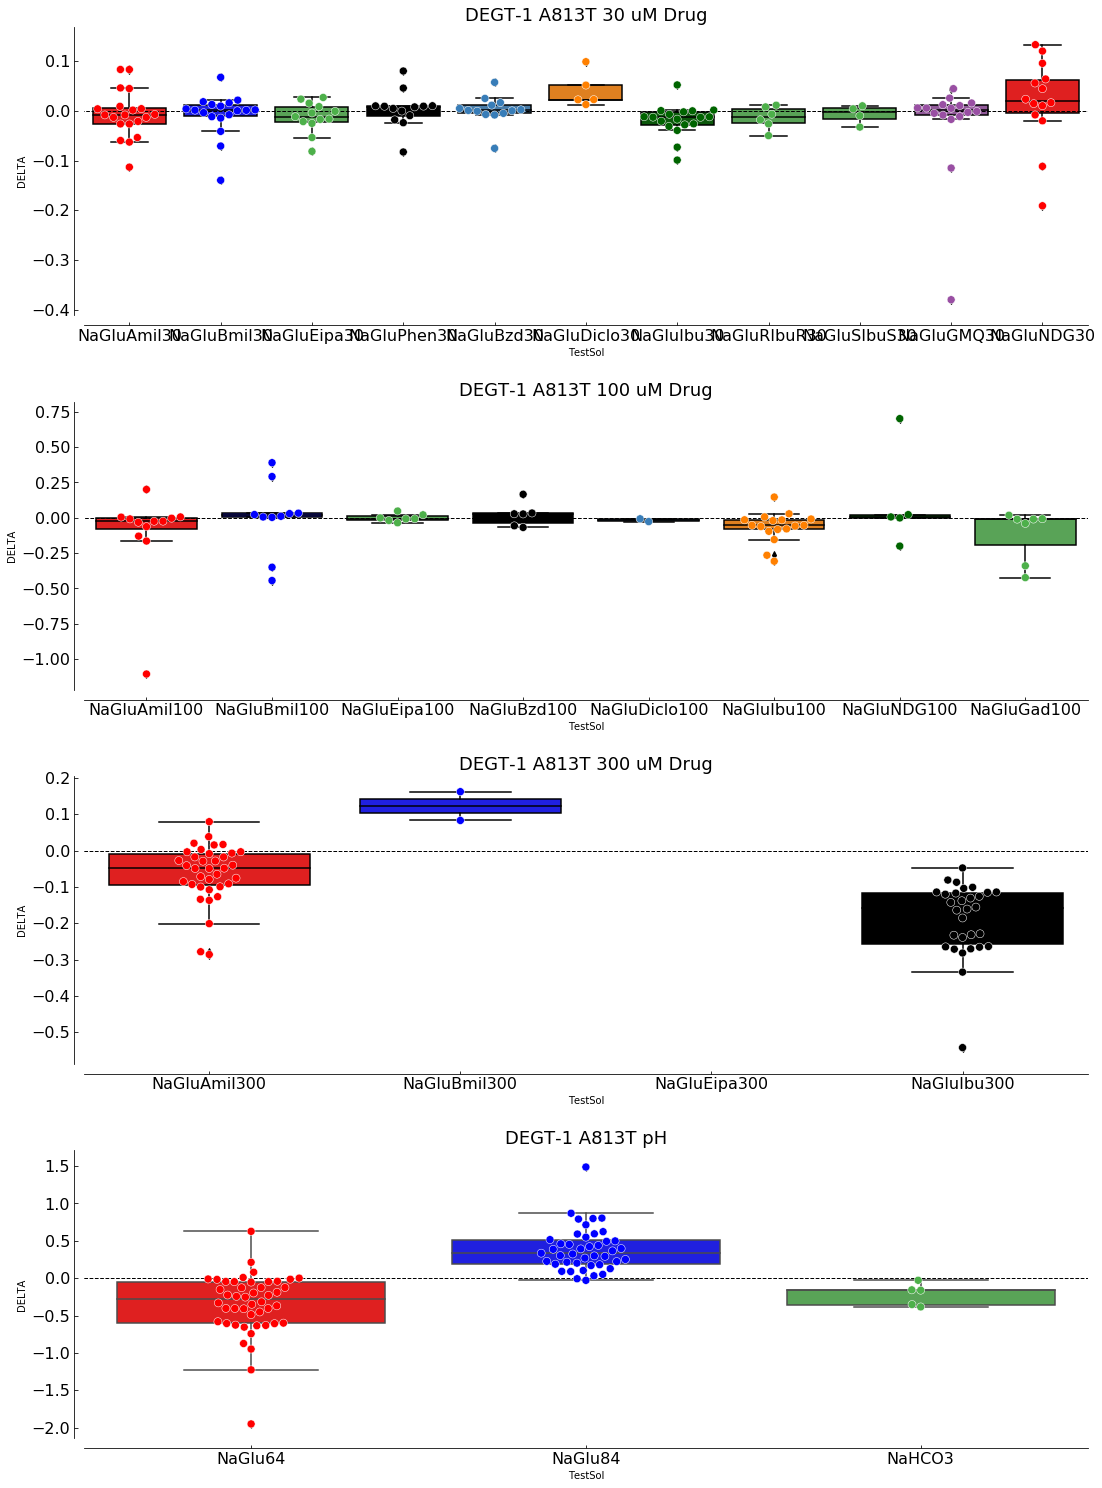

In [69]:
RNA = 'DEGT-1 A813T'
MixInjection = 'mg418mg012'

Drug30list = ["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30","NaGluDiclo30","NaGluIbu30","NaGluRIbuR30","NaGluSIbuS30","NaGluGMQ30","NaGluNDG30"]
Drug100list = ["NaGluAmil100","NaGluBmil100","NaGluEipa100","NaGluBzd100","NaGluDiclo100","NaGluIbu100","NaGluNDG100","NaGluGad100"]
Drug300list = ["NaGluAmil300","NaGluBmil300","NaGluEipa300","NaGluIbu300"]
DrugOtherlist = ["NaGlu64","NaGlu84","NaHCO3"]

##################### No NEED TO CHANGE BELOW ####
Drug30 = df[(df.Injection == MixInjection) & (df.TestSol.isin(Drug30list))] #WORKS !!!
Drug100 = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(Drug100list))] #WORKS !
Drug300 = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(Drug300list))]
DrugOther  = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(DrugOtherlist))]


fig = plt.figure(figsize=(18, 20)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(4,1,1)
ax2 = plt.subplot(4,1,2)
ax3 = plt.subplot(4,1,3)
ax4 = plt.subplot(4,1,4)

#plot 30 uM Amil
sns.swarmplot(x = Drug30['TestSol'], y = Drug30['DELTA']*1000000*-1  , data = Drug30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax1, order= Drug30list )
sns.boxplot(x = Drug30['TestSol'], y = Drug30['DELTA']*1000000*-1 , data = Drug30, palette=sns.color_palette(colors),ax=ax1,order= Drug30list )

sns.swarmplot(x = Drug100['TestSol'], y = Drug100['DELTA']*1000000*-1 , data = Drug100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax2, order= Drug100list )
sns.boxplot(x = Drug100['TestSol'], y = Drug100['DELTA']*1000000*-1  , data = Drug100, palette=sns.color_palette(colors),ax=ax2, order= Drug100list)

sns.swarmplot(x = Drug300['TestSol'], y = Drug300['DELTA']*1000000*-1  , data = Drug300,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax3,order= Drug300list  )
sns.boxplot(x = Drug300['TestSol'], y = Drug300['DELTA']*1000000*-1 , data = Drug300, palette=sns.color_palette(colors),ax=ax3,order= Drug300list )

sns.swarmplot(x = DrugOther['TestSol'], y = DrugOther['DELTA']*1000000*-1  , data = DrugOther,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax4,order= DrugOtherlist  )
sns.boxplot(x = DrugOther['TestSol'], y = DrugOther['DELTA']*1000000*-1  , data = DrugOther, palette=sns.color_palette(colors),ax=ax4,order= DrugOtherlist)


##### AXIS 1####
#ax1.set_ylim([-1, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title(RNA+' 30 uM Drug',size=18)
#ax1.set_xticklabels(np.unique(Drug30['TestSol']),rotation=30)
#ax1.set_xticklabels(Drug30list ,rotation=30)


##### AXIS 2####
#ax2.set_ylim([-1, 1])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=16)  
ax2.set_title(RNA+' 100 uM Drug',size=18)
#ax2.set_xticklabels(np.unique(Drug100['TestSol']) ,rotation=30)

##### AXIS 3####
#ax3.set_ylim([-1, 1])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=16)  
ax3.set_title(RNA+' 300 uM Drug',size=18)
#ax3.set_xticklabels(np.unique(Drug300['TestSol']),rotation=30)

##### AXIS 4####
#ax4.set_ylim([-1, 1])
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=16)  
ax4.set_title(RNA+' pH',size=18)
#ax4.set_xticklabels(np.unique(DrugOther['TestSol']),rotation=30)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.3)
plt.savefig(filedir+RNA+"-DELTA"+'.eps')

# uninjected

ValueError: List of boxplot statistics and `positions` values must have same the length

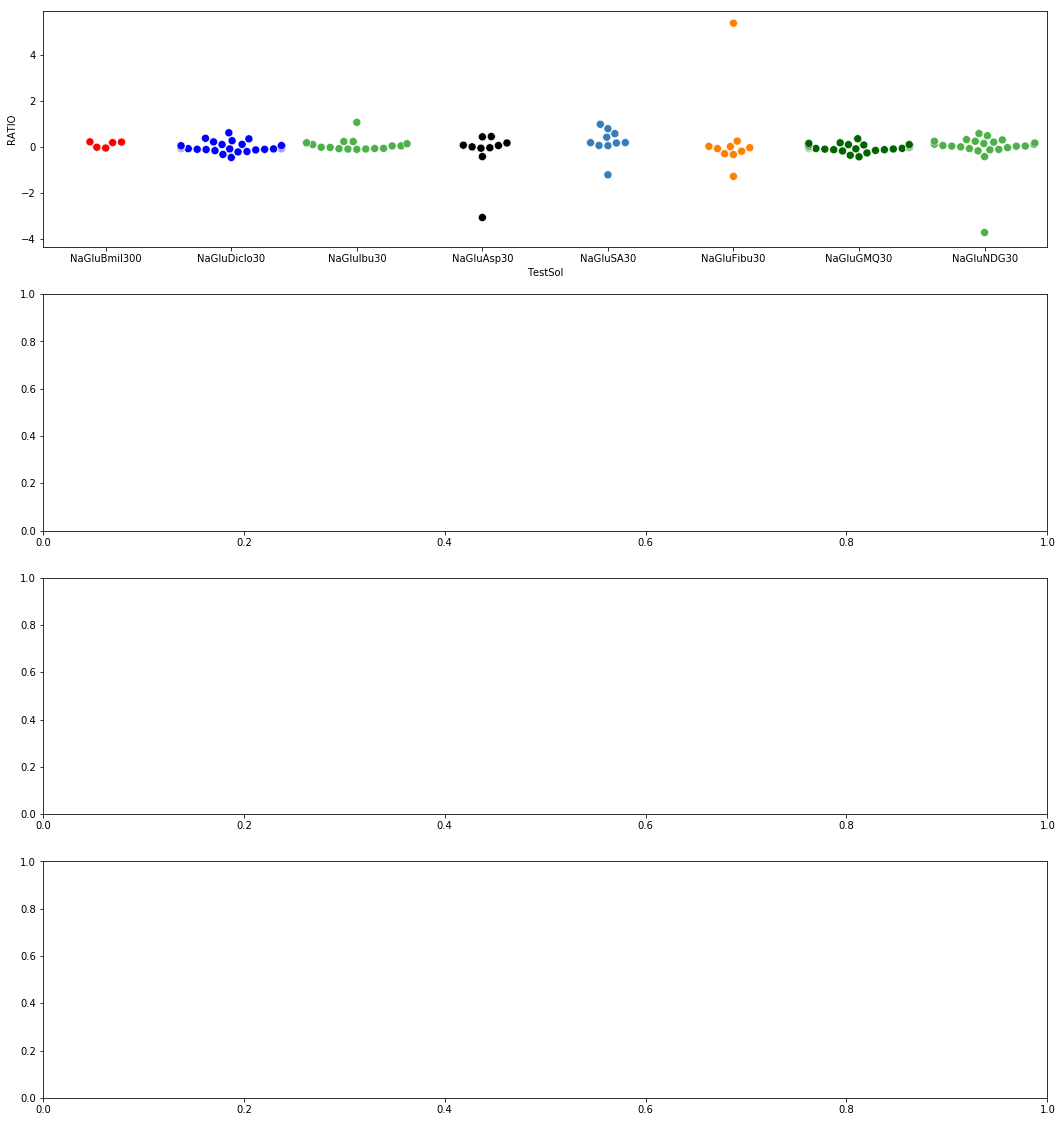

In [70]:
RNA = 'uninjected'
MixInjection = 'uninjected'


#Drug30list = ["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30","NaGluDiclo30","NaGluIbu30","NaGluRIbuR30","NaGluSIbuS30","NaGluGMQ30","NaGluNDG30"]
Drug30list = ["NaGluBmil300","NaGluDiclo30","NaGluIbu30","NaGluAsp30","NaGluSA30","NaGluFibu30","NaGluGMQ30","NaGluNDG30"]

Drug100list = ["NaGluAmil100","NaGluBmil100","NaGluEipa100","NaGluBzd100","NaGluDiclo100","NaGluIbu100","NaGluNDG100","NaGluGad100"]
Drug300list = ["NaGluAmil300","NaGluBmil300","NaGluEipa300","NaGluIbu300"]
DrugOtherlist = ["NaGlu64","NaGlu84","NaHCO3"]

Drug30 = df[(df.Injection == MixInjection) & (df.TestSol.isin(Drug30list))] #WORKS !!!
Drug100 = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(Drug100list))] #WORKS !
Drug300 = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(["NaGluAmil300","NaGluBmil300","NaGluIbu300"]))]
DrugOther  = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(["NaGlu64","NaGlu84","NaHCO3"]))]

##################### No NEED TO CHANGE BELOW ####
fig = plt.figure(figsize=(18, 20)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(4,1,1)
ax2 = plt.subplot(4,1,2)
ax3 = plt.subplot(4,1,3)
ax4 = plt.subplot(4,1,4)

#plot 30 uM Amil
sns.swarmplot(x = Drug30['TestSol'], y = Drug30['RATIO']-1 , data = Drug30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax1, order= Drug30list )
sns.boxplot(x = Drug30['TestSol'], y = Drug30['RATIO']-1 , data = Drug30, palette=sns.color_palette(colors),ax=ax1,order= Drug30list )

sns.swarmplot(x = Drug100['TestSol'], y = Drug100['RATIO']-1 , data = Drug100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax2, order= Drug100list )
sns.boxplot(x = Drug100['TestSol'], y = Drug100['RATIO']-1 , data = Drug100, palette=sns.color_palette(colors),ax=ax2, order= Drug100list)

sns.swarmplot(x = Drug300['TestSol'], y = Drug300['RATIO']-1 , data = Drug300,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax3,order= Drug300list  )
sns.boxplot(x = Drug300['TestSol'], y = Drug300['RATIO']-1 , data = Drug300, palette=sns.color_palette(colors),ax=ax3,order= Drug300list )

sns.swarmplot(x = DrugOther['TestSol'], y = DrugOther['RATIO']-1 , data = DrugOther,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax4,order= DrugOtherlist  )
sns.boxplot(x = DrugOther['TestSol'], y = DrugOther['RATIO']-1 , data = DrugOther, palette=sns.color_palette(colors),ax=ax4,order= DrugOtherlist)

##### AXIS 1####
ax1.set_ylim([-1, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title(RNA+' 30 uM Drug',size=18)
#ax1.set_xticklabels(np.unique(Drug30['TestSol']),rotation=30)
#ax1.set_xticklabels(Drug30list ,rotation=30)


##### AXIS 2####
ax2.set_ylim([-1, 1])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=16)  
ax2.set_title(RNA+' 100 uM Drug',size=18)
#ax2.set_xticklabels(np.unique(Drug100['TestSol']) ,rotation=30)

##### AXIS 3####
ax3.set_ylim([-1, 1])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=16)  
ax3.set_title(RNA+' 300 uM Drug',size=18)
#ax3.set_xticklabels(np.unique(Drug300['TestSol']),rotation=30)

##### AXIS 4####
ax4.set_ylim([-1, 1])
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=16)  
ax4.set_title(RNA+' pH',size=18)
#ax4.set_xticklabels(np.unique(DrugOther['TestSol']),rotation=30)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.3)
plt.savefig(filedir+RNA+"-RATIO"+'.eps')  

### DELTA Uninjected

In [ ]:
RNA = 'uninjected'
MixInjection = 'uninjected'

Drug30list = ["NaGluAmil30","NaGluBmil30","NaGluEipa30","NaGluPhen30","NaGluBzd30","NaGluDiclo30","NaGluIbu30","NaGluRIbuR30","NaGluSIbuS30","NaGluGMQ30","NaGluNDG30"]
Drug100list = ["NaGluAmil100","NaGluBmil100","NaGluEipa100","NaGluBzd100","NaGluDiclo100","NaGluIbu100","NaGluNDG100","NaGluGad100"]
Drug300list = ["NaGluAmil300","NaGluBmil300","NaGluEipa300","NaGluIbu300"]
DrugOtherlist = ["NaGlu64","NaGlu84","NaHCO3"]

##################### No NEED TO CHANGE BELOW ####
Drug30 = df[(df.Injection == MixInjection) & (df.TestSol.isin(Drug30list))] #WORKS !!!
Drug100 = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(Drug100list))] #WORKS !
Drug300 = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(Drug300list))]
DrugOther  = df[(df.Injection ==MixInjection ) & (df.TestSol.isin(DrugOtherlist))]


fig = plt.figure(figsize=(18, 20)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(4,1,1)
ax2 = plt.subplot(4,1,2)
ax3 = plt.subplot(4,1,3)
ax4 = plt.subplot(4,1,4)

#plot 30 uM Amil
sns.swarmplot(x = Drug30['TestSol'], y = Drug30['DELTA']*1000000*-1  , data = Drug30,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax1, order= Drug30list )
sns.boxplot(x = Drug30['TestSol'], y = Drug30['DELTA']*1000000*-1 , data = Drug30, palette=sns.color_palette(colors),ax=ax1,order= Drug30list )

sns.swarmplot(x = Drug100['TestSol'], y = Drug100['DELTA']*1000000*-1 , data = Drug100,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax2, order= Drug100list )
sns.boxplot(x = Drug100['TestSol'], y = Drug100['DELTA']*1000000*-1  , data = Drug100, palette=sns.color_palette(colors),ax=ax2, order= Drug100list)

sns.swarmplot(x = Drug300['TestSol'], y = Drug300['DELTA']*1000000*-1  , data = Drug300,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax3,order= Drug300list  )
sns.boxplot(x = Drug300['TestSol'], y = Drug300['DELTA']*1000000*-1 , data = Drug300, palette=sns.color_palette(colors),ax=ax3,order= Drug300list )

sns.swarmplot(x = DrugOther['TestSol'], y = DrugOther['DELTA']*1000000*-1  , data = DrugOther,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8,ax=ax4,order= DrugOtherlist  )
sns.boxplot(x = DrugOther['TestSol'], y = DrugOther['DELTA']*1000000*-1  , data = DrugOther, palette=sns.color_palette(colors),ax=ax4,order= DrugOtherlist)


##### AXIS 1####
#ax1.set_ylim([-1, 1])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title(RNA+' 30 uM Drug',size=18)
#ax1.set_xticklabels(np.unique(Drug30['TestSol']),rotation=30)
#ax1.set_xticklabels(Drug30list ,rotation=30)


##### AXIS 2####
#ax2.set_ylim([-1, 1])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position(('outward',10))  
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax2.tick_params(axis='both', which='major', labelsize=16)  
ax2.set_title(RNA+' 100 uM Drug',size=18)
#ax2.set_xticklabels(np.unique(Drug100['TestSol']) ,rotation=30)

##### AXIS 3####
#ax3.set_ylim([-1, 1])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position(('outward',10))  
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax3.tick_params(axis='both', which='major', labelsize=16)  
ax3.set_title(RNA+' 300 uM Drug',size=18)
#ax3.set_xticklabels(np.unique(Drug300['TestSol']),rotation=30)

##### AXIS 4####
#ax4.set_ylim([-1, 1])
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position(('outward',10))  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax4.tick_params(axis='both', which='major', labelsize=16)  
ax4.set_title(RNA+' pH',size=18)
#ax4.set_xticklabels(np.unique(DrugOther['TestSol']),rotation=30)

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.3)
plt.savefig(filedir+RNA+"-DELTA"+'.eps')

# Functions for different graph styles
adapted from Holger Fehlauer


In [ ]:
#### function for graphs
fig = plt.figure(figsize=(20, 20)) 
#plt.clf()    
def adjust_spines(ax, lay):                                                     # adjusts the layout of axis
    if lay == 0:                                                                # layout 0 has:
        ax.spines['bottom'].set_visible(False)                                  # no spine at the bottom
        ax.spines['right'].set_visible(False)                                   # no spine at the right
        ax.spines['top'].set_visible(False)                                     # no spine at the top
        ax.spines['left'].set_position(('outward',5))                           # a spine at the left that is put a little aside
        ax.yaxis.set_ticks_position('left')                                     # ticks at the left
        ax.xaxis.set_ticks([])                                                  # no ticks at the bottom
    if lay == 1:                                                                # layout 1 has:
        ax.yaxis.set_ticks([])                                                  # no ticks at the left
        ax.xaxis.set_ticks([])                                                  # no ticks at the bottom
    if lay == 2:                                                                # layout 2 has:
        ax.spines['right'].set_visible(False)                                   # no spine at the right
        ax.spines['top'].set_visible(False)                                     # no spine at the top
        ax.yaxis.set_ticks_position('left')                                     # ticks at the left
        ax.xaxis.set_ticks_position('bottom')                                   # ticks at the bottom
        ax.spines['left'].set_position(('outward',5))                           # a spine at the left that is put a little aside
        ax.spines['bottom'].set_position(('outward',5))                         # a spine at the bottom that is put a little aside
    if lay == 3:                                                                # layout 2 has:
        ax.spines['right'].set_visible(False)                                  # no spine at the right
        ax.spines['top'].set_visible(False)                                     # no spine at the top
        ax.yaxis.set_ticks_position('left')                                     # ticks at the left
        ax.xaxis.set_ticks_position('bottom')                                 # no spine at the right
        ax.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
        ax.spines['bottom'].set_position(('outward',10))  
        ax.spines['top'].set_position(('axes',5)) 
        ax.get_yaxis().set_tick_params(direction='in')
        ax.get_xaxis().set_tick_params(direction='in')
        plt.tick_params(axis='both', which='major', labelsize=16)
        ax.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1
        plt.xticks(rotation=30)
        


In [ ]:
Drug30list 

In [ ]:
np.unique(df['TestSol'])

# Analysis of MEC-4

In [ ]:
#DELTA MEC4
mg419 = df[(df.Injection =="mg419mg012") & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"]))] #WORKS !!!

ax = sns.swarmplot(x = mg419['TestSol'], y = mg419['DELTA']*1000000*-1 , data = mg419,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8, order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"])
ax = sns.boxplot(x = mg419['TestSol'], y = mg419['DELTA']*1000000*-1 , data = mg419, palette=sns.color_palette(colors),order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"])

adjust_spines(ax, 3)
plt.subplots_adjust(left=0.1, right=2, top=1, bottom=0.1)
plt.ylim([-40, +10]) 
plt.ylabel('Change in Current (µA)', fontsize=18)  
plt.savefig(filedir+'Mec4-A713T-Delta'+'.eps')  
plt.show()  # displays the plot
#mg419.pivot(columns='TestSol', values='DELTA').describe().T

I had an error message with plotting Ratio data beforehand saying not the same data type/length.  mg419.pivot(columns='TestSol', values='RATIO').describe().T gave a different result, suggesting that something is different... Indeed, there were an error in the excle sheet.



In [ ]:
#RATIO M4
#### data from above ###

#colors = ["red","blue",(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]
#ax = sns.swarmplot(x = mg419['TestSol'], y = mg419['RATIO']-1 , data = mg419,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8, order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"])
ax = sns.boxplot(x = mg419['TestSol'], y = mg419['RATIO']-1 , data = mg419, palette=sns.color_palette(colors),order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"])

adjust_spines(ax, 3)
plt.subplots_adjust(left=0.1, right=2, top=1, bottom=0.1)
plt.ylim([-1, +1]) 
plt.ylabel('RATIO (I-I0/I0) -85 mV', fontsize=18)  
plt.savefig(filedir+'Mec4-A713T-RATIO'+'.eps')  
plt.show()  # displays the plot
#mg419.pivot(columns='TestSol', values='DELTA').describe().T



# Analysis of UNC-8

In [ ]:
#UNC8 DELTA
Unc8G378E = df[(df.Injection =="pTL69mg012") & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"]))] #WORKS !!!

ax = sns.swarmplot(x = Unc8G378E['TestSol'], y = Unc8G378E['DELTA']*1000000*-1 , data = Unc8G378E,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8, order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"])
ax = sns.boxplot(x = Unc8G378E['TestSol'], y = Unc8G378E['DELTA']*1000000*-1 , data = Unc8G378E, palette=sns.color_palette(colors),order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"])

adjust_spines(ax, 3)
plt.subplots_adjust(left=0.1, right=2, top=1, bottom=0.1)
plt.ylim([-2, +1]) 
plt.ylabel('Change in Current (µA) -85 mV', fontsize=18)  
plt.savefig(filedir+'Unc8-G378E-Delta'+'.eps')  
plt.show()  # displays the plot
#Unc8G378E.pivot(columns='TestSol', values='DELTA').describe().T


In [ ]:
#UNC8 RATIO
#data from above

#colors = ["red","blue",(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]
ax = sns.swarmplot(x = Unc8G378E['TestSol'], y = Unc8G378E['RATIO']-1 , data = Unc8G378E,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8, order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"])
ax = sns.boxplot(x = Unc8G378E['TestSol'], y = Unc8G378E['RATIO']-1 , data = Unc8G378E, palette=sns.color_palette(colors),order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"])

adjust_spines(ax, 3)
plt.subplots_adjust(left=0.1, right=1.2, top=1, bottom=0.1)
plt.ylim([-1, +1]) 
plt.ylabel('RATIO (I-I0/I0)', fontsize=18)  
plt.savefig(filedir+'Unc8-G378E-Ratio'+'.eps')  
plt.show()  # displays the plot
#Unc8G378E.pivot(columns='TestSol', values='DELTA').describe().T



# Analysis Uninjected oocytes

NameError: name 'adjust_spines' is not defined

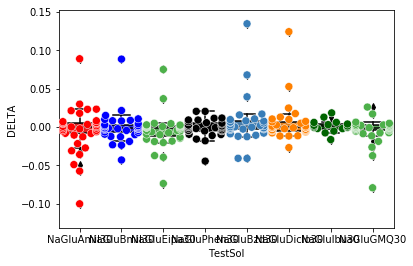

In [71]:
#Uninjected DELTA
uninj = df[(df.Injection =="uninjected") & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"]))] #WORKS !!!

#colors = ["red","blue",(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]
ax = sns.swarmplot(x = uninj['TestSol'], y = uninj['DELTA']*1000000*-1 , data = uninj,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8, order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"])
ax = sns.boxplot(x = uninj['TestSol'], y = uninj['DELTA']*1000000*-1 , data = uninj, palette=sns.color_palette(colors),order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"])

adjust_spines(ax, 3)
plt.subplots_adjust(left=0.1, right=2, top=1, bottom=0.1)
#plt.ylim([-1, +0.1]) 
plt.ylabel('Change in Current (µA) -85 mV', fontsize=18)  
plt.savefig(filedir+'uninj-Delta'+'.eps')  
plt.show()  # displays the plot
uninj.pivot(columns='TestSol', values='DELTA').describe().T


In [ ]:
#Uninjected DELTA
#data from above

#colors = ["red","blue",(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]
ax = sns.swarmplot(x = uninj['TestSol'], y = uninj['RATIO']-1 , data = uninj,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 6, order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"])
ax = sns.boxplot(x = uninj['TestSol'], y = uninj['RATIO']-1 , data = uninj, palette=sns.color_palette(colors),order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"])

adjust_spines(ax, 3)
plt.subplots_adjust(left=0.1, right=1.4, top=1, bottom=0.1)
#plt.ylim([-1, +1]) 
plt.ylabel('RATIO (I-I0/I0)', fontsize=18)  
plt.savefig(filedir+'uninj-Ratio'+'.eps')  
plt.show()  # displays the plot

# Analysis DEGT-1

- check why there are only two values for DICLOFENAC in 30 uM

In [ ]:
#Uninjected DELTA
DT1A813T = df[(df.Injection =="mg418mg012") & (df.TestSol.isin(["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"]))] #WORKS !!!

ax = sns.swarmplot(x = DT1A813T['TestSol'], y = DT1A813T['DELTA']*1000000*-1 , data = DT1A813T,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8, order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"])
ax = sns.boxplot(x = DT1A813T['TestSol'], y = DT1A813T['DELTA']*1000000*-1 , data = DT1A813T, palette=sns.color_palette(colors),order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"])

adjust_spines(ax, 3)
plt.subplots_adjust(left=0.1, right=2, top=1, bottom=0.1)
plt.ylim([-0.1, +0.1]) 
plt.ylabel('Change in Current (µA) -85 mV', fontsize=18)  
plt.savefig(filedir+'DT1A813T-Delta'+'.eps')  
plt.suptitle('DEGT-1 A813T 30 uM doses ', fontsize=16)
plt.show()  # displays the plot
#DT1A813T.pivot(columns='TestSol', values='DELTA').describe().T


In [ ]:
#Ratio DEGT-1

ax = sns.swarmplot(x = DT1A813T['TestSol'], y = DT1A813T['RATIO']-1 , data = DT1A813T,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8, order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"])
ax = sns.boxplot(x = DT1A813T['TestSol'], y = DT1A813T['RATIO']-1 , data = DT1A813T, palette=sns.color_palette(colors),order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"])

adjust_spines(ax, 3)
plt.subplots_adjust(left=0.1, right=2, top=1, bottom=0.1)
plt.ylim([-1, +1]) 
plt.ylabel('RATIO (I-I0/I0)', fontsize=18)  
plt.savefig(filedir+'DT1A813T-Ratio'+'.eps')  
plt.suptitle('DEGT-1 A813T 30 uM doses RATIO ', fontsize=16)
plt.show()  # displays the plot
#DT1A813T.pivot(columns='TestSol', values='DELTA').describe().T

NameError: name 'adjust_spines' is not defined

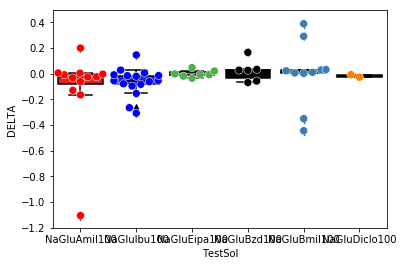

In [72]:
#Uninjected DELTA 100 uM
DT1A813T = df[(df.Injection =="mg418mg012") & (df.TestSol.isin(["NaGluAmil100","NaGluBmil100","NaGluEipa100", "NaGluPhen100", "NaGluBzd100","NaGluDiclo100", "NaGluIbu100","NaGluGMQ100"]))] #WORKS !!!

#colors = ["red","blue",(0.30, 0.69, 0.29),(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]
ax = sns.swarmplot(x = DT1A813T['TestSol'], y = DT1A813T['DELTA']*1000000*-1 , data = DT1A813T,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, size = 8)
ax = sns.boxplot(x = DT1A813T['TestSol'], y = DT1A813T['DELTA']*1000000*-1 , data = DT1A813T, palette=sns.color_palette(colors))

adjust_spines(ax, 3)
#plt.subplots_adjust(left=0.1, right=2, top=1, bottom=0.1)
#plt.ylim([-0.1, +0.1]) 
plt.ylabel('Change in Current (µA) -85 mV', fontsize=18)  
#plt.savefig(filedir+'DT1A813T-Delta'+'.eps')  
plt.suptitle('DEGT-1 A813T 100 uM doses', fontsize=16)
plt.show()  # displays the plot
#DT1A813T.pivot(columns='TestSol', values='DELTA').describe().T


# Gutter

In [ ]:
##### SOME THINGS I GOOGLED FOR AND MAY NEED LATER ####

#chech how to plot two y axis
df.plot(y = ['DELTA',"DELTA2"])
#
print('df is type:' , type(df))
print('result is:' , type(result))

#transpose data does not seem to be the solutiopn
df2_transposed = df.T # 

#calculate the mean e.g.
print(df.mean()) #also works with NaN values
print(df['DELTA2'].mean()) #mean from a specific col 

#Select by groups, not working yet
#group = df.groupby['Injection']
#print(group)

#Indexing
#numerical indexing
df.iloc[4:10] # how can I index only in the first row e.g. ?
#indexing by col name
df.loc[df['Injection']=="M4"].count() # for calculating the n!
#desribe data: NICE AND FAST OVERVIEW OVER THE DATA
df.pivot(columns='Injection', values='DELTA').describe()
#tranpose
df.pivot(columns='Injection', values='DELTA').describe().T
df.loc[df['Injection']=="U8"].count()

#sns.boxplot(x = 'Injection', y = 'DELTA2', data = df)
#sns.swarmplot(x = 'Injection', y = 'Ratio', data = df)

#####youtube videos pandas
#https://nbviewer.jupyter.org/github/jfkoehler/data-design/blob/master/source/02-introPandas.ipynb
# nice series: https://www.youtube.com/watch?v=yzIMircGU5I&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y


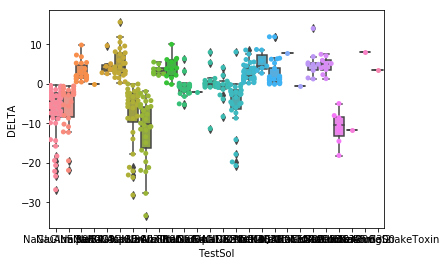

In [73]:
#### playing around learning indexing and logical expression in pandas

#test1 = df.loc[df['Injection']=="mg419mg012"].data = df
#test1 = df.Injection =="mg419mg012" #gives true and false values
#df[df.Injection =="mg419mg012"] 

#df[(df.Injection =="mg419mg012") & (df.TestSol != '^NaGlu$')]#WORKS !!!!
#test1 = df[(df.Injection =="mg419mg012") & (df.TestSol == "NaGlu2")]#WORKS !!!! () are important
test1 = df[(df.Injection =="mg419mg012") & (~df.TestSol.isin(["NaGlu2","NaGlu3","NaGlu4","NaGlu5","NaGlu6","NaGlu7","NaGlu8","NaGlu9"]))] #WORKS !!!

#mg419 = df[(df.Injection =="mg419mg012") & (~df.TestSol.isin(["NaGlu2","NaGlu3","NaGlu4","NaGlu5","NaGlu6","NaGlu7","NaGlu8","NaGlu9"]))] #WORKS !!!

#df.search_type.str.contains("NaGlu2")
#test1 = df.TestSol.str.endswith("NaGlu") ###works as well, but cannot use it as all variables containn NaGlu, be more clever with the search

#test1.pivot(columns='TestSol', values='DELTA').describe().T
sns.swarmplot(x = test1['TestSol'], y = test1['DELTA']*1000000*-1 , data = test1)
sns.boxplot(x = 'TestSol', y = df['DELTA']*1000000*-1, data = test1)

# how to pick, mack a certain order in the boxplot
order=["NaGluAmil30","NaGluBmil30","NaGluEipa30", "NaGluPhen30", "NaGluBzd30","NaGluDiclo30", "NaGluIbu30","NaGluGMQ30"]


In [74]:
test.loc[test['Injection']=="mg512mg012"]

KeyError: 'Injection'